In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [ ]:
# Set DPI for fugures

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [ ]:
# Set the default font size and weight
plt.rcParams['font.size'] = 20
plt.rcParams['font.weight'] = 'bold'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### NHIS 2022

In [ ]:
# Importing Dataset
NHIS2022 = pd.read_csv('/content/drive/MyDrive/Myocardial Infarction (MI)/Dataset/adult22.csv')

In [ ]:
# Dataset size (row, column)
NHIS2022.shape

(27651, 637)

In [ ]:
# Target label data count hueing class
class_counts = NHIS2022['MIEV_A'].value_counts()

print(class_counts)

MIEV_A
2    26591
1     1017
7       26
9       17
Name: count, dtype: int64


In [ ]:
# Selected Features

NHIS2022 = NHIS2022[["MARITAL_A", "HOUTENURE_A", "AFVET_A", "HEIGHTTC_A", "HISPALLP_A", "SEX_A", "PCNTLT18TC", "MAXEDUCP_A", "RATCAT_A", "COPDEV_A", "CHDEV_A", "DEPEV_A", "DIBEV_A", "ARTHEV_A", "STREV_A", "ASEV_A", "CHLEV_A", "HYPEV_A", "PHSTAT_A", "BMICAT_A", "VISIONDF_A", "DIFF_A", "SOCERRNDS_A", "DRKSTAT_A", "MODTPR_A", "FRJUICNO_A", "SHTFLU12M_A", "MIEV_A"]]

In [ ]:
# Count the total number of rows with missing values
total_rows_with_missing = NHIS2022.isnull().any(axis=1).sum()

print(f'Total rows with missing values: {total_rows_with_missing}')

Total rows with missing values: 88


In [ ]:
# Define the refuse values for each column
refuse_values = {
    'HISPALLP_A': [97, 98, 99],
    'MAXEDUCP_A': [97, 98, 99],
    'RATCAT_A': [98],
    'DRKSTAT_A': [],  # No refuse values specified for this column
    'FRJUICNO_A': [997, 998, 999],
}

# Initialize a variable to count the number of rows with refuse values
rows_with_refuse_values = 0

# Iterate through columns and count rows with refuse values
for column, refuse in refuse_values.items():
    if column in NHIS2022.columns:
        rows_with_refuse_values += len(NHIS2022[NHIS2022[column].isin(refuse)])

# For columns without specified refuse values, count rows with refuse values
for column in NHIS2022.columns:
    if column not in refuse_values:
        refuse = [7, 8, 9, 97, 98, 99]
        rows_with_refuse_values += len(NHIS2022[NHIS2022[column].isin(refuse)])

# Print the total number of rows with refuse values
print(f'Total number of rows with refuse values: {rows_with_refuse_values}')

Total number of rows with refuse values: 7385


In [ ]:
# Droping all null values
NHIS2022 = NHIS2022.dropna()

In [ ]:
# Define the refuse values for each column
refuse_values = {
    'HISPALLP_A': [97, 98, 99],
    'MAXEDUCP_A': [97, 98, 99],
    'RATCAT_A': [98],
    'DRKSTAT_A': [],  # No refuse values specified for this column
    'FRJUICNO_A': [997, 998, 999],
}

# Iterate through columns and remove rows with refuse values
for column, refuse in refuse_values.items():
    if column in NHIS2022.columns:
        NHIS2022 = NHIS2022[~NHIS2022[column].isin(refuse)]

# For columns without specified refuse values, you can still remove rows with the specified refuse values
for column in NHIS2022.columns:
    if column not in refuse_values:
        refuse = [7, 8, 9, 97, 98, 99]
        NHIS2022 = NHIS2022[~NHIS2022[column].isin(refuse)]

In [ ]:
# Dataset size (row, column)
NHIS2022.shape

(25203, 28)

In [ ]:
NHIS2022.isnull().sum()

MARITAL_A      0
HOUTENURE_A    0
AFVET_A        0
HEIGHTTC_A     0
HISPALLP_A     0
SEX_A          0
PCNTLT18TC     0
MAXEDUCP_A     0
RATCAT_A       0
COPDEV_A       0
CHDEV_A        0
DEPEV_A        0
DIBEV_A        0
ARTHEV_A       0
STREV_A        0
ASEV_A         0
CHLEV_A        0
HYPEV_A        0
PHSTAT_A       0
BMICAT_A       0
VISIONDF_A     0
DIFF_A         0
SOCERRNDS_A    0
DRKSTAT_A      0
MODTPR_A       0
FRJUICNO_A     0
SHTFLU12M_A    0
MIEV_A         0
dtype: int64

In [ ]:
# Target label class count
unique_classes = NHIS2022['MIEV_A'].nunique()
print(unique_classes)

2


In [ ]:
# Target label data count hueing class
class_counts = NHIS2022['MIEV_A'].value_counts()

print(class_counts)

MIEV_A
2    24300
1      903
Name: count, dtype: int64


### Train/Test Split

In [ ]:
# Separating data
Healthy = NHIS2022[NHIS2022['MIEV_A']==2]
Affected = NHIS2022[NHIS2022['MIEV_A']==1]

In [ ]:
# Input & Target dataset split hueing class

from sklearn.model_selection import train_test_split


trainhealthy, testhealthy = train_test_split(Healthy,test_size=0.50, random_state=42)
trainAffected, testAffected = train_test_split(Affected,test_size=0.3, random_state=42)

In [ ]:
# Train and Test
train = pd.concat([trainhealthy, trainAffected], axis=0)
test = pd.concat([testhealthy, testAffected], axis=0)

In [ ]:
# shuffling
train = train.sample(frac=1.0, random_state=42)
test = test.sample(frac=1.0, random_state=42)

In [ ]:
# Labeling
x_train = train.drop(['MIEV_A'], axis=1) # Input features
y_train = train['MIEV_A'] # Target label

x_test = test.drop(['MIEV_A'], axis=1) # Input features
y_test = test['MIEV_A'] # Target label

In [ ]:
# Taget Label Encoder
y_train = np.array([1 if val == 1 else 0 for val in y_train])

y_test = np.array([1 if val == 1 else 0 for val in y_test])

In [ ]:
# Count the occurrences of class 0 and class 1 in train set
class_0_count = np.sum(y_train == 0)
class_1_count = np.sum(y_train == 1)

print("Class 0 count:", class_0_count)
print("Class 1 count:", class_1_count)

Class 0 count: 12150
Class 1 count: 632


In [ ]:
# Count the occurrences of class 0 and class 1 in test set
class_0_count = np.sum(y_test == 0)
class_1_count = np.sum(y_test == 1)

print("Class 0 count:", class_0_count)
print("Class 1 count:", class_1_count)

Class 0 count: 12150
Class 1 count: 271


In [ ]:
# Target label class count
unique_classes = NHIS2022['MIEV_A'].nunique()
print(unique_classes)

2


In [ ]:
# Target label data count hueing class
class_counts = NHIS2022['MIEV_A'].value_counts()

print(class_counts)

MIEV_A
2    24300
1      903
Name: count, dtype: int64


In [ ]:
"""
# Convert NumPy arrays to Pandas DataFrames
x_test = pd.DataFrame(x_test)
y_test = pd.DataFrame(y_test)

# Save oversampled data
x_test.to_csv('/content/drive/MyDrive/Myocardial Infarction (MI)/Dataset/x_test.csv', index=False)
y_test.to_csv('/content/drive/MyDrive/Myocardial Infarction (MI)/Dataset/y_test.csv', index=False)

"""

In [ ]:
# Load test data
x_test = pd.read_csv('/content/drive/MyDrive/Myocardial Infarction (MI)/Dataset/x_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Myocardial Infarction (MI)/Dataset/y_test.csv')

In [ ]:
# Convert DataFrame to NumPy array
x_test = x_test.values
y_test = y_test.values

### Proposed Sampling for balanced training

In [ ]:
from scipy.spatial.distance import euclidean

# ---------------------------------------------
# Step 1: Initialize Parameters
# ---------------------------------------------
# X_train: training features
# y_train: training labels (0 = Healthy, 1 = MI)

# Calculate initial sampling ratio (ρ) based on minority class availability
minority_class = 1
majority_class = 0

minority_indices = np.where(y_train == minority_class)[0]
majority_indices = np.where(y_train == majority_class)[0]

num_minority = len(minority_indices)
num_majority = len(majority_indices)

# Initial sampling ratio ρ
rho = num_minority / num_majority

# ---------------------------------------------
# Step 2: Minority Weighted Sampling (MWS)
# ---------------------------------------------
# Equation (2): MWS = wₘ * δ(ρ⁻¹) * {m: Nₘ} * δ(1−ρ) * Σᵢ(pᵢ − qᵢ)²
# Iteratively adjust the sampling ratio to maximize balanced accuracy

def compute_mws(X, y, rho, max_iter=10):
    """
    Compute MWS by adjusting sampling ratio iteratively.
    """
    best_X, best_y = X, y
    best_balance_score = 0

    for step in range(max_iter):
        # Determine number of new samples for minority class
        N_m = int(num_majority * rho)
        w_m = np.sqrt(rho ** -1)

        # Randomly sample with replacement from minority class
        sampled_indices = np.random.choice(minority_indices, N_m, replace=True)
        X_minority_resampled = X[sampled_indices]
        y_minority_resampled = y[sampled_indices]

        # Combine with majority class
        X_resampled = np.vstack((X[majority_indices], X_minority_resampled))
        y_resampled = np.concatenate((y[majority_indices], y_minority_resampled))

        # Remove close samples from different classes using Euclidean Distance (ED)
        keep_mask = []
        for i in range(len(X_resampled)):
            distances = [euclidean(X_resampled[i], X_resampled[j])
                         for j in range(len(X_resampled)) if y_resampled[i] != y_resampled[j]]
            if np.min(distances) > 0.1:  # threshold to reduce ambiguity
                keep_mask.append(True)
            else:
                keep_mask.append(False)

        X_cleaned = X_resampled[keep_mask]
        y_cleaned = y_resampled[keep_mask]

        # Compute balance measure (proxy for balanced accuracy)
        counts = np.bincount(y_cleaned)
        balance_score = min(counts) / max(counts)

        if balance_score > best_balance_score:
            best_balance_score = balance_score
            best_X, best_y = X_cleaned, y_cleaned
        else:
            break  # It will stop when balance stops improving

        rho *= 1.05  # It will slightly increase sampling ratio

    return best_X, best_y

# ---------------------------------------------
# Step 3: Applying MWS on training data
# ---------------------------------------------
x_train_balanced, y_train_balanced = compute_mws(x_train, y_train)

In [ ]:
"""
# Convert NumPy arrays to Pandas DataFrames
x_train_balanced = pd.DataFrame(x_train_balanced)
y_train_balanced = pd.DataFrame(y_train_balanced)

# Save oversampled data
x_train_balanced.to_csv('/content/drive/MyDrive/Myocardial Infarction (MI)/Dataset/x_train_resampled.csv', index=False)
y_train_balanced.to_csv('/content/drive/MyDrive/Myocardial Infarction (MI)/Dataset/y_train_resampled.csv', index=False)

"""

In [ ]:
# Load oversampled data
x_train_balanced = pd.read_csv('/content/drive/MyDrive/Myocardial Infarction (MI)/Dataset/x_train_resampled.csv')
y_train_balanced = pd.read_csv('/content/drive/MyDrive/Myocardial Infarction (MI)/Dataset/y_train_resampled.csv')

In [ ]:
# Convert DataFrame to NumPy array
x_train_balanced = x_train_balanced.values
y_train_balanced = y_train_balanced.values

In [ ]:
# Count the occurrences of class 0 and class 1 in test set
class_0_count = np.sum(y_train_balanced == 0)
class_1_count = np.sum(y_train_balanced == 1)

print("Class 0 count:", class_0_count)
print("Class 1 count:", class_1_count)

Class 0 count: 0    12150
dtype: int64
Class 1 count: 0    11619
dtype: int64


In [ ]:
import copy

x_train = copy.deepcopy(x_train_balanced)
y_train = copy.deepcopy(y_train_balanced)

### Model Pipeline

In [ ]:
# Impoting libaries for pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.0 MB/s eta 0:00:00


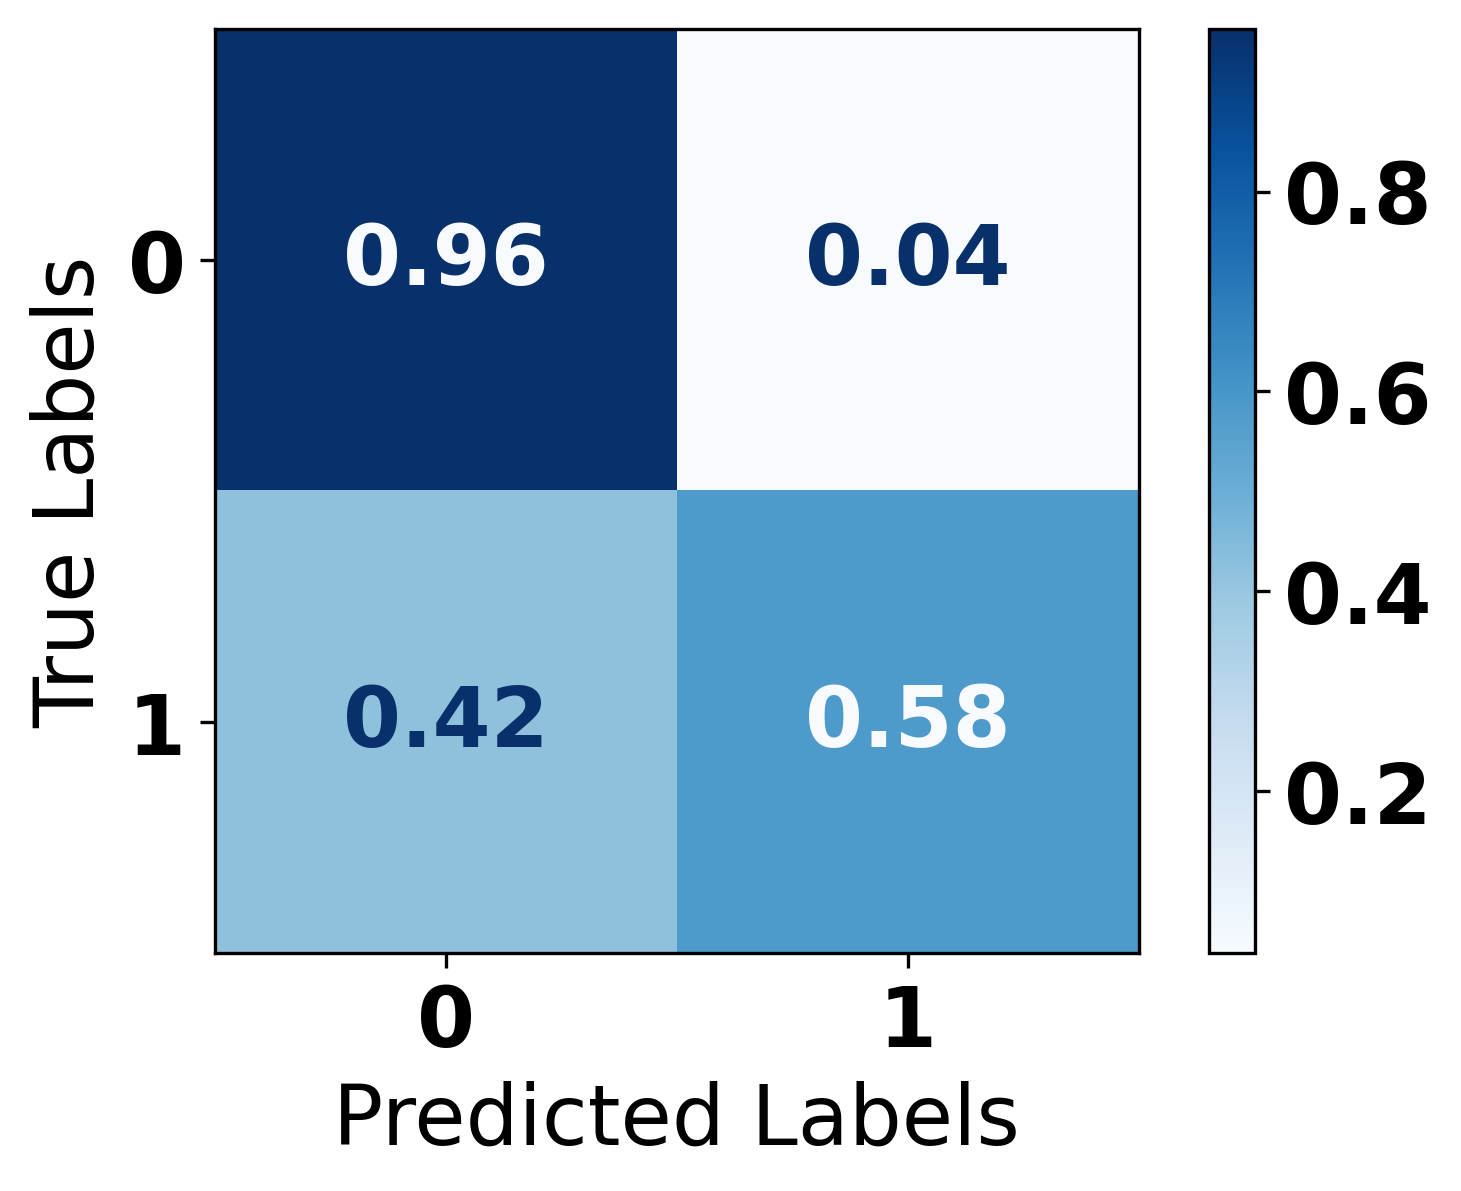

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.96      0.98     12150
     Class 1       0.26      0.58      0.36       271

    accuracy                           0.95     12421
   macro avg       0.62      0.77      0.67     12421
weighted avg       0.97      0.95      0.96     12421

Train Accuracy: 0.9926374689721906
Test Accuracy: 0.9544320103051284


In [ ]:
!pip install catboost

# Import necessary libraries
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Create and fit the CatBoost model
catboost = CatBoostClassifier(random_state=7, verbose=0)  # Set verbose to 0 to disable logging
catboost.fit(x_train, y_train)

# Predict on the test set
y_pred = catboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=catboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = catboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(catboost, '/content/drive/MyDrive/Myocardial Infarction (MI)/Model/CatBoost.pkl')
"""

['/content/drive/MyDrive/Myocardial Infarction (MI)/Model/CatBoost.pkl']

In [ ]:
import joblib

# Load the model from file
CatBoost = joblib.load('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/CatBoost.pkl')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 11619, number of negative: 12150
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012876 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 169
[LightGBM] [Info] Number of data points in the train set: 23769, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.488830 -> initscore=-0.044687
[LightGBM] [Info] Start training from score -0.044687


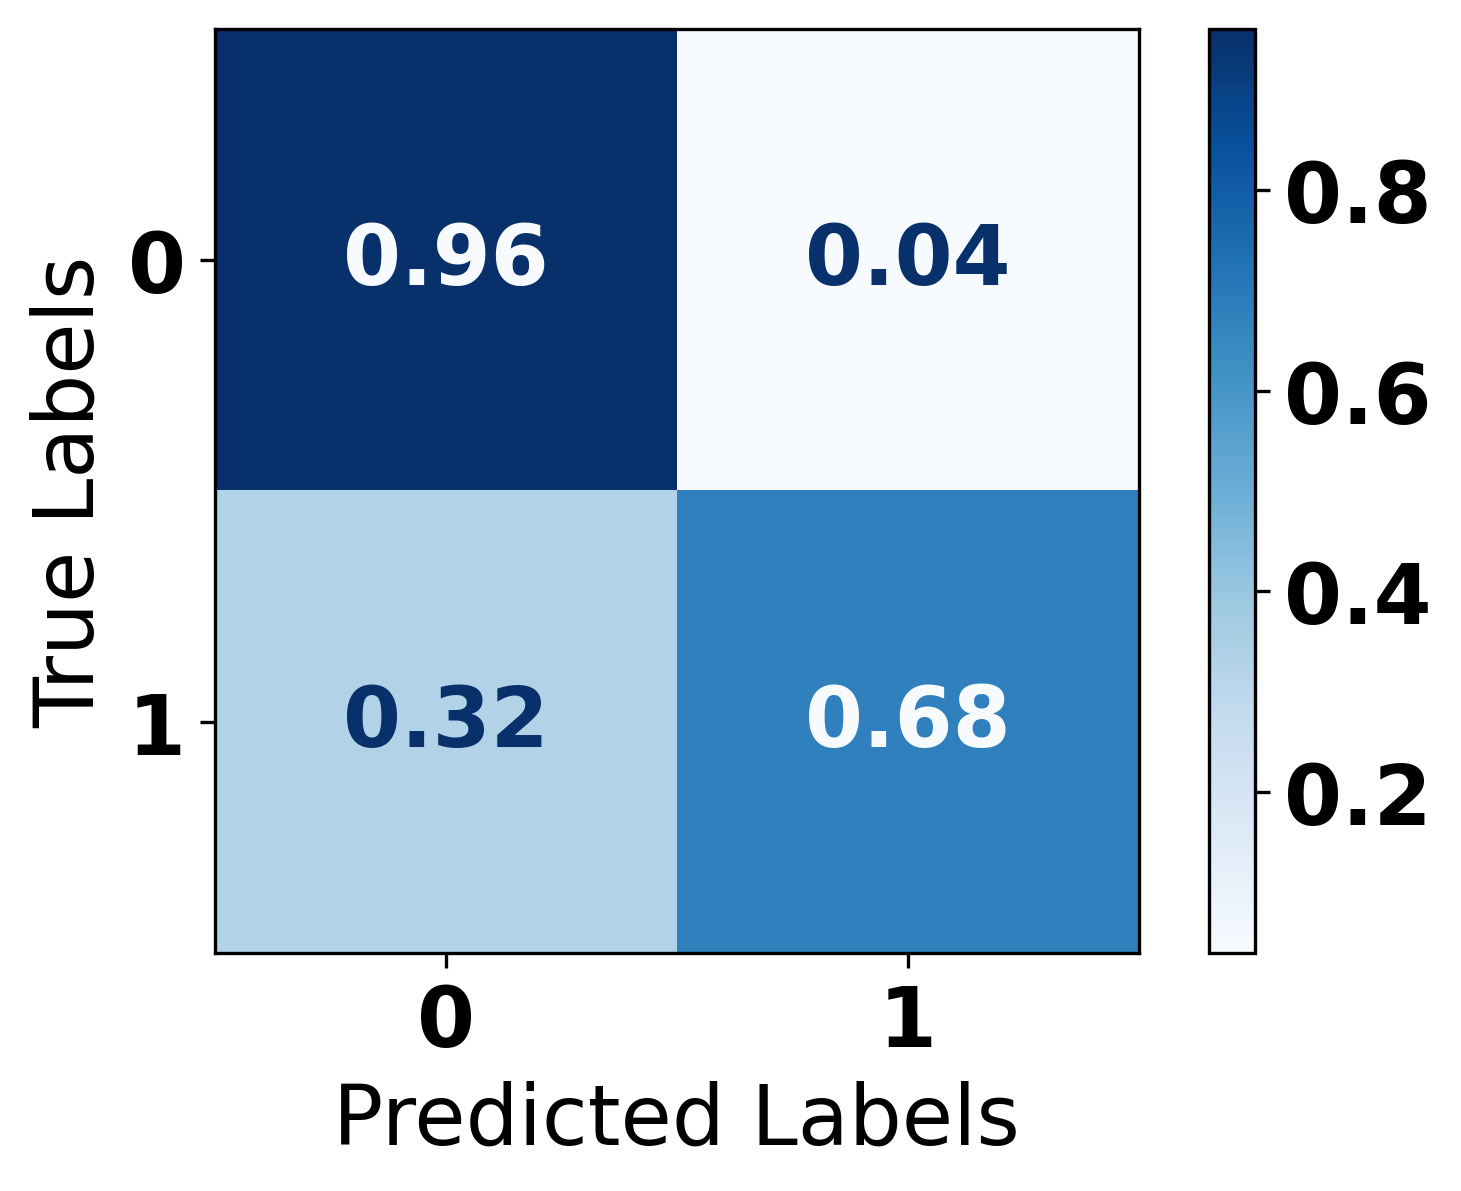

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.96      0.98     12150
     Class 1       0.28      0.68      0.39       271

    accuracy                           0.95     12421
   macro avg       0.63      0.82      0.68     12421
weighted avg       0.98      0.95      0.96     12421

Train Accuracy: 0.8161470823341327
Test Accuracy: 0.9544320103051284


In [ ]:
# Import necessary libraries
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Create and fit the LightGBM model
lgbm = lgb.LGBMClassifier(
    random_state=2,
    n_estimators=4,         # Number of boosting iterations
    learning_rate=0.1,        # Learning rate
    max_depth=1,              # Maximum tree depth for base learners
    num_leaves=2,            # Maximum number of leaves in one tree
    subsample=0.1,            # Subsample ratio of the training instances
    colsample_bytree=0.3      # Subsample ratio of columns when constructing each tree
)
lgbm.fit(x_train, y_train)

# Predict on the test set
y_pred = lgbm.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgbm.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = lgbm.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(lgbm, '/content/drive/MyDrive/Myocardial Infarction (MI)/Model/LGBM.pkl')
"""

['/content/drive/MyDrive/Myocardial Infarction (MI)/Model/LGBM.pkl']

In [ ]:
import joblib

# Load the model from file
LGBM = joblib.load('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/LGBM.pkl')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


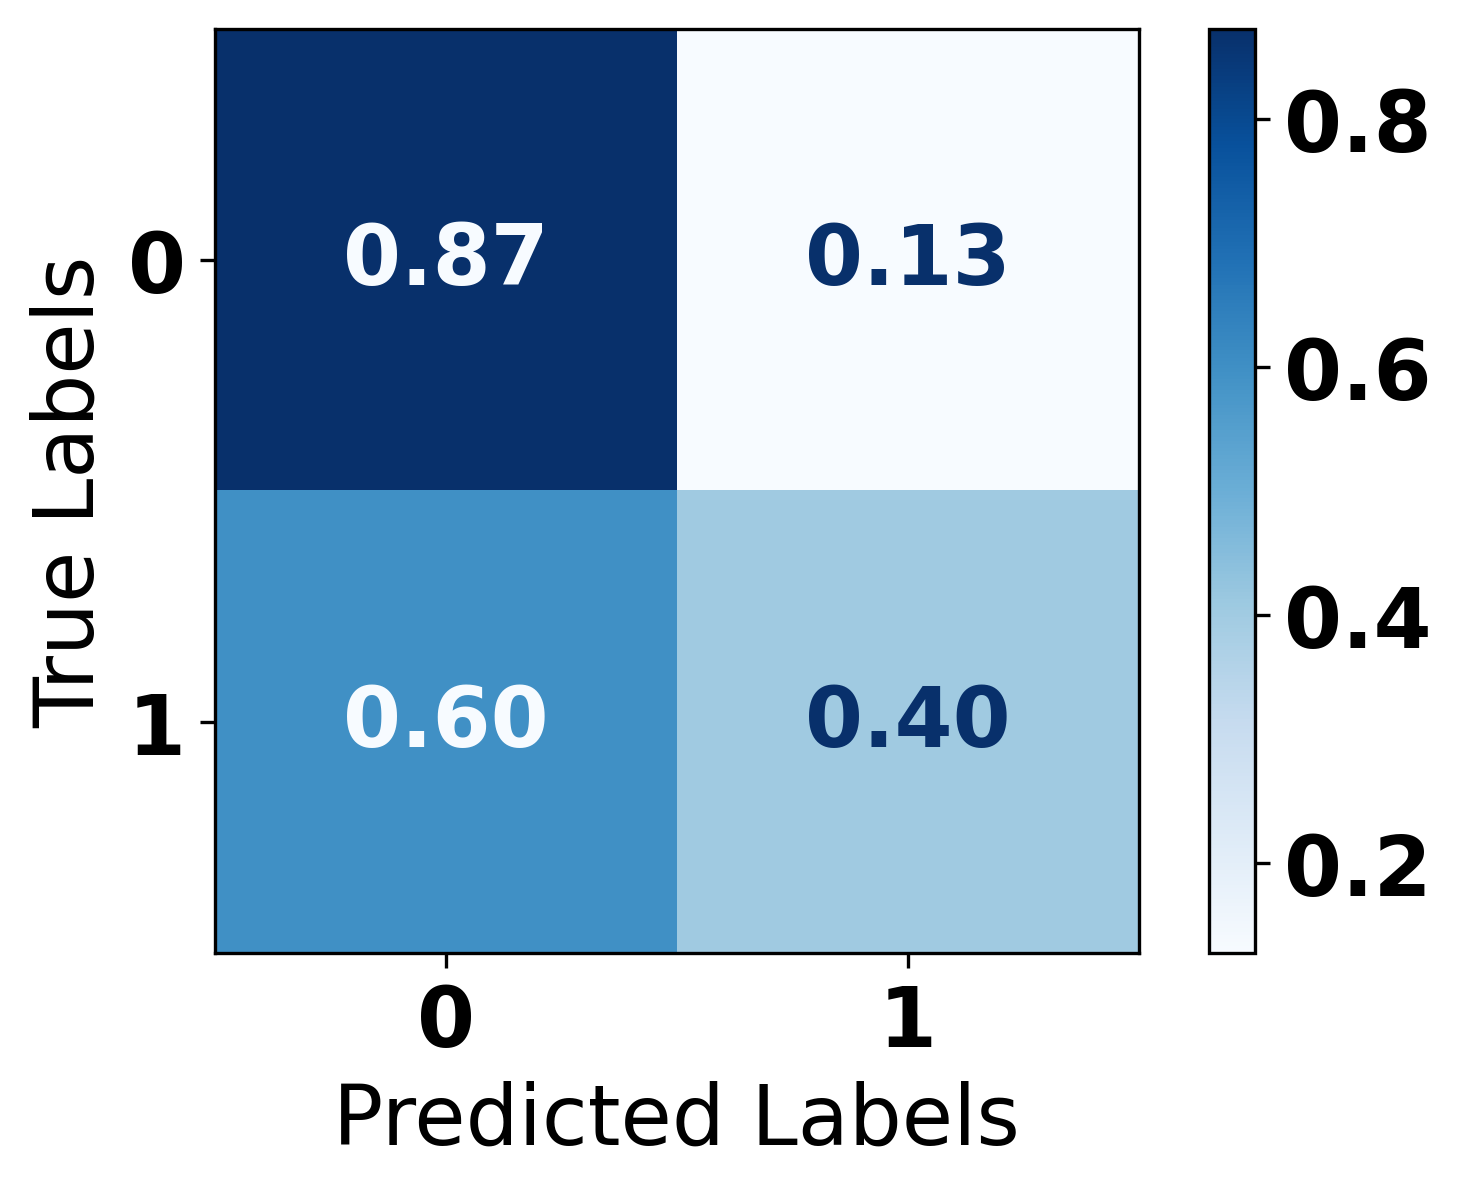

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.98      0.87      0.93     12150
     Class 1       0.07      0.40      0.11       271

    accuracy                           0.86     12421
   macro avg       0.53      0.64      0.52     12421
weighted avg       0.96      0.86      0.91     12421

Train Accuracy: 0.6429803525600573
Test Accuracy: 0.862490942758232


In [ ]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Create and fit the Gradient Boosting Machine model
gbm = GradientBoostingClassifier(
    random_state=2,
    n_estimators=4,        # Number of boosting stages to be run
    learning_rate=0.1,       # Learning rate shrinks the contribution of each tree by learning_rate
    max_depth=1,             # Maximum depth of the individual regression estimators
    subsample=0.9,           # Fraction of samples used for fitting the individual base learners
    max_features='sqrt'      # Number of features to consider when looking for the best split
)
gbm.fit(x_train, y_train)

# Predict on the test set
y_pred = gbm.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gbm.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = gbm.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(gbm, '/content/drive/MyDrive/Myocardial Infarction (MI)/Model/GBM.pkl')
"""

['/content/drive/MyDrive/Myocardial Infarction (MI)/Model/GBM.pkl']

In [ ]:
import joblib

# Load the model from file
GBM = joblib.load('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/GBM.pkl')

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


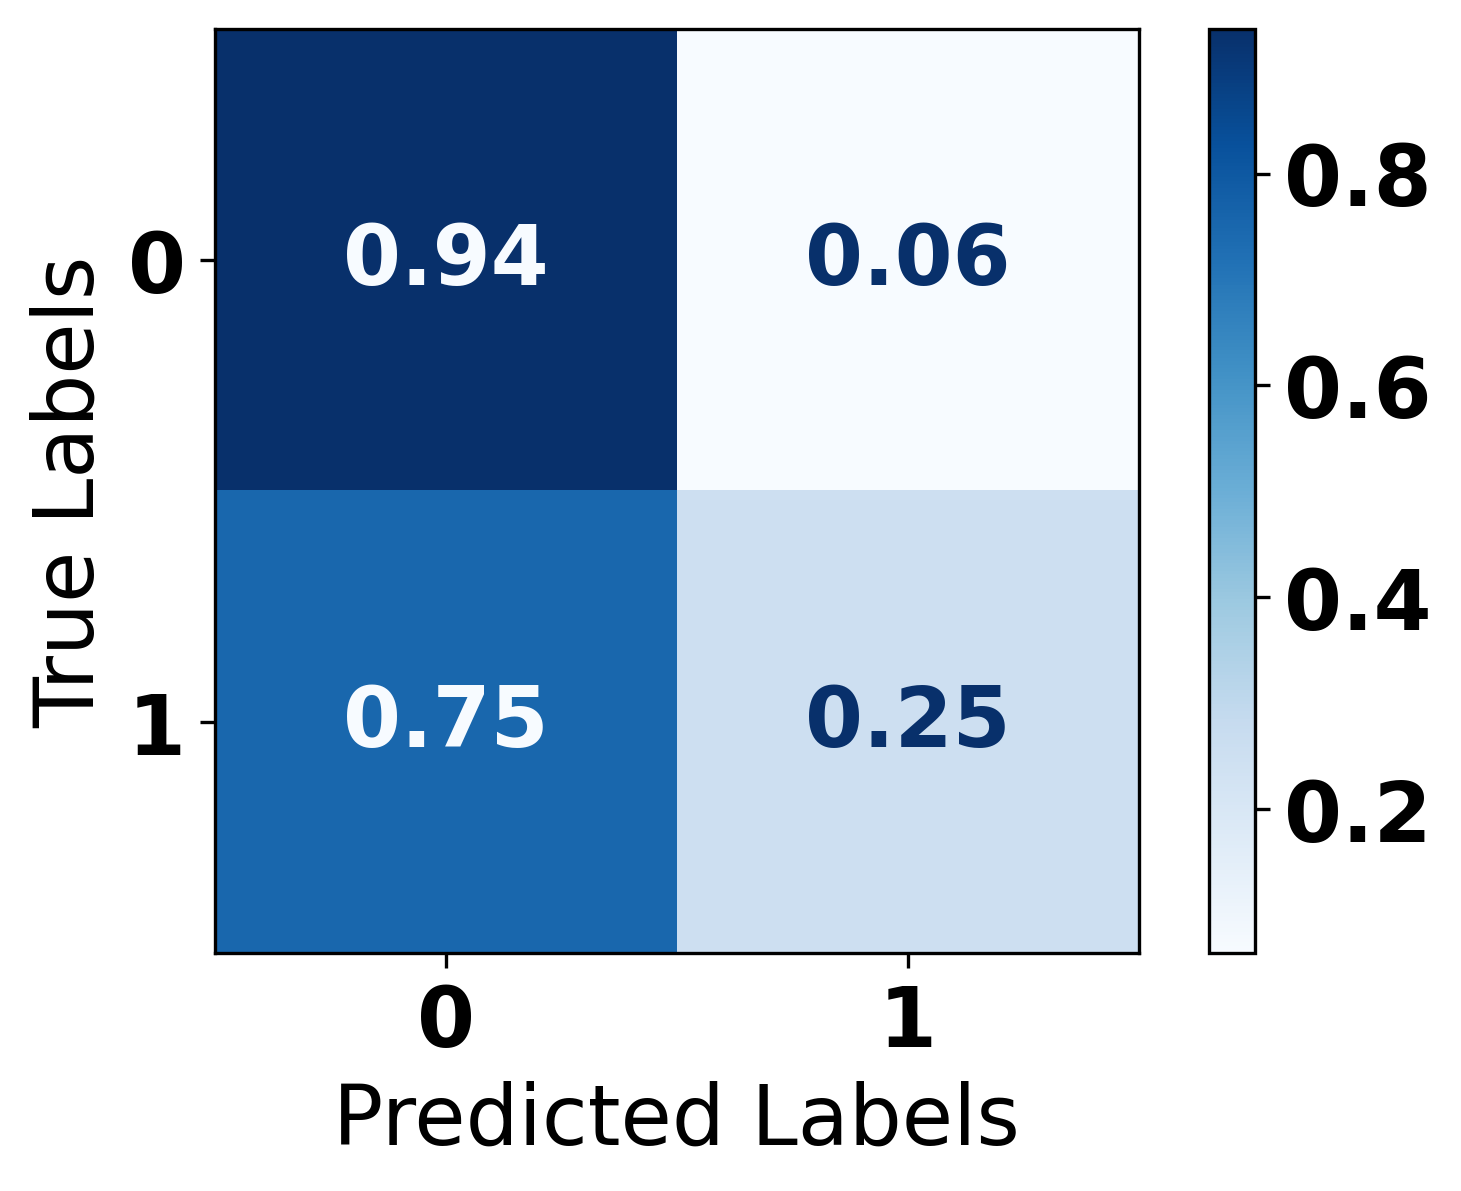

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.98      0.94      0.96     12150
     Class 1       0.08      0.25      0.12       271

    accuracy                           0.92     12421
   macro avg       0.53      0.59      0.54     12421
weighted avg       0.96      0.92      0.94     12421

Train Accuracy: 0.9786276242164164
Test Accuracy: 0.9214233958618469


In [ ]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Create and fit the k-NN model
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

# Predict on the test set
y_pred = knn.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = knn.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(knn, '/content/drive/MyDrive/Myocardial Infarction (MI)/Model/KNN.pkl')
"""

['/content/drive/MyDrive/Myocardial Infarction (MI)/Model/KNN.pkl']

In [ ]:
import joblib

# Load the model from file
KNN = joblib.load('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/KNN.pkl')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


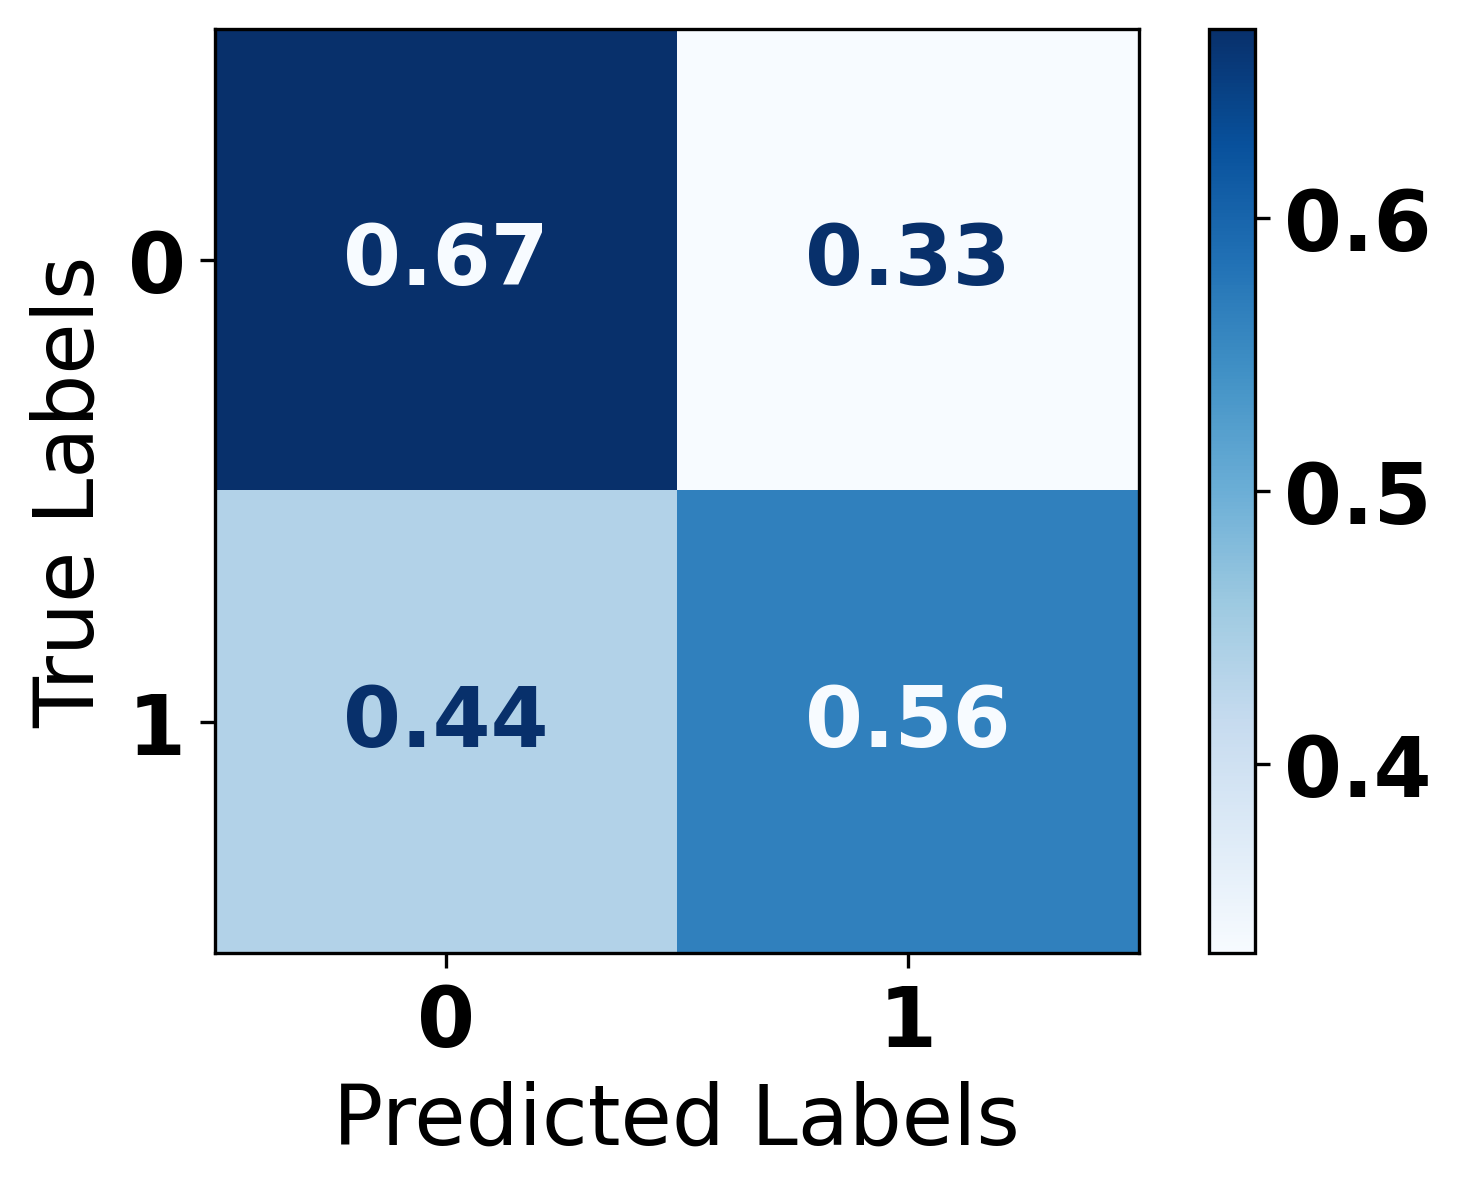

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.67      0.80     12150
     Class 1       0.04      0.56      0.07       271

    accuracy                           0.67     12421
   macro avg       0.51      0.62      0.43     12421
weighted avg       0.96      0.67      0.78     12421

Train Accuracy: 0.6371323993436829
Test Accuracy: 0.6669350293857177


In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Create and fit the Logistic Regression model
log_reg = LogisticRegression(
    random_state=2,
    solver='lbfgs',          # Algorithm to use in the optimization problem
    max_iter=4,           # Maximum number of iterations for solvers to converge
    C=1,                   # Inverse of regularization strength; must be a positive float
    penalty='l2',            # Used to specify the norm used in the penalization
    class_weight='balanced'  # Adjust weights inversely proportional to class frequencies
)
log_reg.fit(x_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = log_reg.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(log_reg, '/content/drive/MyDrive/Myocardial Infarction (MI)/Model/LR.pkl')
"""

['/content/drive/MyDrive/Myocardial Infarction (MI)/Model/LR.pkl']

In [ ]:
import joblib

# Load the model from file
LR = joblib.load('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/LR.pkl')

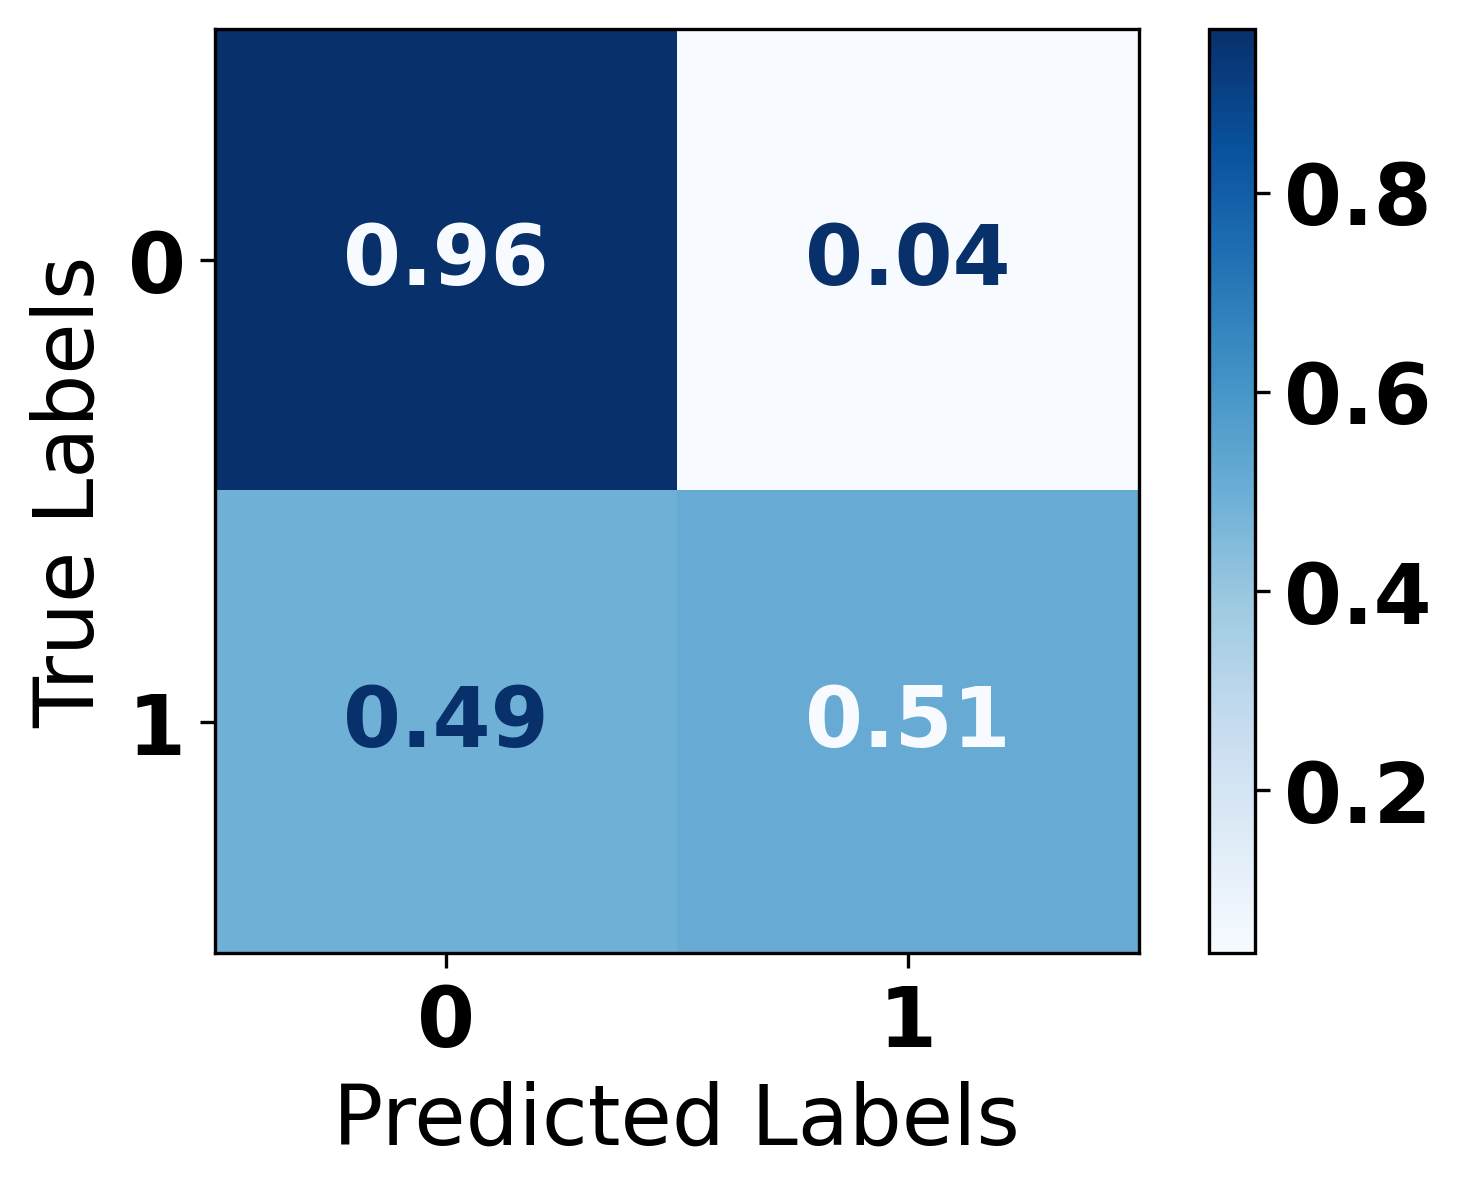

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.96      0.98     12150
     Class 1       0.24      0.51      0.33       271

    accuracy                           0.95     12421
   macro avg       0.61      0.74      0.65     12421
weighted avg       0.97      0.95      0.96     12421

Train Accuracy: 0.9958349110185536
Test Accuracy: 0.9541904838579824


In [ ]:
# Import necessary libraries
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Create and fit the XGBoost Classifier
XGB = XGBClassifier(random_state=7)
XGB.fit(x_train, y_train)

# Predict on the test set
y_pred = XGB.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=XGB.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = XGB.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(XGB, '/content/drive/MyDrive/Myocardial Infarction (MI)/Model/XGB.pkl')
"""

['/content/drive/MyDrive/Myocardial Infarction (MI)/Model/XGB.pkl']

In [ ]:
import joblib

# Load the model from file
XGB = joblib.load('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/XGB.pkl')

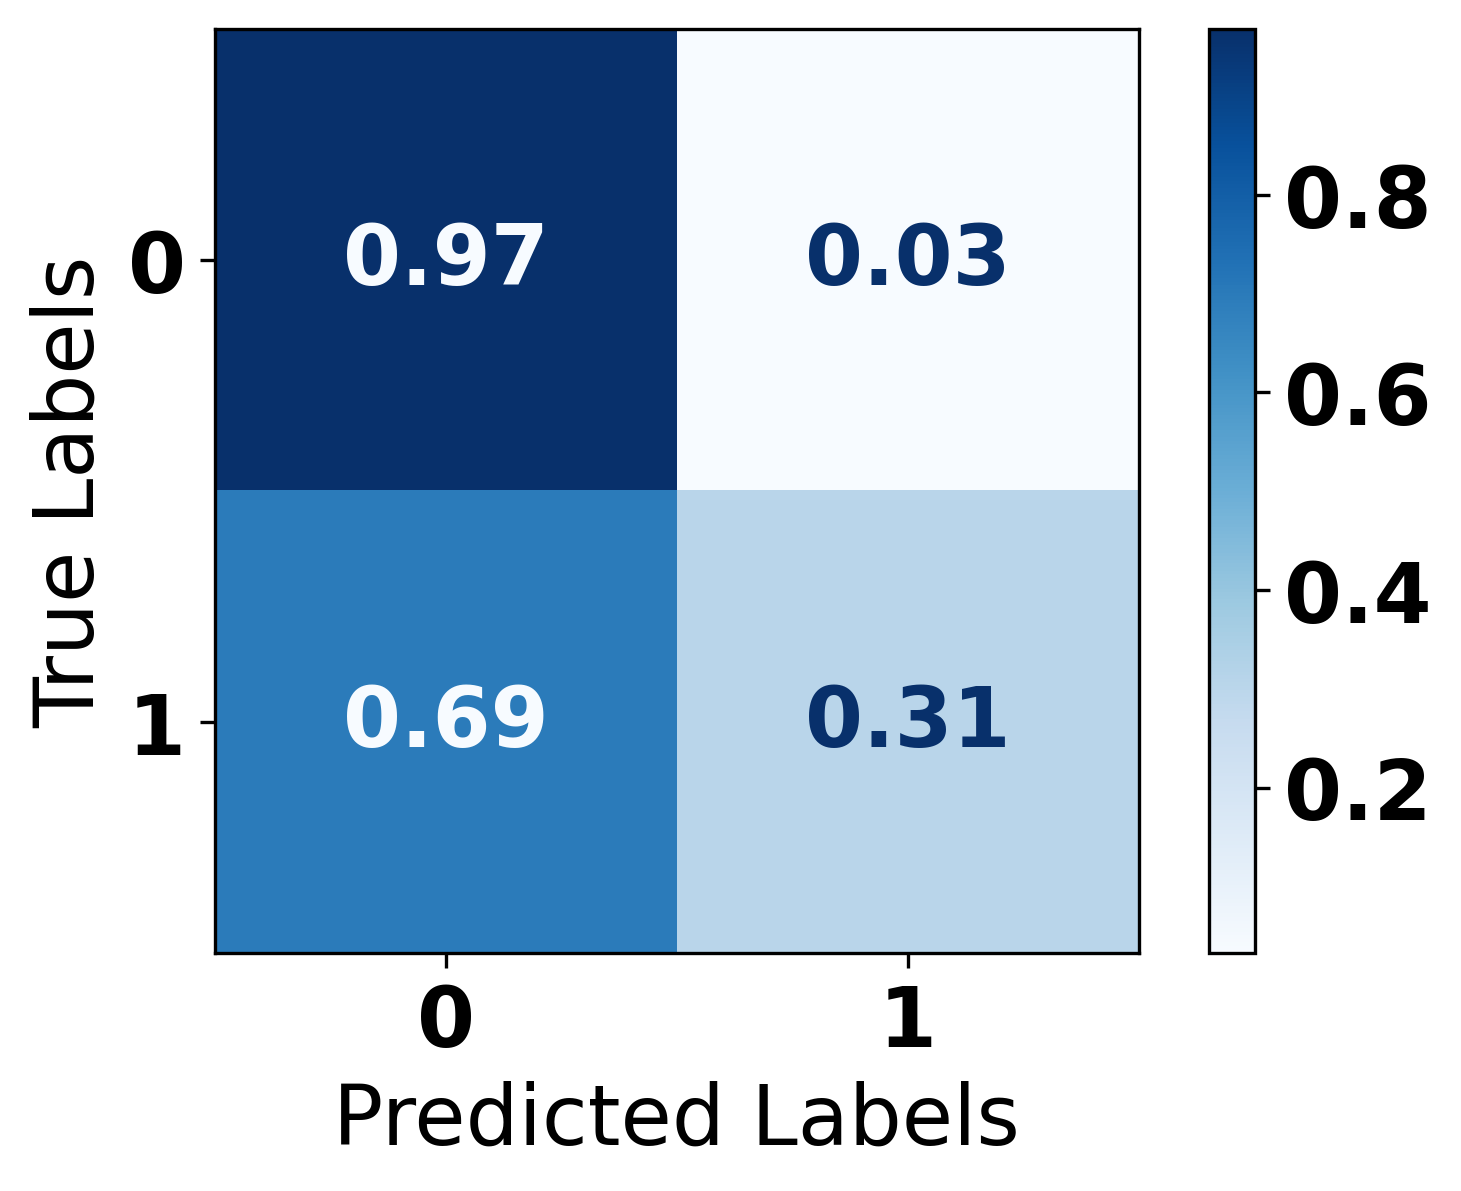

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.98      0.97      0.98     12150
     Class 1       0.17      0.31      0.22       271

    accuracy                           0.95     12421
   macro avg       0.58      0.64      0.60     12421
weighted avg       0.97      0.95      0.96     12421

Train Accuracy: 1.0
Test Accuracy: 0.9530633604379679


In [ ]:
# Create and fit the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(random_state=7)
DT.fit(x_train, y_train)

# Predict on the test set
y_pred = DT.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DT.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = DT.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(DT, '/content/drive/MyDrive/Myocardial Infarction (MI)/Model/DT.pkl')
"""

['/content/drive/MyDrive/Myocardial Infarction (MI)/Model/DT.pkl']

In [ ]:
import joblib

# Load the model from file
DT = joblib.load('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/DT.pkl')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


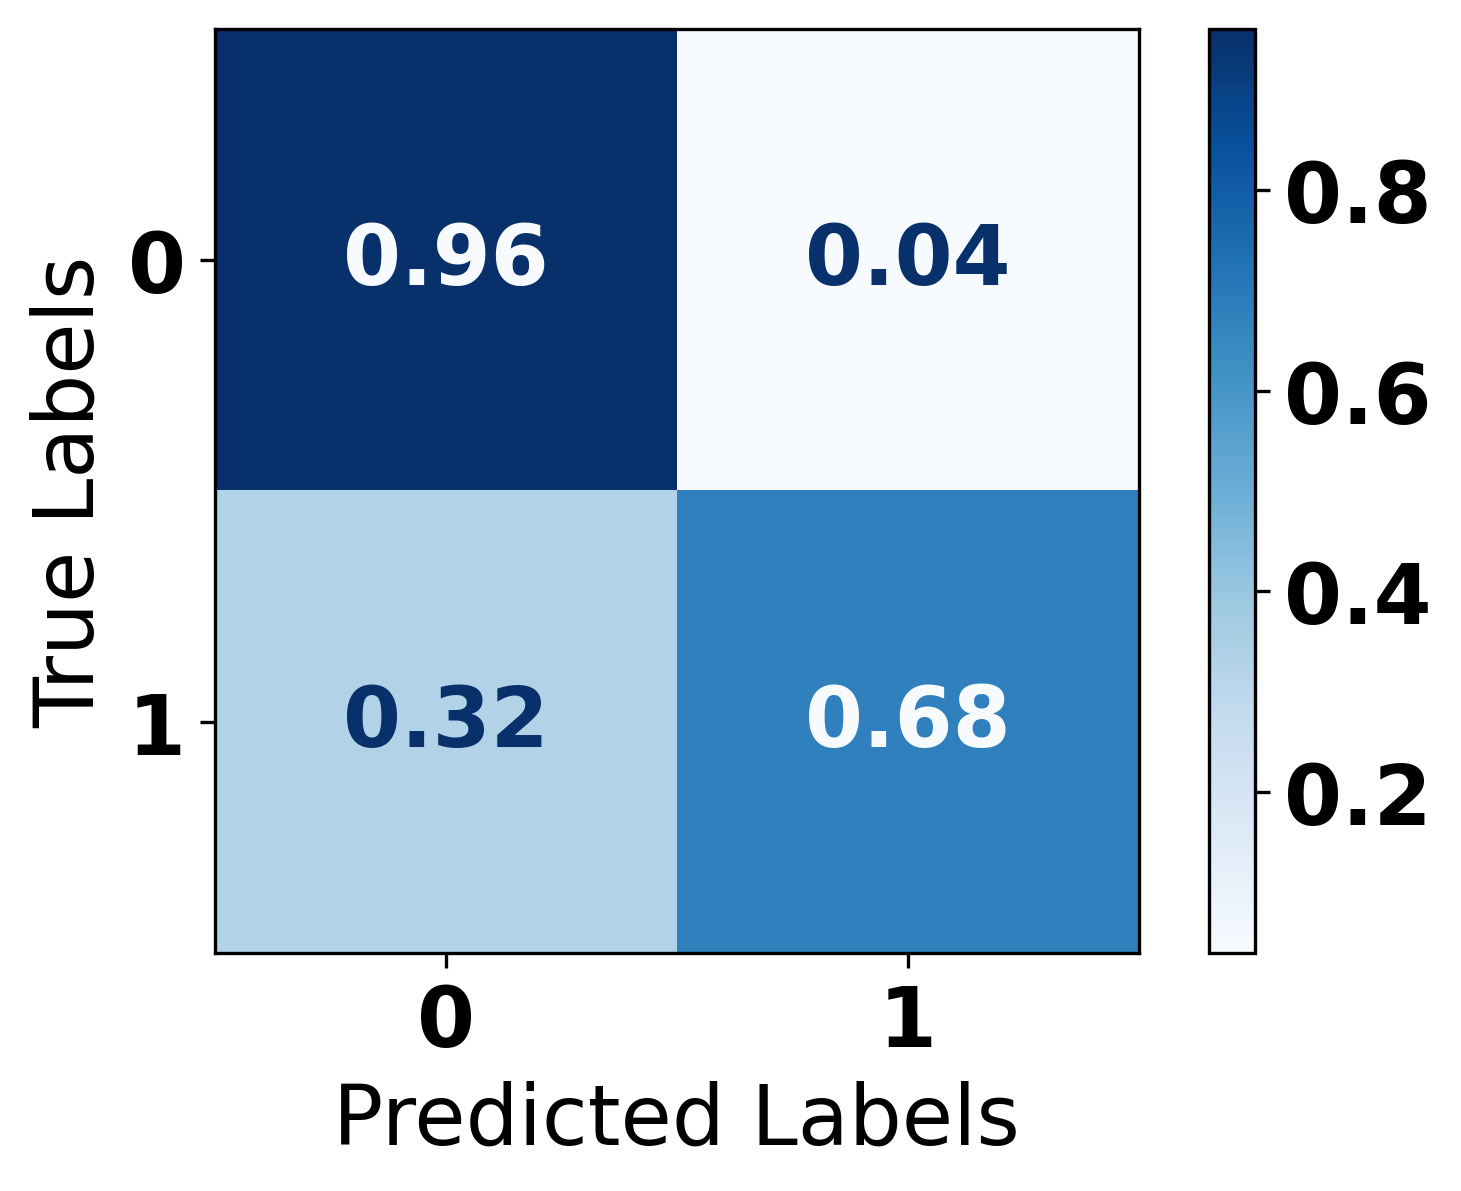

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.96      0.98     12150
     Class 1       0.28      0.68      0.39       271

    accuracy                           0.95     12421
   macro avg       0.63      0.82      0.68     12421
weighted avg       0.98      0.95      0.96     12421

Train Accuracy: 0.8161470823341327
Test Accuracy: 0.9544320103051284


In [ ]:
# Create an RUSBoost classifier
from imblearn.ensemble import RUSBoostClassifier

rusboost = RUSBoostClassifier(n_estimators=2, random_state=2)

# Fit the classifier to the training data
rusboost.fit(x_train, y_train)

# Predicting the output on the test dataset
y_pred = rusboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rusboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = rusboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(rusboost, '/content/drive/MyDrive/Myocardial Infarction (MI)/Model/RUSBoost.pkl')
"""

['/content/drive/MyDrive/Myocardial Infarction (MI)/Model/RUSBoost.pkl']

In [ ]:
import joblib

# Load the model from file
RUSBoost = joblib.load('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/RUSBoost.pkl')

<ipython-input-67-3d23888975aa>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  y_pred = RF.fit(x_train, y_train).predict(x_test)


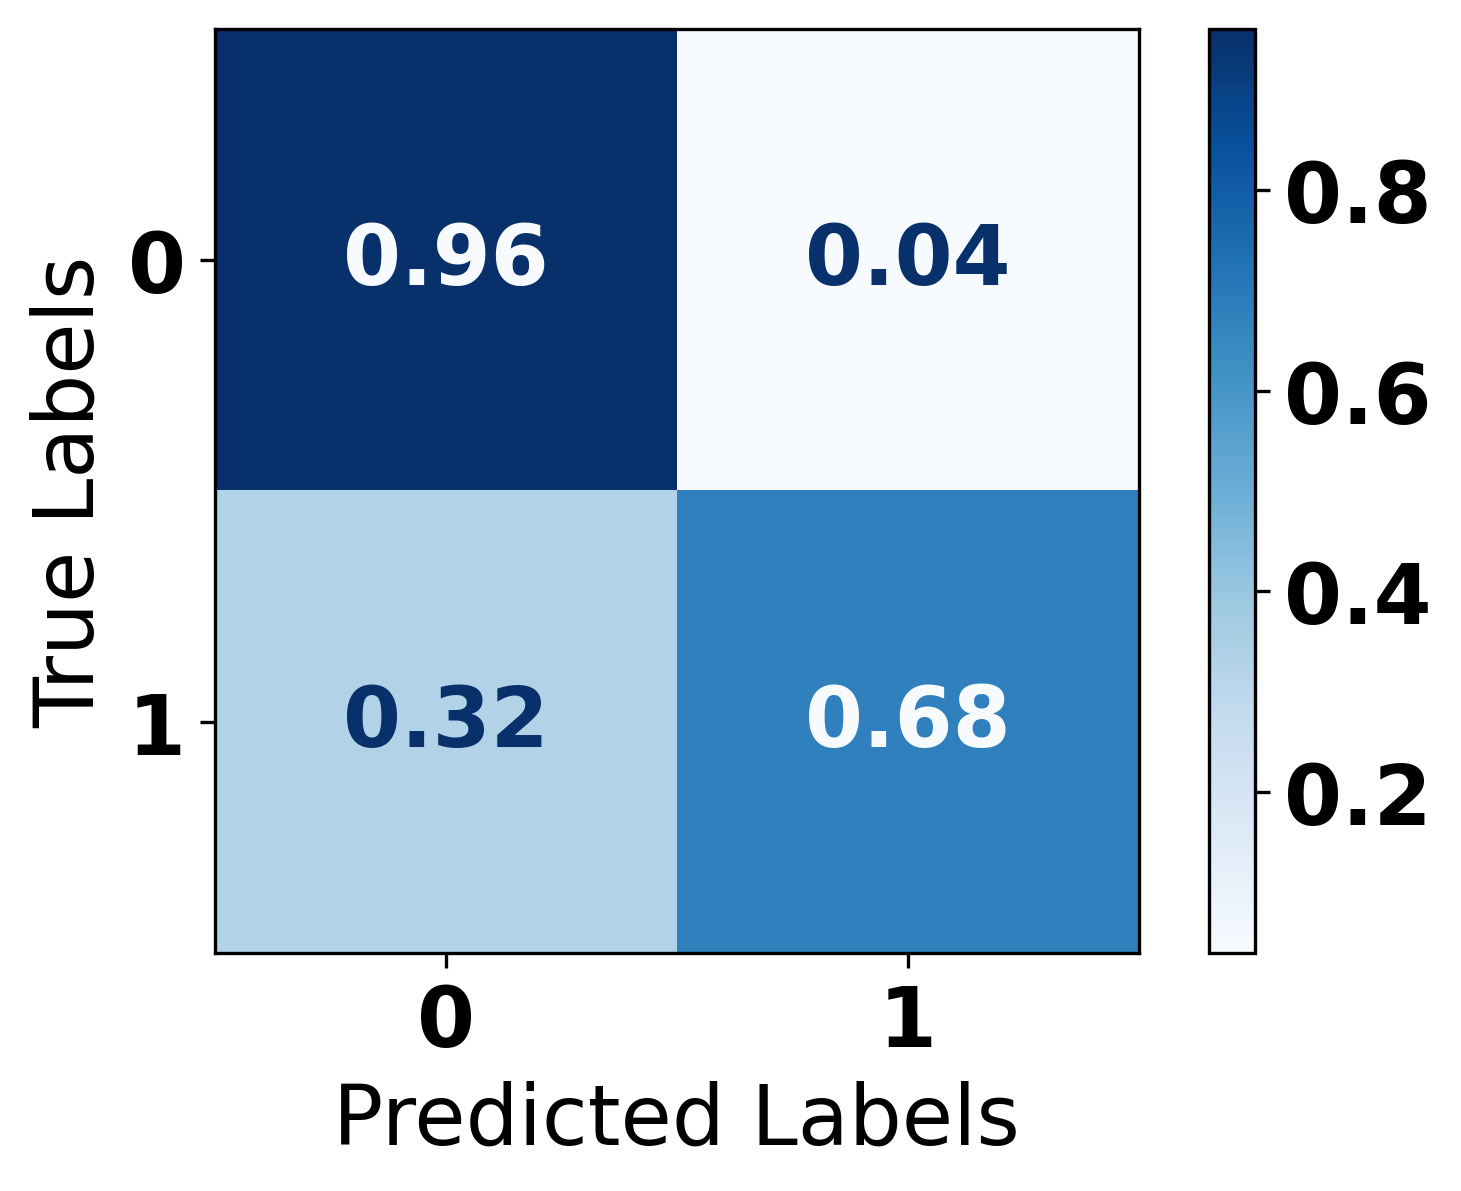

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98     12150
           1       0.28      0.68      0.39       271

    accuracy                           0.95     12421
   macro avg       0.63      0.82      0.68     12421
weighted avg       0.98      0.95      0.96     12421

Train Accuracy: 0.8161470823341327
Test Accuracy: 0.9544320103051284


In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(
    n_estimators=2,
    max_depth=1,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    random_state=1
)

# Fit the classifier to the training data
y_pred = RF.fit(x_train, y_train).predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = RF.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(RF, '/content/drive/MyDrive/Myocardial Infarction (MI)/Model/RF.pkl')
"""

['/content/drive/MyDrive/Myocardial Infarction (MI)/Model/RF.pkl']

In [ ]:
import joblib

# Load the model from file
RF = joblib.load('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/RF.pkl')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


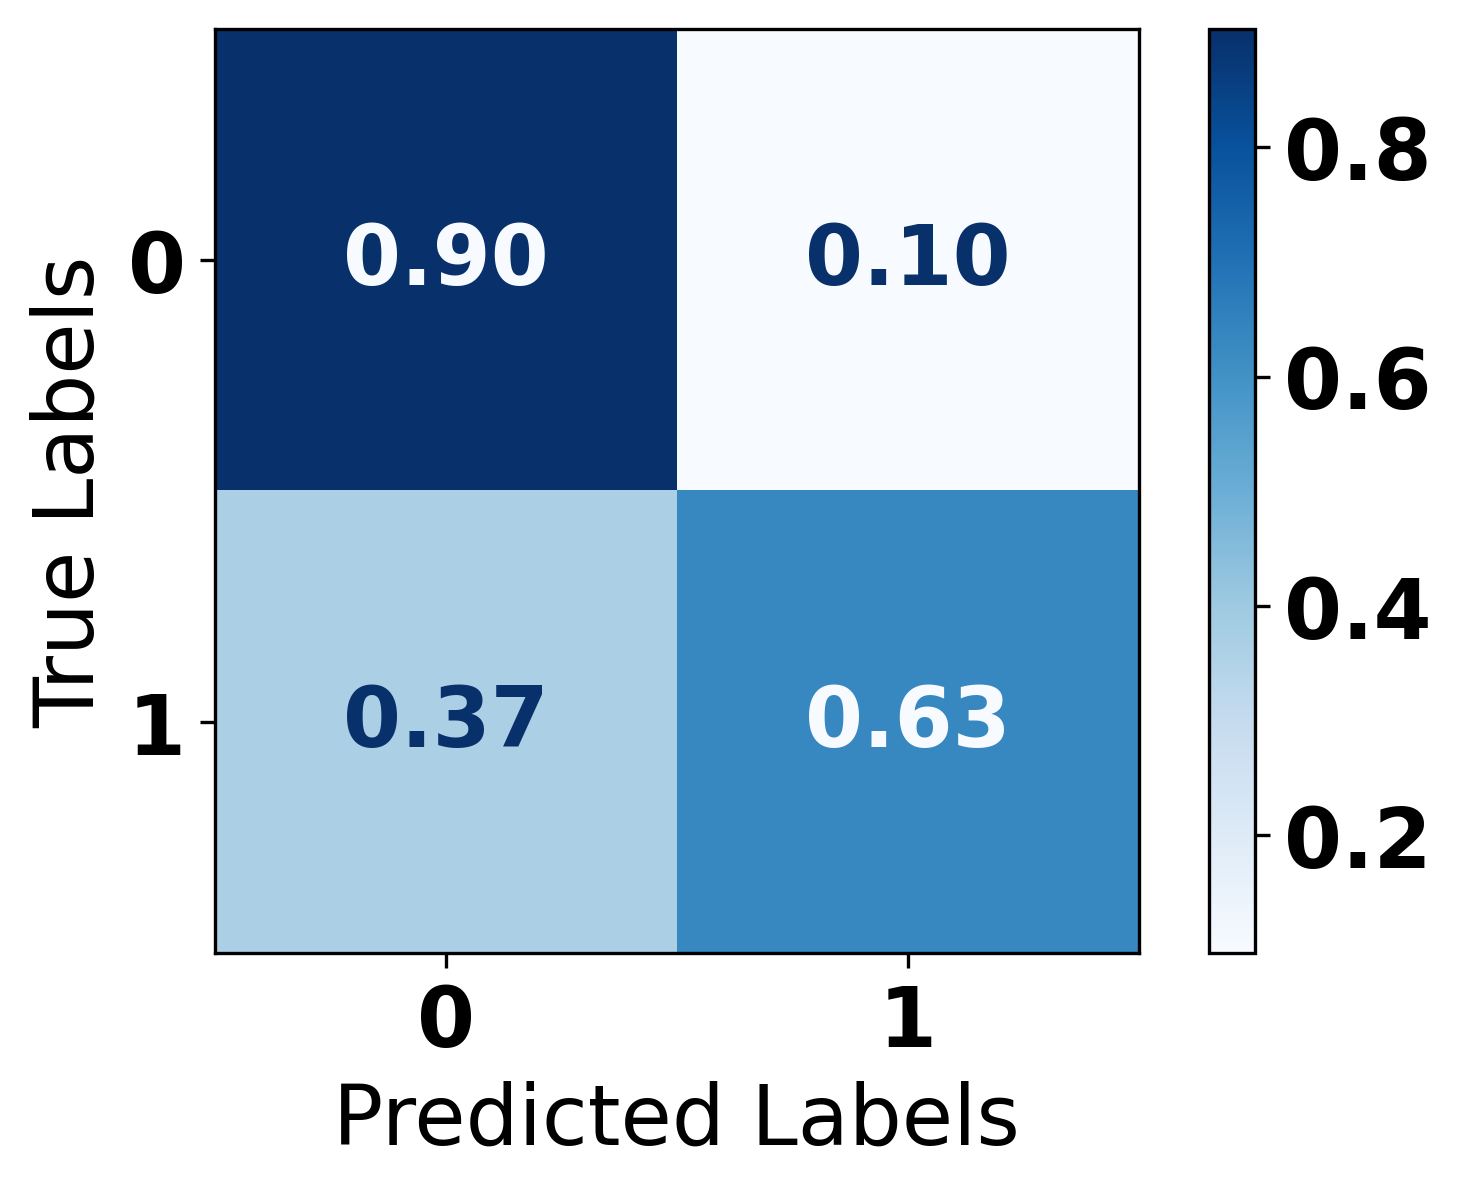

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.95     12150
           1       0.13      0.63      0.21       271

    accuracy                           0.90     12421
   macro avg       0.56      0.77      0.58     12421
weighted avg       0.97      0.90      0.93     12421

Train Accuracy: 0.7858555261054314
Test Accuracy: 0.8971902423315353


In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB(priors=[0.9, 0.1], var_smoothing=1e-3)

# Fit the classifier to the training data
y_pred = GNB.fit(x_train, y_train).predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GNB.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = GNB.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(GNB, '/content/drive/MyDrive/Myocardial Infarction (MI)/Model/GNB.pkl')
"""

['/content/drive/MyDrive/Myocardial Infarction (MI)/Model/GNB.pkl']

In [ ]:
import joblib

# Load the model from file
GNB = joblib.load('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/GNB.pkl')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


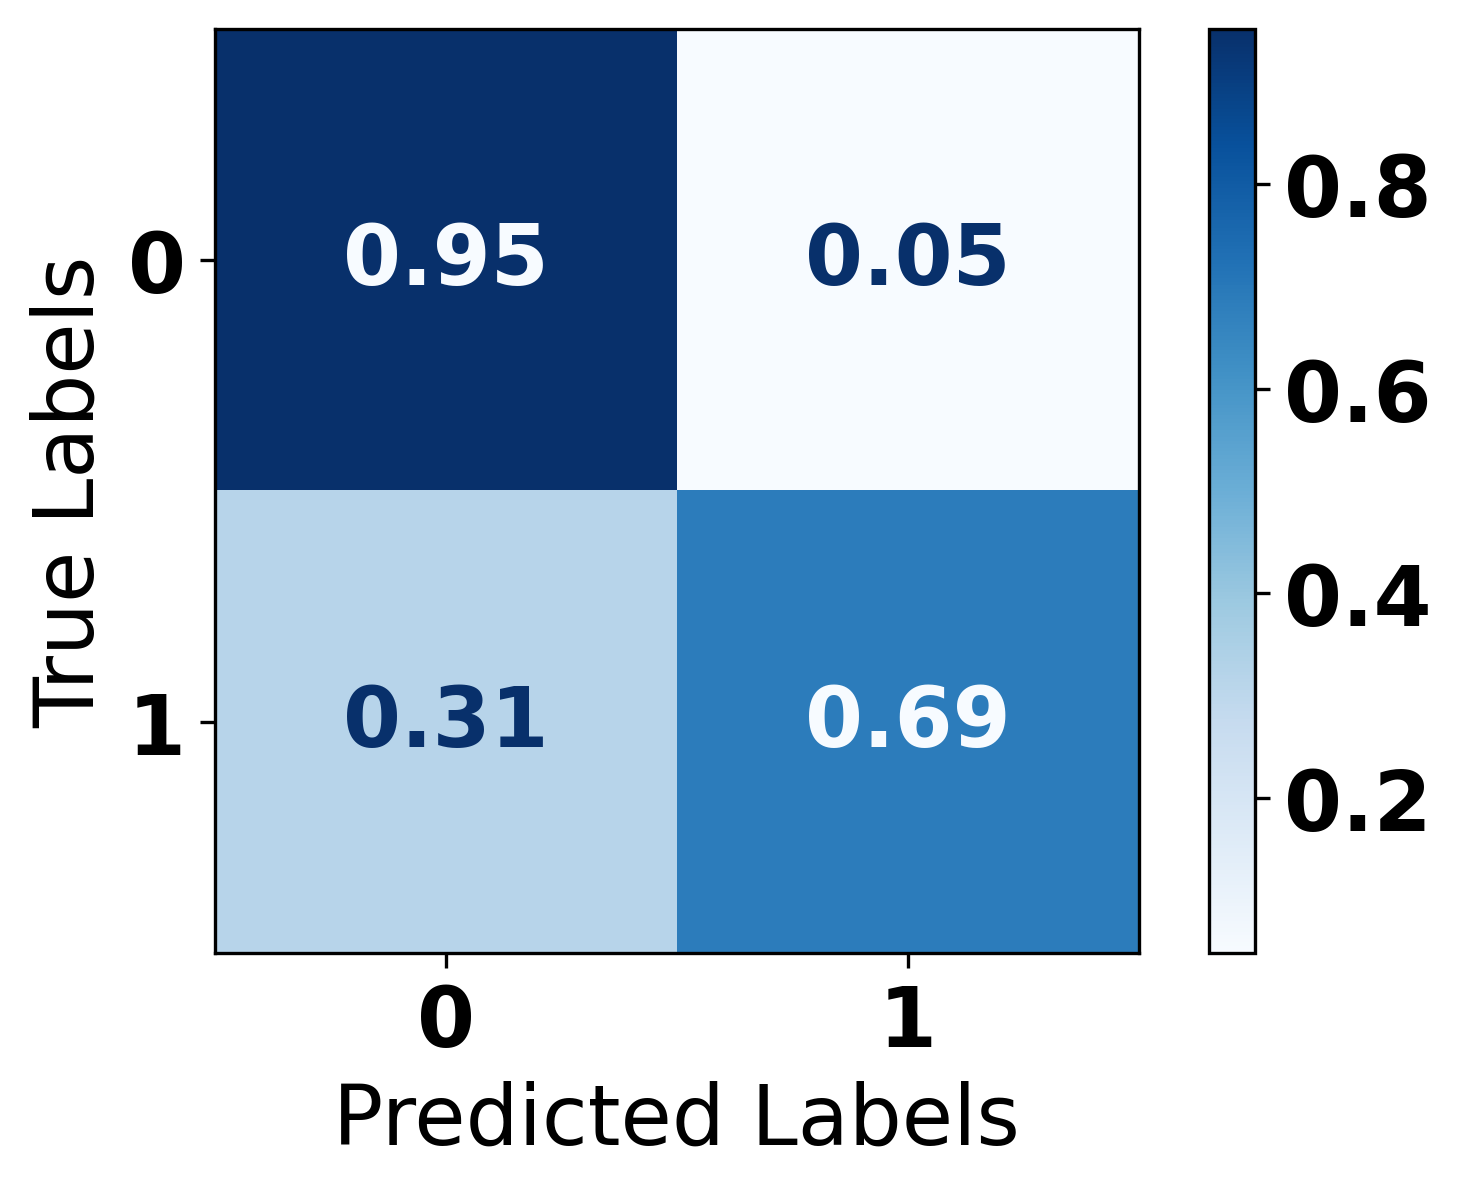

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97     12150
           1       0.24      0.69      0.36       271

    accuracy                           0.95     12421
   macro avg       0.62      0.82      0.66     12421
weighted avg       0.98      0.95      0.96     12421

Train Accuracy: 0.8313349320543565
Test Accuracy: 0.9459785846550197


In [ ]:
# Create an AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier

Adaboost = AdaBoostClassifier(n_estimators=11, learning_rate=0.2, random_state=33)
# Adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the AdaBoost classifier
Adaboost.fit(x_train, y_train)

# Make predictions on the test set
y_pred = Adaboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Adaboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = Adaboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(Adaboost, '/content/drive/MyDrive/Myocardial Infarction (MI)/Model/AdaBoost.pkl')
"""

['/content/drive/MyDrive/Myocardial Infarction (MI)/Model/AdaBoost.pkl']

In [ ]:
import joblib

# Load the model from file
AdaBoost = joblib.load('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/AdaBoost.pkl')

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(
    random_state=55,
    max_iter=50,
    hidden_layer_sizes=(4,),  # Size of the hidden layers (default is a single layer with 100 neurons)
    activation='relu',          # Activation function for the hidden layer ('identity', 'logistic', 'tanh', 'relu')
    solver='adam',              # Solver for weight optimization ('lbfgs', 'sgd', 'adam')
    alpha=0.00001,               # L2 penalty (regularization term) parameter
    batch_size='auto',          # Size of minibatches for stochastic optimizers
    learning_rate='constant',   # Learning rate schedule ('constant', 'invscaling', 'adaptive')
    learning_rate_init=0.0001,   # Initial learning rate used
    power_t=0.5,                # The exponent for inverse scaling learning rate
    shuffle=True,               # Whether to shuffle samples in each iteration
    tol=1e-8,                   # Tolerance for the optimization
    verbose=False,              # Whether to print progress messages to stdout
    warm_start=False,           # Reuse the solution of the previous call to fit as initialization
    momentum=0.2,               # Momentum for gradient descent update (only used when solver='sgd')
    nesterovs_momentum=True,    # Whether to use Nesterov's momentum (only used when solver='sgd' and momentum > 0)
    early_stopping=False,       # Whether to use early stopping to terminate training when validation score is not improving
    validation_fraction=0.1,    # The proportion of training data to set aside as validation set for early stopping
    beta_1=0.09,                 # Exponential decay rate for estimates of first moment vector in Adam
    beta_2=0.0999,               # Exponential decay rate for estimates of second moment vector in Adam
    epsilon=1e-4                # Value for numerical stability in Adam
).fit(x_train, y_train)
y_pred = clf.predict_proba(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Normalized Confusion Matrix:
[[0.82263374 0.17736626]
 [0.26568266 0.73431734]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.82      0.90     12150
     Class 1       0.08      0.73      0.15       271

    accuracy                           0.82     12421
   macro avg       0.54      0.78      0.53     12421
weighted avg       0.97      0.82      0.88     12421



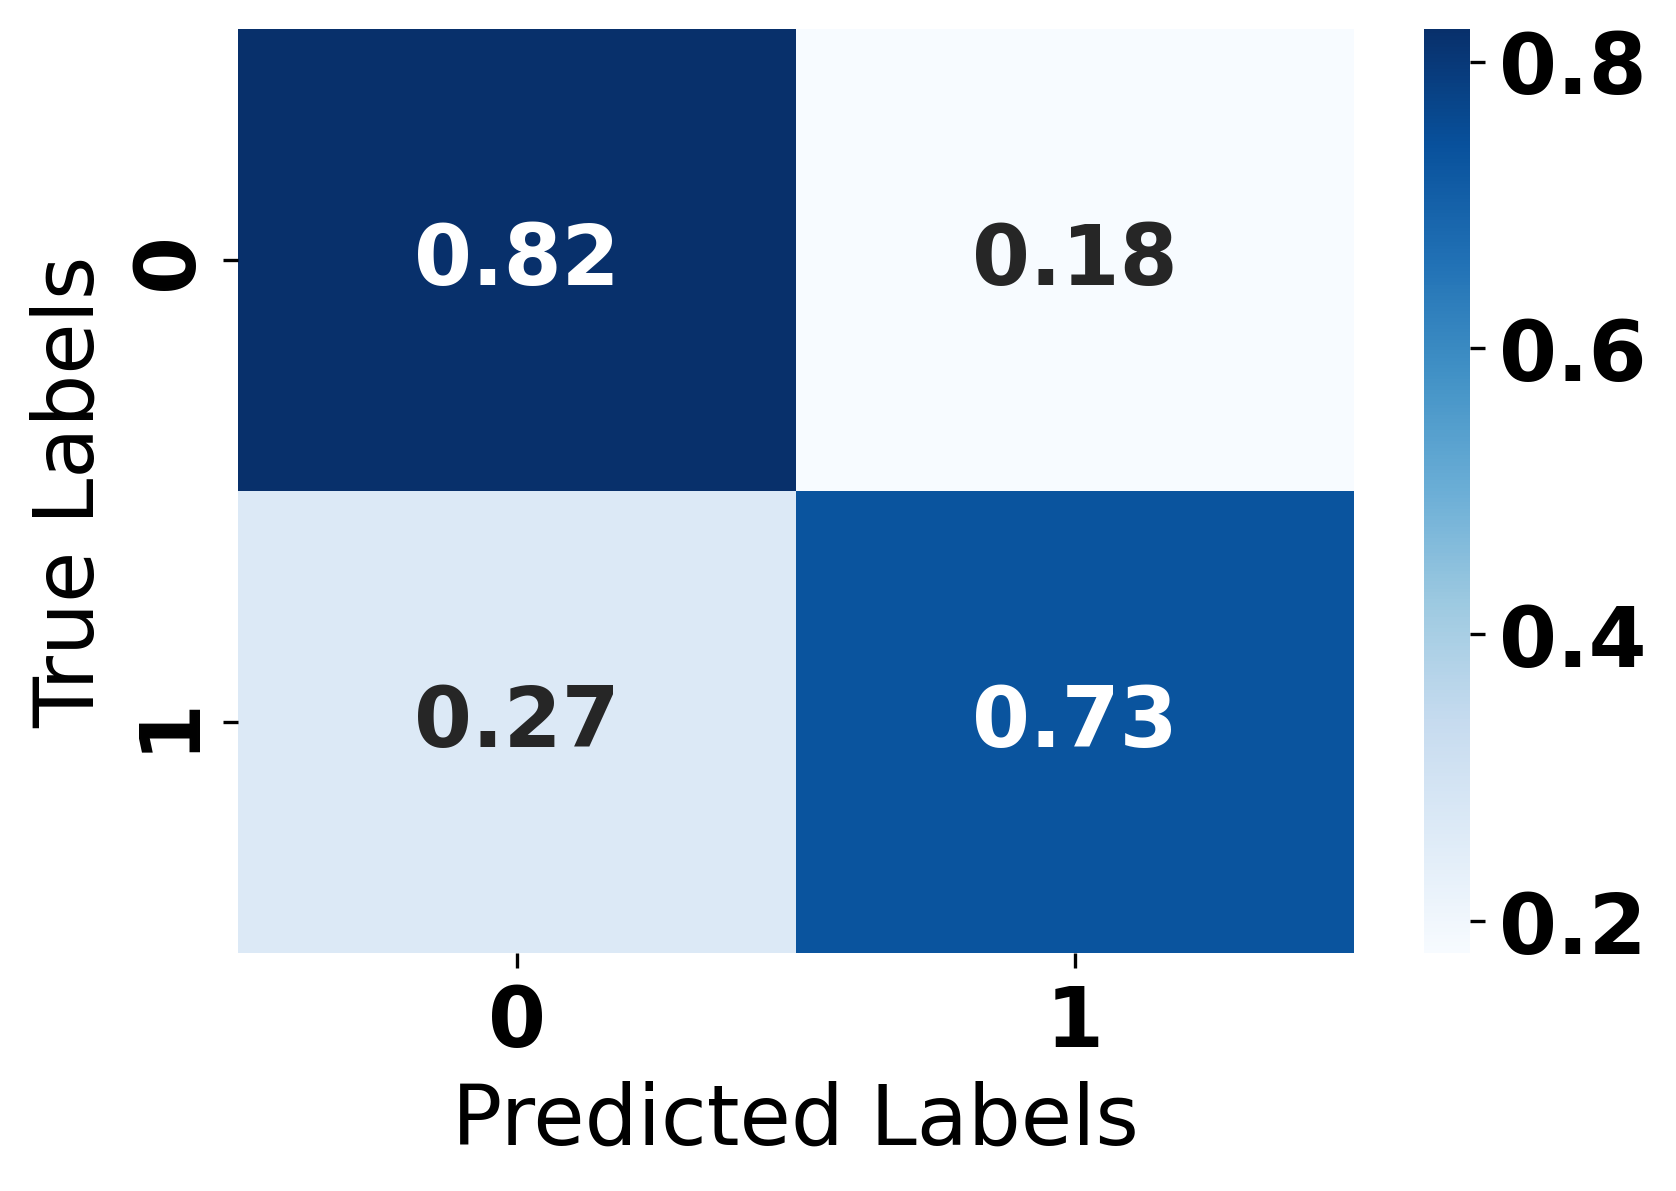

In [ ]:
# Predict probabilities on test data
y_pred_prob = clf.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(clf, '/content/drive/MyDrive/Myocardial Infarction (MI)/Model/MLP.pkl')
"""

['/content/drive/MyDrive/Myocardial Infarction (MI)/Model/MLP.pkl']

In [ ]:
import joblib

# Load the model from file
MLP = joblib.load('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/MLP.pkl')

### Deep Learning

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Add

# Input layer
input_layer = Input(shape=(x_train.shape[1], 1))

# First convolutional block
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# Second convolutional block with residual connection
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(pool1)
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2)

# Residual connection
residual1 = Conv1D(filters=64, kernel_size=1, activation='relu', padding='same')(pool1)
residual1 = Add()([residual1, conv2])
pool2 = MaxPooling1D(pool_size=2)(residual1)

# Flatten layer
flatten = Flatten()(pool2)

# Dense layers
dense1 = Dense(128, activation='relu')(flatten)
dense2 = Dense(64, activation='relu')(dense1)

# Output layer
output = Dense(1, activation='sigmoid')(dense2)

# Create the model
model = Model(inputs=input_layer, outputs=output)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
186/186 [==============================] - 5s 20ms/step - loss: 0.5811 - accuracy: 0.6960 - val_loss: 0.9046 - val_accuracy: 0.5524
Epoch 2/10
186/186 [==============================] - 5s 28ms/step - loss: 0.3975 - accuracy: 0.8285 - val_loss: 0.5198 - val_accuracy: 0.7690
Epoch 3/10
186/186 [==============================] - 3s 18ms/step - loss: 0.3705 - accuracy: 0.8393 - val_loss: 0.3052 - val_accuracy: 0.8841
Epoch 4/10
186/186 [==============================] - 3s 18ms/step - loss: 0.3502 - accuracy: 0.8500 - val_loss: 0.3506 - val_accuracy: 0.8681
Epoch 5/10
186/186 [==============================] - 4s 22ms/step - loss: 0.3398 - accuracy: 0.8561 - val_loss: 0.3576 - val_accuracy: 0.8586
Epoch 6/10
186/186 [==============================] - 7s 38ms/step - loss: 0.3294 - accuracy: 0.8565 - val_loss: 0.3351 - val_accuracy: 0.8652
Epoch 7/10
186/186 [==============================] - 6s 33ms/step - loss: 0.3183 - accuracy: 0.8624 - val_loss: 0.2050 - val_accuracy: 0.9246

389/389 [==============================] - 3s 7ms/step
Normalized Confusion Matrix:
[[0.94444444 0.05555556]
 [0.32472325 0.67527675]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.94      0.97     12150
     Class 1       0.21      0.68      0.32       271

    accuracy                           0.94     12421
   macro avg       0.60      0.81      0.65     12421
weighted avg       0.98      0.94      0.95     12421



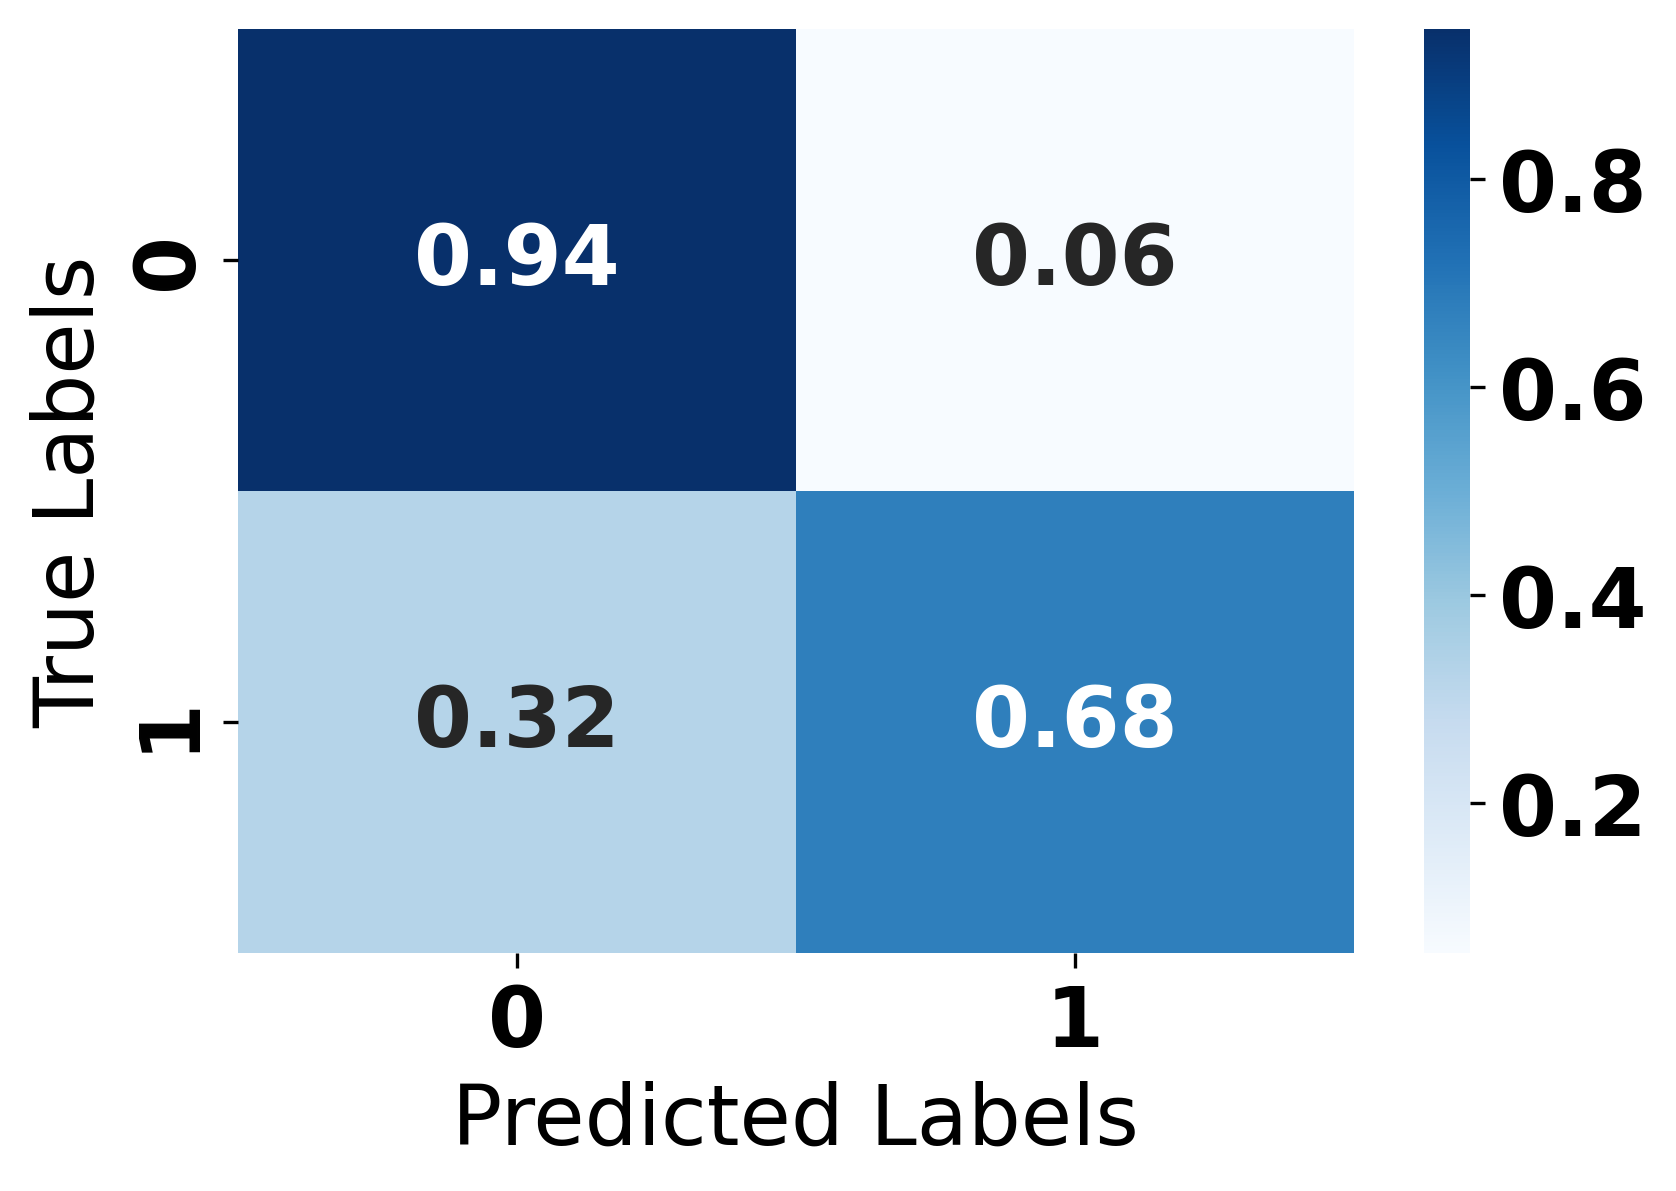

In [ ]:
# Predict probabilities on test data
y_pred_prob = model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.74, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
model.save('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/CNN.h5')
"""

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
CNN = load_model('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/CNN.h5')

In [ ]:
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model

# Define the input shape based on your data
input_shape = (x_train.shape[1],)  # Assuming your input data is 1D

def ANN_model(input_shape):
    input_layer = Input(shape=input_shape)

    # Add fully connected layers with increasing complexity
    dense1 = Dense(1024, activation='relu')(input_layer)
    dense1 = BatchNormalization()(dense1)
    dense1 = Dropout(0.5)(dense1)  # Adding dropout for regularization

    dense2 = Dense(512, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)
    dense2 = Dropout(0.5)(dense2)

    dense3 = Dense(256, activation='relu')(dense2)
    dense3 = BatchNormalization()(dense3)
    dense3 = Dropout(0.5)(dense3)

    dense4 = Dense(128, activation='relu')(dense3)
    dense4 = BatchNormalization()(dense4)
    dense4 = Dropout(0.5)(dense4)

    dense5 = Dense(64, activation='relu')(dense4)
    dense5 = BatchNormalization()(dense5)

    output = Dense(1, activation='sigmoid')(dense5)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Create the even more complex ANN model
ANN_model = ANN_model(input_shape)

# Compile the model
ANN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the even more complex ANN model
ANN_model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the even more complex ANN model
loss, accuracy = ANN_model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/20
186/186 [==============================] - 12s 45ms/step - loss: 0.4872 - accuracy: 0.7693 - val_loss: 0.0998 - val_accuracy: 0.9688
Epoch 2/20
186/186 [==============================] - 8s 41ms/step - loss: 0.3716 - accuracy: 0.8401 - val_loss: 0.1639 - val_accuracy: 0.9493
Epoch 3/20
186/186 [==============================] - 8s 42ms/step - loss: 0.3563 - accuracy: 0.8439 - val_loss: 0.2111 - val_accuracy: 0.9366
Epoch 4/20
186/186 [==============================] - 9s 50ms/step - loss: 0.3420 - accuracy: 0.8511 - val_loss: 0.3853 - val_accuracy: 0.8546
Epoch 5/20
186/186 [==============================] - 11s 59ms/step - loss: 0.3358 - accuracy: 0.8541 - val_loss: 0.3684 - val_accuracy: 0.8480
Epoch 6/20
186/186 [==============================] - 12s 63ms/step - loss: 0.3343 - accuracy: 0.8532 - val_loss: 0.2032 - val_accuracy: 0.9249
Epoch 7/20
186/186 [==============================] - 9s 47ms/step - loss: 0.3264 - accuracy: 0.8588 - val_loss: 0.4077 - val_accuracy: 0.8

In [ ]:
# Impoting libaries for pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.0 MB/s eta 0:00:00


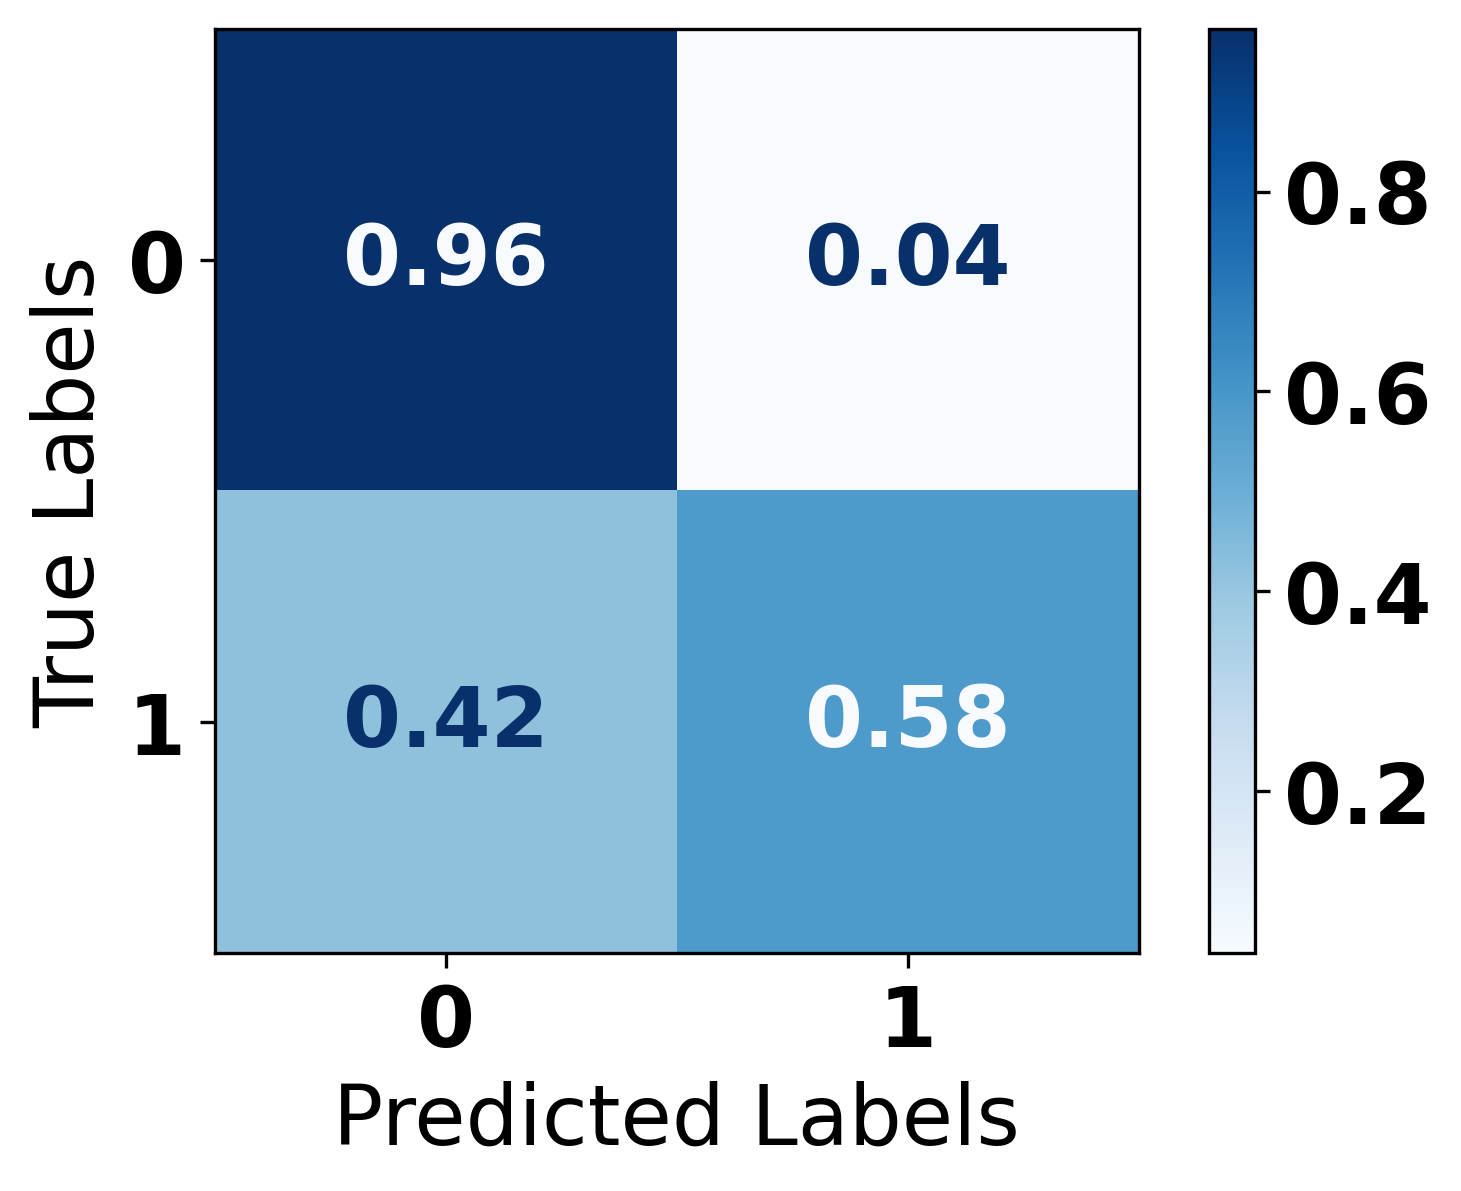

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.96      0.98     12150
     Class 1       0.26      0.58      0.36       271

    accuracy                           0.95     12421
   macro avg       0.62      0.77      0.67     12421
weighted avg       0.97      0.95      0.96     12421

Train Accuracy: 0.9926374689721906
Test Accuracy: 0.9544320103051284


In [ ]:
!pip install catboost

# Import necessary libraries
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Create and fit the CatBoost model
catboost = CatBoostClassifier(random_state=7, verbose=0)  # Set verbose to 0 to disable logging
catboost.fit(x_train, y_train)

# Predict on the test set
y_pred = catboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=catboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = catboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(catboost, '/content/drive/MyDrive/Myocardial Infarction (MI)/Model/CatBoost.pkl')
"""

['/content/drive/MyDrive/Myocardial Infarction (MI)/Model/CatBoost.pkl']

In [ ]:
import joblib

# Load the model from file
CatBoost = joblib.load('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/CatBoost.pkl')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 11619, number of negative: 12150
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012876 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 169
[LightGBM] [Info] Number of data points in the train set: 23769, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.488830 -> initscore=-0.044687
[LightGBM] [Info] Start training from score -0.044687


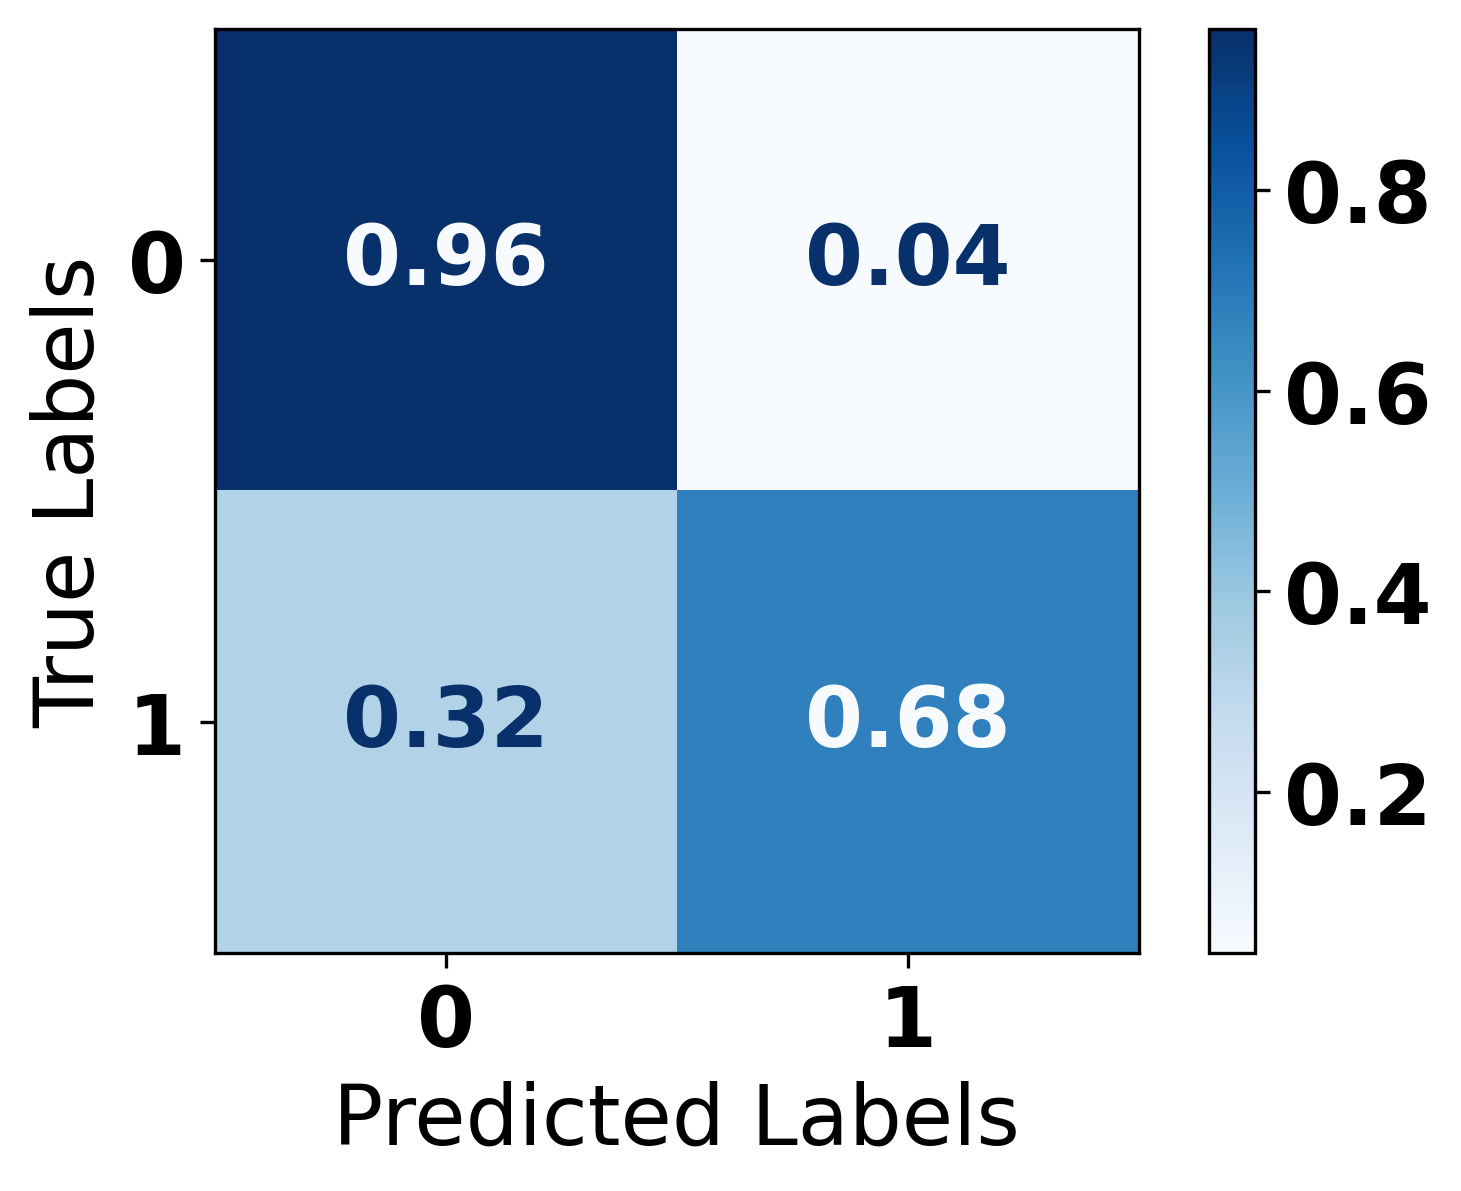

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.96      0.98     12150
     Class 1       0.28      0.68      0.39       271

    accuracy                           0.95     12421
   macro avg       0.63      0.82      0.68     12421
weighted avg       0.98      0.95      0.96     12421

Train Accuracy: 0.8161470823341327
Test Accuracy: 0.9544320103051284


In [ ]:
# Import necessary libraries
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Create and fit the LightGBM model
lgbm = lgb.LGBMClassifier(
    random_state=2,
    n_estimators=4,         # Number of boosting iterations
    learning_rate=0.1,        # Learning rate
    max_depth=1,              # Maximum tree depth for base learners
    num_leaves=2,            # Maximum number of leaves in one tree
    subsample=0.1,            # Subsample ratio of the training instances
    colsample_bytree=0.3      # Subsample ratio of columns when constructing each tree
)
lgbm.fit(x_train, y_train)

# Predict on the test set
y_pred = lgbm.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgbm.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = lgbm.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(lgbm, '/content/drive/MyDrive/Myocardial Infarction (MI)/Model/LGBM.pkl')
"""

['/content/drive/MyDrive/Myocardial Infarction (MI)/Model/LGBM.pkl']

In [ ]:
import joblib

# Load the model from file
LGBM = joblib.load('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/LGBM.pkl')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


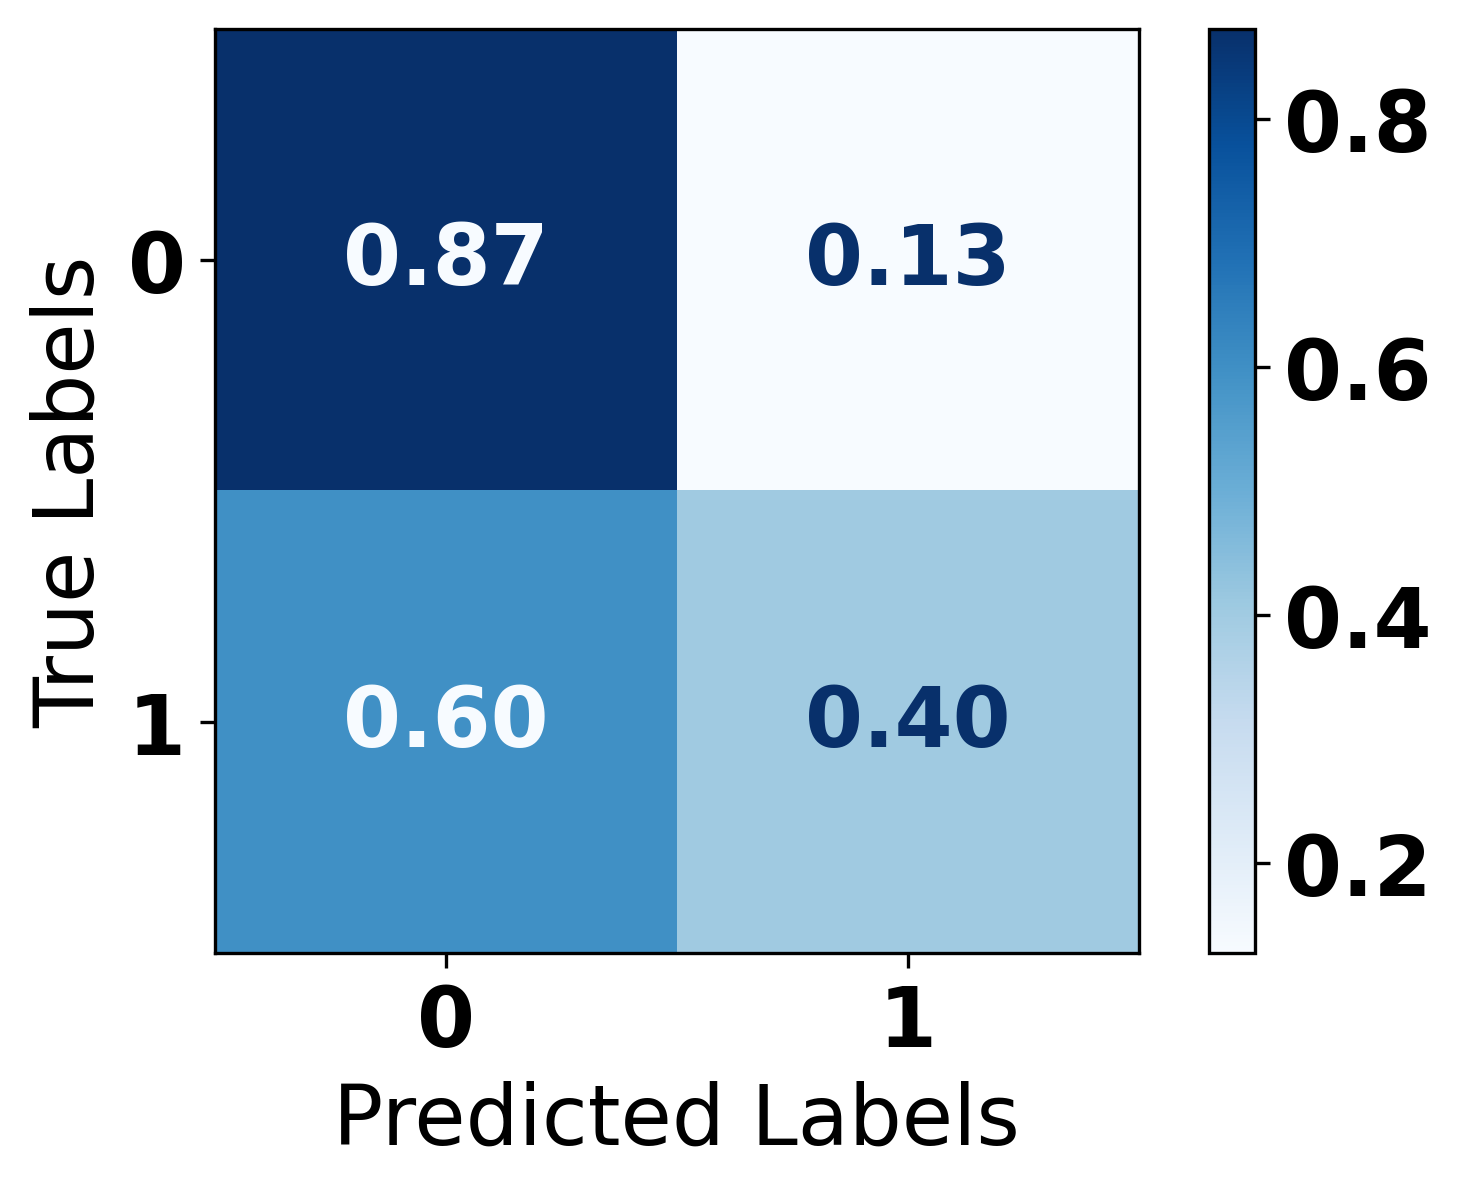

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.98      0.87      0.93     12150
     Class 1       0.07      0.40      0.11       271

    accuracy                           0.86     12421
   macro avg       0.53      0.64      0.52     12421
weighted avg       0.96      0.86      0.91     12421

Train Accuracy: 0.6429803525600573
Test Accuracy: 0.862490942758232


In [ ]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Create and fit the Gradient Boosting Machine model
gbm = GradientBoostingClassifier(
    random_state=2,
    n_estimators=4,        # Number of boosting stages to be run
    learning_rate=0.1,       # Learning rate shrinks the contribution of each tree by learning_rate
    max_depth=1,             # Maximum depth of the individual regression estimators
    subsample=0.9,           # Fraction of samples used for fitting the individual base learners
    max_features='sqrt'      # Number of features to consider when looking for the best split
)
gbm.fit(x_train, y_train)

# Predict on the test set
y_pred = gbm.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gbm.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = gbm.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(gbm, '/content/drive/MyDrive/Myocardial Infarction (MI)/Model/GBM.pkl')
"""

['/content/drive/MyDrive/Myocardial Infarction (MI)/Model/GBM.pkl']

In [ ]:
import joblib

# Load the model from file
GBM = joblib.load('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/GBM.pkl')

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


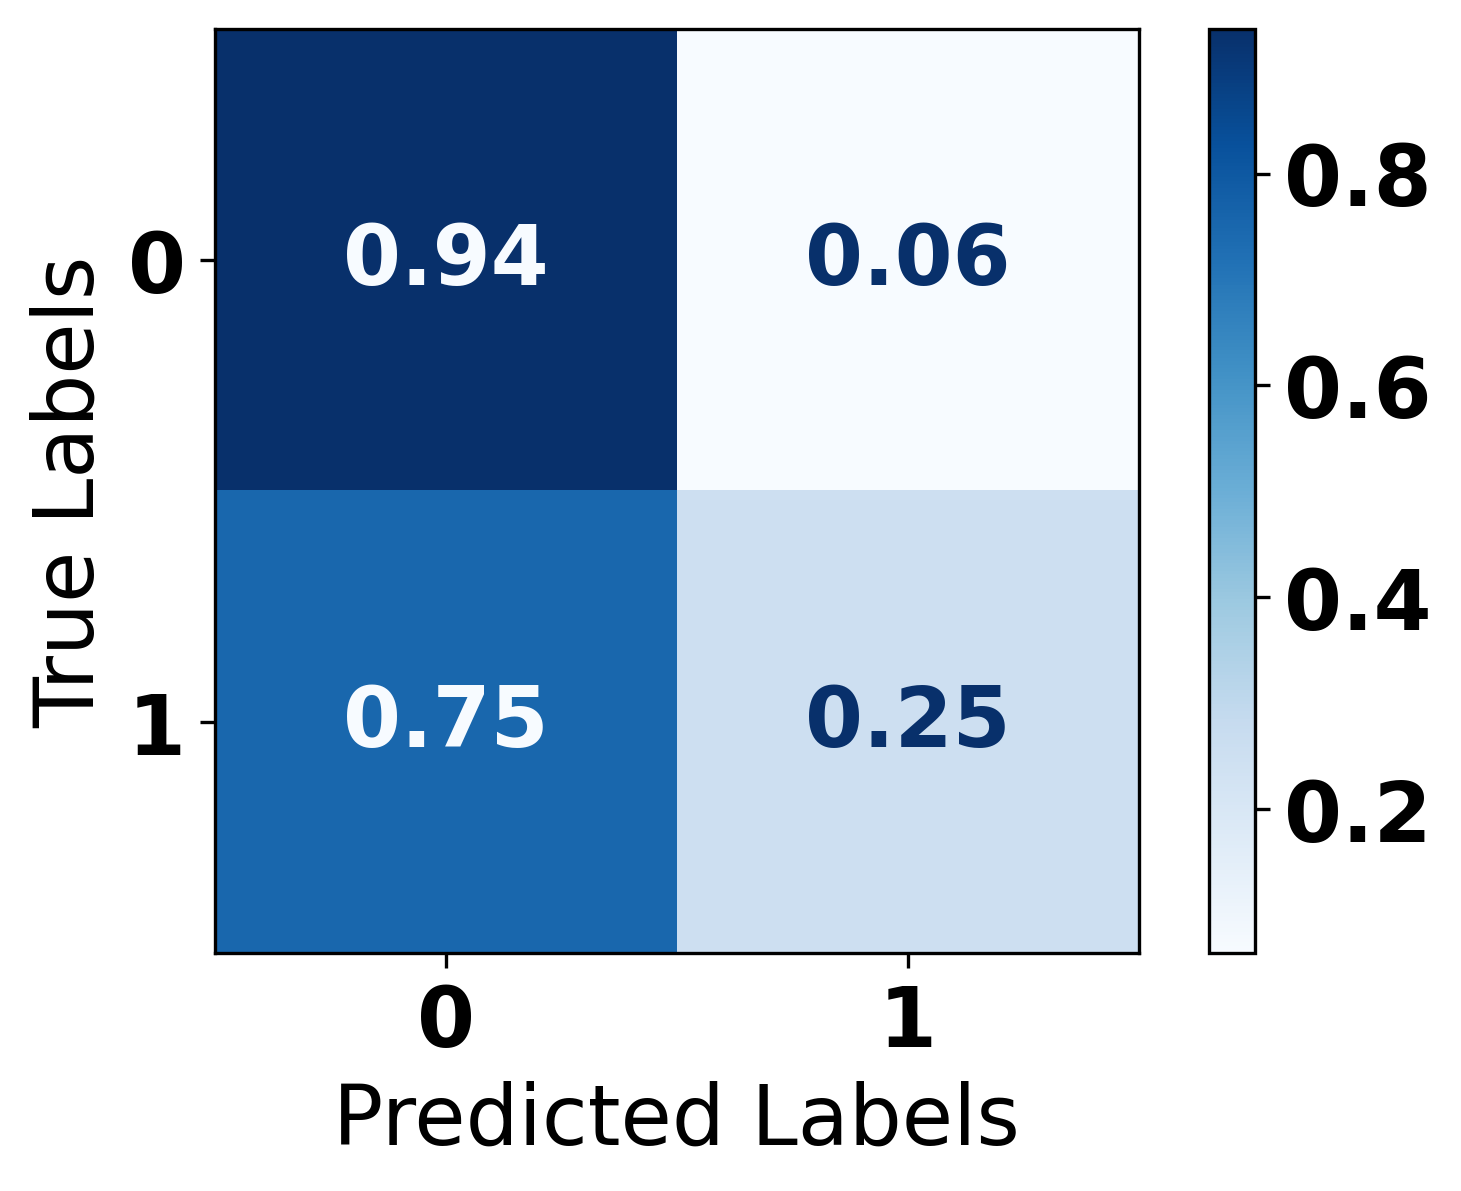

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.98      0.94      0.96     12150
     Class 1       0.08      0.25      0.12       271

    accuracy                           0.92     12421
   macro avg       0.53      0.59      0.54     12421
weighted avg       0.96      0.92      0.94     12421

Train Accuracy: 0.9786276242164164
Test Accuracy: 0.9214233958618469


In [ ]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Create and fit the k-NN model
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

# Predict on the test set
y_pred = knn.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = knn.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(knn, '/content/drive/MyDrive/Myocardial Infarction (MI)/Model/KNN.pkl')
"""

['/content/drive/MyDrive/Myocardial Infarction (MI)/Model/KNN.pkl']

In [ ]:
import joblib

# Load the model from file
KNN = joblib.load('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/KNN.pkl')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


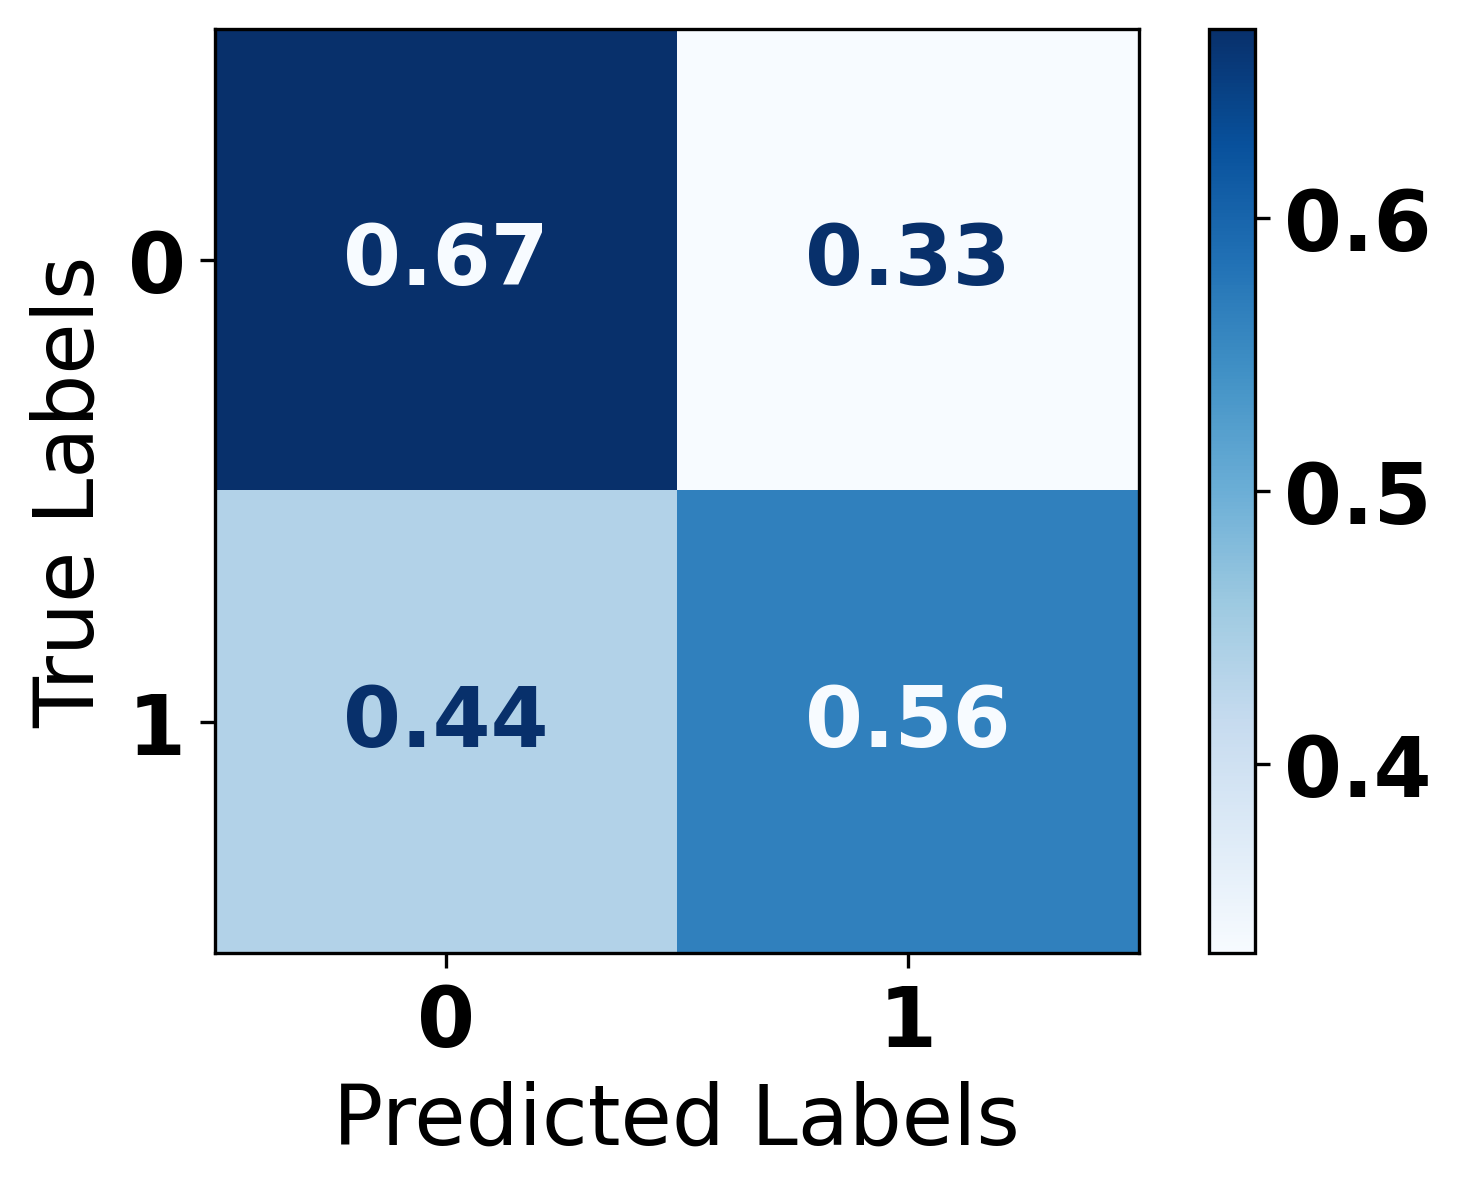

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.67      0.80     12150
     Class 1       0.04      0.56      0.07       271

    accuracy                           0.67     12421
   macro avg       0.51      0.62      0.43     12421
weighted avg       0.96      0.67      0.78     12421

Train Accuracy: 0.6371323993436829
Test Accuracy: 0.6669350293857177


In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Create and fit the Logistic Regression model
log_reg = LogisticRegression(
    random_state=2,
    solver='lbfgs',          # Algorithm to use in the optimization problem
    max_iter=4,           # Maximum number of iterations for solvers to converge
    C=1,                   # Inverse of regularization strength; must be a positive float
    penalty='l2',            # Used to specify the norm used in the penalization
    class_weight='balanced'  # Adjust weights inversely proportional to class frequencies
)
log_reg.fit(x_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = log_reg.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(log_reg, '/content/drive/MyDrive/Myocardial Infarction (MI)/Model/LR.pkl')
"""

['/content/drive/MyDrive/Myocardial Infarction (MI)/Model/LR.pkl']

In [ ]:
import joblib

# Load the model from file
LR = joblib.load('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/LR.pkl')

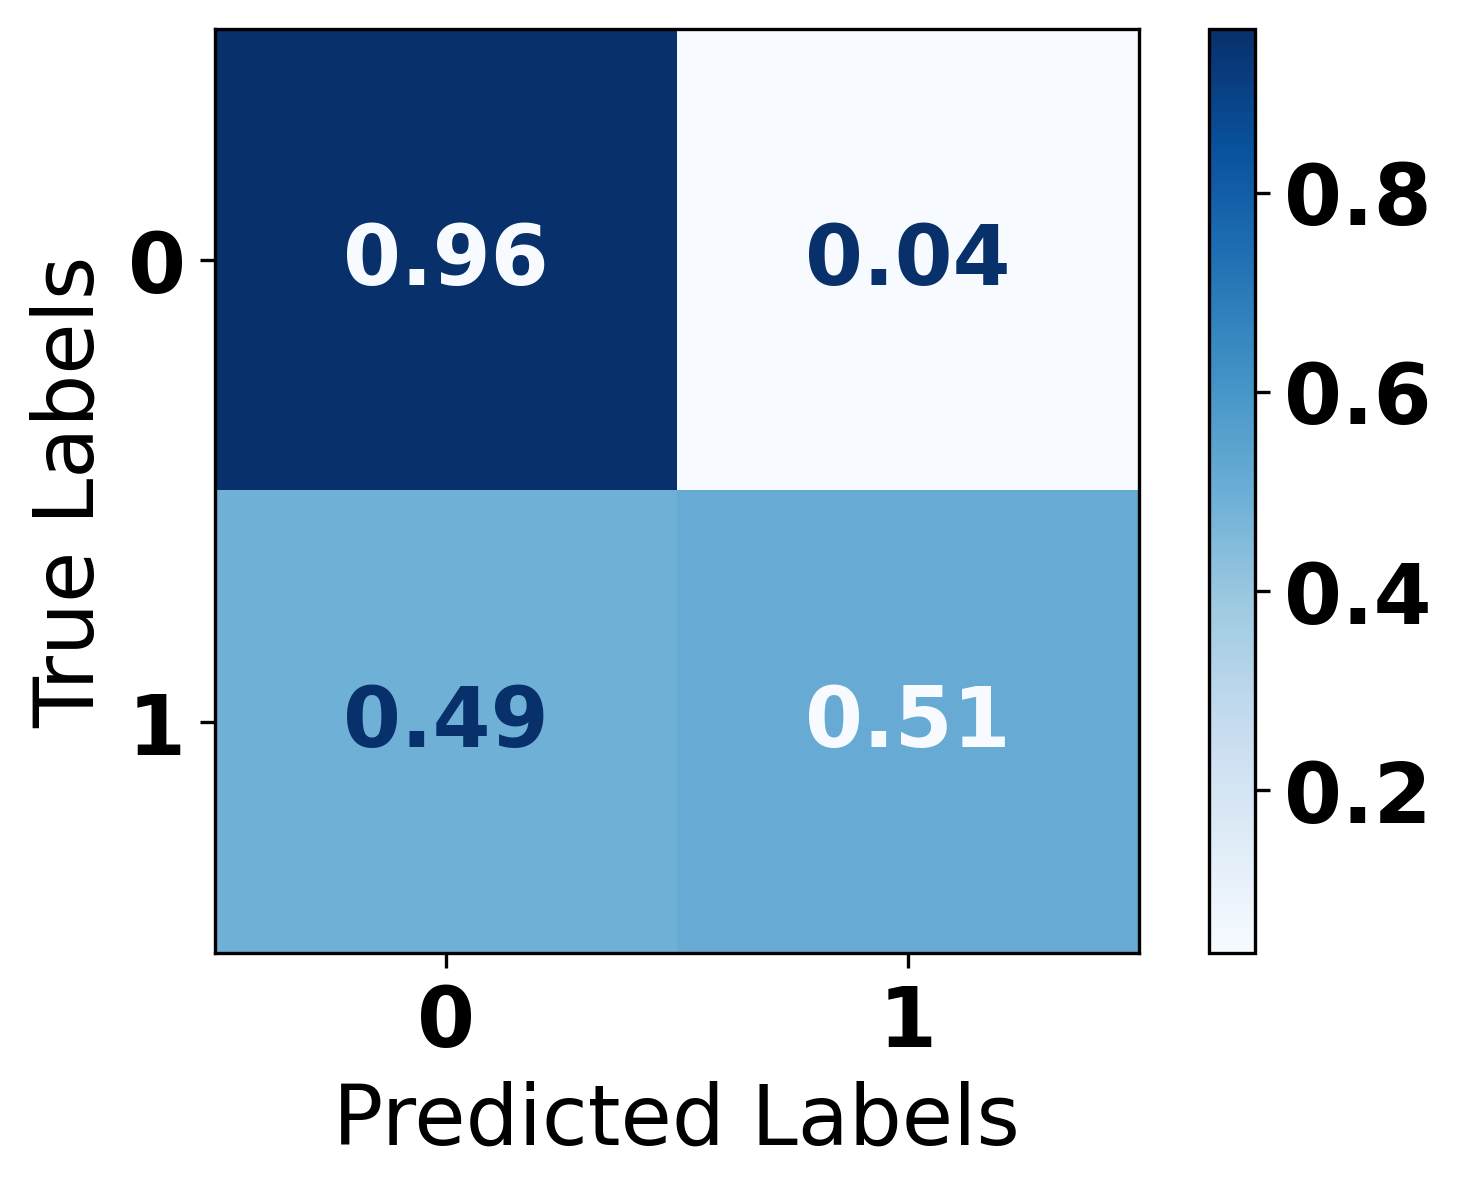

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.96      0.98     12150
     Class 1       0.24      0.51      0.33       271

    accuracy                           0.95     12421
   macro avg       0.61      0.74      0.65     12421
weighted avg       0.97      0.95      0.96     12421

Train Accuracy: 0.9958349110185536
Test Accuracy: 0.9541904838579824


In [ ]:
# Import necessary libraries
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Create and fit the XGBoost Classifier
XGB = XGBClassifier(random_state=7)
XGB.fit(x_train, y_train)

# Predict on the test set
y_pred = XGB.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=XGB.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = XGB.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(XGB, '/content/drive/MyDrive/Myocardial Infarction (MI)/Model/XGB.pkl')
"""

['/content/drive/MyDrive/Myocardial Infarction (MI)/Model/XGB.pkl']

In [ ]:
import joblib

# Load the model from file
XGB = joblib.load('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/XGB.pkl')

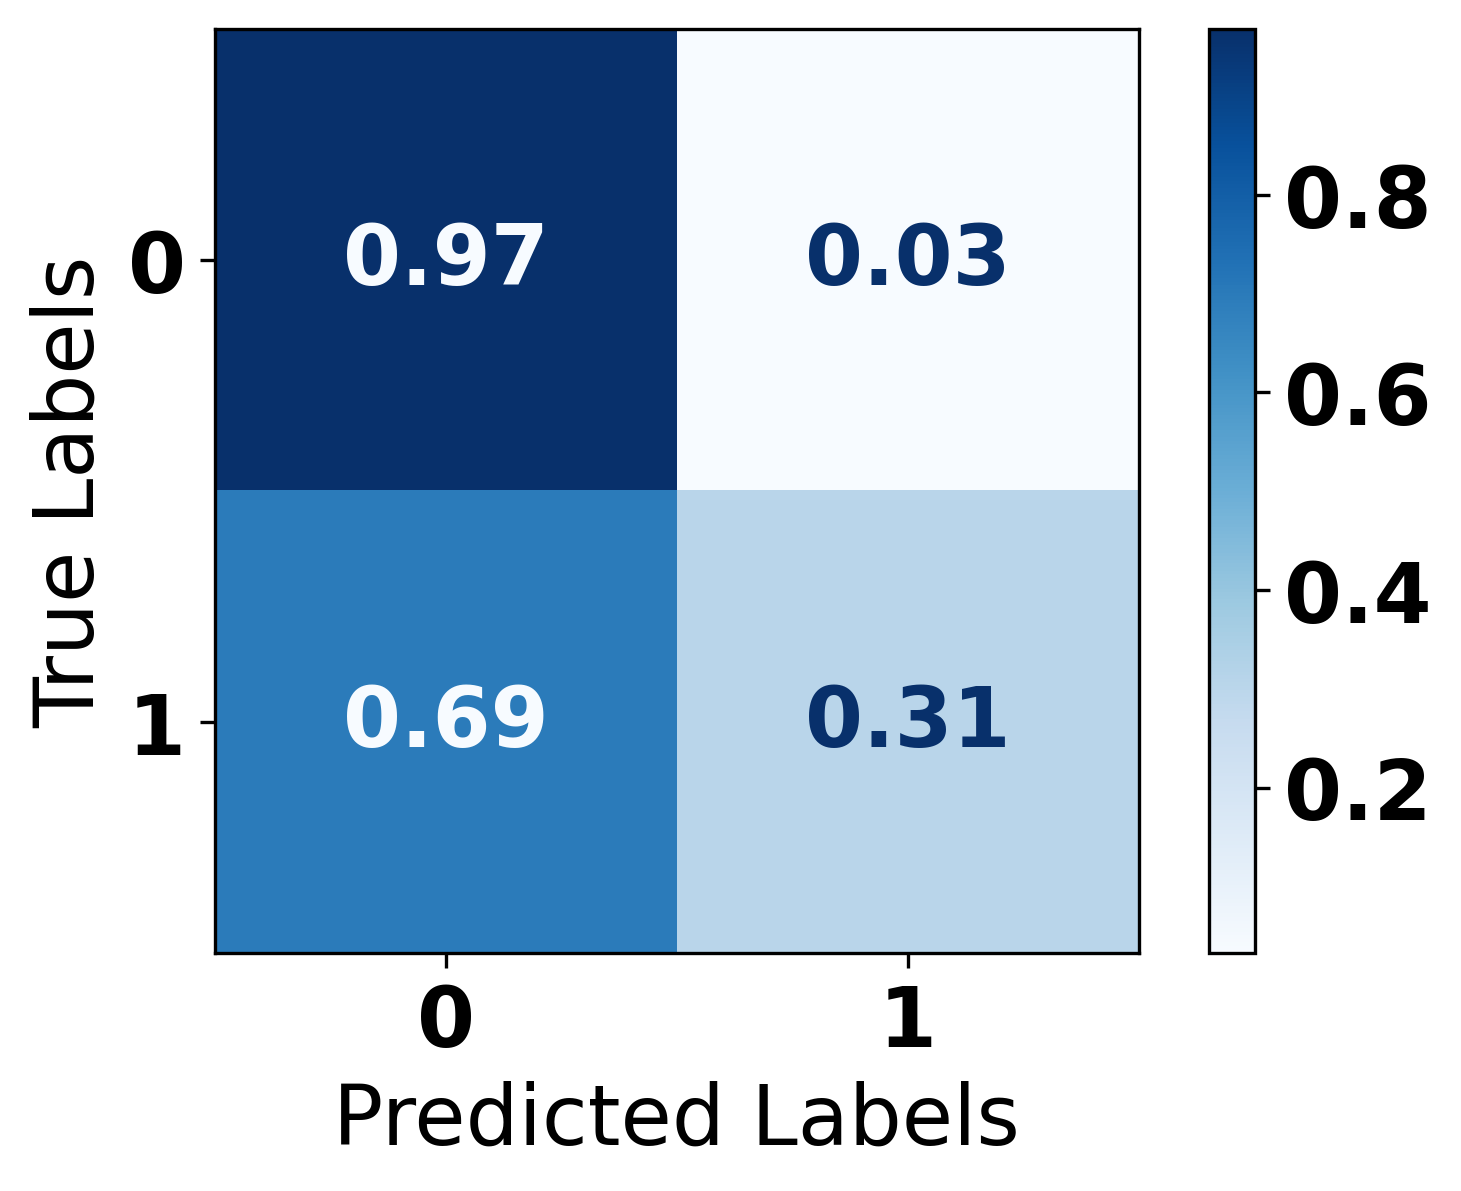

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.98      0.97      0.98     12150
     Class 1       0.17      0.31      0.22       271

    accuracy                           0.95     12421
   macro avg       0.58      0.64      0.60     12421
weighted avg       0.97      0.95      0.96     12421

Train Accuracy: 1.0
Test Accuracy: 0.9530633604379679


In [ ]:
# Create and fit the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(random_state=7)
DT.fit(x_train, y_train)

# Predict on the test set
y_pred = DT.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DT.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = DT.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(DT, '/content/drive/MyDrive/Myocardial Infarction (MI)/Model/DT.pkl')
"""

['/content/drive/MyDrive/Myocardial Infarction (MI)/Model/DT.pkl']

In [ ]:
import joblib

# Load the model from file
DT = joblib.load('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/DT.pkl')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


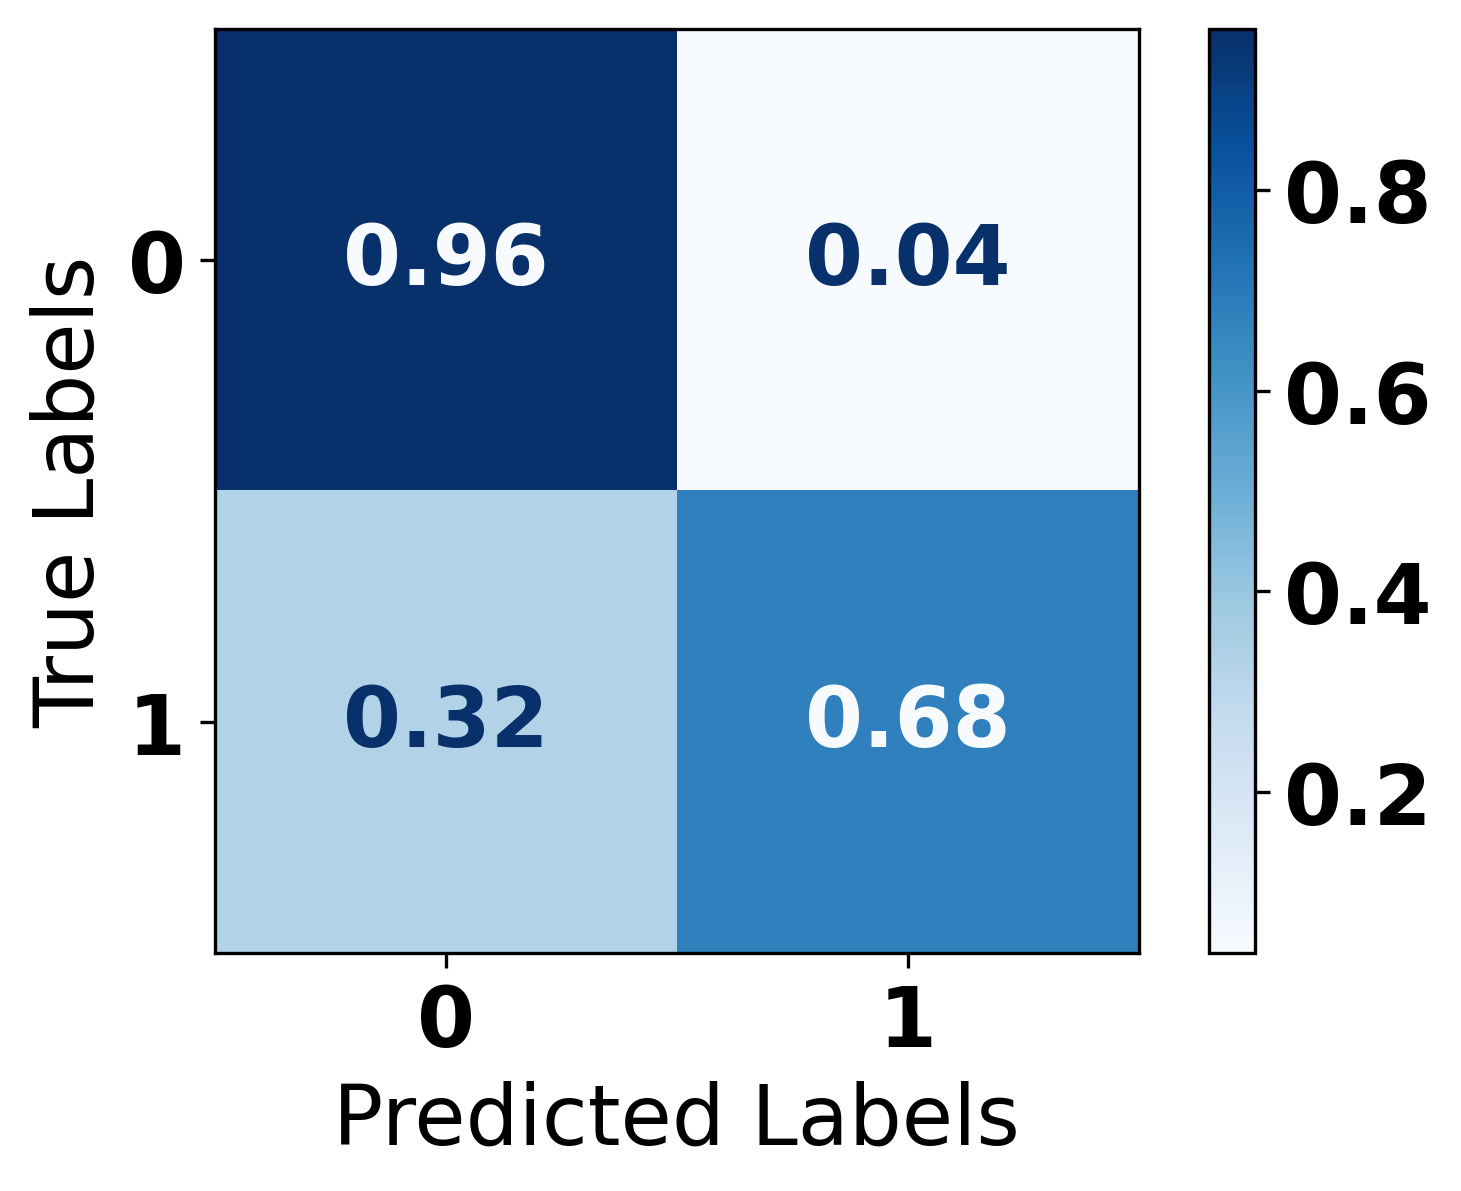

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.96      0.98     12150
     Class 1       0.28      0.68      0.39       271

    accuracy                           0.95     12421
   macro avg       0.63      0.82      0.68     12421
weighted avg       0.98      0.95      0.96     12421

Train Accuracy: 0.8161470823341327
Test Accuracy: 0.9544320103051284


In [ ]:
# Create an RUSBoost classifier
from imblearn.ensemble import RUSBoostClassifier

rusboost = RUSBoostClassifier(n_estimators=2, random_state=2)

# Fit the classifier to the training data
rusboost.fit(x_train, y_train)

# Predicting the output on the test dataset
y_pred = rusboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rusboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = rusboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(rusboost, '/content/drive/MyDrive/Myocardial Infarction (MI)/Model/RUSBoost.pkl')
"""

['/content/drive/MyDrive/Myocardial Infarction (MI)/Model/RUSBoost.pkl']

In [ ]:
import joblib

# Load the model from file
RUSBoost = joblib.load('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/RUSBoost.pkl')

<ipython-input-67-3d23888975aa>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  y_pred = RF.fit(x_train, y_train).predict(x_test)


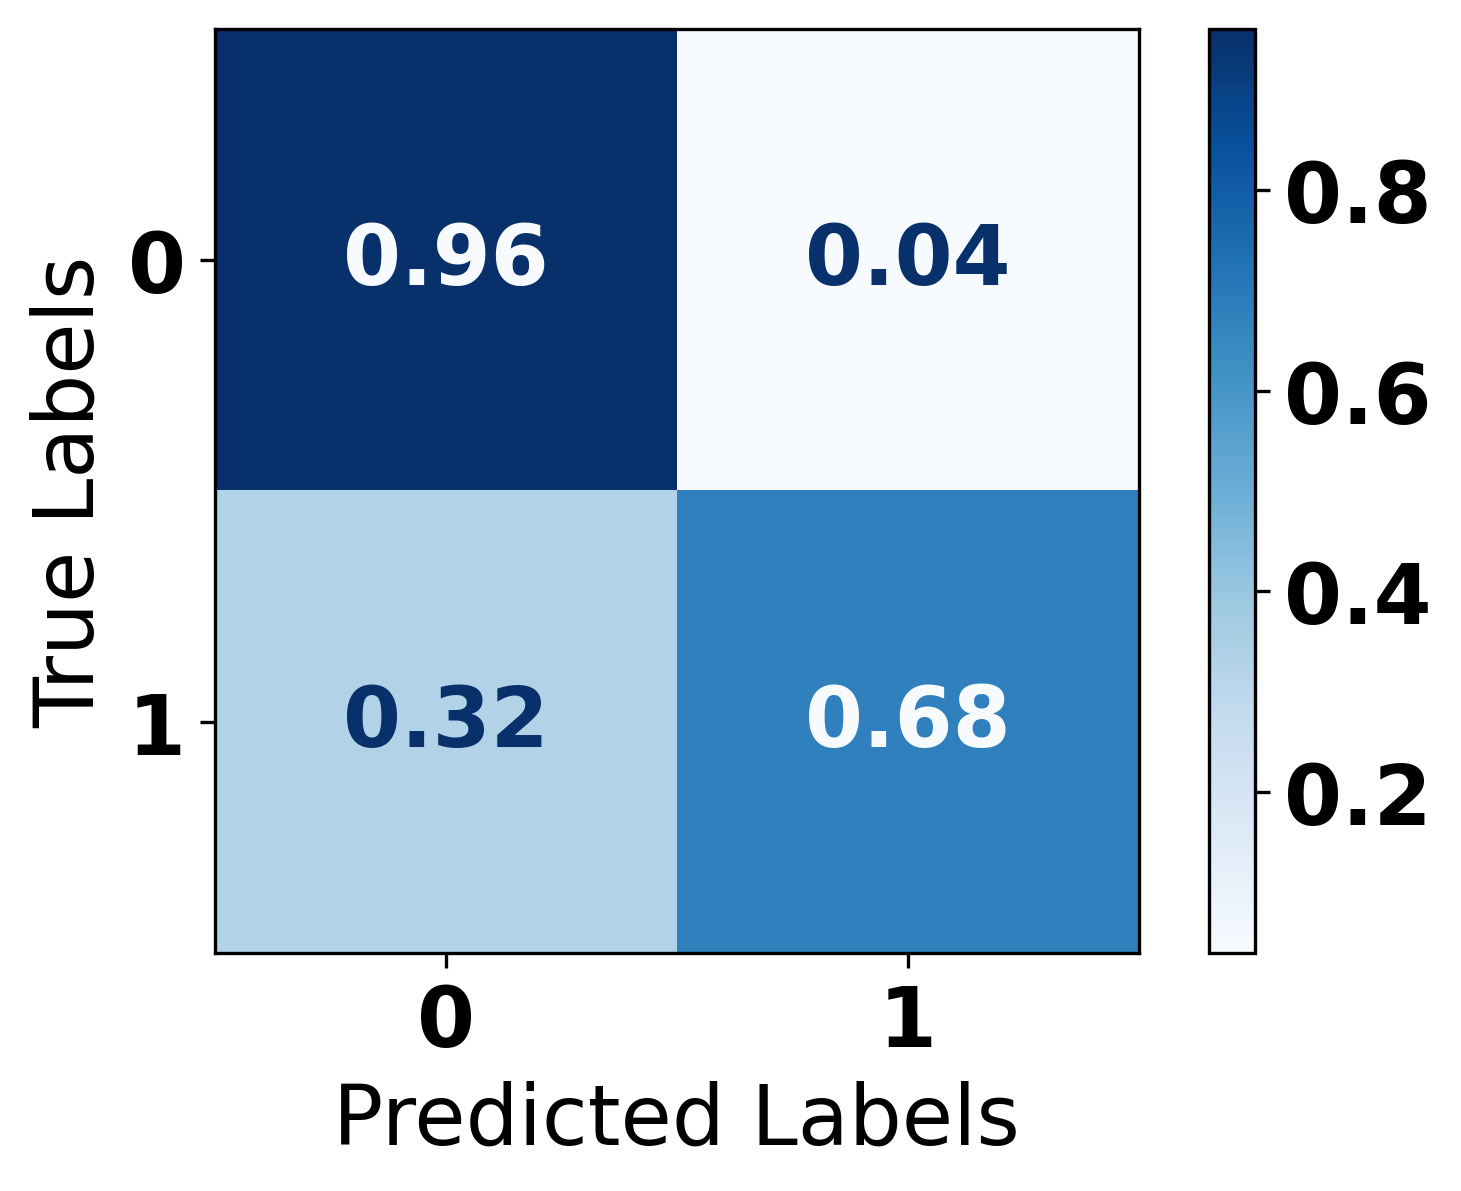

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98     12150
           1       0.28      0.68      0.39       271

    accuracy                           0.95     12421
   macro avg       0.63      0.82      0.68     12421
weighted avg       0.98      0.95      0.96     12421

Train Accuracy: 0.8161470823341327
Test Accuracy: 0.9544320103051284


In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(
    n_estimators=2,
    max_depth=1,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    random_state=1
)

# Fit the classifier to the training data
y_pred = RF.fit(x_train, y_train).predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = RF.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(RF, '/content/drive/MyDrive/Myocardial Infarction (MI)/Model/RF.pkl')
"""

['/content/drive/MyDrive/Myocardial Infarction (MI)/Model/RF.pkl']

In [ ]:
import joblib

# Load the model from file
RF = joblib.load('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/RF.pkl')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


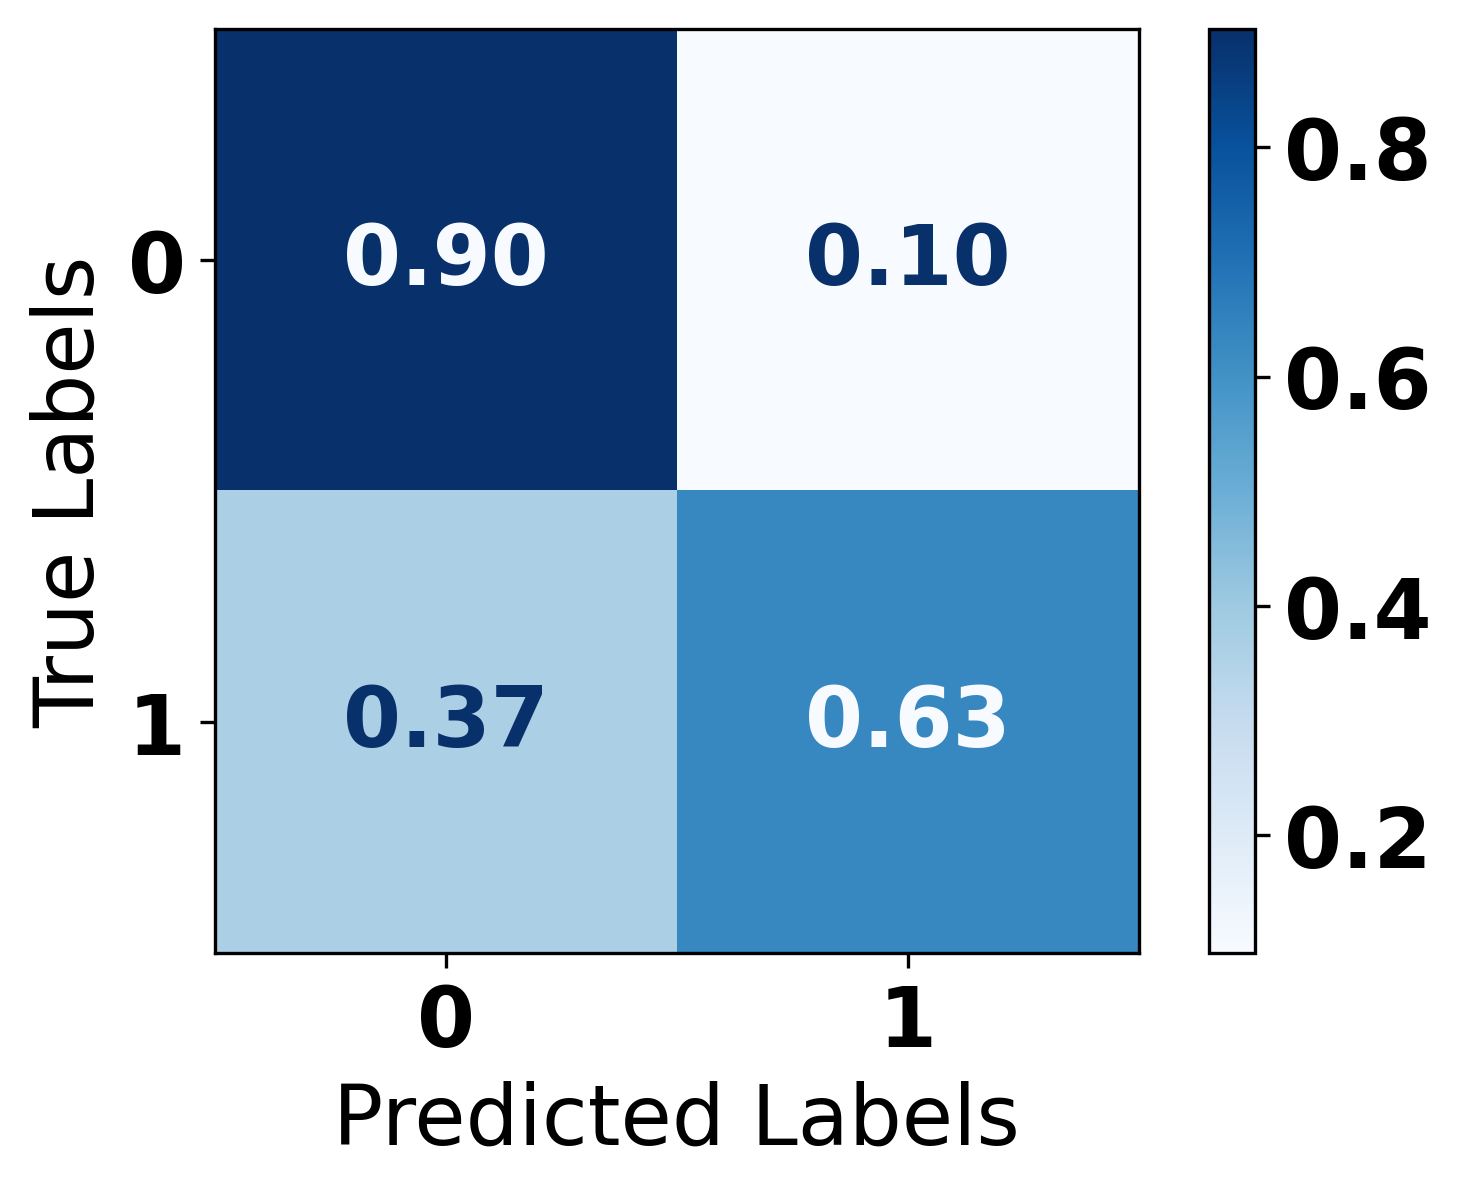

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.95     12150
           1       0.13      0.63      0.21       271

    accuracy                           0.90     12421
   macro avg       0.56      0.77      0.58     12421
weighted avg       0.97      0.90      0.93     12421

Train Accuracy: 0.7858555261054314
Test Accuracy: 0.8971902423315353


In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB(priors=[0.9, 0.1], var_smoothing=1e-3)

# Fit the classifier to the training data
y_pred = GNB.fit(x_train, y_train).predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GNB.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = GNB.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(GNB, '/content/drive/MyDrive/Myocardial Infarction (MI)/Model/GNB.pkl')
"""

['/content/drive/MyDrive/Myocardial Infarction (MI)/Model/GNB.pkl']

In [ ]:
import joblib

# Load the model from file
GNB = joblib.load('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/GNB.pkl')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


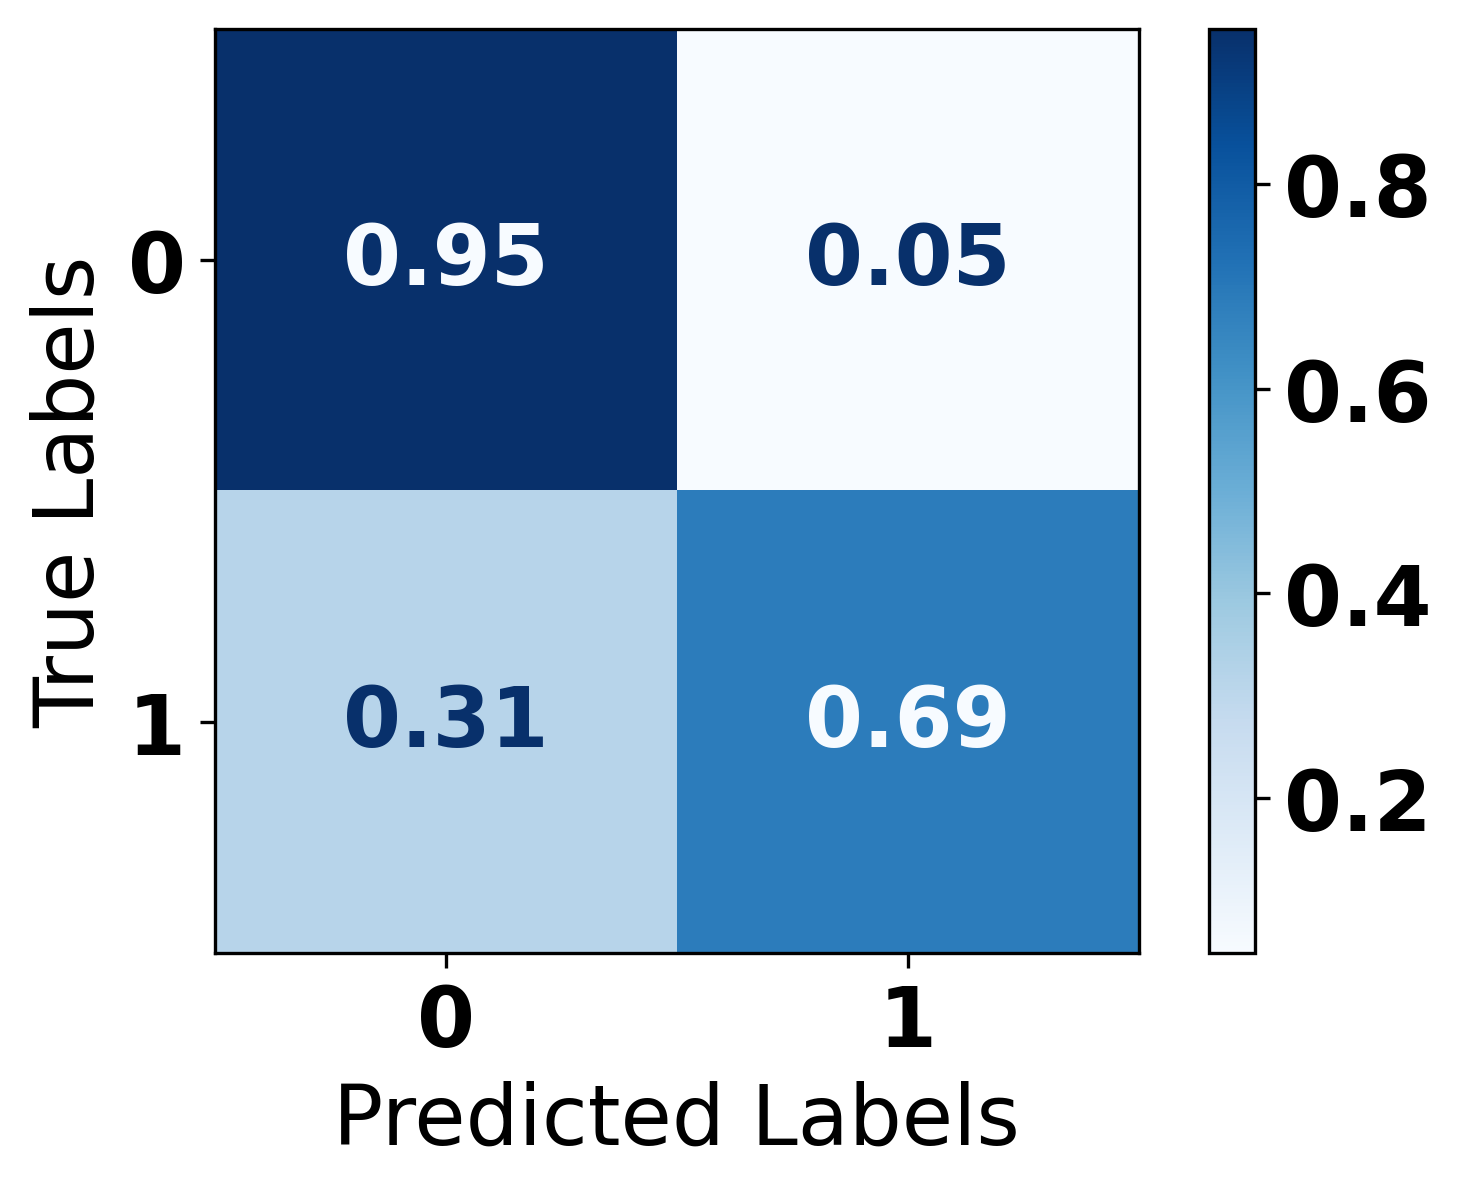

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97     12150
           1       0.24      0.69      0.36       271

    accuracy                           0.95     12421
   macro avg       0.62      0.82      0.66     12421
weighted avg       0.98      0.95      0.96     12421

Train Accuracy: 0.8313349320543565
Test Accuracy: 0.9459785846550197


In [ ]:
# Create an AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier

Adaboost = AdaBoostClassifier(n_estimators=11, learning_rate=0.2, random_state=33)
# Adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the AdaBoost classifier
Adaboost.fit(x_train, y_train)

# Make predictions on the test set
y_pred = Adaboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Adaboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = Adaboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(Adaboost, '/content/drive/MyDrive/Myocardial Infarction (MI)/Model/AdaBoost.pkl')
"""

['/content/drive/MyDrive/Myocardial Infarction (MI)/Model/AdaBoost.pkl']

In [ ]:
import joblib

# Load the model from file
AdaBoost = joblib.load('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/AdaBoost.pkl')

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(
    random_state=55,
    max_iter=50,
    hidden_layer_sizes=(4,),  # Size of the hidden layers (default is a single layer with 100 neurons)
    activation='relu',          # Activation function for the hidden layer ('identity', 'logistic', 'tanh', 'relu')
    solver='adam',              # Solver for weight optimization ('lbfgs', 'sgd', 'adam')
    alpha=0.00001,               # L2 penalty (regularization term) parameter
    batch_size='auto',          # Size of minibatches for stochastic optimizers
    learning_rate='constant',   # Learning rate schedule ('constant', 'invscaling', 'adaptive')
    learning_rate_init=0.0001,   # Initial learning rate used
    power_t=0.5,                # The exponent for inverse scaling learning rate
    shuffle=True,               # Whether to shuffle samples in each iteration
    tol=1e-8,                   # Tolerance for the optimization
    verbose=False,              # Whether to print progress messages to stdout
    warm_start=False,           # Reuse the solution of the previous call to fit as initialization
    momentum=0.2,               # Momentum for gradient descent update (only used when solver='sgd')
    nesterovs_momentum=True,    # Whether to use Nesterov's momentum (only used when solver='sgd' and momentum > 0)
    early_stopping=False,       # Whether to use early stopping to terminate training when validation score is not improving
    validation_fraction=0.1,    # The proportion of training data to set aside as validation set for early stopping
    beta_1=0.09,                 # Exponential decay rate for estimates of first moment vector in Adam
    beta_2=0.0999,               # Exponential decay rate for estimates of second moment vector in Adam
    epsilon=1e-4                # Value for numerical stability in Adam
).fit(x_train, y_train)
y_pred = clf.predict_proba(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Normalized Confusion Matrix:
[[0.82263374 0.17736626]
 [0.26568266 0.73431734]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.82      0.90     12150
     Class 1       0.08      0.73      0.15       271

    accuracy                           0.82     12421
   macro avg       0.54      0.78      0.53     12421
weighted avg       0.97      0.82      0.88     12421



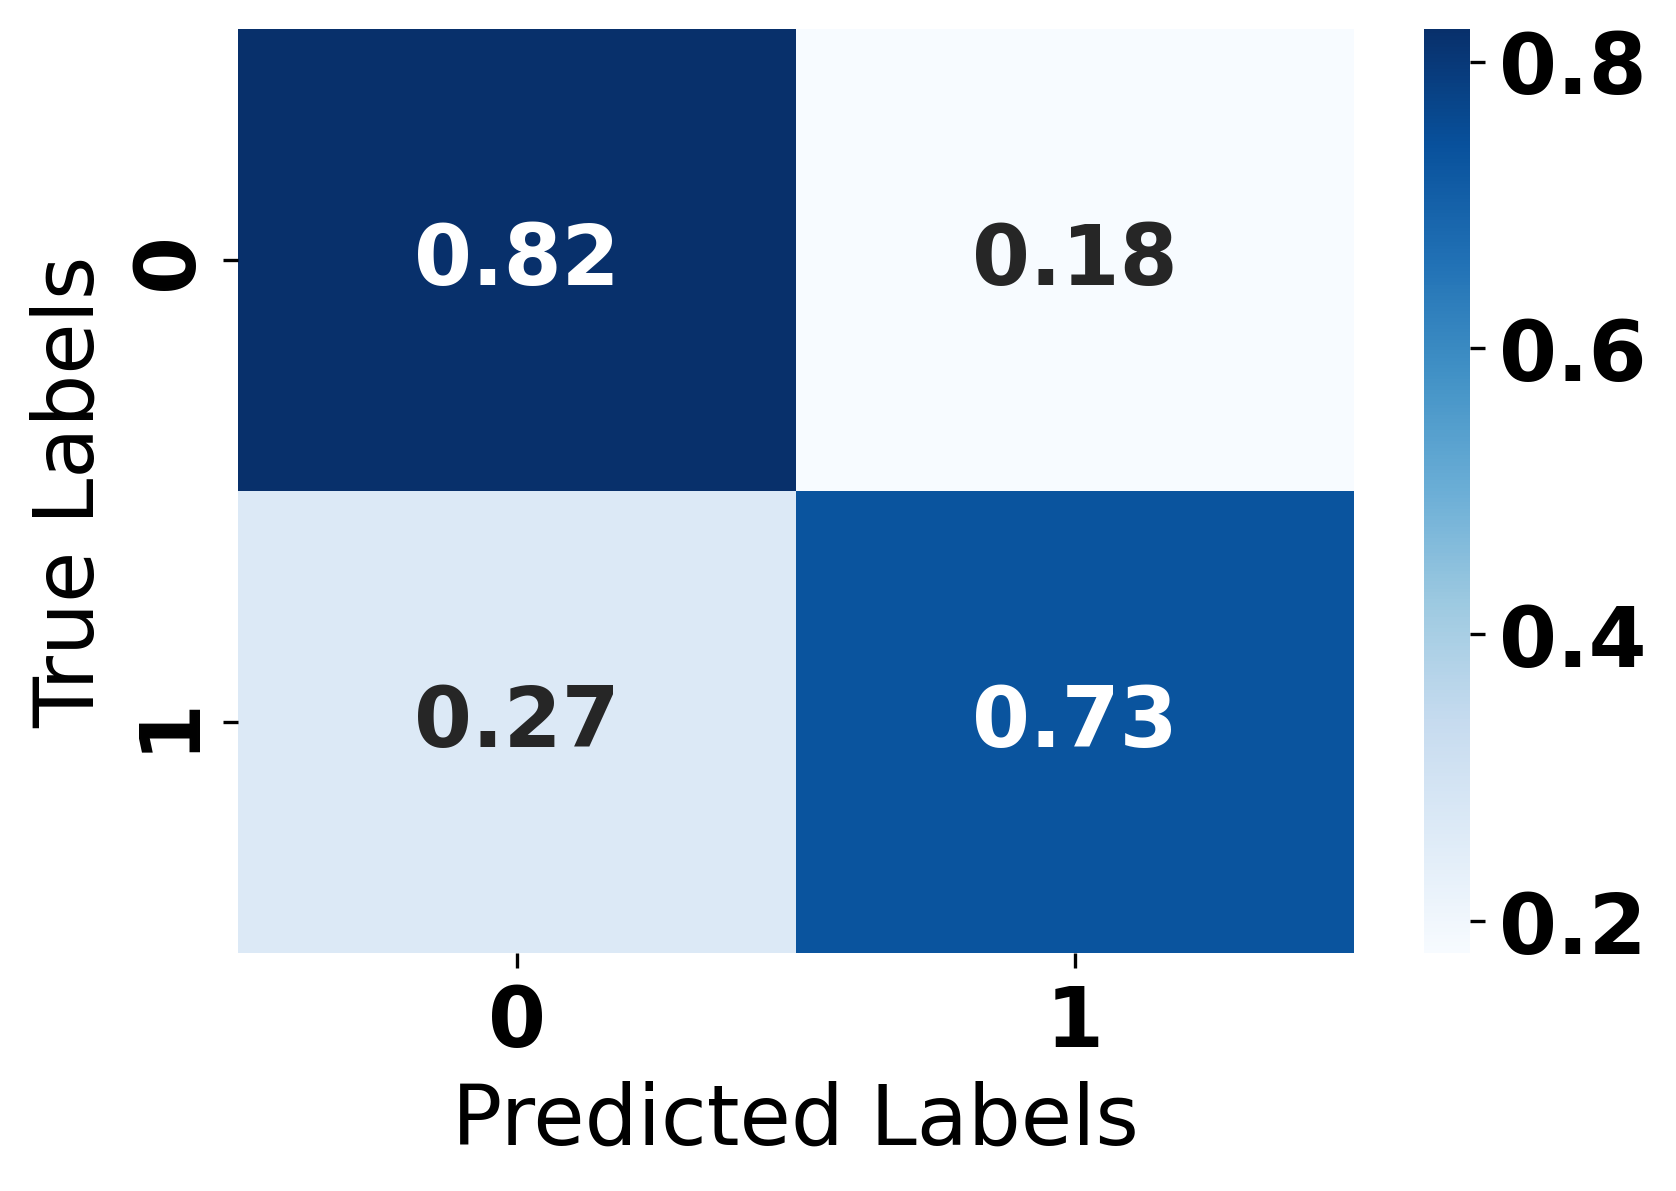

In [ ]:
# Predict probabilities on test data
y_pred_prob = clf.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(clf, '/content/drive/MyDrive/Myocardial Infarction (MI)/Model/MLP.pkl')
"""

['/content/drive/MyDrive/Myocardial Infarction (MI)/Model/MLP.pkl']

In [ ]:
import joblib

# Load the model from file
MLP = joblib.load('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/MLP.pkl')

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Add

# Input layer
input_layer = Input(shape=(x_train.shape[1], 1))

# First convolutional block
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# Second convolutional block with residual connection
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(pool1)
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2)

# Residual connection
residual1 = Conv1D(filters=64, kernel_size=1, activation='relu', padding='same')(pool1)
residual1 = Add()([residual1, conv2])
pool2 = MaxPooling1D(pool_size=2)(residual1)

# Flatten layer
flatten = Flatten()(pool2)

# Dense layers
dense1 = Dense(128, activation='relu')(flatten)
dense2 = Dense(64, activation='relu')(dense1)

# Output layer
output = Dense(1, activation='sigmoid')(dense2)

# Create the model
model = Model(inputs=input_layer, outputs=output)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
186/186 [==============================] - 5s 20ms/step - loss: 0.5811 - accuracy: 0.6960 - val_loss: 0.9046 - val_accuracy: 0.5524
Epoch 2/10
186/186 [==============================] - 5s 28ms/step - loss: 0.3975 - accuracy: 0.8285 - val_loss: 0.5198 - val_accuracy: 0.7690
Epoch 3/10
186/186 [==============================] - 3s 18ms/step - loss: 0.3705 - accuracy: 0.8393 - val_loss: 0.3052 - val_accuracy: 0.8841
Epoch 4/10
186/186 [==============================] - 3s 18ms/step - loss: 0.3502 - accuracy: 0.8500 - val_loss: 0.3506 - val_accuracy: 0.8681
Epoch 5/10
186/186 [==============================] - 4s 22ms/step - loss: 0.3398 - accuracy: 0.8561 - val_loss: 0.3576 - val_accuracy: 0.8586
Epoch 6/10
186/186 [==============================] - 7s 38ms/step - loss: 0.3294 - accuracy: 0.8565 - val_loss: 0.3351 - val_accuracy: 0.8652
Epoch 7/10
186/186 [==============================] - 6s 33ms/step - loss: 0.3183 - accuracy: 0.8624 - val_loss: 0.2050 - val_accuracy: 0.9246

389/389 [==============================] - 3s 7ms/step
Normalized Confusion Matrix:
[[0.94444444 0.05555556]
 [0.32472325 0.67527675]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.94      0.97     12150
     Class 1       0.21      0.68      0.32       271

    accuracy                           0.94     12421
   macro avg       0.60      0.81      0.65     12421
weighted avg       0.98      0.94      0.95     12421



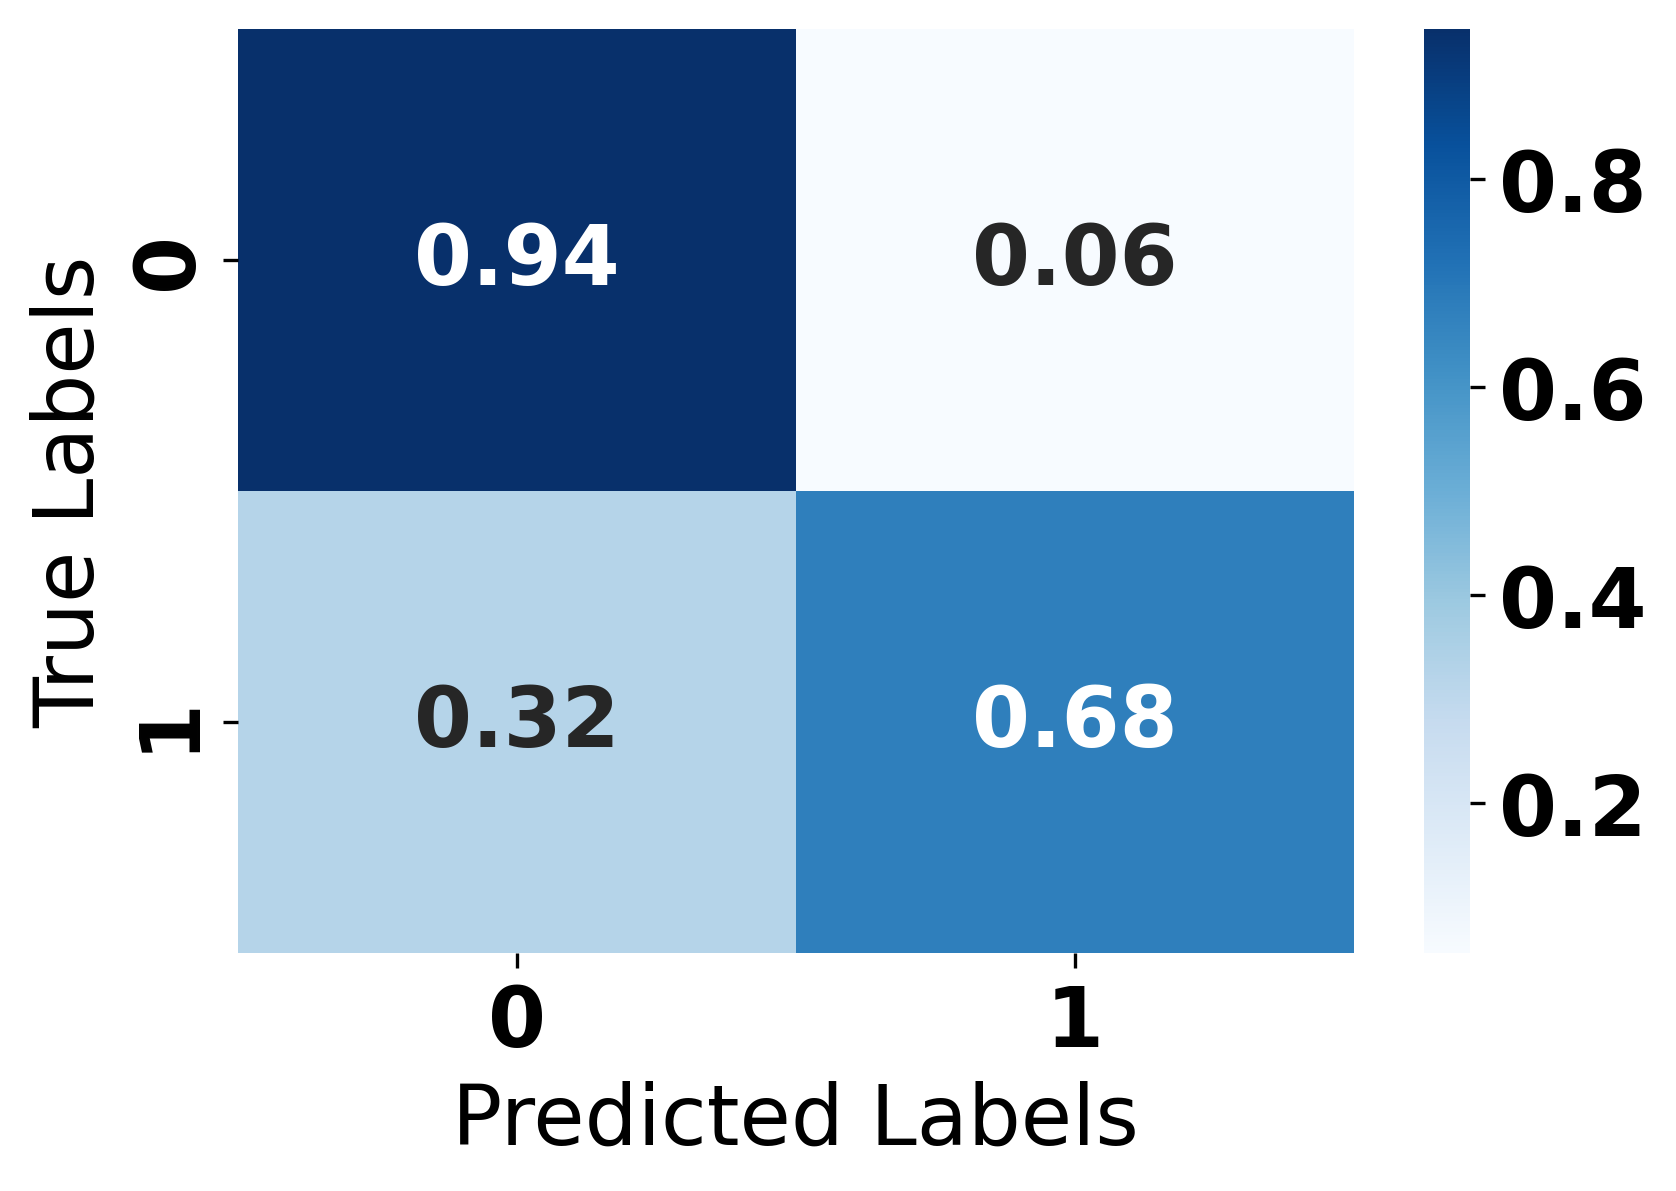

In [ ]:
# Predict probabilities on test data
y_pred_prob = model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.74, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
model.save('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/CNN.h5')
"""

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
CNN = load_model('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/CNN.h5')

In [ ]:
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model

# Define the input shape based on your data
input_shape = (x_train.shape[1],)  # Assuming your input data is 1D

def ANN_model(input_shape):
    input_layer = Input(shape=input_shape)

    # Add fully connected layers with increasing complexity
    dense1 = Dense(1024, activation='relu')(input_layer)
    dense1 = BatchNormalization()(dense1)
    dense1 = Dropout(0.5)(dense1)  # Adding dropout for regularization

    dense2 = Dense(512, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)
    dense2 = Dropout(0.5)(dense2)

    dense3 = Dense(256, activation='relu')(dense2)
    dense3 = BatchNormalization()(dense3)
    dense3 = Dropout(0.5)(dense3)

    dense4 = Dense(128, activation='relu')(dense3)
    dense4 = BatchNormalization()(dense4)
    dense4 = Dropout(0.5)(dense4)

    dense5 = Dense(64, activation='relu')(dense4)
    dense5 = BatchNormalization()(dense5)

    output = Dense(1, activation='sigmoid')(dense5)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Create the even more complex ANN model
ANN_model = ANN_model(input_shape)

# Compile the model
ANN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the even more complex ANN model
ANN_model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the even more complex ANN model
loss, accuracy = ANN_model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/20
186/186 [==============================] - 12s 45ms/step - loss: 0.4872 - accuracy: 0.7693 - val_loss: 0.0998 - val_accuracy: 0.9688
Epoch 2/20
186/186 [==============================] - 8s 41ms/step - loss: 0.3716 - accuracy: 0.8401 - val_loss: 0.1639 - val_accuracy: 0.9493
Epoch 3/20
186/186 [==============================] - 8s 42ms/step - loss: 0.3563 - accuracy: 0.8439 - val_loss: 0.2111 - val_accuracy: 0.9366
Epoch 4/20
186/186 [==============================] - 9s 50ms/step - loss: 0.3420 - accuracy: 0.8511 - val_loss: 0.3853 - val_accuracy: 0.8546
Epoch 5/20
186/186 [==============================] - 11s 59ms/step - loss: 0.3358 - accuracy: 0.8541 - val_loss: 0.3684 - val_accuracy: 0.8480
Epoch 6/20
186/186 [==============================] - 12s 63ms/step - loss: 0.3343 - accuracy: 0.8532 - val_loss: 0.2032 - val_accuracy: 0.9249
Epoch 7/20
186/186 [==============================] - 9s 47ms/step - loss: 0.3264 - accuracy: 0.8588 - val_loss: 0.4077 - val_accuracy: 0.8

389/389 [==============================] - 2s 4ms/step
Normalized Confusion Matrix:
[[0.92995885 0.07004115]
 [0.33210332 0.66789668]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.93      0.96     12150
     Class 1       0.18      0.67      0.28       271

    accuracy                           0.92     12421
   macro avg       0.58      0.80      0.62     12421
weighted avg       0.97      0.92      0.95     12421



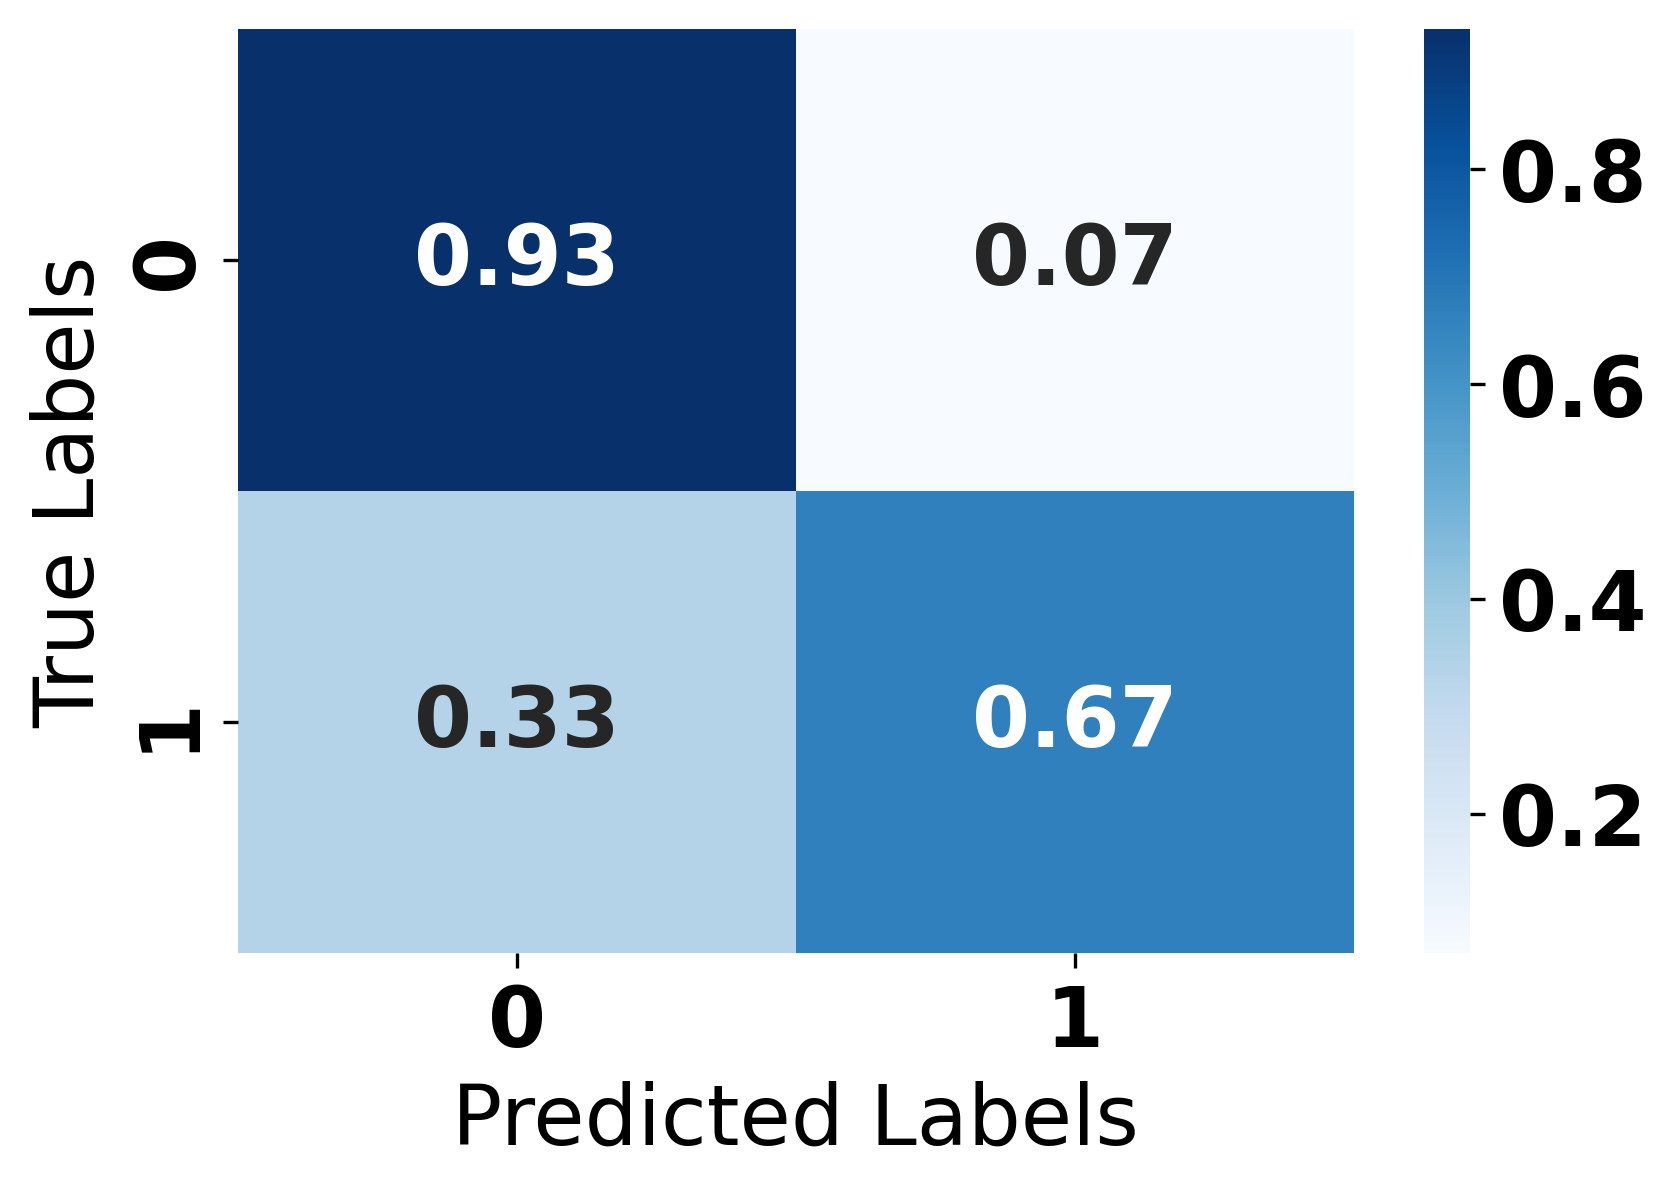

In [ ]:
# Predict probabilities on test data
y_pred_prob = ANN_model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.58
y_pred = np.where(y_pred_prob > 0.58, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.58)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
ANN_model.save('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/ANN(Base).h5')
"""

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
ANN_Base = load_model('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/ANN(Base).h5')

In [ ]:
import time
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

# Define the input shape based on your data
input_shape = (x_train.shape[1],)  # Assuming your input data is 1D

def dual-path_ANN(input_shape):
    input_layer = Input(shape=input_shape)

    # Add fully connected layers with increasing complexity
    dense1 = Dense(256, activation='relu')(input_layer)
    dense1 = BatchNormalization()(dense1)
    dense1 = Dropout(0.5)(dense1)  # Adding dropout for regularization

    dense2 = Dense(128, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)
    dense2 = Dropout(0.5)(dense2)

    # Introduce a parallel branch with a different activation function
    dense2_alt = Dense(128, activation='selu')(dense1)
    dense2_alt = BatchNormalization()(dense2_alt)
    dense2_alt = Dropout(0.5)(dense2_alt)

    # Concatenate outputs from the main and parallel branches
    concatenated = Concatenate()([dense2, dense2_alt])

    dense3 = Dense(64, activation='relu')(concatenated)
    dense3 = BatchNormalization()(dense3)

    output = Dense(1, activation='sigmoid')(dense3)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Record the start time before defining the model
start_time = time.time()

# Create the novel ANN model
dual-path_ANN = dual-path_ANN(input_shape)

# Compile the model
dual-path_ANN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Record the end time after compiling the model
end_time = time.time()

# Calculate compilation time
compilation_time = end_time - start_time
print(f"Compilation time: {compilation_time} seconds")

# Train the novel ANN model
dual-path_ANN.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the novel ANN model
loss, accuracy = dual-path_ANN.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Compilation time: 0.24889612197875977 seconds
Epoch 1/20
186/186 [==============================] - 9s 23ms/step - loss: 0.4719 - accuracy: 0.7819 - val_loss: 0.0843 - val_accuracy: 0.9727
Epoch 2/20
186/186 [==============================] - 3s 18ms/step - loss: 0.3740 - accuracy: 0.8370 - val_loss: 0.1668 - val_accuracy: 0.9453
Epoch 3/20
186/186 [==============================] - 3s 15ms/step - loss: 0.3556 - accuracy: 0.8451 - val_loss: 0.3419 - val_accuracy: 0.8836
Epoch 4/20
186/186 [==============================] - 2s 11ms/step - loss: 0.3474 - accuracy: 0.8501 - val_loss: 0.2844 - val_accuracy: 0.9042
Epoch 5/20
186/186 [==============================] - 2s 9ms/step - loss: 0.3388 - accuracy: 0.8539 - val_loss: 0.4969 - val_accuracy: 0.7632
Epoch 6/20
186/186 [==============================] - 2s 9ms/step - loss: 0.3385 - accuracy: 0.8527 - val_loss: 0.3941 - val_accuracy: 0.8342
Epoch 7/20
186/186 [==============================] - 2s 9ms/step - loss: 0.3323 - accuracy: 0.857

In [ ]:
"""
# Save the model to a file
dual-path_ANN.save('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/DP_ANN.h5')
"""

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
DP_ANN = load_model('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/DP_ANN.h5')

389/389 [==============================] - 1s 3ms/step
Time taken per instance for prediction: 0.0002167652736068319 seconds
Normalized Confusion Matrix:
[[0.79530864 0.20469136]
 [0.18819188 0.81180812]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.80      0.88     12150
     Class 1       0.08      0.81      0.15       271

    accuracy                           0.80     12421
   macro avg       0.54      0.80      0.52     12421
weighted avg       0.97      0.80      0.87     12421



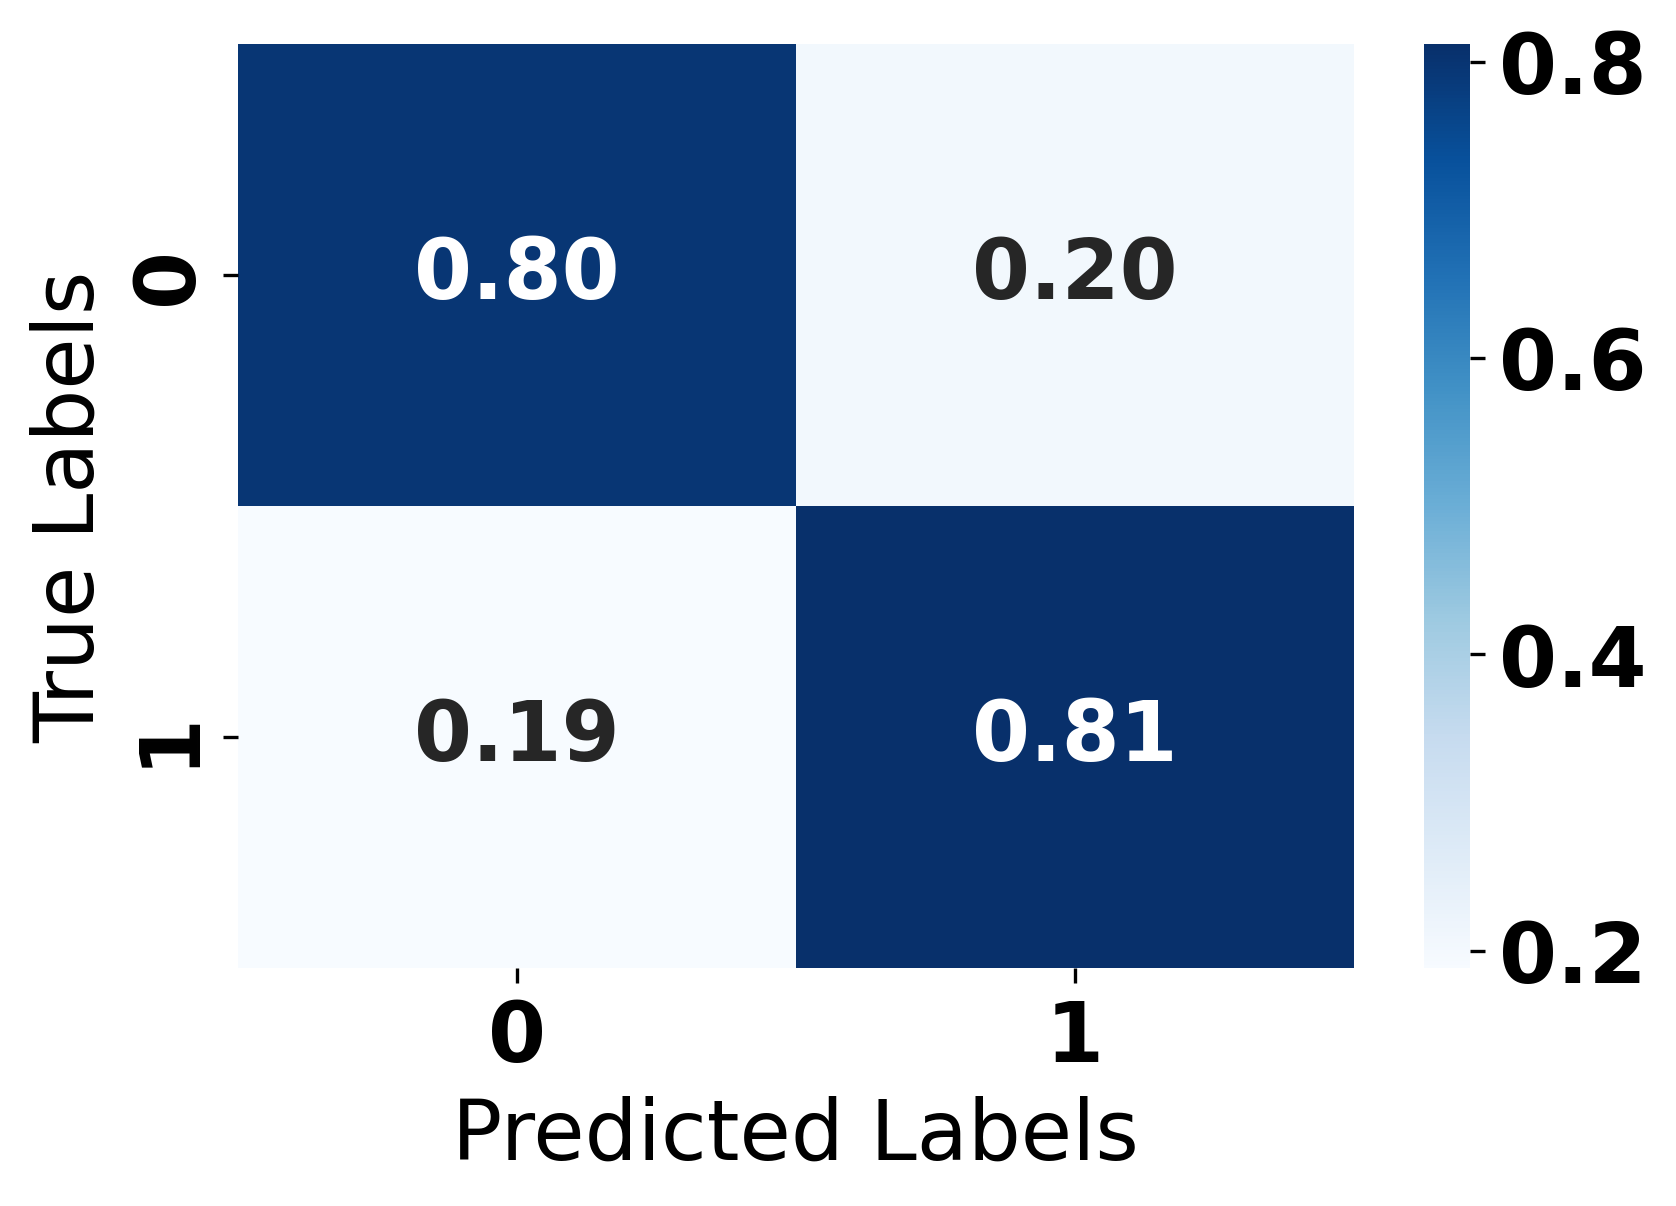

In [ ]:
import time
from sklearn.metrics import confusion_matrix, classification_report

# Predict probabilities on test data
start_time = time.time()
y_pred_prob = dual-path_ANN.predict(x_test)
end_time = time.time()

# Calculate time taken per instance for prediction
time_per_instance = (end_time - start_time) / len(x_test)
print("Time taken per instance for prediction:", time_per_instance, "seconds")

# Convert probabilities to class labels using a threshold of 0.56
y_pred = np.where(y_pred_prob > 0.627, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.56)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
# Impoting libaries for pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.0 MB/s eta 0:00:00


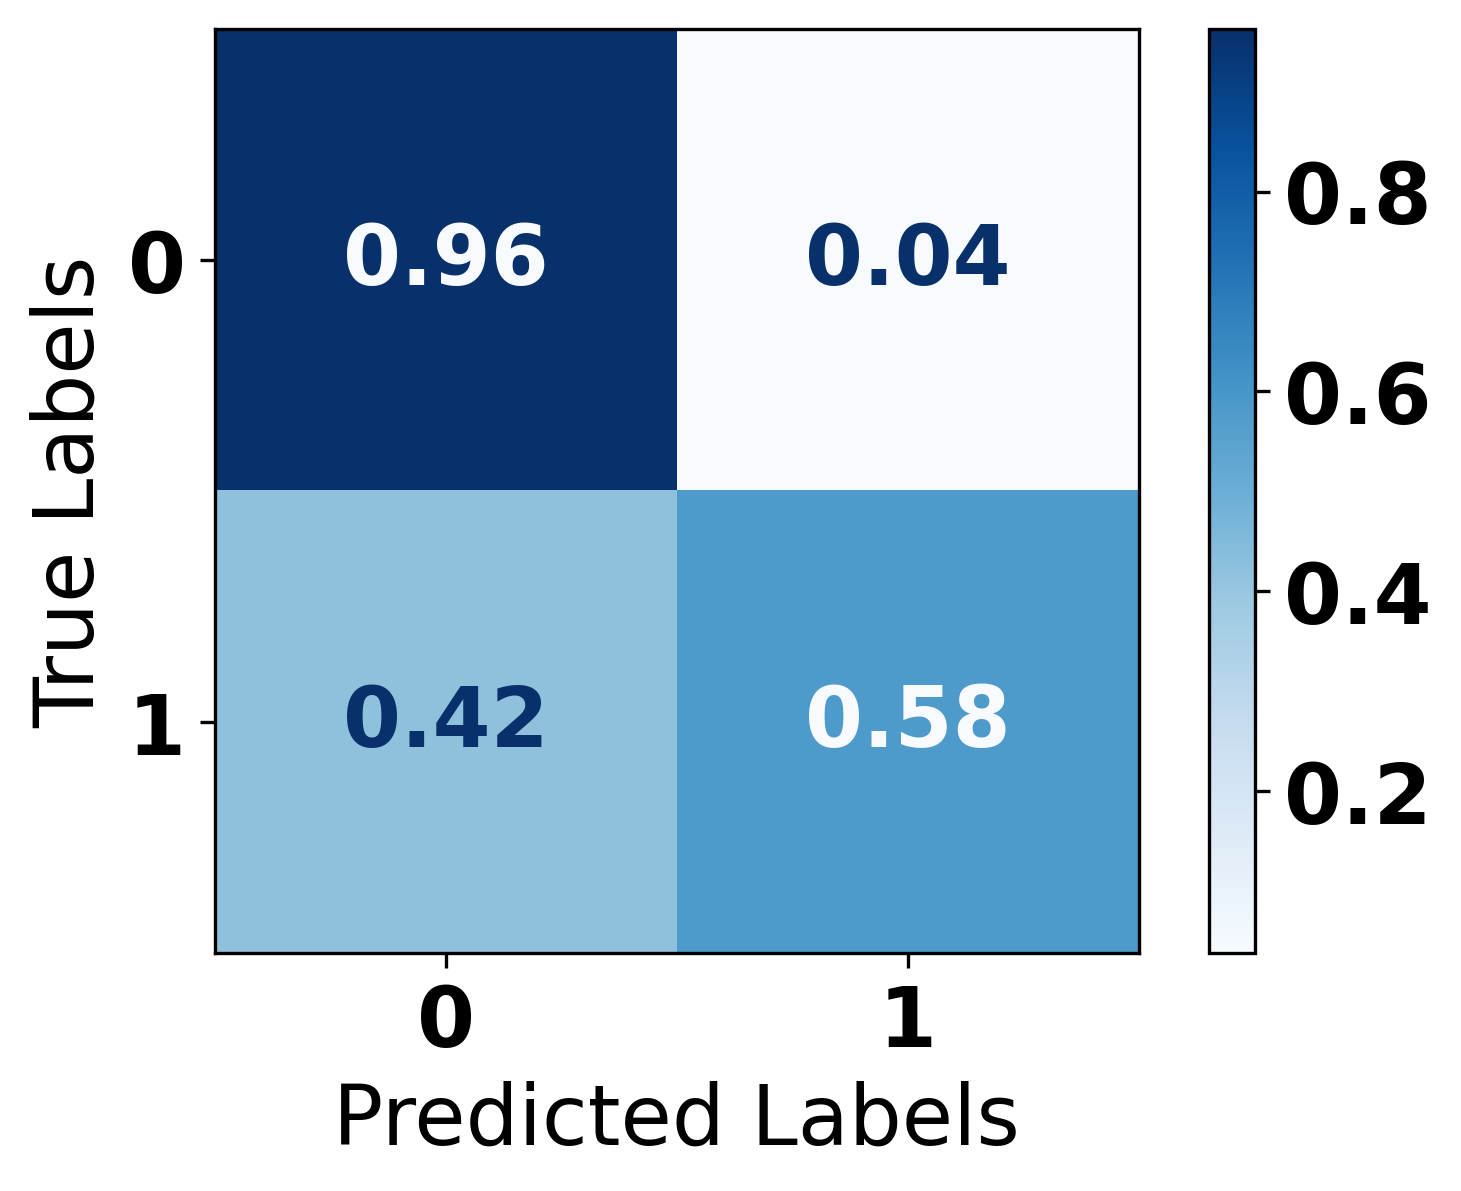

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.96      0.98     12150
     Class 1       0.26      0.58      0.36       271

    accuracy                           0.95     12421
   macro avg       0.62      0.77      0.67     12421
weighted avg       0.97      0.95      0.96     12421

Train Accuracy: 0.9926374689721906
Test Accuracy: 0.9544320103051284


In [ ]:
!pip install catboost

# Import necessary libraries
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Create and fit the CatBoost model
catboost = CatBoostClassifier(random_state=7, verbose=0)  # Set verbose to 0 to disable logging
catboost.fit(x_train, y_train)

# Predict on the test set
y_pred = catboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=catboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = catboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(catboost, '/content/drive/MyDrive/Myocardial Infarction (MI)/Model/CatBoost.pkl')
"""

['/content/drive/MyDrive/Myocardial Infarction (MI)/Model/CatBoost.pkl']

In [ ]:
import joblib

# Load the model from file
CatBoost = joblib.load('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/CatBoost.pkl')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 11619, number of negative: 12150
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012876 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 169
[LightGBM] [Info] Number of data points in the train set: 23769, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.488830 -> initscore=-0.044687
[LightGBM] [Info] Start training from score -0.044687


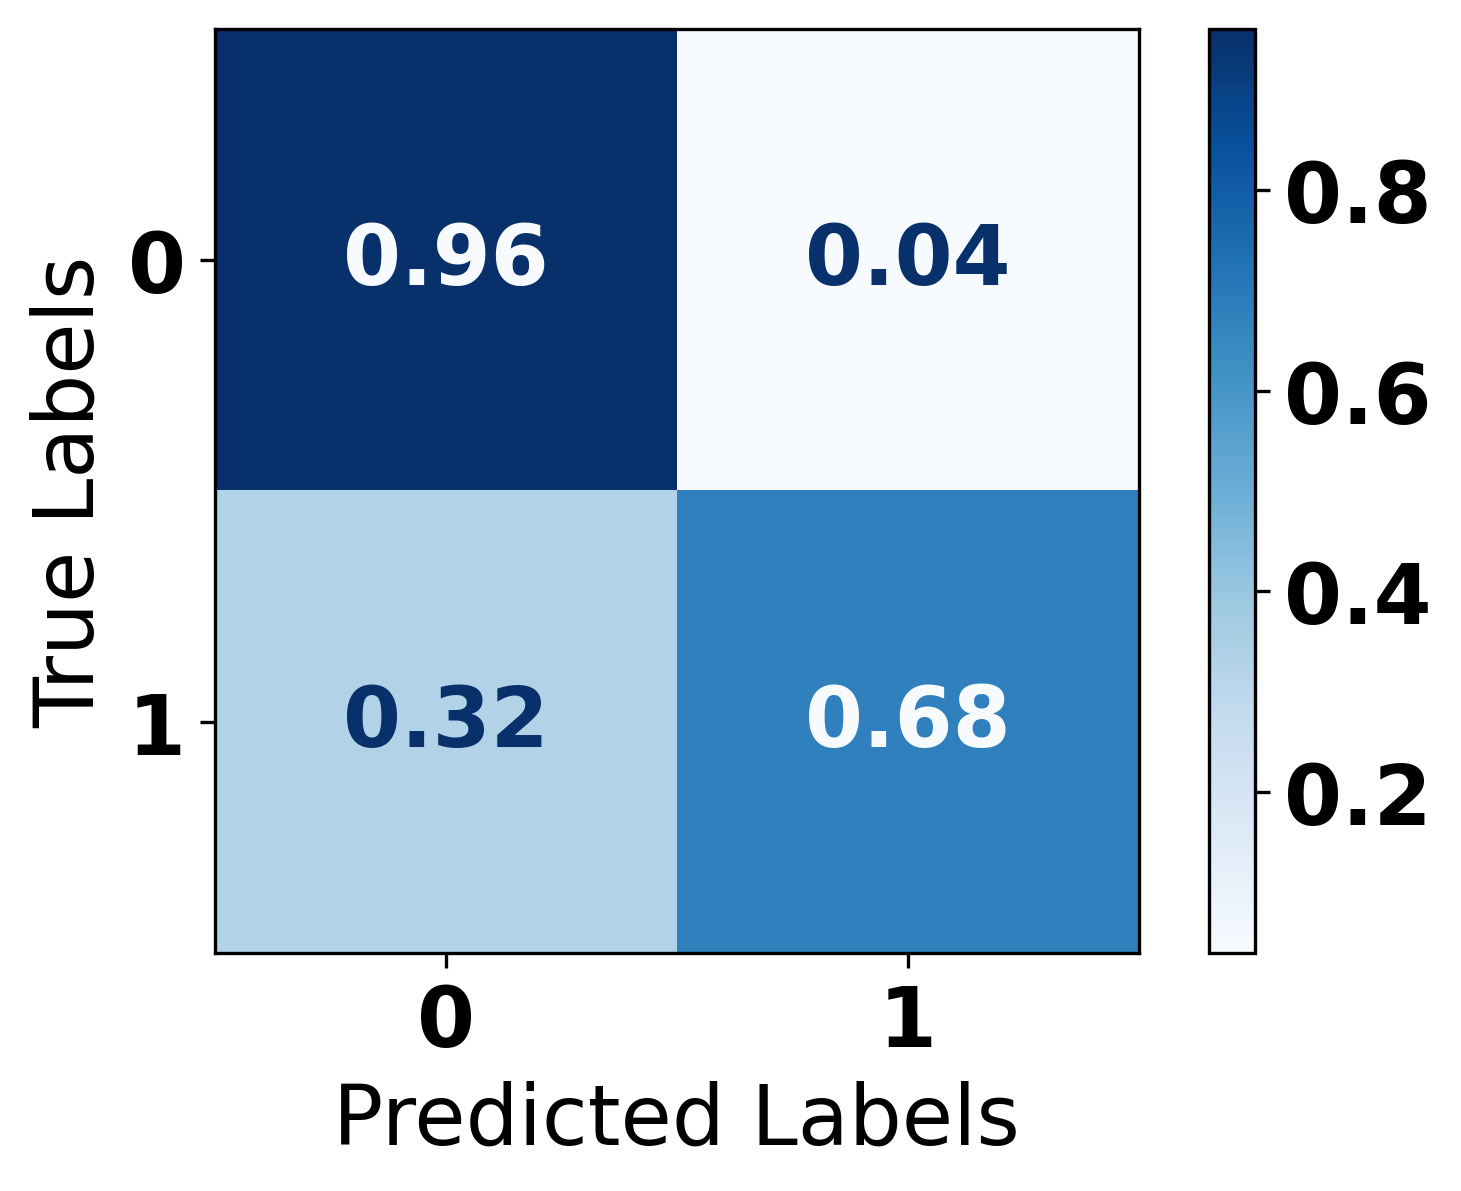

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.96      0.98     12150
     Class 1       0.28      0.68      0.39       271

    accuracy                           0.95     12421
   macro avg       0.63      0.82      0.68     12421
weighted avg       0.98      0.95      0.96     12421

Train Accuracy: 0.8161470823341327
Test Accuracy: 0.9544320103051284


In [ ]:
# Import necessary libraries
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Create and fit the LightGBM model
lgbm = lgb.LGBMClassifier(
    random_state=2,
    n_estimators=4,         # Number of boosting iterations
    learning_rate=0.1,        # Learning rate
    max_depth=1,              # Maximum tree depth for base learners
    num_leaves=2,            # Maximum number of leaves in one tree
    subsample=0.1,            # Subsample ratio of the training instances
    colsample_bytree=0.3      # Subsample ratio of columns when constructing each tree
)
lgbm.fit(x_train, y_train)

# Predict on the test set
y_pred = lgbm.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgbm.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = lgbm.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(lgbm, '/content/drive/MyDrive/Myocardial Infarction (MI)/Model/LGBM.pkl')
"""

['/content/drive/MyDrive/Myocardial Infarction (MI)/Model/LGBM.pkl']

In [ ]:
import joblib

# Load the model from file
LGBM = joblib.load('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/LGBM.pkl')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


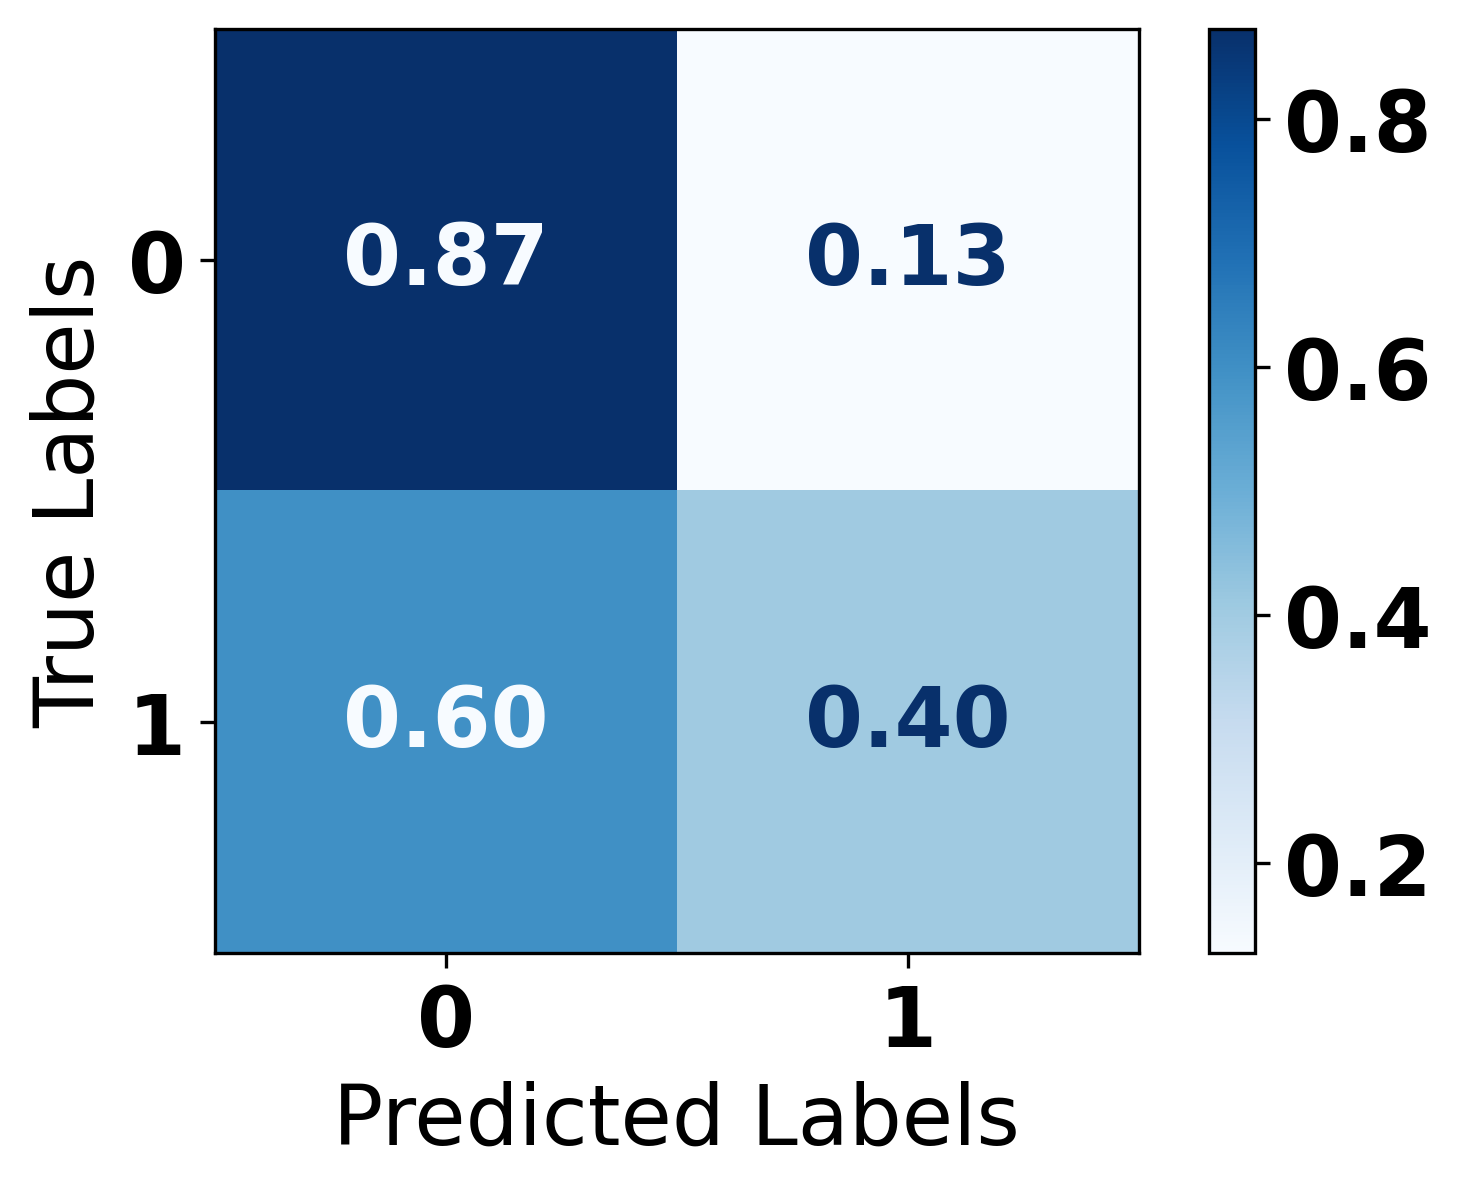

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.98      0.87      0.93     12150
     Class 1       0.07      0.40      0.11       271

    accuracy                           0.86     12421
   macro avg       0.53      0.64      0.52     12421
weighted avg       0.96      0.86      0.91     12421

Train Accuracy: 0.6429803525600573
Test Accuracy: 0.862490942758232


In [ ]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Create and fit the Gradient Boosting Machine model
gbm = GradientBoostingClassifier(
    random_state=2,
    n_estimators=4,        # Number of boosting stages to be run
    learning_rate=0.1,       # Learning rate shrinks the contribution of each tree by learning_rate
    max_depth=1,             # Maximum depth of the individual regression estimators
    subsample=0.9,           # Fraction of samples used for fitting the individual base learners
    max_features='sqrt'      # Number of features to consider when looking for the best split
)
gbm.fit(x_train, y_train)

# Predict on the test set
y_pred = gbm.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gbm.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = gbm.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(gbm, '/content/drive/MyDrive/Myocardial Infarction (MI)/Model/GBM.pkl')
"""

['/content/drive/MyDrive/Myocardial Infarction (MI)/Model/GBM.pkl']

In [ ]:
import joblib

# Load the model from file
GBM = joblib.load('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/GBM.pkl')

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


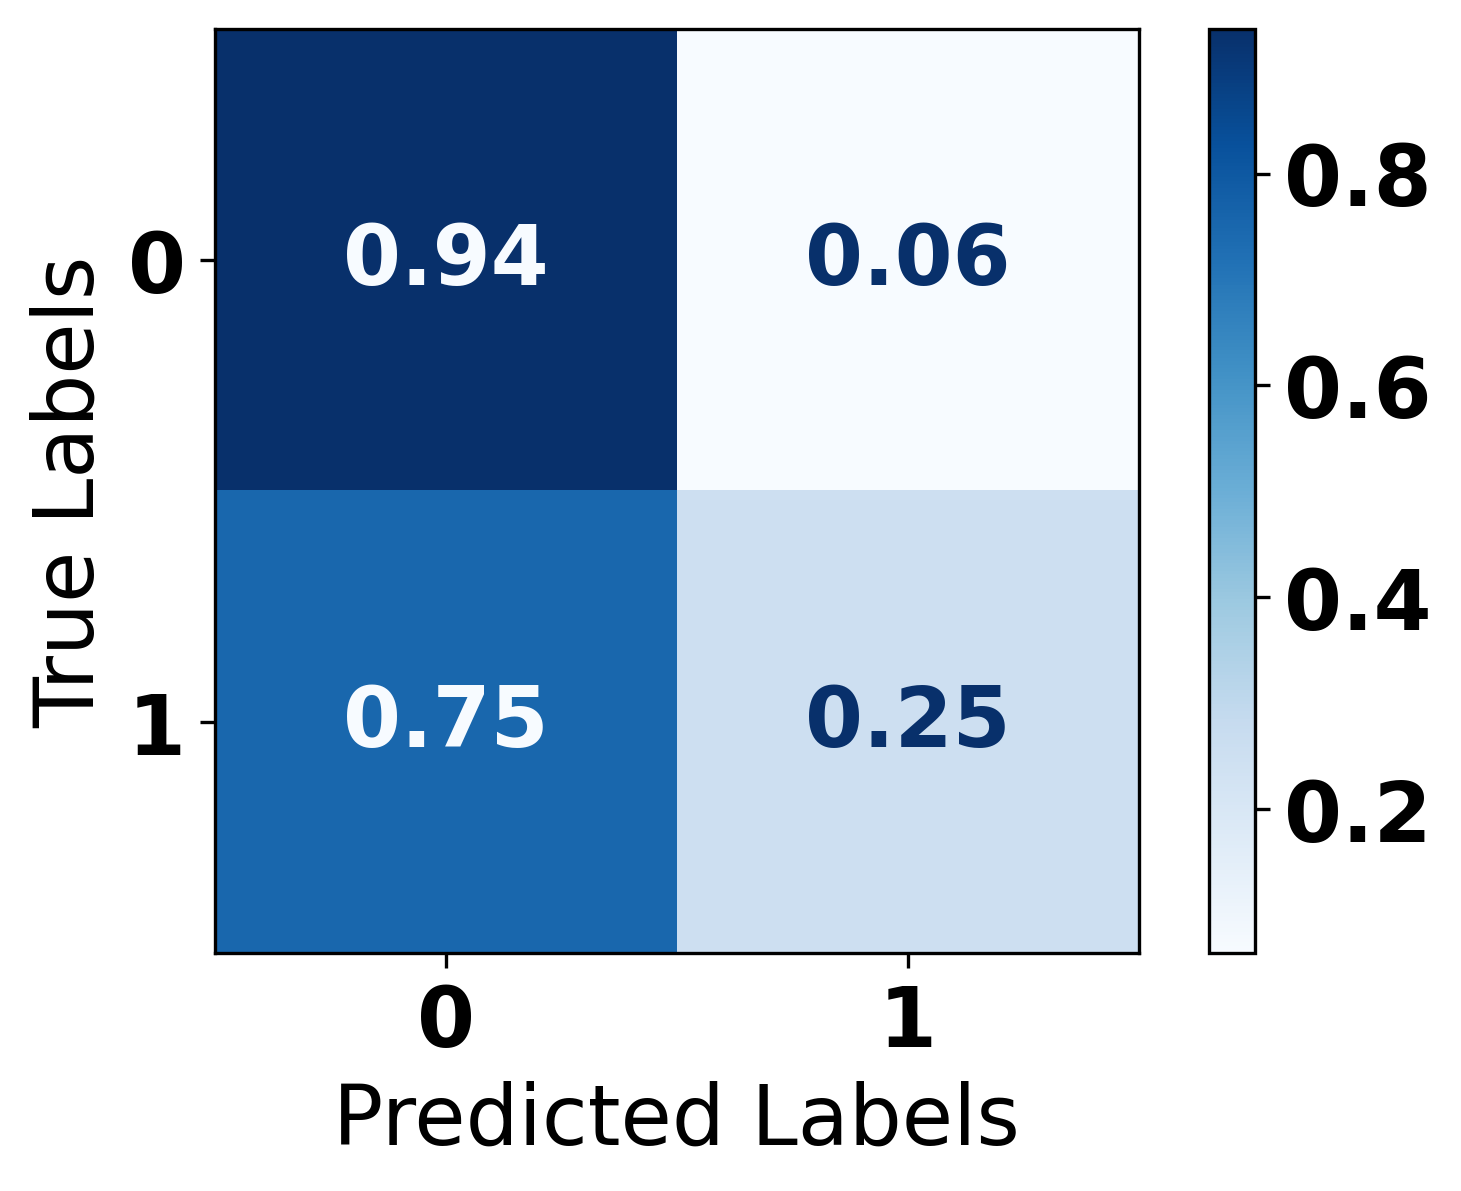

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.98      0.94      0.96     12150
     Class 1       0.08      0.25      0.12       271

    accuracy                           0.92     12421
   macro avg       0.53      0.59      0.54     12421
weighted avg       0.96      0.92      0.94     12421

Train Accuracy: 0.9786276242164164
Test Accuracy: 0.9214233958618469


In [ ]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Create and fit the k-NN model
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

# Predict on the test set
y_pred = knn.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = knn.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(knn, '/content/drive/MyDrive/Myocardial Infarction (MI)/Model/KNN.pkl')
"""

['/content/drive/MyDrive/Myocardial Infarction (MI)/Model/KNN.pkl']

In [ ]:
import joblib

# Load the model from file
KNN = joblib.load('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/KNN.pkl')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


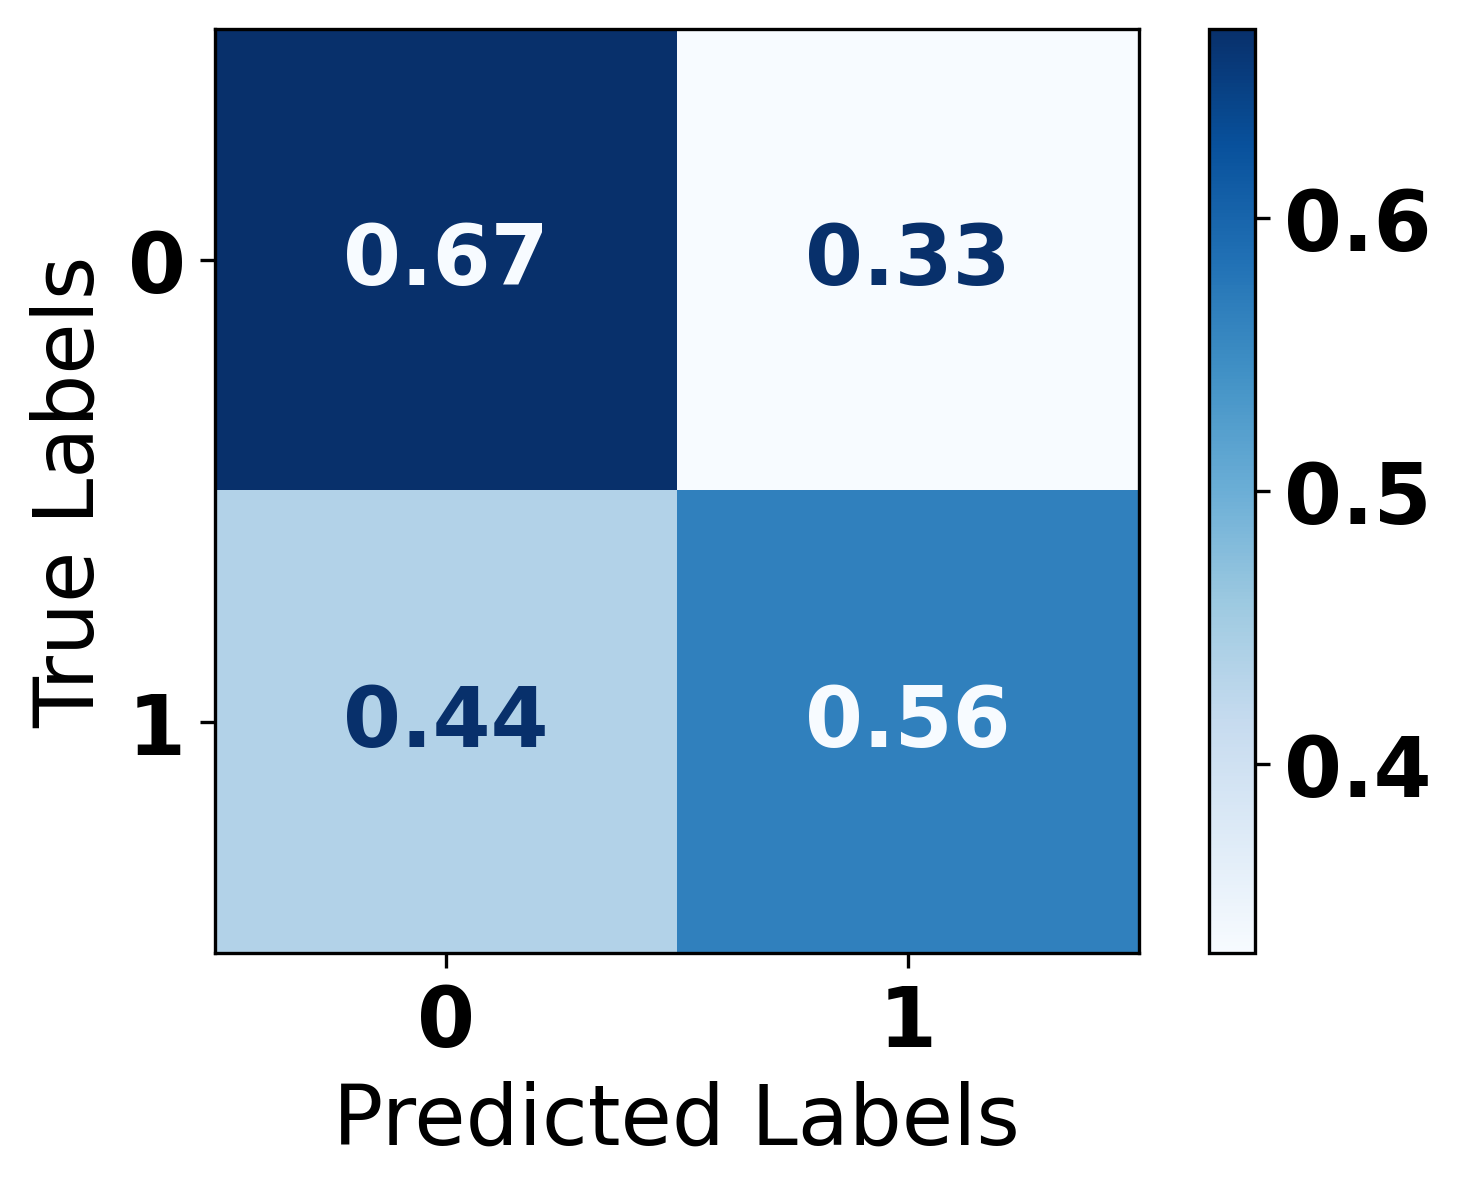

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.67      0.80     12150
     Class 1       0.04      0.56      0.07       271

    accuracy                           0.67     12421
   macro avg       0.51      0.62      0.43     12421
weighted avg       0.96      0.67      0.78     12421

Train Accuracy: 0.6371323993436829
Test Accuracy: 0.6669350293857177


In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Create and fit the Logistic Regression model
log_reg = LogisticRegression(
    random_state=2,
    solver='lbfgs',          # Algorithm to use in the optimization problem
    max_iter=4,           # Maximum number of iterations for solvers to converge
    C=1,                   # Inverse of regularization strength; must be a positive float
    penalty='l2',            # Used to specify the norm used in the penalization
    class_weight='balanced'  # Adjust weights inversely proportional to class frequencies
)
log_reg.fit(x_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = log_reg.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(log_reg, '/content/drive/MyDrive/Myocardial Infarction (MI)/Model/LR.pkl')
"""

['/content/drive/MyDrive/Myocardial Infarction (MI)/Model/LR.pkl']

In [ ]:
import joblib

# Load the model from file
LR = joblib.load('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/LR.pkl')

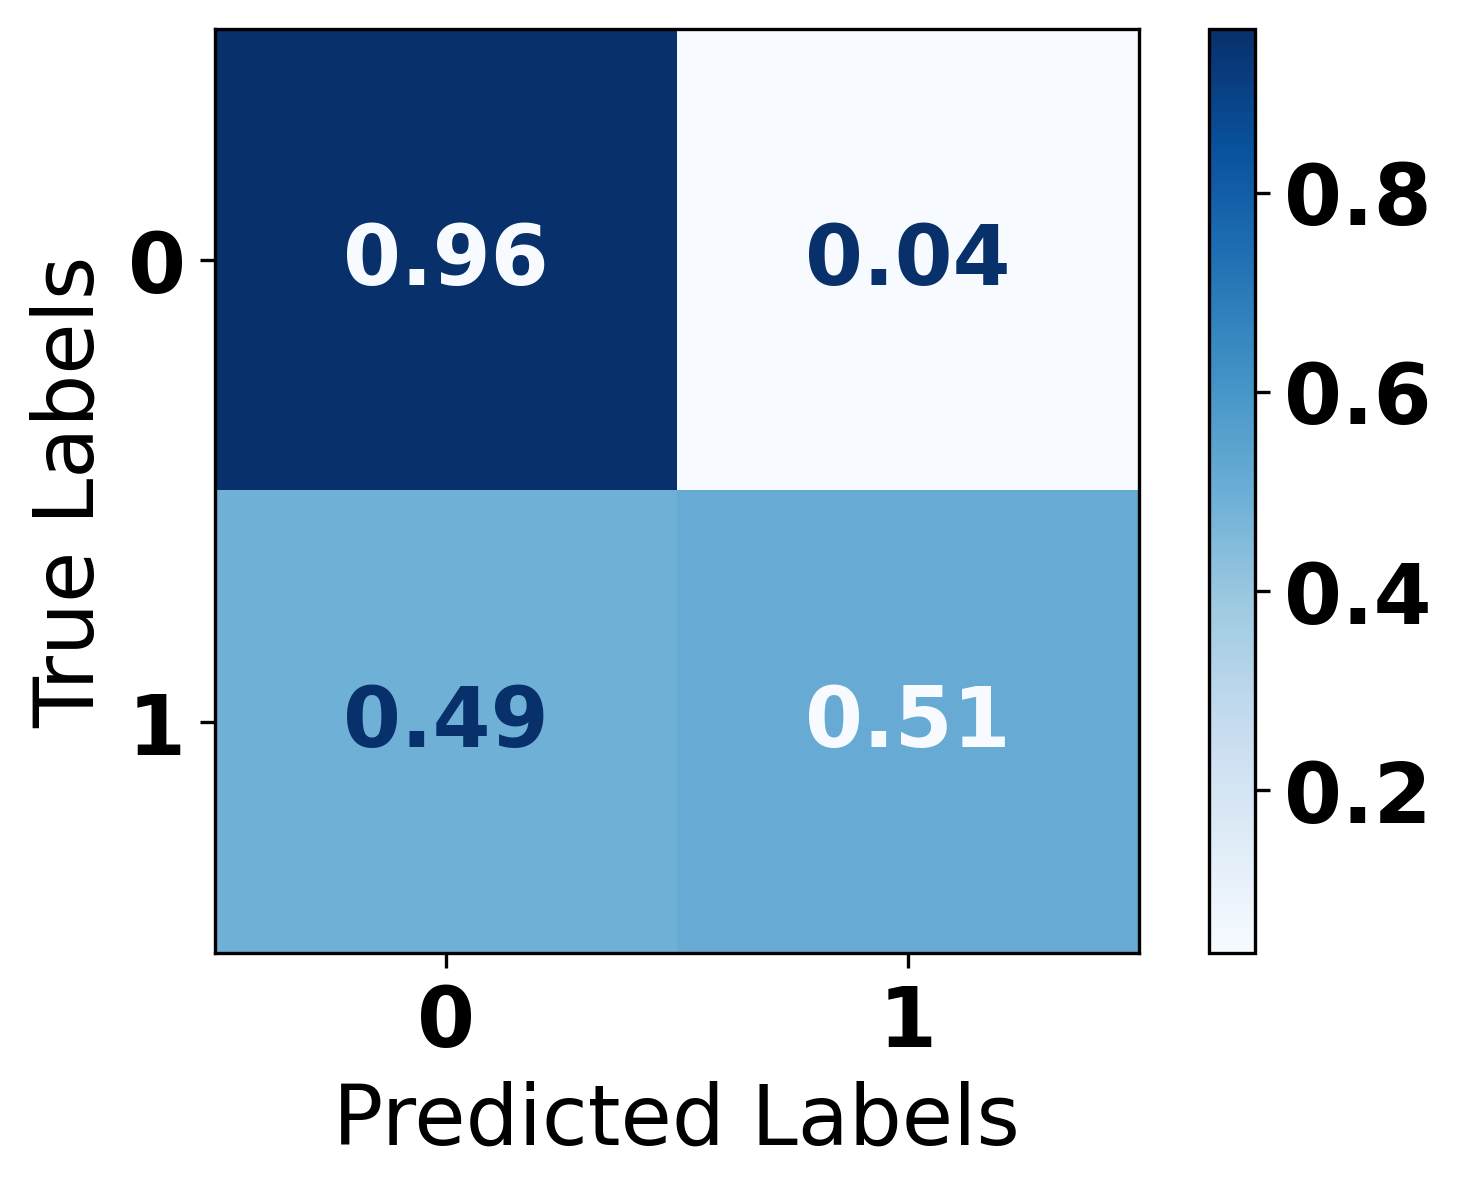

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.96      0.98     12150
     Class 1       0.24      0.51      0.33       271

    accuracy                           0.95     12421
   macro avg       0.61      0.74      0.65     12421
weighted avg       0.97      0.95      0.96     12421

Train Accuracy: 0.9958349110185536
Test Accuracy: 0.9541904838579824


In [ ]:
# Import necessary libraries
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Create and fit the XGBoost Classifier
XGB = XGBClassifier(random_state=7)
XGB.fit(x_train, y_train)

# Predict on the test set
y_pred = XGB.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=XGB.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = XGB.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(XGB, '/content/drive/MyDrive/Myocardial Infarction (MI)/Model/XGB.pkl')
"""

['/content/drive/MyDrive/Myocardial Infarction (MI)/Model/XGB.pkl']

In [ ]:
import joblib

# Load the model from file
XGB = joblib.load('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/XGB.pkl')

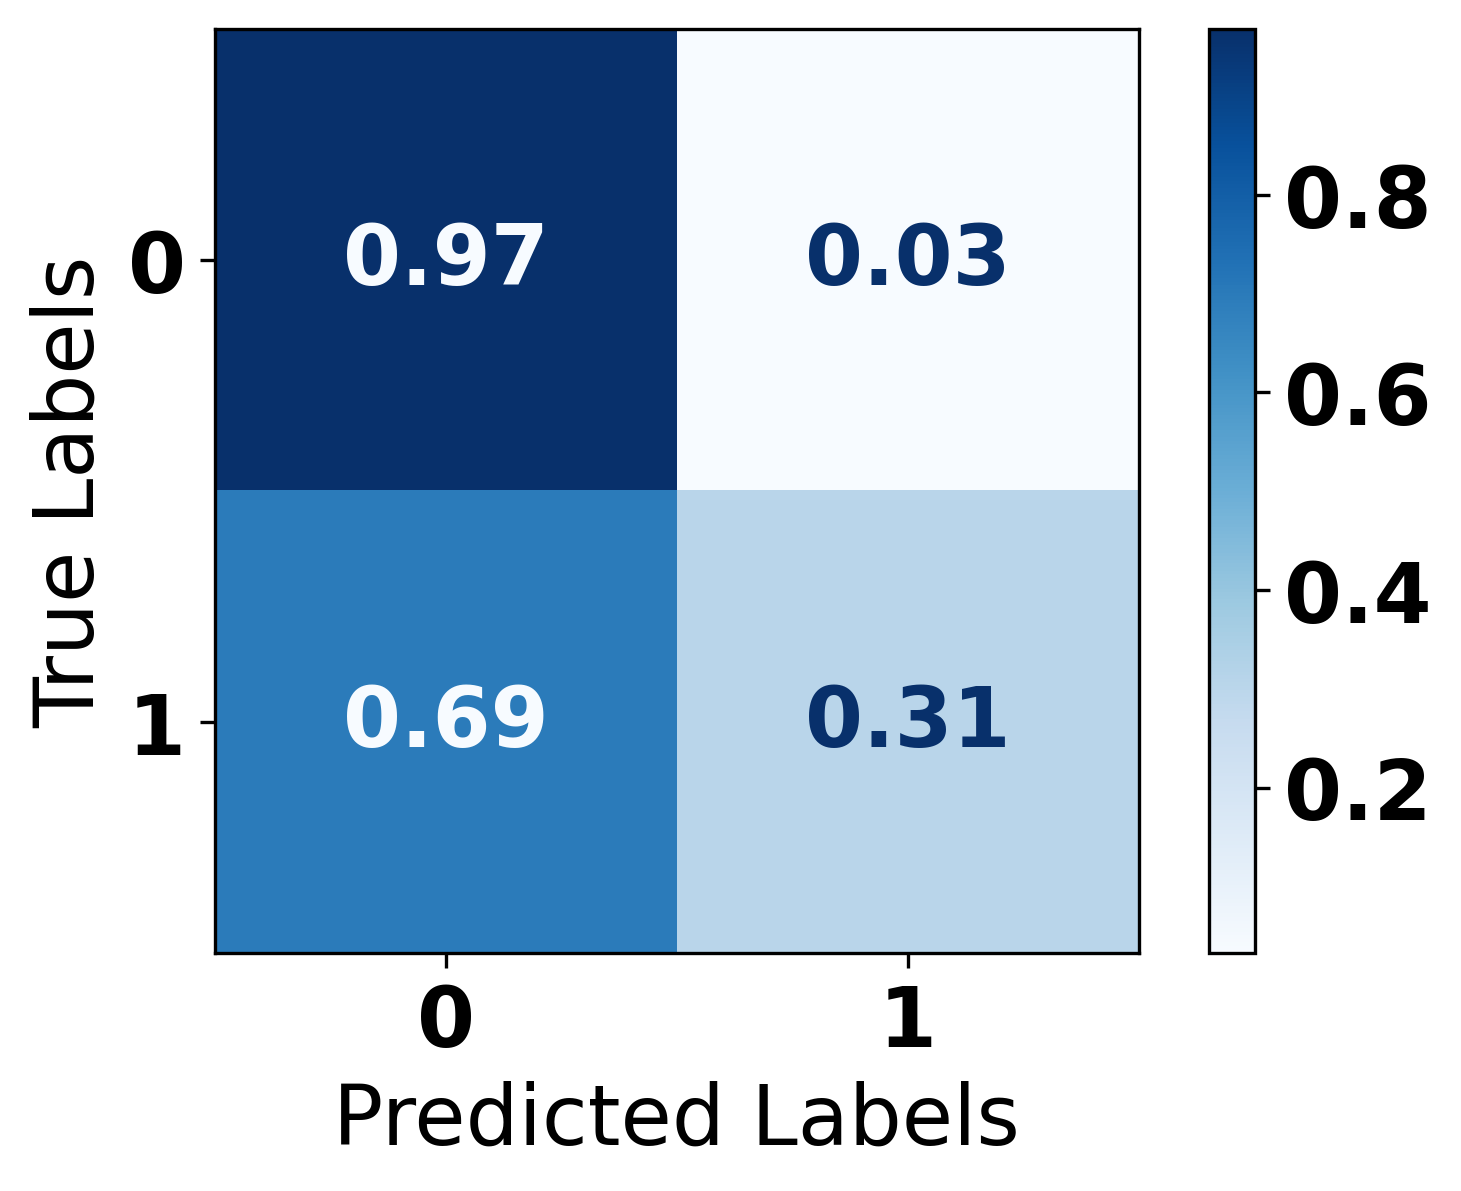

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.98      0.97      0.98     12150
     Class 1       0.17      0.31      0.22       271

    accuracy                           0.95     12421
   macro avg       0.58      0.64      0.60     12421
weighted avg       0.97      0.95      0.96     12421

Train Accuracy: 1.0
Test Accuracy: 0.9530633604379679


In [ ]:
# Create and fit the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(random_state=7)
DT.fit(x_train, y_train)

# Predict on the test set
y_pred = DT.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DT.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = DT.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(DT, '/content/drive/MyDrive/Myocardial Infarction (MI)/Model/DT.pkl')
"""

['/content/drive/MyDrive/Myocardial Infarction (MI)/Model/DT.pkl']

In [ ]:
import joblib

# Load the model from file
DT = joblib.load('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/DT.pkl')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


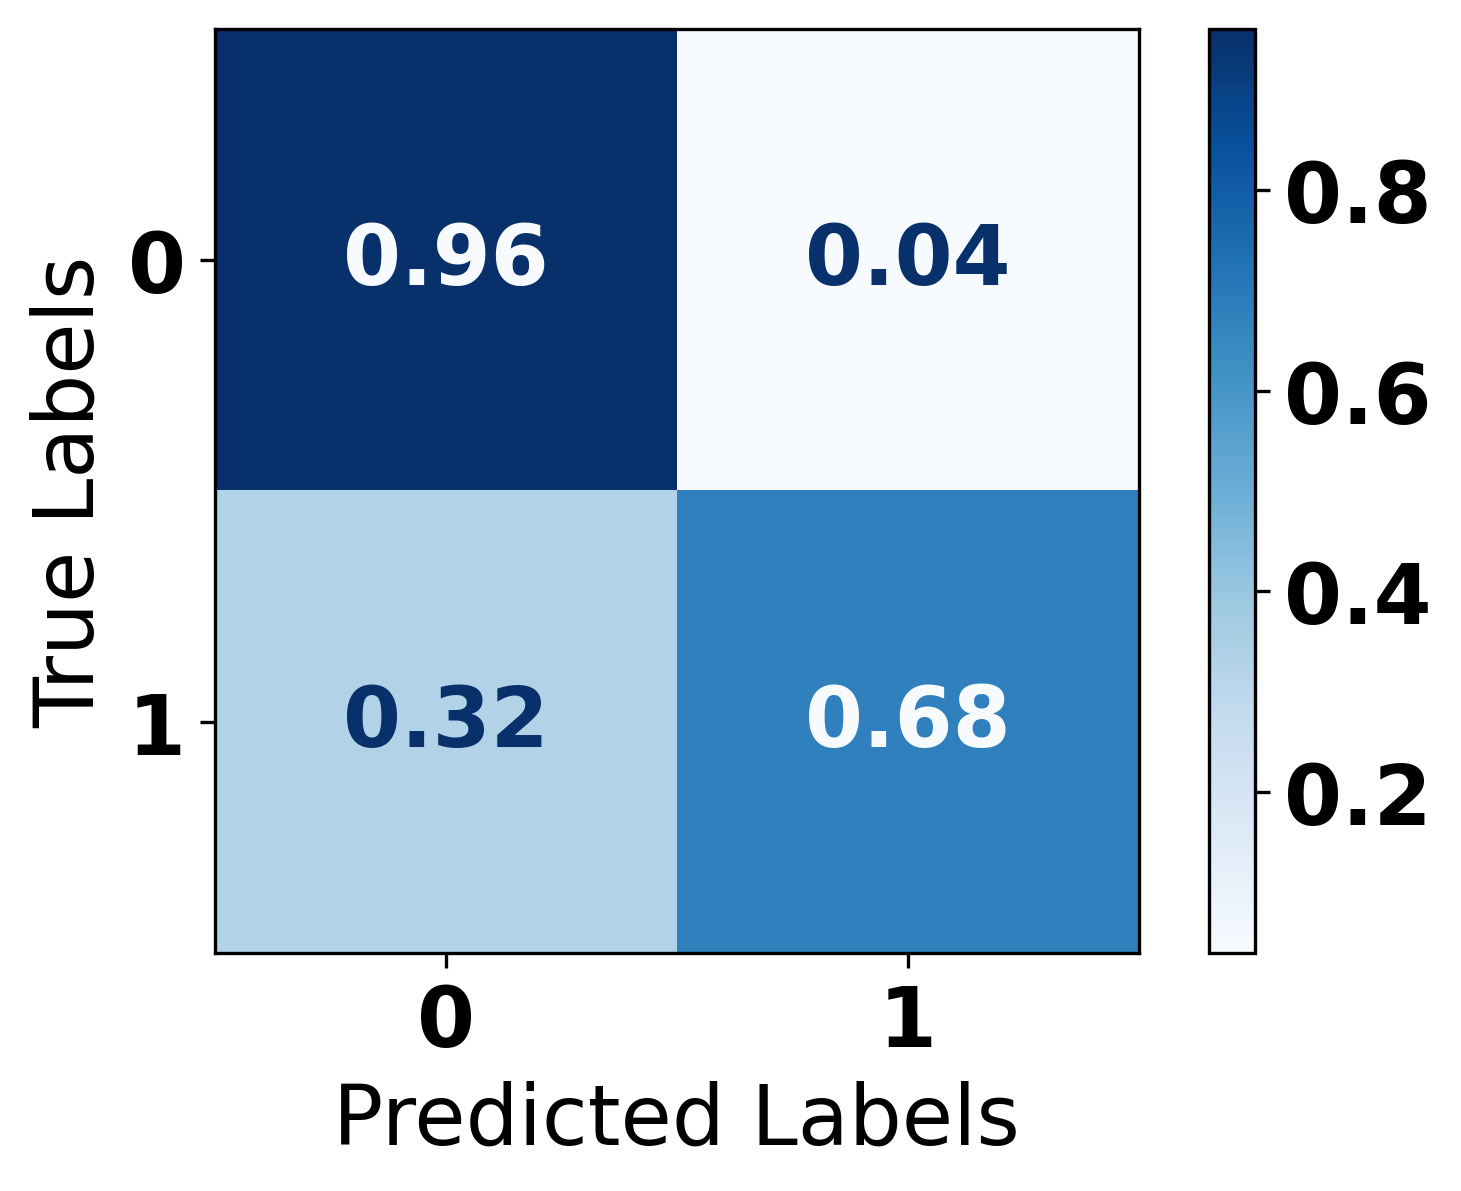

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.96      0.98     12150
     Class 1       0.28      0.68      0.39       271

    accuracy                           0.95     12421
   macro avg       0.63      0.82      0.68     12421
weighted avg       0.98      0.95      0.96     12421

Train Accuracy: 0.8161470823341327
Test Accuracy: 0.9544320103051284


In [ ]:
# Create an RUSBoost classifier
from imblearn.ensemble import RUSBoostClassifier

rusboost = RUSBoostClassifier(n_estimators=2, random_state=2)

# Fit the classifier to the training data
rusboost.fit(x_train, y_train)

# Predicting the output on the test dataset
y_pred = rusboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rusboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = rusboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(rusboost, '/content/drive/MyDrive/Myocardial Infarction (MI)/Model/RUSBoost.pkl')
"""

['/content/drive/MyDrive/Myocardial Infarction (MI)/Model/RUSBoost.pkl']

In [ ]:
import joblib

# Load the model from file
RUSBoost = joblib.load('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/RUSBoost.pkl')

<ipython-input-67-3d23888975aa>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  y_pred = RF.fit(x_train, y_train).predict(x_test)


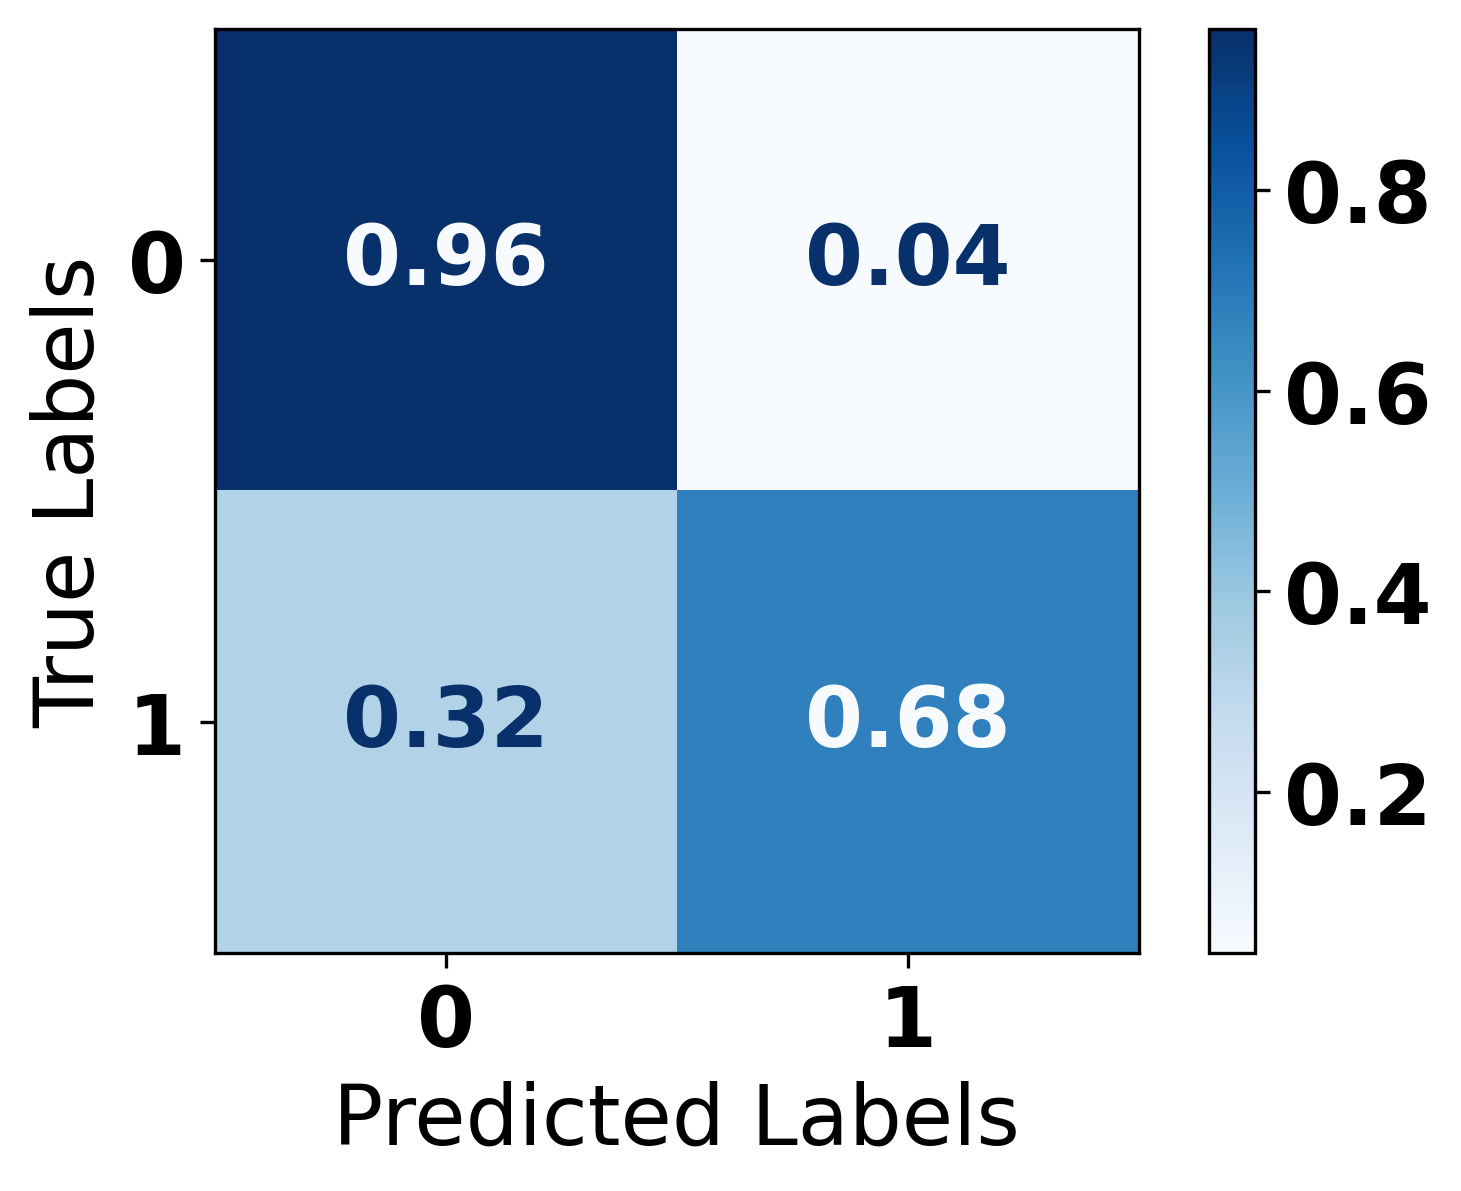

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98     12150
           1       0.28      0.68      0.39       271

    accuracy                           0.95     12421
   macro avg       0.63      0.82      0.68     12421
weighted avg       0.98      0.95      0.96     12421

Train Accuracy: 0.8161470823341327
Test Accuracy: 0.9544320103051284


In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(
    n_estimators=2,
    max_depth=1,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    random_state=1
)

# Fit the classifier to the training data
y_pred = RF.fit(x_train, y_train).predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = RF.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(RF, '/content/drive/MyDrive/Myocardial Infarction (MI)/Model/RF.pkl')
"""

['/content/drive/MyDrive/Myocardial Infarction (MI)/Model/RF.pkl']

In [ ]:
import joblib

# Load the model from file
RF = joblib.load('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/RF.pkl')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


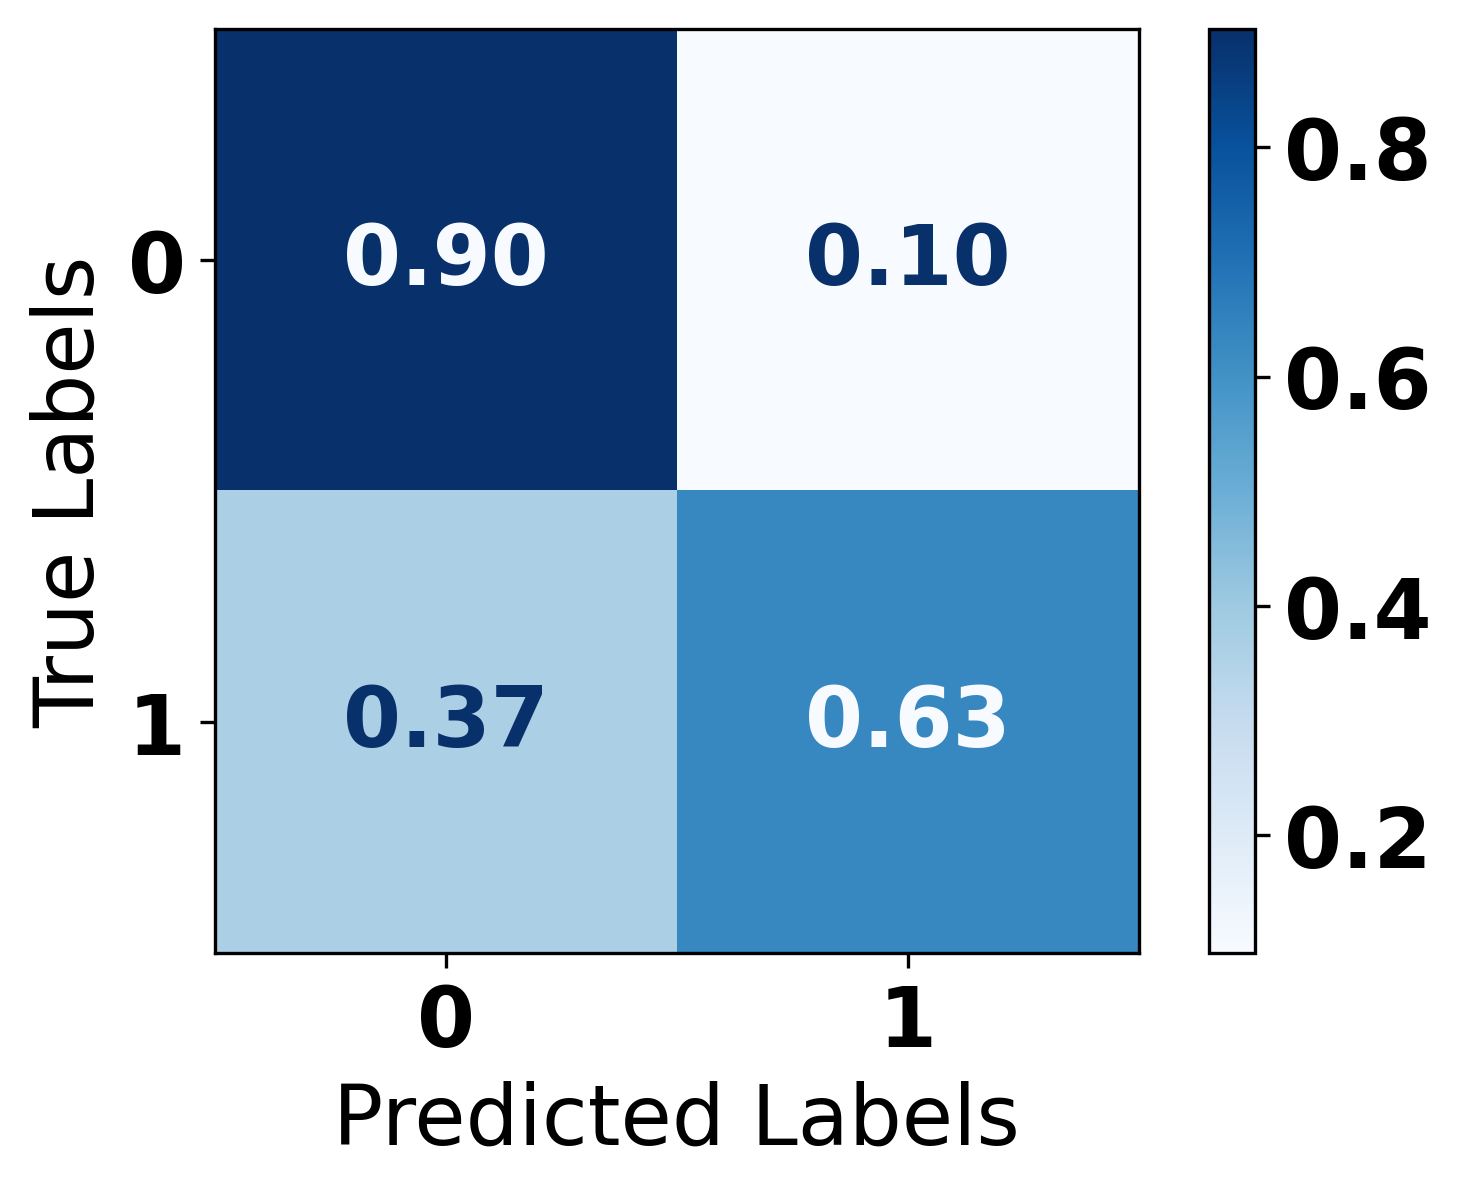

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.95     12150
           1       0.13      0.63      0.21       271

    accuracy                           0.90     12421
   macro avg       0.56      0.77      0.58     12421
weighted avg       0.97      0.90      0.93     12421

Train Accuracy: 0.7858555261054314
Test Accuracy: 0.8971902423315353


In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB(priors=[0.9, 0.1], var_smoothing=1e-3)

# Fit the classifier to the training data
y_pred = GNB.fit(x_train, y_train).predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GNB.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = GNB.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(GNB, '/content/drive/MyDrive/Myocardial Infarction (MI)/Model/GNB.pkl')
"""

['/content/drive/MyDrive/Myocardial Infarction (MI)/Model/GNB.pkl']

In [ ]:
import joblib

# Load the model from file
GNB = joblib.load('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/GNB.pkl')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


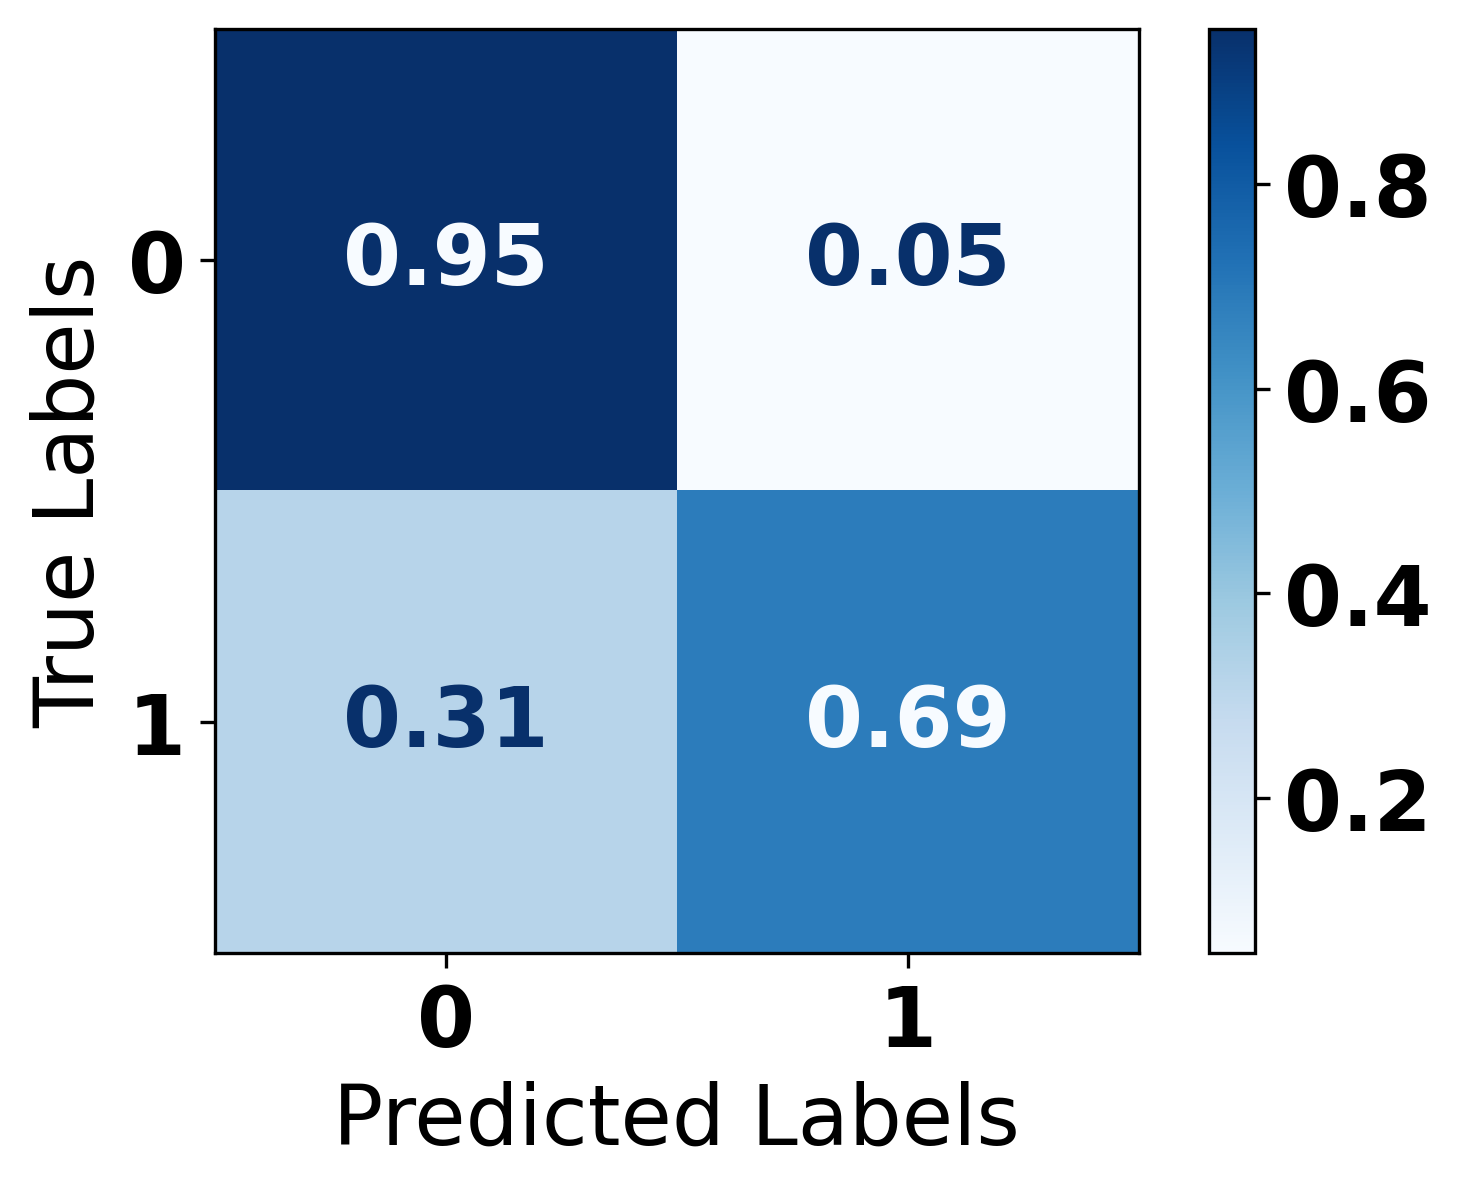

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97     12150
           1       0.24      0.69      0.36       271

    accuracy                           0.95     12421
   macro avg       0.62      0.82      0.66     12421
weighted avg       0.98      0.95      0.96     12421

Train Accuracy: 0.8313349320543565
Test Accuracy: 0.9459785846550197


In [ ]:
# Create an AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier

Adaboost = AdaBoostClassifier(n_estimators=11, learning_rate=0.2, random_state=33)
# Adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the AdaBoost classifier
Adaboost.fit(x_train, y_train)

# Make predictions on the test set
y_pred = Adaboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Adaboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = Adaboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(Adaboost, '/content/drive/MyDrive/Myocardial Infarction (MI)/Model/AdaBoost.pkl')
"""

['/content/drive/MyDrive/Myocardial Infarction (MI)/Model/AdaBoost.pkl']

In [ ]:
import joblib

# Load the model from file
AdaBoost = joblib.load('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/AdaBoost.pkl')

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(
    random_state=55,
    max_iter=50,
    hidden_layer_sizes=(4,),  # Size of the hidden layers (default is a single layer with 100 neurons)
    activation='relu',          # Activation function for the hidden layer ('identity', 'logistic', 'tanh', 'relu')
    solver='adam',              # Solver for weight optimization ('lbfgs', 'sgd', 'adam')
    alpha=0.00001,               # L2 penalty (regularization term) parameter
    batch_size='auto',          # Size of minibatches for stochastic optimizers
    learning_rate='constant',   # Learning rate schedule ('constant', 'invscaling', 'adaptive')
    learning_rate_init=0.0001,   # Initial learning rate used
    power_t=0.5,                # The exponent for inverse scaling learning rate
    shuffle=True,               # Whether to shuffle samples in each iteration
    tol=1e-8,                   # Tolerance for the optimization
    verbose=False,              # Whether to print progress messages to stdout
    warm_start=False,           # Reuse the solution of the previous call to fit as initialization
    momentum=0.2,               # Momentum for gradient descent update (only used when solver='sgd')
    nesterovs_momentum=True,    # Whether to use Nesterov's momentum (only used when solver='sgd' and momentum > 0)
    early_stopping=False,       # Whether to use early stopping to terminate training when validation score is not improving
    validation_fraction=0.1,    # The proportion of training data to set aside as validation set for early stopping
    beta_1=0.09,                 # Exponential decay rate for estimates of first moment vector in Adam
    beta_2=0.0999,               # Exponential decay rate for estimates of second moment vector in Adam
    epsilon=1e-4                # Value for numerical stability in Adam
).fit(x_train, y_train)
y_pred = clf.predict_proba(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Normalized Confusion Matrix:
[[0.82263374 0.17736626]
 [0.26568266 0.73431734]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.82      0.90     12150
     Class 1       0.08      0.73      0.15       271

    accuracy                           0.82     12421
   macro avg       0.54      0.78      0.53     12421
weighted avg       0.97      0.82      0.88     12421



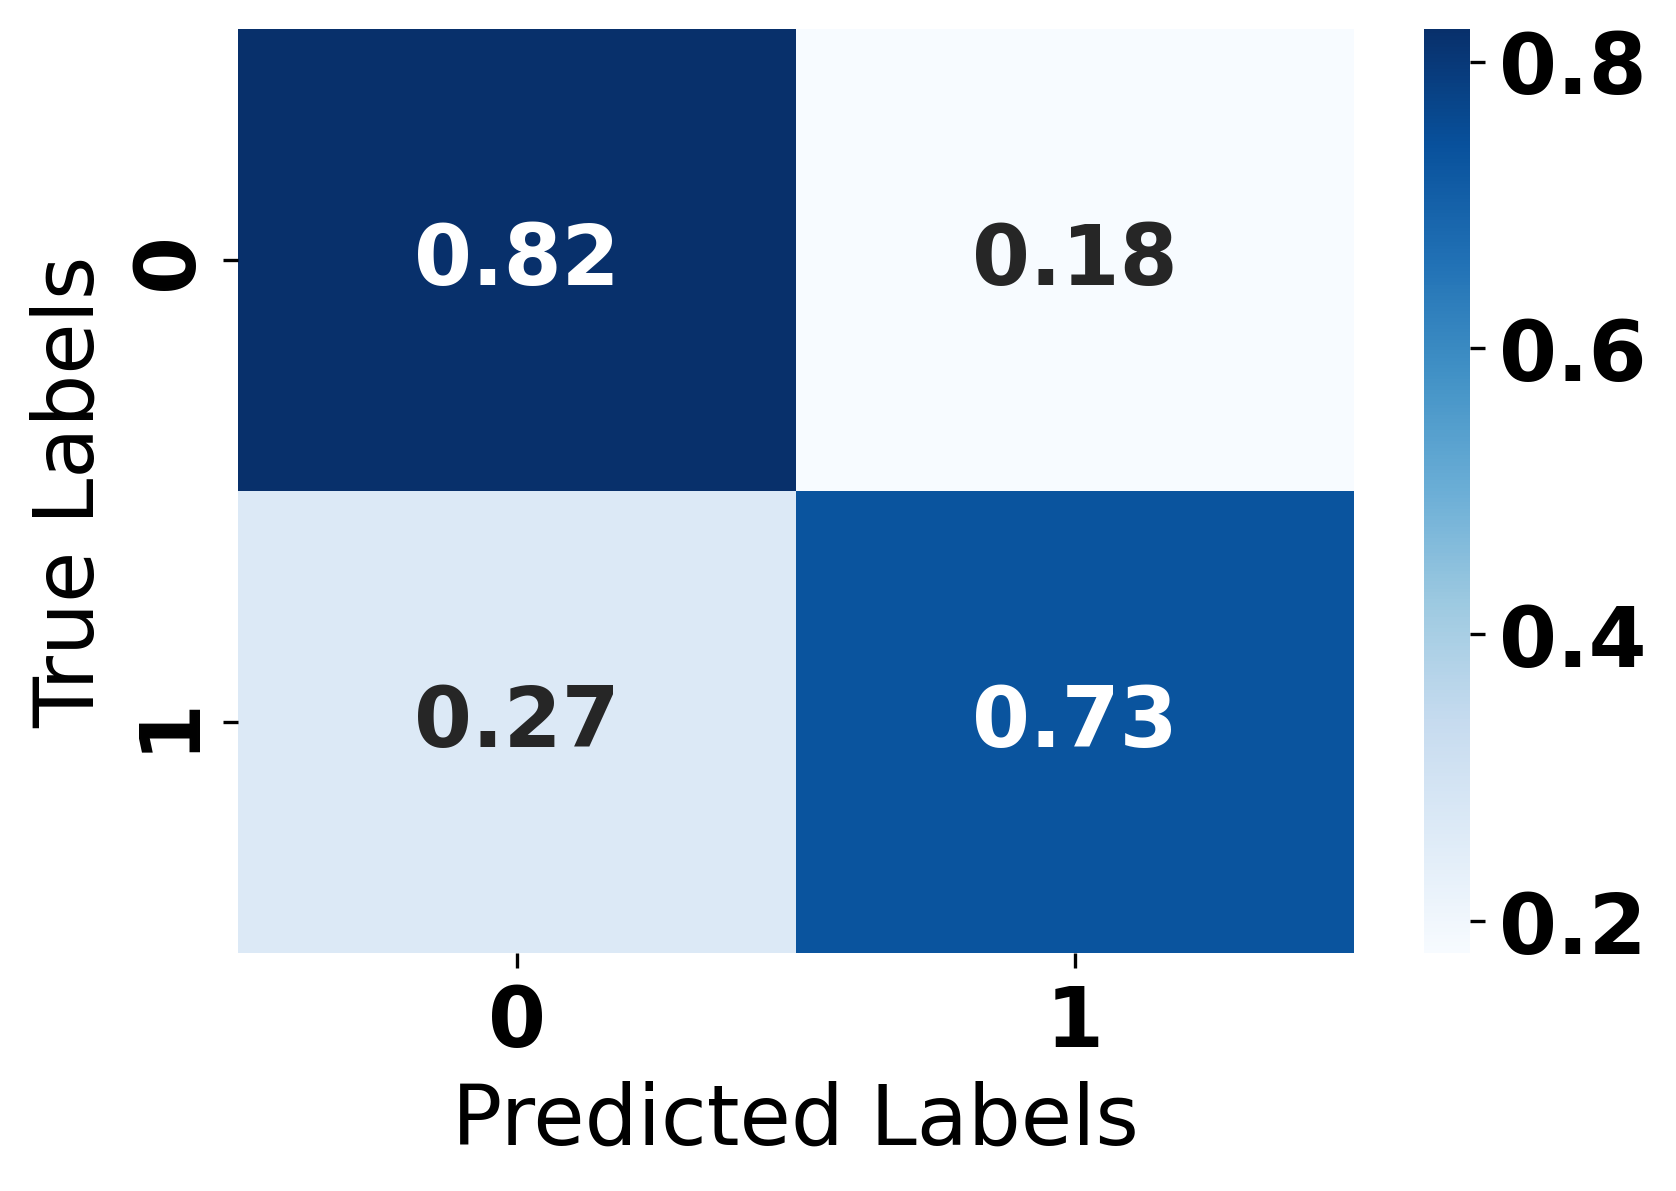

In [ ]:
# Predict probabilities on test data
y_pred_prob = clf.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(clf, '/content/drive/MyDrive/Myocardial Infarction (MI)/Model/MLP.pkl')
"""

['/content/drive/MyDrive/Myocardial Infarction (MI)/Model/MLP.pkl']

In [ ]:
import joblib

# Load the model from file
MLP = joblib.load('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/MLP.pkl')

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Add

# Input layer
input_layer = Input(shape=(x_train.shape[1], 1))

# First convolutional block
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# Second convolutional block with residual connection
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(pool1)
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2)

# Residual connection
residual1 = Conv1D(filters=64, kernel_size=1, activation='relu', padding='same')(pool1)
residual1 = Add()([residual1, conv2])
pool2 = MaxPooling1D(pool_size=2)(residual1)

# Flatten layer
flatten = Flatten()(pool2)

# Dense layers
dense1 = Dense(128, activation='relu')(flatten)
dense2 = Dense(64, activation='relu')(dense1)

# Output layer
output = Dense(1, activation='sigmoid')(dense2)

# Create the model
model = Model(inputs=input_layer, outputs=output)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
186/186 [==============================] - 5s 20ms/step - loss: 0.5811 - accuracy: 0.6960 - val_loss: 0.9046 - val_accuracy: 0.5524
Epoch 2/10
186/186 [==============================] - 5s 28ms/step - loss: 0.3975 - accuracy: 0.8285 - val_loss: 0.5198 - val_accuracy: 0.7690
Epoch 3/10
186/186 [==============================] - 3s 18ms/step - loss: 0.3705 - accuracy: 0.8393 - val_loss: 0.3052 - val_accuracy: 0.8841
Epoch 4/10
186/186 [==============================] - 3s 18ms/step - loss: 0.3502 - accuracy: 0.8500 - val_loss: 0.3506 - val_accuracy: 0.8681
Epoch 5/10
186/186 [==============================] - 4s 22ms/step - loss: 0.3398 - accuracy: 0.8561 - val_loss: 0.3576 - val_accuracy: 0.8586
Epoch 6/10
186/186 [==============================] - 7s 38ms/step - loss: 0.3294 - accuracy: 0.8565 - val_loss: 0.3351 - val_accuracy: 0.8652
Epoch 7/10
186/186 [==============================] - 6s 33ms/step - loss: 0.3183 - accuracy: 0.8624 - val_loss: 0.2050 - val_accuracy: 0.9246

389/389 [==============================] - 3s 7ms/step
Normalized Confusion Matrix:
[[0.94444444 0.05555556]
 [0.32472325 0.67527675]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.94      0.97     12150
     Class 1       0.21      0.68      0.32       271

    accuracy                           0.94     12421
   macro avg       0.60      0.81      0.65     12421
weighted avg       0.98      0.94      0.95     12421



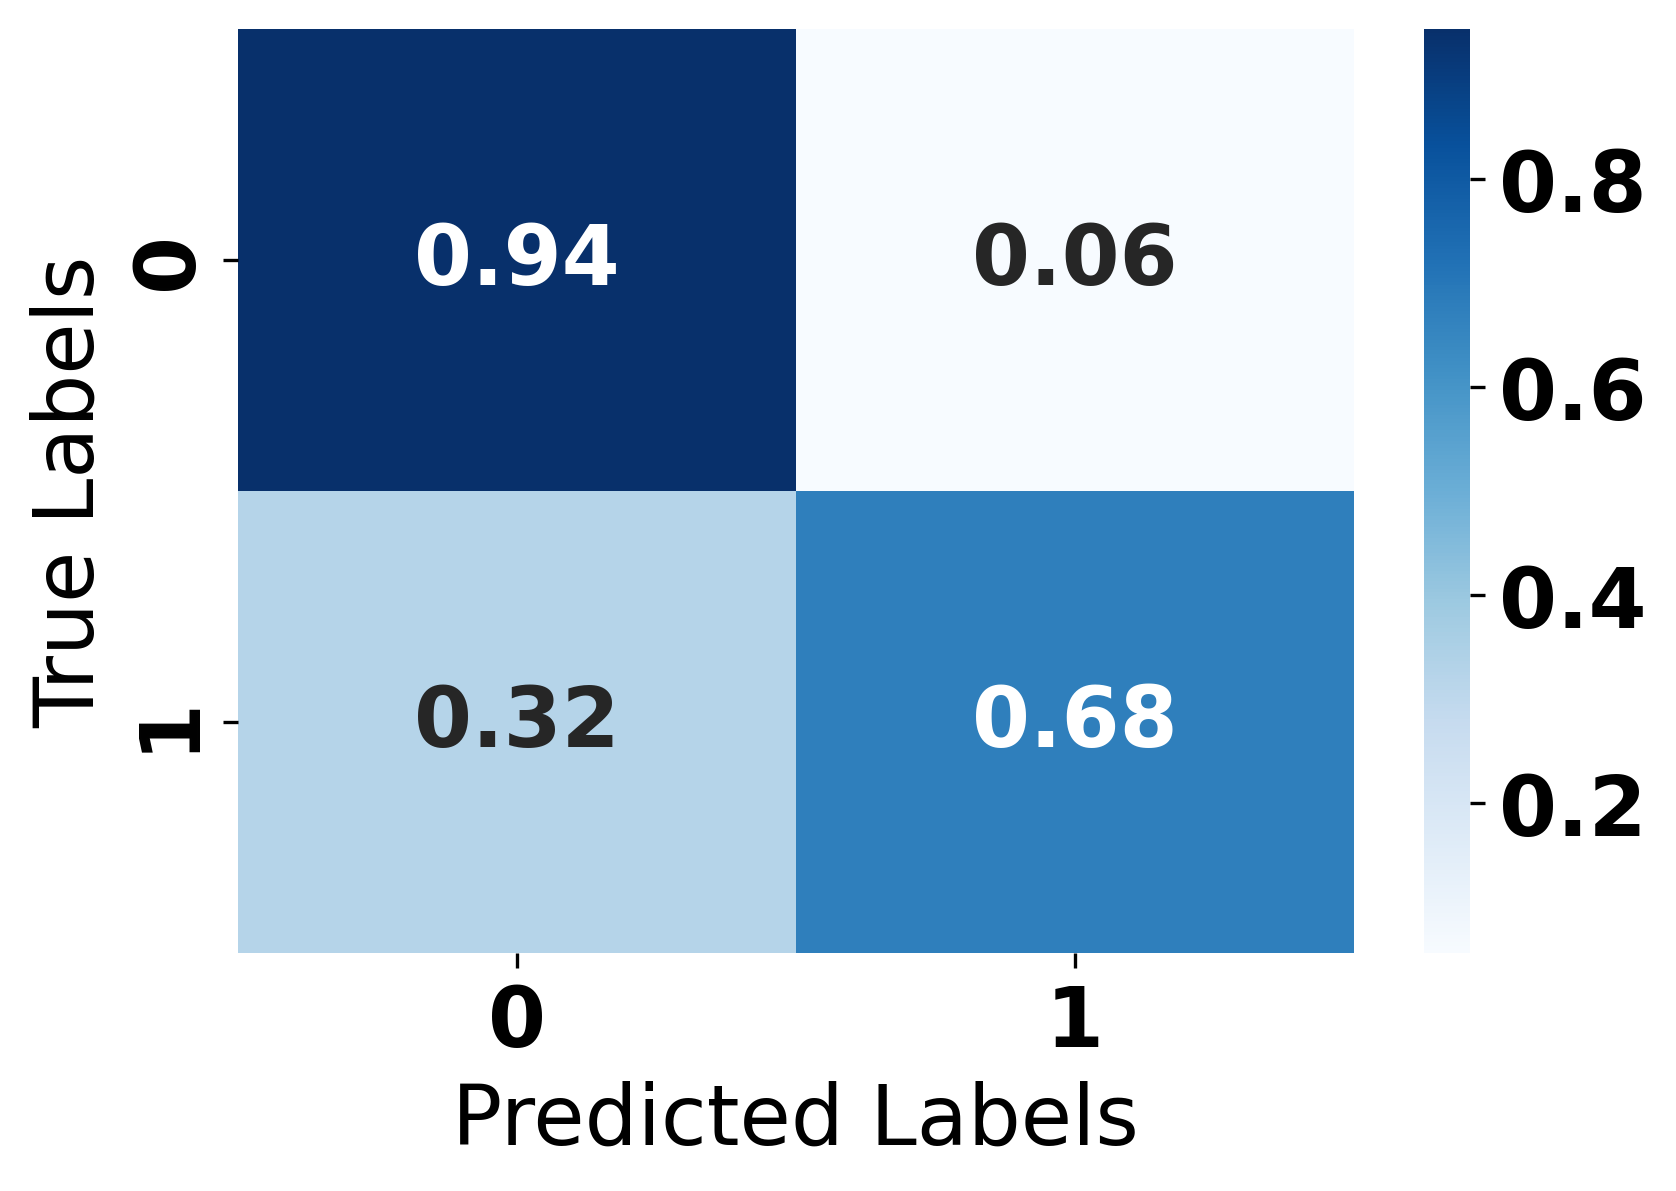

In [ ]:
# Predict probabilities on test data
y_pred_prob = model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.74, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
model.save('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/CNN.h5')
"""

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
CNN = load_model('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/CNN.h5')

In [ ]:
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model

# Define the input shape based on your data
input_shape = (x_train.shape[1],)  # Assuming your input data is 1D

def ANN_model(input_shape):
    input_layer = Input(shape=input_shape)

    # Add fully connected layers with increasing complexity
    dense1 = Dense(1024, activation='relu')(input_layer)
    dense1 = BatchNormalization()(dense1)
    dense1 = Dropout(0.5)(dense1)  # Adding dropout for regularization

    dense2 = Dense(512, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)
    dense2 = Dropout(0.5)(dense2)

    dense3 = Dense(256, activation='relu')(dense2)
    dense3 = BatchNormalization()(dense3)
    dense3 = Dropout(0.5)(dense3)

    dense4 = Dense(128, activation='relu')(dense3)
    dense4 = BatchNormalization()(dense4)
    dense4 = Dropout(0.5)(dense4)

    dense5 = Dense(64, activation='relu')(dense4)
    dense5 = BatchNormalization()(dense5)

    output = Dense(1, activation='sigmoid')(dense5)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Create the even more complex ANN model
ANN_model = ANN_model(input_shape)

# Compile the model
ANN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the even more complex ANN model
ANN_model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the even more complex ANN model
loss, accuracy = ANN_model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/20
186/186 [==============================] - 12s 45ms/step - loss: 0.4872 - accuracy: 0.7693 - val_loss: 0.0998 - val_accuracy: 0.9688
Epoch 2/20
186/186 [==============================] - 8s 41ms/step - loss: 0.3716 - accuracy: 0.8401 - val_loss: 0.1639 - val_accuracy: 0.9493
Epoch 3/20
186/186 [==============================] - 8s 42ms/step - loss: 0.3563 - accuracy: 0.8439 - val_loss: 0.2111 - val_accuracy: 0.9366
Epoch 4/20
186/186 [==============================] - 9s 50ms/step - loss: 0.3420 - accuracy: 0.8511 - val_loss: 0.3853 - val_accuracy: 0.8546
Epoch 5/20
186/186 [==============================] - 11s 59ms/step - loss: 0.3358 - accuracy: 0.8541 - val_loss: 0.3684 - val_accuracy: 0.8480
Epoch 6/20
186/186 [==============================] - 12s 63ms/step - loss: 0.3343 - accuracy: 0.8532 - val_loss: 0.2032 - val_accuracy: 0.9249
Epoch 7/20
186/186 [==============================] - 9s 47ms/step - loss: 0.3264 - accuracy: 0.8588 - val_loss: 0.4077 - val_accuracy: 0.8

389/389 [==============================] - 2s 4ms/step
Normalized Confusion Matrix:
[[0.92995885 0.07004115]
 [0.33210332 0.66789668]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.93      0.96     12150
     Class 1       0.18      0.67      0.28       271

    accuracy                           0.92     12421
   macro avg       0.58      0.80      0.62     12421
weighted avg       0.97      0.92      0.95     12421



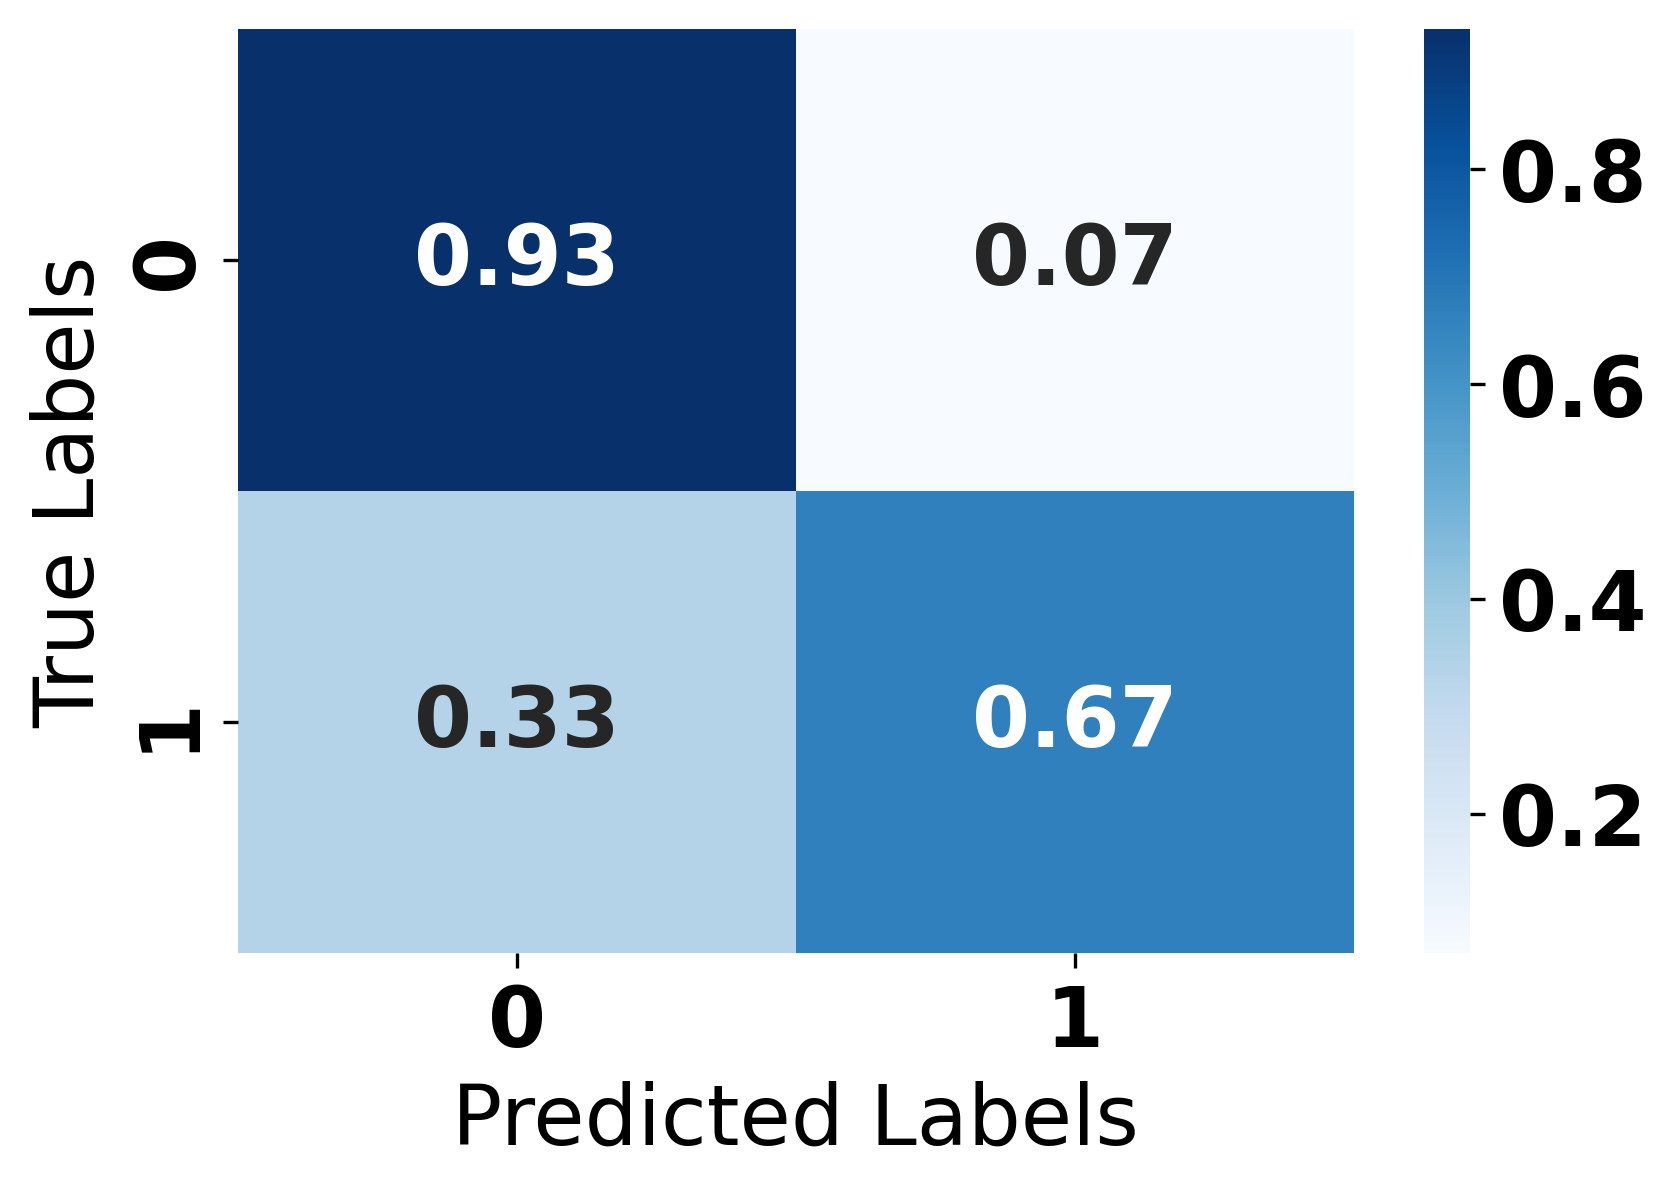

In [ ]:
# Predict probabilities on test data
y_pred_prob = ANN_model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.58
y_pred = np.where(y_pred_prob > 0.58, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.58)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
ANN_model.save('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/ANN(Base).h5')
"""

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
ANN_model = load_model('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/ANN(Base).h5')

In [ ]:
import time
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

# Define the input shape based on your data
input_shape = (x_train.shape[1],)  # Assuming your input data is 1D

def dual-path_ANN(input_shape):
    input_layer = Input(shape=input_shape)

    # Add fully connected layers with increasing complexity
    dense1 = Dense(256, activation='relu')(input_layer)
    dense1 = BatchNormalization()(dense1)
    dense1 = Dropout(0.5)(dense1)  # Adding dropout for regularization

    dense2 = Dense(128, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)
    dense2 = Dropout(0.5)(dense2)

    # Introduce a parallel branch with a different activation function
    dense2_alt = Dense(128, activation='selu')(dense1)
    dense2_alt = BatchNormalization()(dense2_alt)
    dense2_alt = Dropout(0.5)(dense2_alt)

    # Concatenate outputs from the main and parallel branches
    concatenated = Concatenate()([dense2, dense2_alt])

    dense3 = Dense(64, activation='relu')(concatenated)
    dense3 = BatchNormalization()(dense3)

    output = Dense(1, activation='sigmoid')(dense3)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Record the start time before defining the model
start_time = time.time()

# Create the novel ANN model
dual-path_ANN = dual-path_ANN(input_shape)

# Compile the model
dual-path_ANN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Record the end time after compiling the model
end_time = time.time()

# Calculate compilation time
compilation_time = end_time - start_time
print(f"Compilation time: {compilation_time} seconds")

# Train the novel ANN model
dual-path_ANN.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the novel ANN model
loss, accuracy = dual-path_ANN.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Compilation time: 0.24889612197875977 seconds
Epoch 1/20
186/186 [==============================] - 9s 23ms/step - loss: 0.4719 - accuracy: 0.7819 - val_loss: 0.0843 - val_accuracy: 0.9727
Epoch 2/20
186/186 [==============================] - 3s 18ms/step - loss: 0.3740 - accuracy: 0.8370 - val_loss: 0.1668 - val_accuracy: 0.9453
Epoch 3/20
186/186 [==============================] - 3s 15ms/step - loss: 0.3556 - accuracy: 0.8451 - val_loss: 0.3419 - val_accuracy: 0.8836
Epoch 4/20
186/186 [==============================] - 2s 11ms/step - loss: 0.3474 - accuracy: 0.8501 - val_loss: 0.2844 - val_accuracy: 0.9042
Epoch 5/20
186/186 [==============================] - 2s 9ms/step - loss: 0.3388 - accuracy: 0.8539 - val_loss: 0.4969 - val_accuracy: 0.7632
Epoch 6/20
186/186 [==============================] - 2s 9ms/step - loss: 0.3385 - accuracy: 0.8527 - val_loss: 0.3941 - val_accuracy: 0.8342
Epoch 7/20
186/186 [==============================] - 2s 9ms/step - loss: 0.3323 - accuracy: 0.857

In [ ]:
"""
# Save the model to a file
dual-path_ANN.save('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/DP_ANN.h5')
"""

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
dual-path_ANN = load_model('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/DP_ANN.h5')

389/389 [==============================] - 1s 3ms/step
Time taken per instance for prediction: 0.0002167652736068319 seconds
Normalized Confusion Matrix:
[[0.79530864 0.20469136]
 [0.18819188 0.81180812]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.80      0.88     12150
     Class 1       0.08      0.81      0.15       271

    accuracy                           0.80     12421
   macro avg       0.54      0.80      0.52     12421
weighted avg       0.97      0.80      0.87     12421



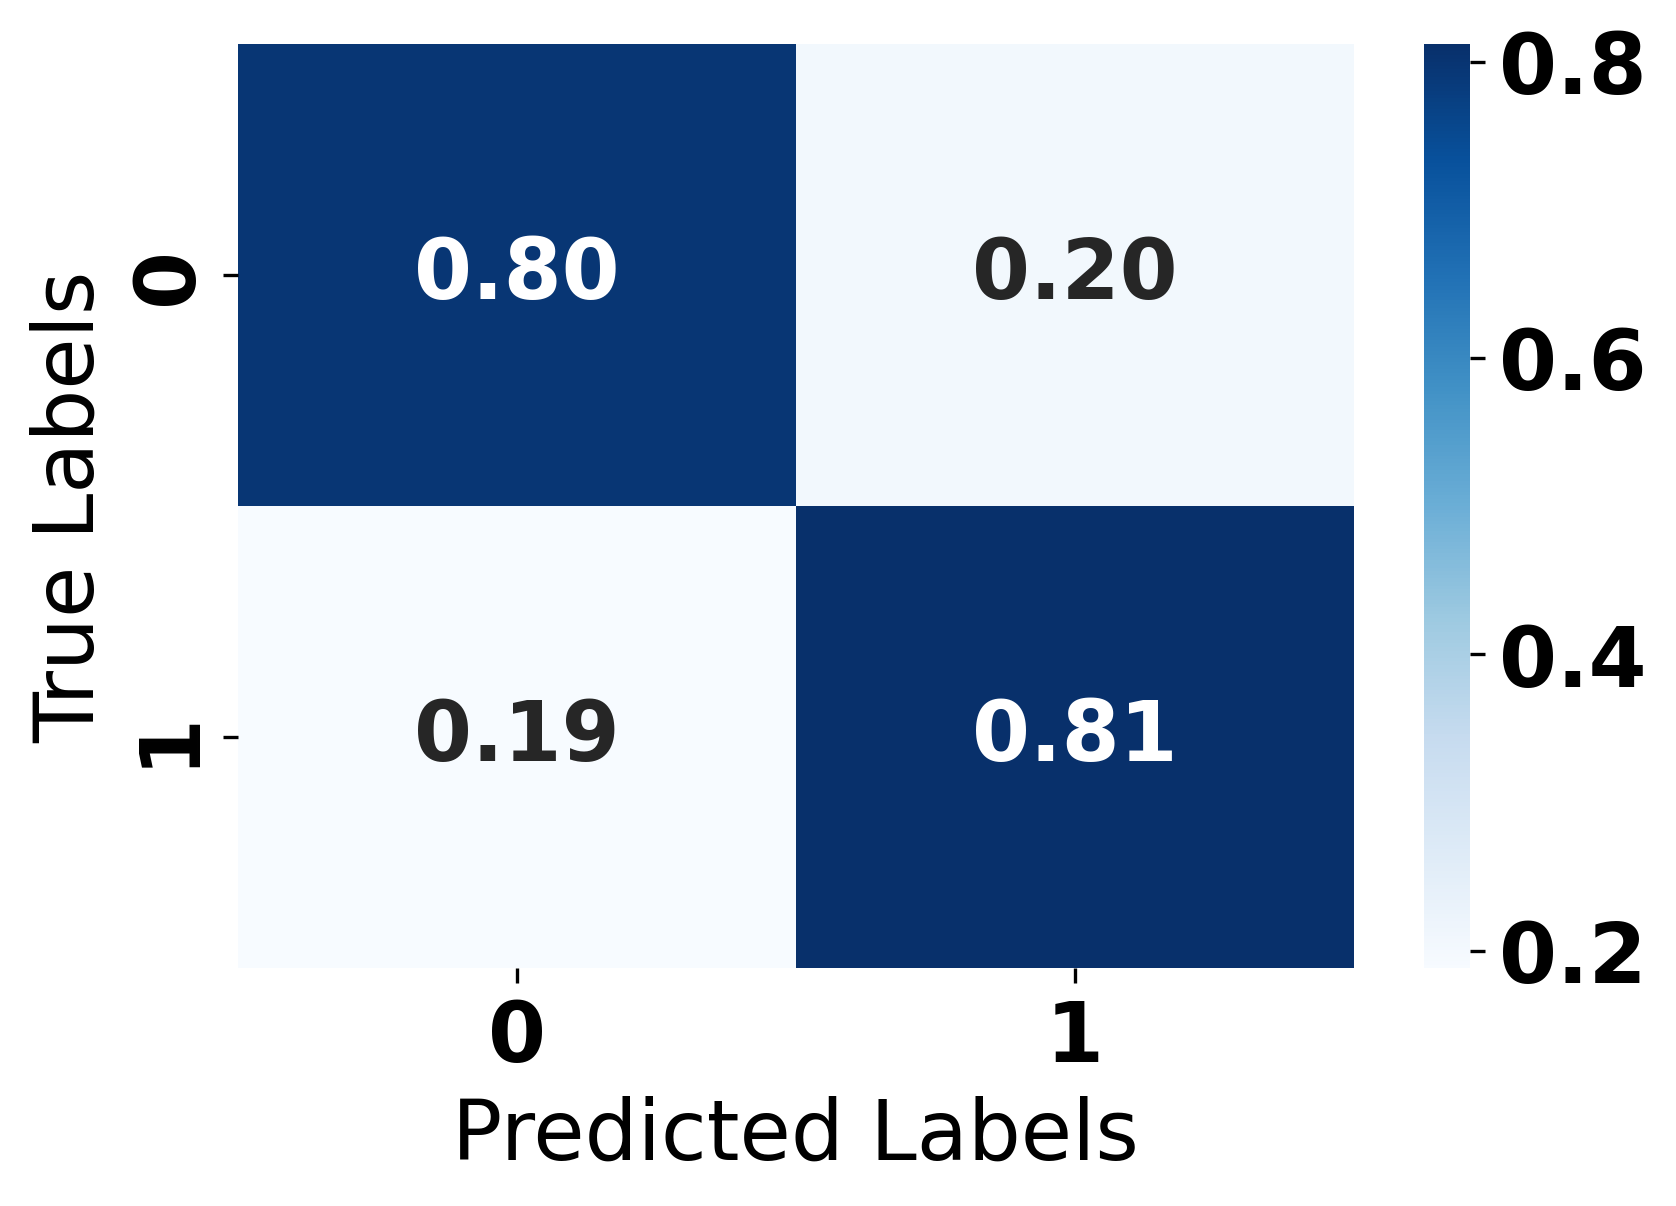

In [ ]:
import time
from sklearn.metrics import confusion_matrix, classification_report

# Predict probabilities on test data
start_time = time.time()
y_pred_prob = dual-path_ANN.predict(x_test)
end_time = time.time()

# Calculate time taken per instance for prediction
time_per_instance = (end_time - start_time) / len(x_test)
print("Time taken per instance for prediction:", time_per_instance, "seconds")

# Convert probabilities to class labels using a threshold of 0.56
y_pred = np.where(y_pred_prob > 0.627, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.56)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
ANN_model.save('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/ANN(Base).h5')
"""

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
ANN_model = load_model('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/ANN(Base).h5')

### Attention ANN

In [ ]:
import time
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout, Multiply, Add
from tensorflow.keras.models import Model

# Define the input shape based on your data
input_shape = (x_train.shape[1],)  # Assuming your input data is 1D

def attention_layer(inputs):
    # Attention mechanism: compute attention scores and multiply by input
    dense_attention = Dense(inputs.shape[1], activation='softmax')(inputs)
    attention_mul = Multiply()([inputs, dense_attention])
    return attention_mul

def create_complex_attention_ann_model(input_shape):
    input_layer = Input(shape=input_shape)

    # Layer 1
    dense1 = Dense(2048, activation='relu')(input_layer)
    dense1 = BatchNormalization()(dense1)
    dense1 = Dropout(0.5)(dense1)

    # Layer 2
    dense2 = Dense(1024, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)
    dense2 = Dropout(0.5)(dense2)

    # Residual connection: Match the dimensions
    residual1 = Dense(512, activation='relu')(dense1)
    residual1 = BatchNormalization()(residual1)
    residual1 = Dropout(0.5)(residual1)

    dense3 = Dense(512, activation='relu')(dense2)
    dense3 = BatchNormalization()(dense3)
    dense3 = Dropout(0.5)(dense3)
    residual1 = Add()([dense3, residual1])

    # Layer 4
    dense4 = Dense(256, activation='relu')(residual1)
    dense4 = BatchNormalization()(dense4)
    dense4 = Dropout(0.5)(dense4)

    # Layer 5 with residual connection
    residual2 = Dense(128, activation='relu')(dense4)
    residual2 = BatchNormalization()(residual2)
    residual2 = Dropout(0.5)(residual2)

    dense5 = Dense(128, activation='relu')(dense4)
    dense5 = BatchNormalization()(dense5)
    dense5 = Dropout(0.5)(dense5)
    residual2 = Add()([dense5, residual2])

    # Layer 6
    dense6 = Dense(64, activation='relu')(residual2)
    dense6 = BatchNormalization()(dense6)

    # Add first attention layer
    attention_output1 = attention_layer(dense6)

    # Layer 7
    dense7 = Dense(32, activation='relu')(attention_output1)
    dense7 = BatchNormalization()(dense7)
    dense7 = Dropout(0.5)(dense7)

    # Add second attention layer
    attention_output2 = attention_layer(dense7)

    # Output layer
    output = Dense(1, activation='sigmoid')(attention_output2)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Create the complex attention ANN model
complex_attention_ann_model = create_complex_attention_ann_model(input_shape)

# Compile the model
complex_attention_ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Measure the training time
start_time = time.time()

# Train the complex attention ANN model
complex_attention_ann_model.fit(x_train, y_train, epochs=10, batch_size=512, validation_data=(x_test, y_test))

end_time = time.time()
training_time = end_time - start_time

print("Training Time:", training_time)

# Measure the test time
start_time = time.time()

# Evaluate the complex attention ANN model
loss, accuracy = complex_attention_ann_model.evaluate(x_test, y_test)

end_time = time.time()
test_time = end_time - start_time

print("Test Time:", test_time)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 34s 274ms/step - accuracy: 0.5279 - loss: 0.6935 - val_accuracy: 0.9782 - val_loss: 0.6848
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.6295 - loss: 0.6776 - val_accuracy: 0.9782 - val_loss: 0.6848
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7681 - loss: 0.6094 - val_accuracy: 0.8636 - val_loss: 0.5228
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7871 - loss: 0.5209 - val_accuracy: 0.9693 - val_loss: 0.2995
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7909 - loss: 0.4564 - val_accuracy: 0.9527 - val_loss: 0.4337
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7978 - loss: 0.4229 - val_accuracy: 0.9591 - val_loss: 0.2915
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8123 - loss: 0.3919 - val_accuracy: 0.9661 - val_loss: 0.2193
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8217 - loss: 0.3757 - val_accuracy: 0.9475 - val_

389/389 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Normalized Confusion Matrix:
[[0.95621399 0.04378601]
 [0.36162362 0.63837638]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.96      0.97     12150
     Class 1       0.25      0.64      0.35       271

    accuracy                           0.95     12421
   macro avg       0.62      0.80      0.66     12421
weighted avg       0.98      0.95      0.96     12421



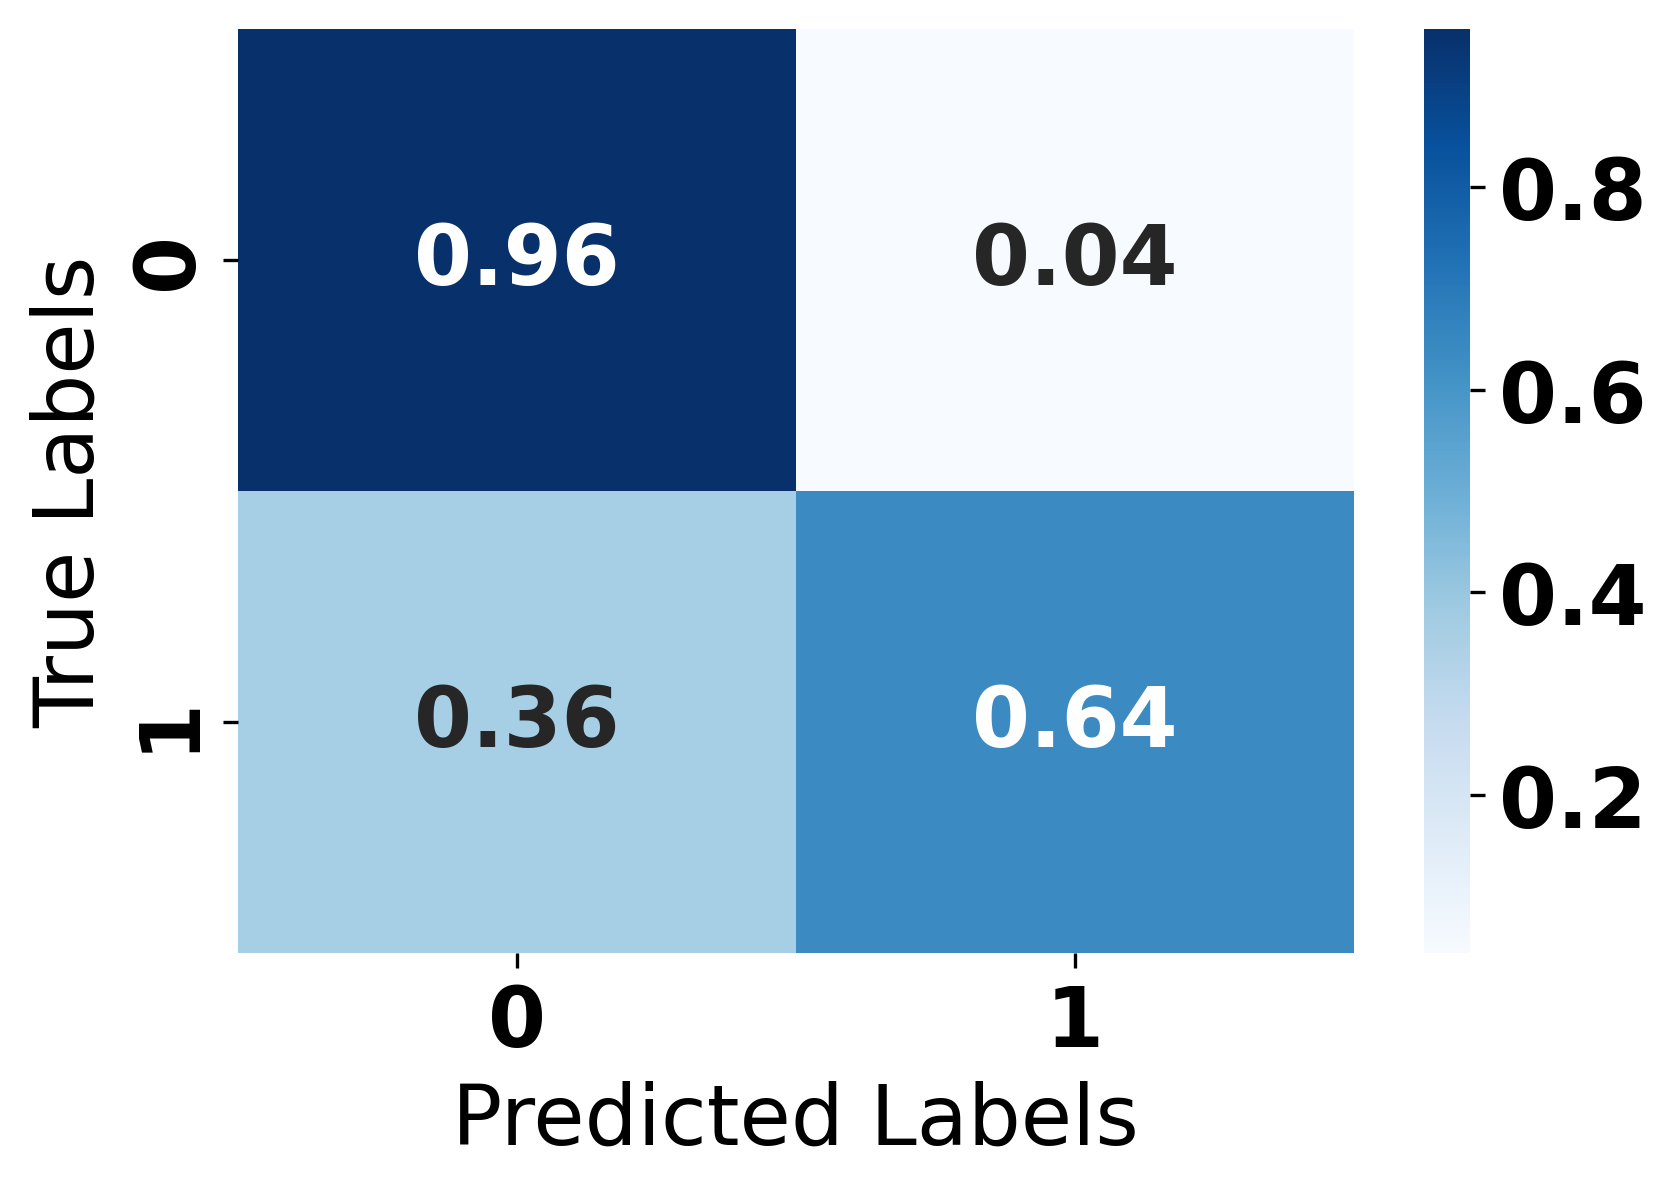

In [ ]:
# Predict probabilities on test data
y_pred_prob = complex_attention_ann_model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
complex_attention_ann_model.save('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/ANN-attention.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
AttentionANN = load_model('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/ANN-attention.h5')

In [ ]:
# Assuming grownet_tabular_model is your trained model
complex_attention_ann_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 27)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 2048)           │         57,344 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 2048)           │          8,192 │ dense[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 2048)           │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 1024)           │      2,098,176 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 1024)           │          4,096 │ dense_1[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 1024)           │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 512)            │        524,800 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 512)            │      1,049,088 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 512)            │          2,048 │ dense_3[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 512)            │          2,048 │ dense_2[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 512)            │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 512)            │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 512)            │              0 │ dropout_3[0][0],       │
│                           │                        │                │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 256)            │        131,328 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 256)            │          1,024 │ dense_4[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)  

 Total params: 11,863,973 (45.26 MB)

 Trainable params: 3,951,521 (15.07 MB)

 Non-trainable params: 9,408 (36.75 KB)

 Optimizer params: 7,903,044 (30.15 MB)

### Attention CNN

In [ ]:
import time
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Add, Multiply, GlobalAveragePooling1D, Reshape

# Define the input shape based on your data
input_shape = (x_train.shape[1], 1)  # Assuming your input data is 2D

# Input layer
input_layer = Input(shape=input_shape)

# First convolutional block
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# Second convolutional block with residual connection
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(pool1)
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2)

# Residual connection
residual1 = Conv1D(filters=64, kernel_size=1, activation='relu', padding='same')(pool1)
residual1 = Add()([residual1, conv2])
pool2 = MaxPooling1D(pool_size=2)(residual1)

# Attention mechanism
def attention_layer(inputs):
    # Global Average Pooling
    gap = GlobalAveragePooling1D()(inputs)
    # Reshape to match input shape
    gap = Reshape((1, inputs.shape[-1]))(gap)
    # Dense layer with sigmoid activation for attention weights
    attention_weights = Dense(inputs.shape[-1], activation='sigmoid')(gap)
    # Multiply the inputs by the attention weights
    attention_output = Multiply()([inputs, attention_weights])
    return attention_output

attention_output = attention_layer(pool2)

# Flatten layer
flatten = Flatten()(attention_output)

# Dense layers
dense1 = Dense(128, activation='relu')(flatten)
dense2 = Dense(64, activation='relu')(dense1)

# Output layer
output = Dense(1, activation='sigmoid')(dense2)

# Create the model
model = Model(inputs=input_layer, outputs=output)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Measure the training time
start_time = time.time()

# Train the model
model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

end_time = time.time()
training_time = end_time - start_time

print("Training Time:", training_time)

# Measure the test time
start_time = time.time()

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)

end_time = time.time()
test_time = end_time - start_time

print("Test Time:", test_time)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.6537 - loss: 0.6339 - val_accuracy: 0.9061 - val_loss: 0.2536
Epoch 2/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8287 - loss: 0.3840 - val_accuracy: 0.8680 - val_loss: 0.3408
Epoch 3/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8410 - loss: 0.3632 - val_accuracy: 0.8689 - val_loss: 0.3248
Epoch 4/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8570 - loss: 0.3317 - val_accuracy: 0.8083 - val_loss: 0.4120
Epoch 5/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8572 - loss: 0.3261 - val_accuracy: 0.8812 - val_loss: 0.3042
Epoch 6/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8611 - loss: 0.3156 - val_accuracy: 0.8815 - val_loss: 0.2930
Epoch 7/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8710 - loss: 0.3027 - val_accuracy: 0.9038 - val_loss: 0.2548
Epoch 8/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8781 - loss: 0.2915 - val_accuracy: 

389/389 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Normalized Confusion Matrix:
[[0.93917695 0.06082305]
 [0.40221402 0.59778598]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.94      0.96     12150
     Class 1       0.18      0.60      0.28       271

    accuracy                           0.93     12421
   macro avg       0.59      0.77      0.62     12421
weighted avg       0.97      0.93      0.95     12421



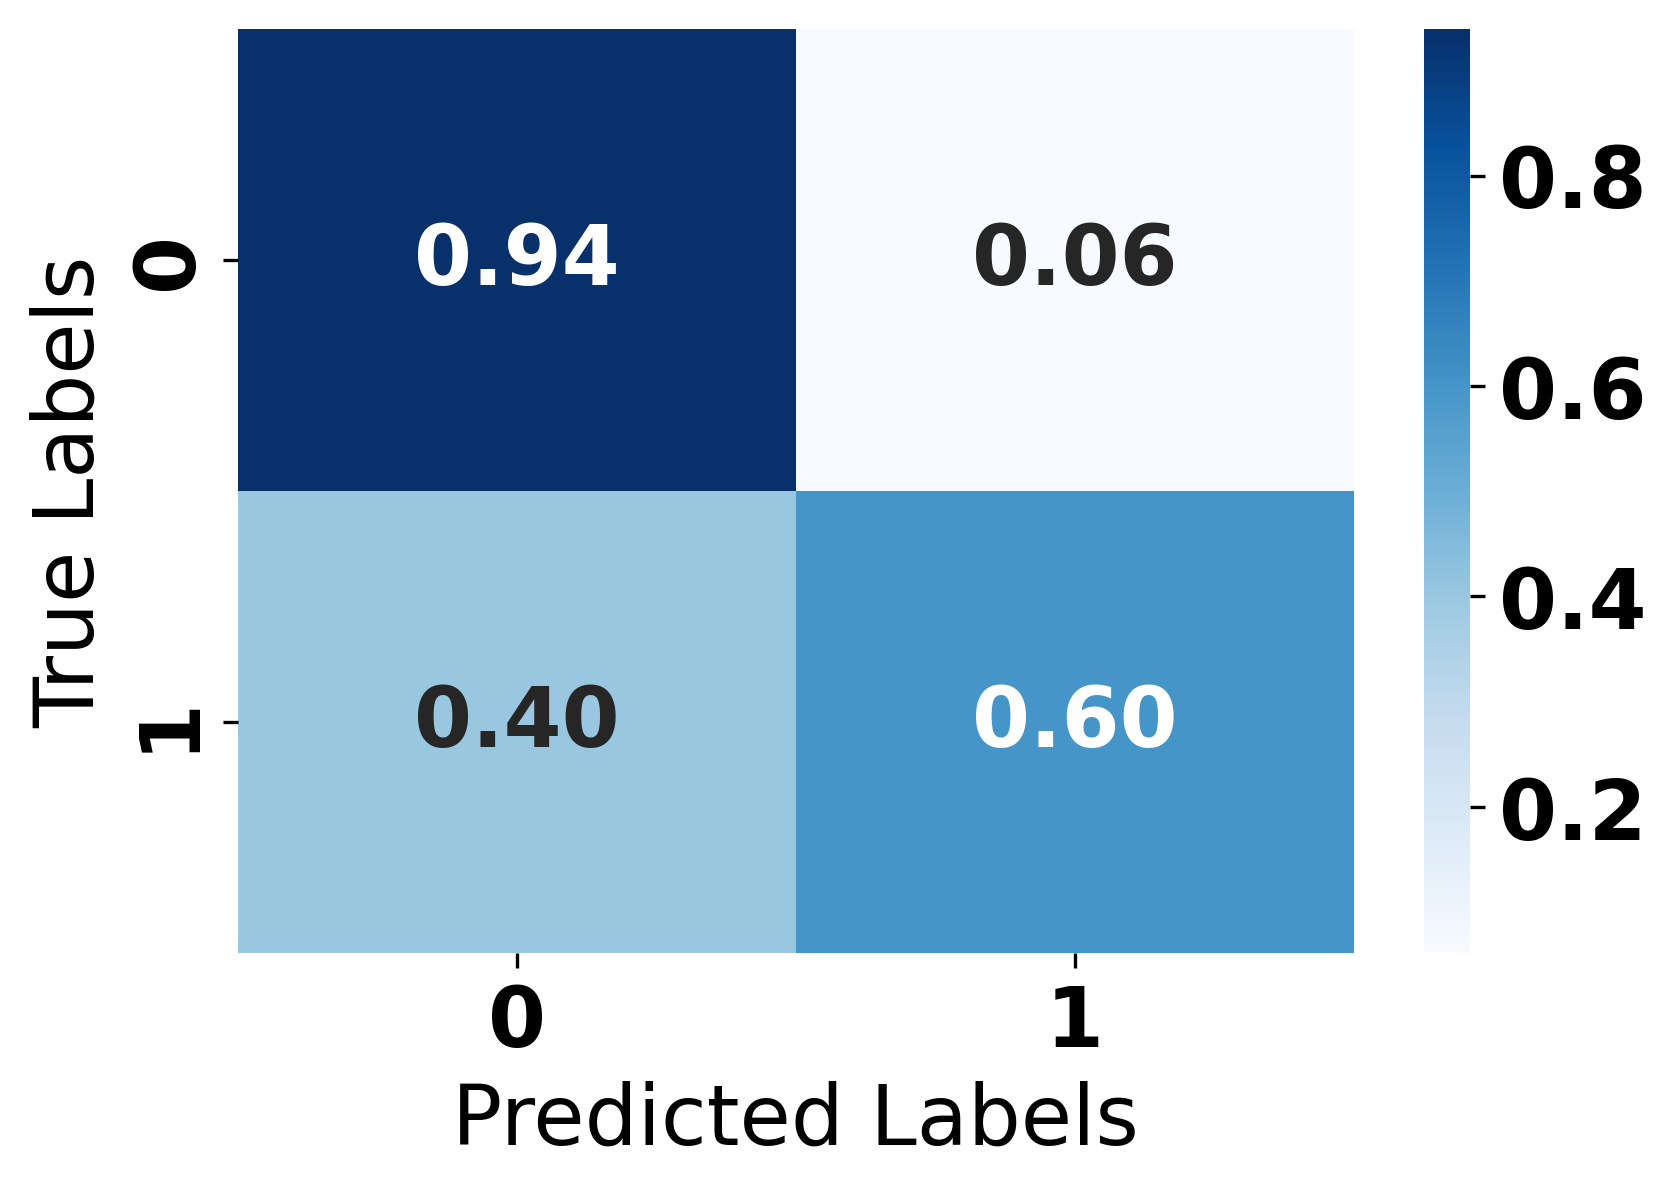

In [ ]:
# Predict probabilities on test data
y_pred_prob = model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
model.save('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/CNN-attention.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
AttentionCNN = load_model('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/CNN-attention.h5')

In [ ]:
# Assuming grownet_tabular_model is your trained model
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 27, 1)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 27, 32)         │            128 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d             │ (None, 13, 32)         │              0 │ conv1d[0][0]           │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 13, 64)         │          6,208 │ max_pooling1d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_3 (Conv1D)         │ (None, 13, 64)         │          2,112 │ max_pooling1d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_2 (Conv1D)         │ (None, 13, 64)         │         12,352 │ conv1d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_2 (Add)               │ (None, 13, 64)         │              0 │ conv1d_3[0][0],        │
│                           │                        │                │ conv1d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_1           │ (None, 6, 64)          │              0 │ add_2[0][0]            │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d  │ (None, 64)             │              0 │ max_pooling1d_1[0][0]  │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape (Reshape)         │ (None, 1, 64)          │              0 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_12 (Dense)          │ (None, 1, 64)          │          4,160 │ reshape[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multiply_2 (Multiply)     │ (None, 6, 64)          │              0 │ max_pooling1d_1[0][0], │
│                           │                        │                │ dense_12[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 384)            │              0 │ multiply_2[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_13 (Dense)          │ (None, 128)            │         49,280 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_14 (Dense)          │ (None, 64)             │          8,256 │ dense_13[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_15 (Dense)          │ (None, 1)              │             65 │ dense_14[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 247,685 (967.52 KB)

 Trainable params: 82,561 (322.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 165,124 (645.02 KB)

### Transformer

In [ ]:
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, Embedding, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import time

# Define the input shape based on your data
input_shape = (x_train.shape[1],)  # Assuming your input data is 1D

def create_simple_transformer_model(input_shape, vocab_size, embed_dim, ff_dim):
    # Input layer
    inputs = Input(shape=input_shape)

    # Embedding layer
    x = Embedding(input_dim=vocab_size, output_dim=embed_dim, input_length=input_shape[0])(inputs)

    # Feed-forward network
    x = Dense(ff_dim, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = LayerNormalization(epsilon=1e-6)(x)

    # Another feed-forward layer
    x = Dense(ff_dim // 2, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = LayerNormalization(epsilon=1e-6)(x)

    # Global average pooling
    x = GlobalAveragePooling1D()(x)

    # Dense layers
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(64, activation='relu')(x)

    # Output layer
    outputs = Dense(1, activation='sigmoid')(x)

    # Create the model
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Define model parameters
vocab_size = 20000  # This should be set according to your dataset
embed_dim = 128  # Embedding size for each token
ff_dim = 128  # Hidden layer size in the feed-forward network

# Create the Transformer model
simple_transformer_model = create_simple_transformer_model(input_shape, vocab_size, embed_dim, ff_dim)

# Compile the model
simple_transformer_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])

# Measure the training time
start_time = time.time()

# Train the Transformer model
simple_transformer_model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

end_time = time.time()
training_time = end_time - start_time

print("Training Time:", training_time)

# Measure the test time
start_time = time.time()

# Evaluate the Transformer model
loss, accuracy = simple_transformer_model.evaluate(x_test, y_test)

end_time = time.time()
test_time = end_time - start_time

print("Test Time:", test_time)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


186/186 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.6570 - loss: 0.6223 - val_accuracy: 0.8019 - val_loss: 0.4374
Epoch 2/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7486 - loss: 0.5260 - val_accuracy: 0.8137 - val_loss: 0.3962
Epoch 3/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7598 - loss: 0.5131 - val_accuracy: 0.7823 - val_loss: 0.4310
Epoch 4/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7543 - loss: 0.5177 - val_accuracy: 0.7530 - val_loss: 0.4803
Epoch 5/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7636 - loss: 0.5111 - val_accuracy: 0.7754 - val_loss: 0.4361
Epoch 6/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7540 - loss: 0.5155 - val_accuracy: 0.7880 - val_loss: 0.4175
Epoch 7/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7592 - loss: 0.5135 - val_accuracy: 0.7619 - val_loss: 0.4537
Epoch 8/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7631 - loss: 0.5054 - val_accuracy: 0.7440 - va

389/389 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Normalized Confusion Matrix:
[[0.72485597 0.27514403]
 [0.22878229 0.77121771]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.72      0.84     12150
     Class 1       0.06      0.77      0.11       271

    accuracy                           0.73     12421
   macro avg       0.53      0.75      0.47     12421
weighted avg       0.97      0.73      0.82     12421



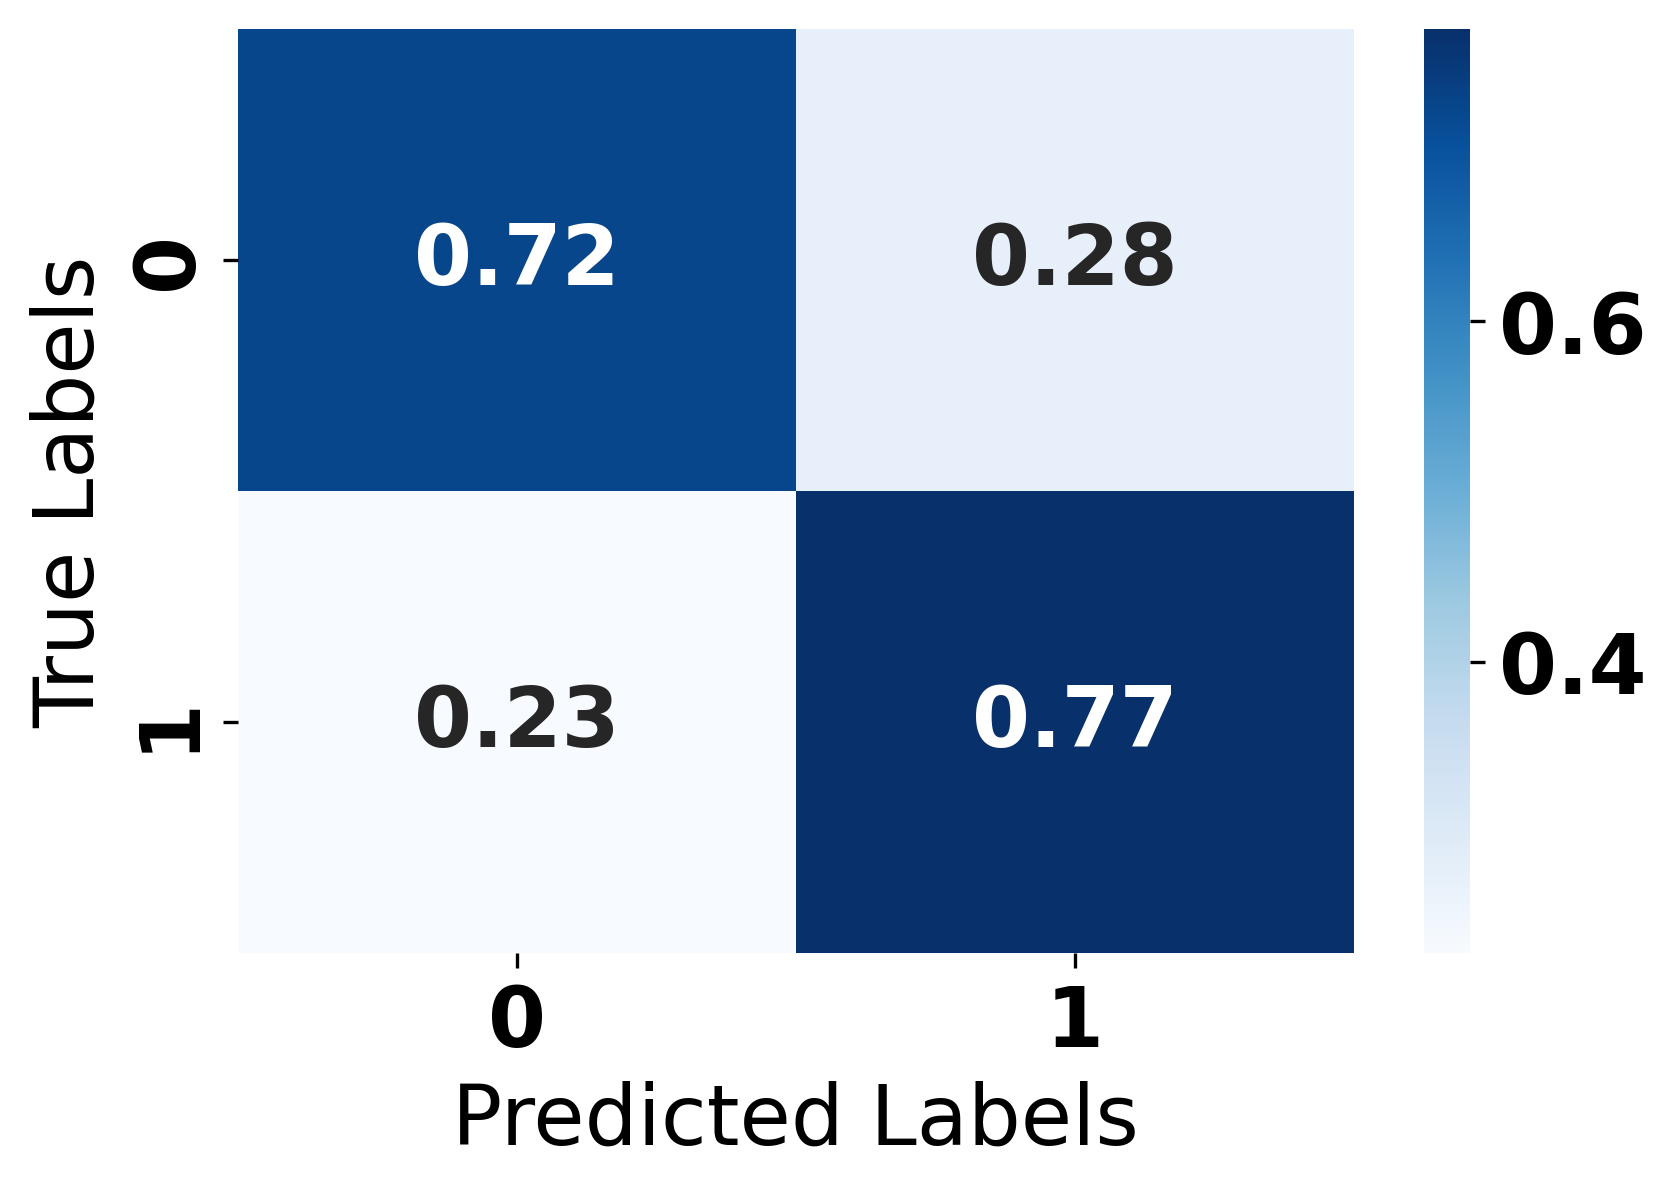

In [ ]:
# Predict probabilities on test data
y_pred_prob = simple_transformer_model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
simple_transformer_model.save('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/transformer_model.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
transformer_model = load_model('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/transformer_model.h5')

In [ ]:
# Assuming grownet_tabular_model is your trained model
simple_transformer_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 27)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 27, 128)             │       2,560,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 27, 128)             │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 27, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization                  │ (None, 27, 128)             │             256 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 27, 64)              │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 27, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_1                │ (None, 27, 64)              │             128 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_1           │ (None, 64)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,805,381 (29.78 MB)

 Trainable params: 2,601,793 (9.93 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,203,588 (19.85 MB)

### Dual-Path ANN

In [ ]:
import time
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

# Define the input shape based on your data
input_shape = (x_train.shape[1],)  # Assuming your input data is 1D

def dual-path_ANN(input_shape):
    input_layer = Input(shape=input_shape)

    # Add fully connected layers with increasing complexity
    dense1 = Dense(256, activation='relu')(input_layer)
    dense1 = BatchNormalization()(dense1)
    dense1 = Dropout(0.5)(dense1)  # Adding dropout for regularization

    dense2 = Dense(128, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)
    dense2 = Dropout(0.5)(dense2)

    # Introduce a parallel branch with a different activation function
    dense2_alt = Dense(128, activation='selu')(dense1)
    dense2_alt = BatchNormalization()(dense2_alt)
    dense2_alt = Dropout(0.5)(dense2_alt)

    # Concatenate outputs from the main and parallel branches
    concatenated = Concatenate()([dense2, dense2_alt])

    dense3 = Dense(64, activation='relu')(concatenated)
    dense3 = BatchNormalization()(dense3)

    output = Dense(1, activation='sigmoid')(dense3)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Record the start time before defining the model
start_time = time.time()

# Create the novel ANN model
dual-path_ANN = dual-path_ANN(input_shape)

# Compile the model
dual-path_ANN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Record the end time after compiling the model
end_time = time.time()

# Calculate compilation time
compilation_time = end_time - start_time
print(f"Compilation time: {compilation_time} seconds")

# Train the novel ANN model
dual-path_ANN.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the novel ANN model
loss, accuracy = dual-path_ANN.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Compilation time: 0.24889612197875977 seconds
Epoch 1/20
186/186 [==============================] - 9s 23ms/step - loss: 0.4719 - accuracy: 0.7819 - val_loss: 0.0843 - val_accuracy: 0.9727
Epoch 2/20
186/186 [==============================] - 3s 18ms/step - loss: 0.3740 - accuracy: 0.8370 - val_loss: 0.1668 - val_accuracy: 0.9453
Epoch 3/20
186/186 [==============================] - 3s 15ms/step - loss: 0.3556 - accuracy: 0.8451 - val_loss: 0.3419 - val_accuracy: 0.8836
Epoch 4/20
186/186 [==============================] - 2s 11ms/step - loss: 0.3474 - accuracy: 0.8501 - val_loss: 0.2844 - val_accuracy: 0.9042
Epoch 5/20
186/186 [==============================] - 2s 9ms/step - loss: 0.3388 - accuracy: 0.8539 - val_loss: 0.4969 - val_accuracy: 0.7632
Epoch 6/20
186/186 [==============================] - 2s 9ms/step - loss: 0.3385 - accuracy: 0.8527 - val_loss: 0.3941 - val_accuracy: 0.8342
Epoch 7/20
186/186 [==============================] - 2s 9ms/step - loss: 0.3323 - accuracy: 0.857

In [ ]:
"""
# Save the model to a file
dual-path_ANN.save('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/DP_ANN.h5')
"""

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
DP_ANN = load_model('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/DP_ANN.h5')

389/389 [==============================] - 1s 3ms/step
Time taken per instance for prediction: 0.0002167652736068319 seconds
Normalized Confusion Matrix:
[[0.79530864 0.20469136]
 [0.18819188 0.81180812]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.80      0.88     12150
     Class 1       0.08      0.81      0.15       271

    accuracy                           0.80     12421
   macro avg       0.54      0.80      0.52     12421
weighted avg       0.97      0.80      0.87     12421



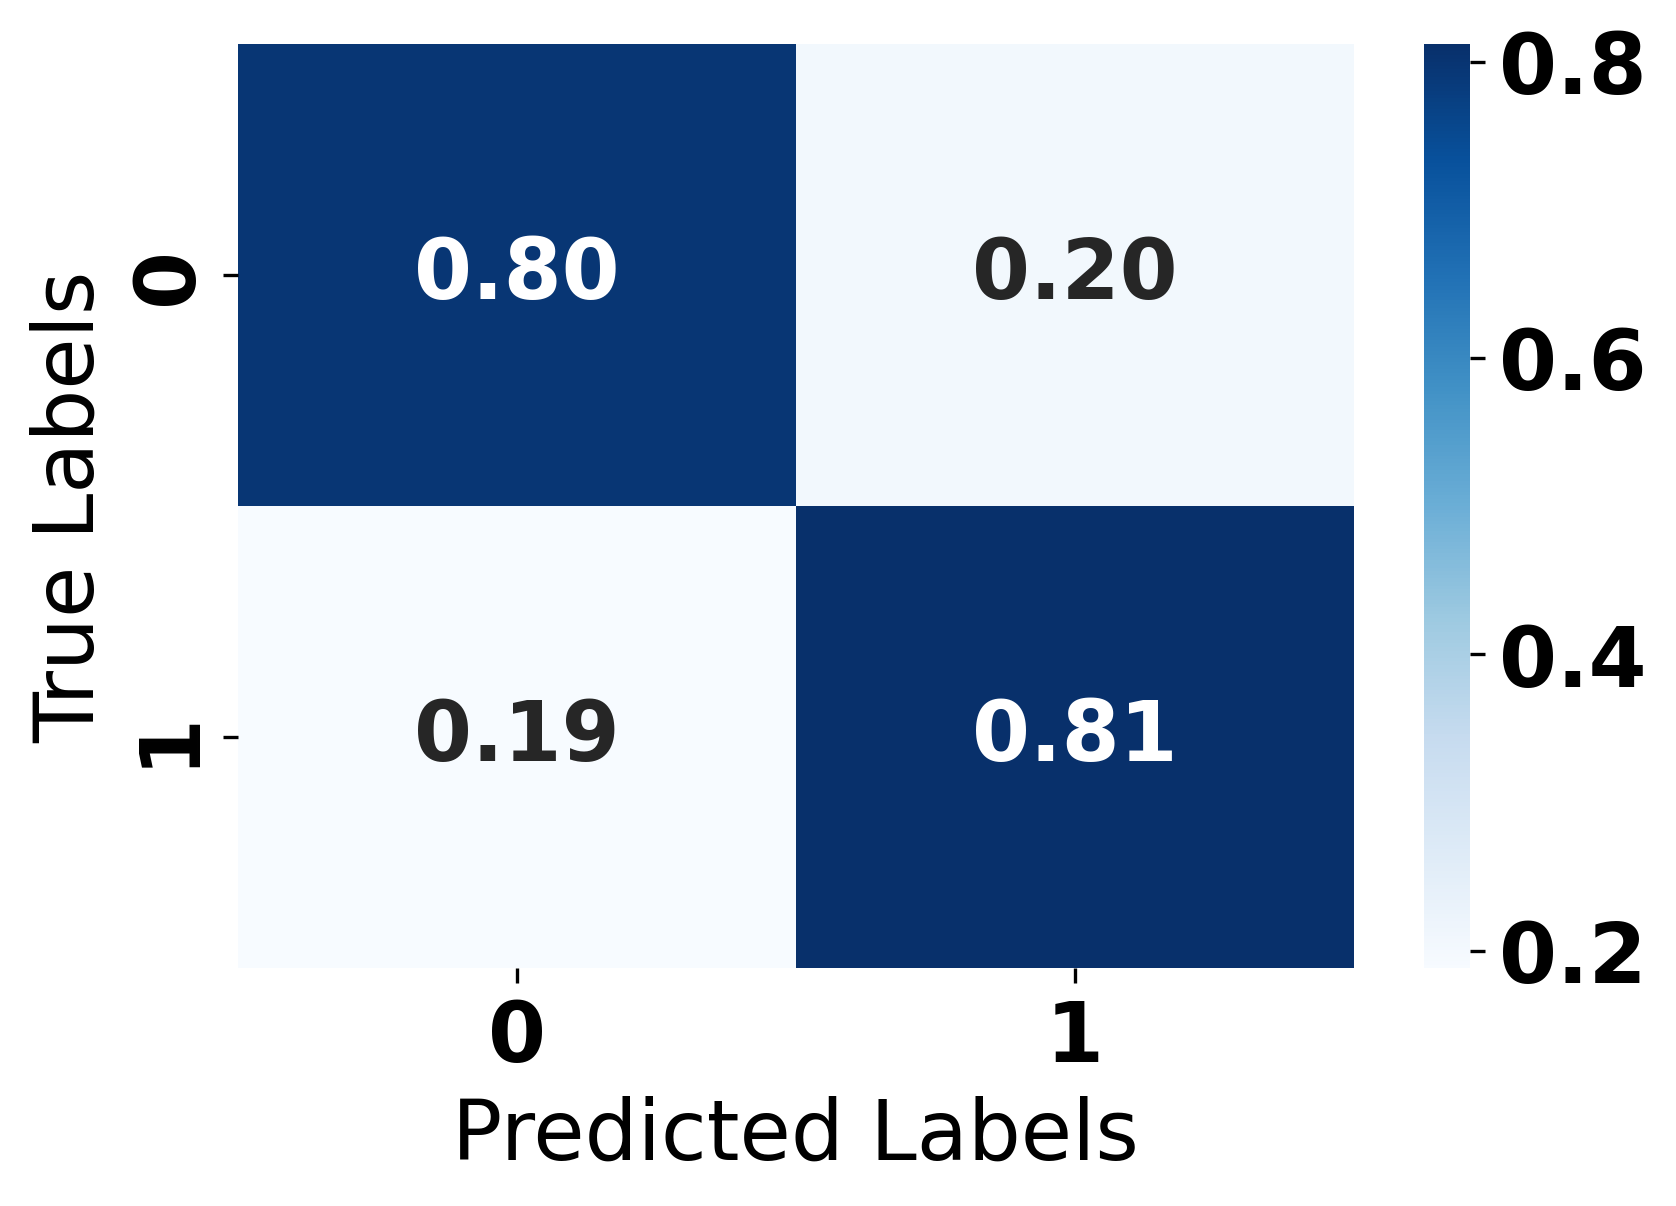

In [ ]:
import time
from sklearn.metrics import confusion_matrix, classification_report

# Predict probabilities on test data
start_time = time.time()
y_pred_prob = dual-path_ANN.predict(x_test)
end_time = time.time()

# Calculate time taken per instance for prediction
time_per_instance = (end_time - start_time) / len(x_test)
print("Time taken per instance for prediction:", time_per_instance, "seconds")

# Convert probabilities to class labels using a threshold of 0.56
y_pred = np.where(y_pred_prob > 0.627, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.56)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### NHIS 2021

In [ ]:
# Importing Dataset
NHIS2021 = pd.read_csv('/content/drive/MyDrive/Myocardial Infarction (MI)/Dataset/adult21.csv')

In [ ]:
NHIS2021.shape

(29482, 622)

In [ ]:
# Target label data count hueing class
class_counts = NHIS2021['MIEV_A'].value_counts()

print(class_counts)

MIEV_A
2    28378
1     1078
7       15
9       11
Name: count, dtype: int64


In [ ]:
NHIS2021 = NHIS2021[["MARITAL_A", "HOUTENURE_A", "AFVET_A", "HEIGHTTC_A", "HISPALLP_A", "SEX_A", "PCNTLT18TC", "MAXEDUCP_A", "RATCAT_A", "COPDEV_A", "CHDEV_A", "DEPEV_A", "DIBEV_A", "ARTHEV_A", "STREV_A", "ASEV_A", "CHLEV_A", "HYPEV_A", "PHSTAT_A", "BMICAT_A", "VISIONDF_A", "DIFF_A", "SOCERRNDS_A", "SHTFLU12M_A", "MIEV_A"]]

In [ ]:
# Count the total number of rows with missing values
total_rows_with_missing = NHIS2021.isnull().any(axis=1).sum()

print(f'Total rows with missing values: {total_rows_with_missing}')

Total rows with missing values: 85


In [ ]:
# Define the refuse values for each column
refuse_values = {
    'HISPALLP_A': [97, 98, 99],
    'MAXEDUCP_A': [97, 98, 99],
    'RATCAT_A': [98],
}

# Initialize a variable to count the number of rows with refuse values
rows_with_refuse_values = 0

# Iterate through columns and count rows with refuse values
for column, refuse in refuse_values.items():
    if column in NHIS2021.columns:
        rows_with_refuse_values += len(NHIS2021[NHIS2021[column].isin(refuse)])

# For columns without specified refuse values, count rows with refuse values
for column in NHIS2021.columns:
    if column not in refuse_values:
        refuse = [7, 8, 9, 97, 98, 99]
        rows_with_refuse_values += len(NHIS2021[NHIS2021[column].isin(refuse)])

# Print the total number of rows with refuse values
print(f'Total number of rows with refuse values: {rows_with_refuse_values}')

Total number of rows with refuse values: 5019


In [ ]:
# Droping all null values
NHIS2021 = NHIS2021.dropna()

In [ ]:
# Define the refuse values for each column
refuse_values = {
    'HISPALLP_A': [97, 98, 99],
    'MAXEDUCP_A': [97, 98, 99],
    'RATCAT_A': [98],
    'DRKSTAT_A': [],  # No refuse values specified for this column
    'FRJUICNO_A': [997, 998, 999],
}

# Iterate through columns and remove rows with refuse values
for column, refuse in refuse_values.items():
    if column in NHIS2021.columns:
        NHIS2021 = NHIS2021[~NHIS2021[column].isin(refuse)]

# For columns without specified refuse values, you can still remove rows with the specified refuse values
for column in NHIS2021.columns:
    if column not in refuse_values:
        refuse = [7, 8, 9, 97, 98, 99]
        NHIS2021 = NHIS2021[~NHIS2021[column].isin(refuse)]

In [ ]:
# Dataset size (row, column)
NHIS2021.shape

(27174, 25)

In [ ]:
NHIS2021.isnull().sum()

MARITAL_A      0
HOUTENURE_A    0
AFVET_A        0
HEIGHTTC_A     0
HISPALLP_A     0
SEX_A          0
PCNTLT18TC     0
MAXEDUCP_A     0
RATCAT_A       0
COPDEV_A       0
CHDEV_A        0
DEPEV_A        0
DIBEV_A        0
ARTHEV_A       0
STREV_A        0
ASEV_A         0
CHLEV_A        0
HYPEV_A        0
PHSTAT_A       0
BMICAT_A       0
VISIONDF_A     0
DIFF_A         0
SOCERRNDS_A    0
SHTFLU12M_A    0
MIEV_A         0
dtype: int64

In [ ]:
# Target label class count
unique_classes = NHIS2021['MIEV_A'].nunique()
print(unique_classes)

2


In [ ]:
# Target label data count hueing class
class_counts = NHIS2021['MIEV_A'].value_counts()

print(class_counts)

MIEV_A
2    26194
1      980
Name: count, dtype: int64


### Train/Test Formulation

In [ ]:
# Separating data
Healthy = NHIS2021[NHIS2021['MIEV_A']==2]
Affected = NHIS2021[NHIS2021['MIEV_A']==1]

In [ ]:
# Input & Target dataset split hueing class

from sklearn.model_selection import train_test_split


trainhealthy, testhealthy = train_test_split(Healthy,test_size=0.50, random_state=42)
trainAffected, testAffected = train_test_split(Affected,test_size=0.3, random_state=42)

In [ ]:
# Train and Test
train = pd.concat([trainhealthy, trainAffected], axis=0)
test = pd.concat([testhealthy, testAffected], axis=0)

In [ ]:
# shuffling
train = train.sample(frac=1.0, random_state=42)
test = test.sample(frac=1.0, random_state=42)

In [ ]:
# Labeling
x_train = train.drop(['MIEV_A'], axis=1) # Input features
y_train = train['MIEV_A'] # Target label

x_test = test.drop(['MIEV_A'], axis=1) # Input features
y_test = test['MIEV_A'] # Target label

In [ ]:
# Taget Label Encoder
y_train = np.array([1 if val == 1 else 0 for val in y_train])

y_test = np.array([1 if val == 1 else 0 for val in y_test])

In [ ]:
# Count the occurrences of class 0 and class 1 in train set
class_0_count = np.sum(y_train == 0)
class_1_count = np.sum(y_train == 1)

print("Class 0 count:", class_0_count)
print("Class 1 count:", class_1_count)

Class 0 count: 13097
Class 1 count: 686


In [ ]:
# Count the occurrences of class 0 and class 1 in test set
class_0_count = np.sum(y_test == 0)
class_1_count = np.sum(y_test == 1)

print("Class 0 count:", class_0_count)
print("Class 1 count:", class_1_count)

Class 0 count: 13097
Class 1 count: 294


In [ ]:
# Target label class count
unique_classes = NHIS2022['MIEV_A'].nunique()
print(unique_classes)

2


In [ ]:
# Target label data count hueing class
class_counts = NHIS2022['MIEV_A'].value_counts()

print(class_counts)

MIEV_A
2    24300
1      903
Name: count, dtype: int64


In [ ]:
"""
# Convert NumPy arrays to Pandas DataFrames
x_test = pd.DataFrame(x_test)
y_test = pd.DataFrame(y_test)

# Save oversampled data
x_test.to_csv('/content/drive/MyDrive/Myocardial Infarction (MI)/Dataset/D2021/x_test.csv', index=False)
y_test.to_csv('/content/drive/MyDrive/Myocardial Infarction (MI)/Dataset/D2021/y_test.csv', index=False)
"""

In [ ]:
# Load test data
x_test = pd.read_csv('/content/drive/MyDrive/Myocardial Infarction (MI)/Dataset/D2021/x_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Myocardial Infarction (MI)/Dataset/D2021/y_test.csv')

In [ ]:
# Convert DataFrame to NumPy array
x_test = x_test.values
y_test = y_test.values

### Proposed Minority Weighted Sampling

In [ ]:
from scipy.spatial.distance import euclidean

# ---------------------------------------------
# Step 1: Initialize Parameters
# ---------------------------------------------
# X_train: training features
# y_train: training labels (0 = Healthy, 1 = MI)

# Calculate initial sampling ratio (ρ) based on minority class availability
minority_class = 1
majority_class = 0

minority_indices = np.where(y_train == minority_class)[0]
majority_indices = np.where(y_train == majority_class)[0]

num_minority = len(minority_indices)
num_majority = len(majority_indices)

# Initial sampling ratio ρ
rho = num_minority / num_majority

# ---------------------------------------------
# Step 2: Minority Weighted Sampling (MWS)
# ---------------------------------------------
# Equation (2): MWS = wₘ * δ(ρ⁻¹) * {m: Nₘ} * δ(1−ρ) * Σᵢ(pᵢ − qᵢ)²
# Iteratively adjust the sampling ratio to maximize balanced accuracy

def compute_mws(X, y, rho, max_iter=10):
    """
    Compute MWS by adjusting sampling ratio iteratively.
    """
    best_X, best_y = X, y
    best_balance_score = 0

    for step in range(max_iter):
        # Determine number of new samples for minority class
        N_m = int(num_majority * rho)
        w_m = np.sqrt(rho ** -1)

        # Randomly sample with replacement from minority class
        sampled_indices = np.random.choice(minority_indices, N_m, replace=True)
        X_minority_resampled = X[sampled_indices]
        y_minority_resampled = y[sampled_indices]

        # Combine with majority class
        X_resampled = np.vstack((X[majority_indices], X_minority_resampled))
        y_resampled = np.concatenate((y[majority_indices], y_minority_resampled))

        # Remove close samples from different classes using Euclidean Distance (ED)
        keep_mask = []
        for i in range(len(X_resampled)):
            distances = [euclidean(X_resampled[i], X_resampled[j])
                         for j in range(len(X_resampled)) if y_resampled[i] != y_resampled[j]]
            if np.min(distances) > 0.1:  # threshold to reduce ambiguity
                keep_mask.append(True)
            else:
                keep_mask.append(False)

        X_cleaned = X_resampled[keep_mask]
        y_cleaned = y_resampled[keep_mask]

        # Compute balance measure (proxy for balanced accuracy)
        counts = np.bincount(y_cleaned)
        balance_score = min(counts) / max(counts)

        if balance_score > best_balance_score:
            best_balance_score = balance_score
            best_X, best_y = X_cleaned, y_cleaned
        else:
            break  # It will stop when balance stops improving

        rho *= 1.05  # It will slightly increase sampling ratio

    return best_X, best_y

# ---------------------------------------------
# Step 3: Applying MWS on training data
# ---------------------------------------------
x_train_balanced, y_train_balanced = compute_mws(x_train, y_train)

In [ ]:
"""
# Convert NumPy arrays to Pandas DataFrames
x_train_balanced = pd.DataFrame(x_train_balanced)
y_train_balanced = pd.DataFrame(y_train_balanced)

# Save oversampled data
x_train_balanced.to_csv('/content/drive/MyDrive/Myocardial Infarction (MI)/Dataset/D2021/x_train_resampled.csv', index=False)
y_train_balanced.to_csv('/content/drive/MyDrive/Myocardial Infarction (MI)/Dataset/D2021/y_train_resampled.csv', index=False)
"""

In [ ]:
# Load oversampled data
x_train_balanced = pd.read_csv('/content/drive/MyDrive/Myocardial Infarction (MI)/Dataset/D2021/x_train_resampled.csv')
y_train_balanced = pd.read_csv('/content/drive/MyDrive/Myocardial Infarction (MI)/Dataset/D2021/y_train_resampled.csv')

In [ ]:
# Convert DataFrame to NumPy array
x_train_balanced = x_train_balanced.values
y_train_balanced = y_train_balanced.values

In [ ]:
# Count the occurrences of class 0 and class 1 in test set
class_0_count = np.sum(y_train_balanced == 0)
class_1_count = np.sum(y_train_balanced == 1)

print("Class 0 count:", class_0_count)
print("Class 1 count:", class_1_count)

Class 0 count: 0    13097
dtype: int64
Class 1 count: 0    12529
dtype: int64


In [ ]:
import copy

x_train = copy.deepcopy(x_train_balanced)
y_train = copy.deepcopy(y_train_balanced)

### Pipeline

In [ ]:
# Impoting libaries for pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

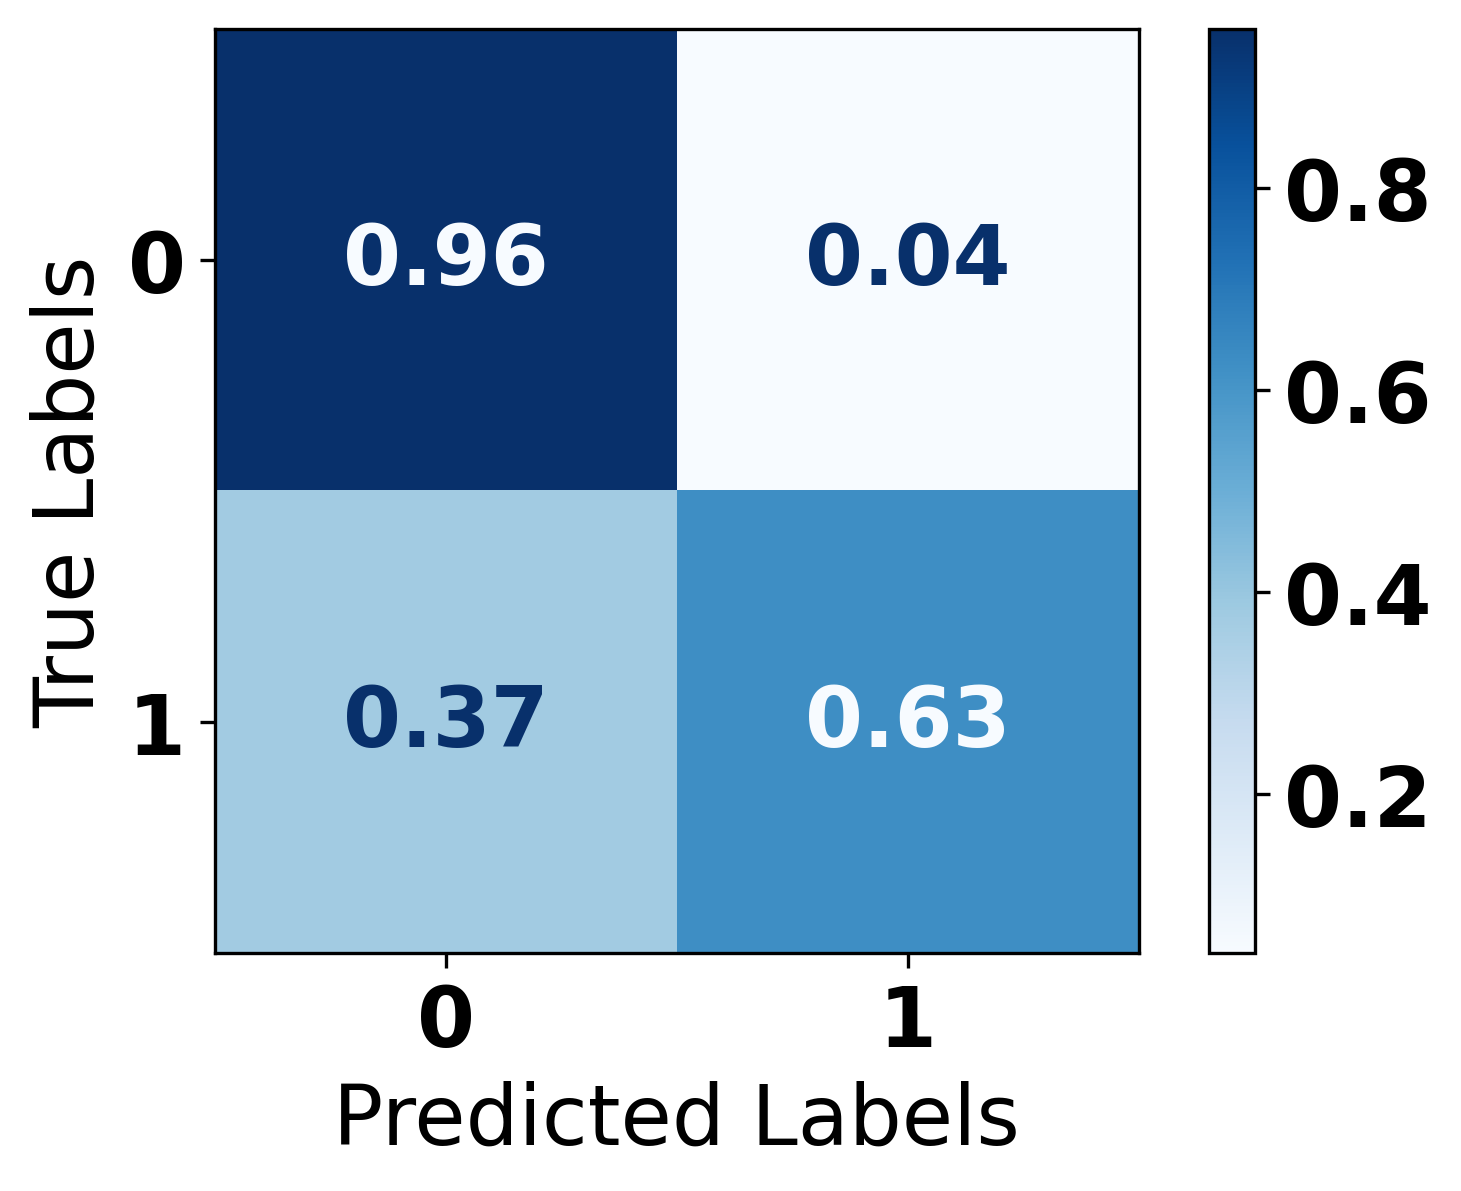

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.96      0.97     13097
     Class 1       0.25      0.63      0.36       294

    accuracy                           0.95     13391
   macro avg       0.62      0.79      0.66     13391
weighted avg       0.97      0.95      0.96     13391

Train Accuracy: 0.9878638882385078
Test Accuracy: 0.950190426405795


In [ ]:
!pip install catboost

# Import necessary libraries
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Create and fit the CatBoost model
catboost = CatBoostClassifier(random_state=7, verbose=0)  # Set verbose to 0 to disable logging
catboost.fit(x_train, y_train)

# Predict on the test set
y_pred = catboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=catboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = catboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(catboost, '/content/drive/MyDrive/Myocardial Infarction (MI)/Model/M2021/CatBoost.pkl')
"""

['/content/drive/MyDrive/Myocardial Infarction (MI)/Model/M2021/CatBoost.pkl']

In [ ]:
import joblib

# Load the model from file
CatBoost = joblib.load('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/M2021/CatBoost.pkl')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 12529, number of negative: 13097
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010722 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 128
[LightGBM] [Info] Number of data points in the train set: 25626, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.488918 -> initscore=-0.044337
[LightGBM] [Info] Start training from score -0.044337


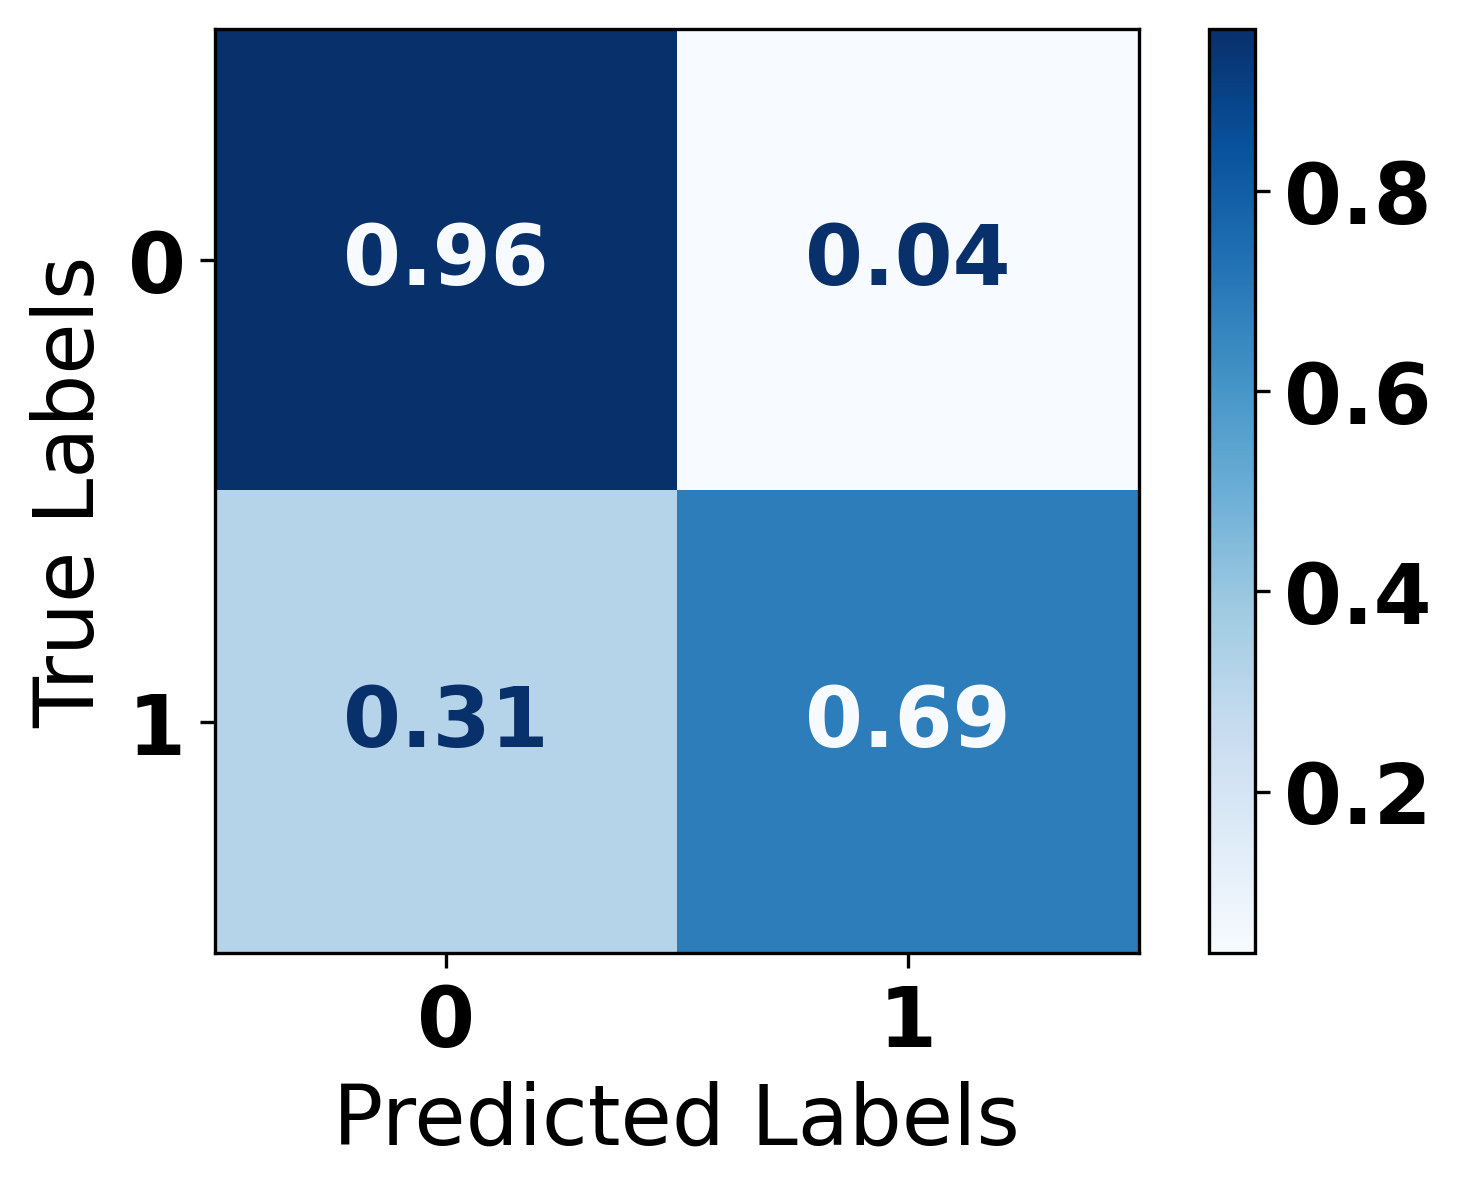

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.96      0.98     13097
     Class 1       0.29      0.69      0.40       294

    accuracy                           0.96     13391
   macro avg       0.64      0.82      0.69     13391
weighted avg       0.98      0.96      0.96     13391

Train Accuracy: 0.81183173339577
Test Accuracy: 0.9554178179374206


In [ ]:
# Import necessary libraries
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Create and fit the LightGBM model
lgbm = lgb.LGBMClassifier(
    random_state=1,
    n_estimators=2,         # Number of boosting iterations
    learning_rate=0.1,        # Learning rate
    max_depth=1,              # Maximum tree depth for base learners
    num_leaves=2,            # Maximum number of leaves in one tree
    subsample=0.1,            # Subsample ratio of the training instances
    colsample_bytree=0.3      # Subsample ratio of columns when constructing each tree
)
lgbm.fit(x_train, y_train)

# Predict on the test set
y_pred = lgbm.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgbm.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = lgbm.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(lgbm, '/content/drive/MyDrive/Myocardial Infarction (MI)/Model/M2021/LGBM.pkl')
"""

['/content/drive/MyDrive/Myocardial Infarction (MI)/Model/M2021/LGBM.pkl']

In [ ]:
import joblib

# Load the model from file
LGBM = joblib.load('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/M2021/LGBM.pkl')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


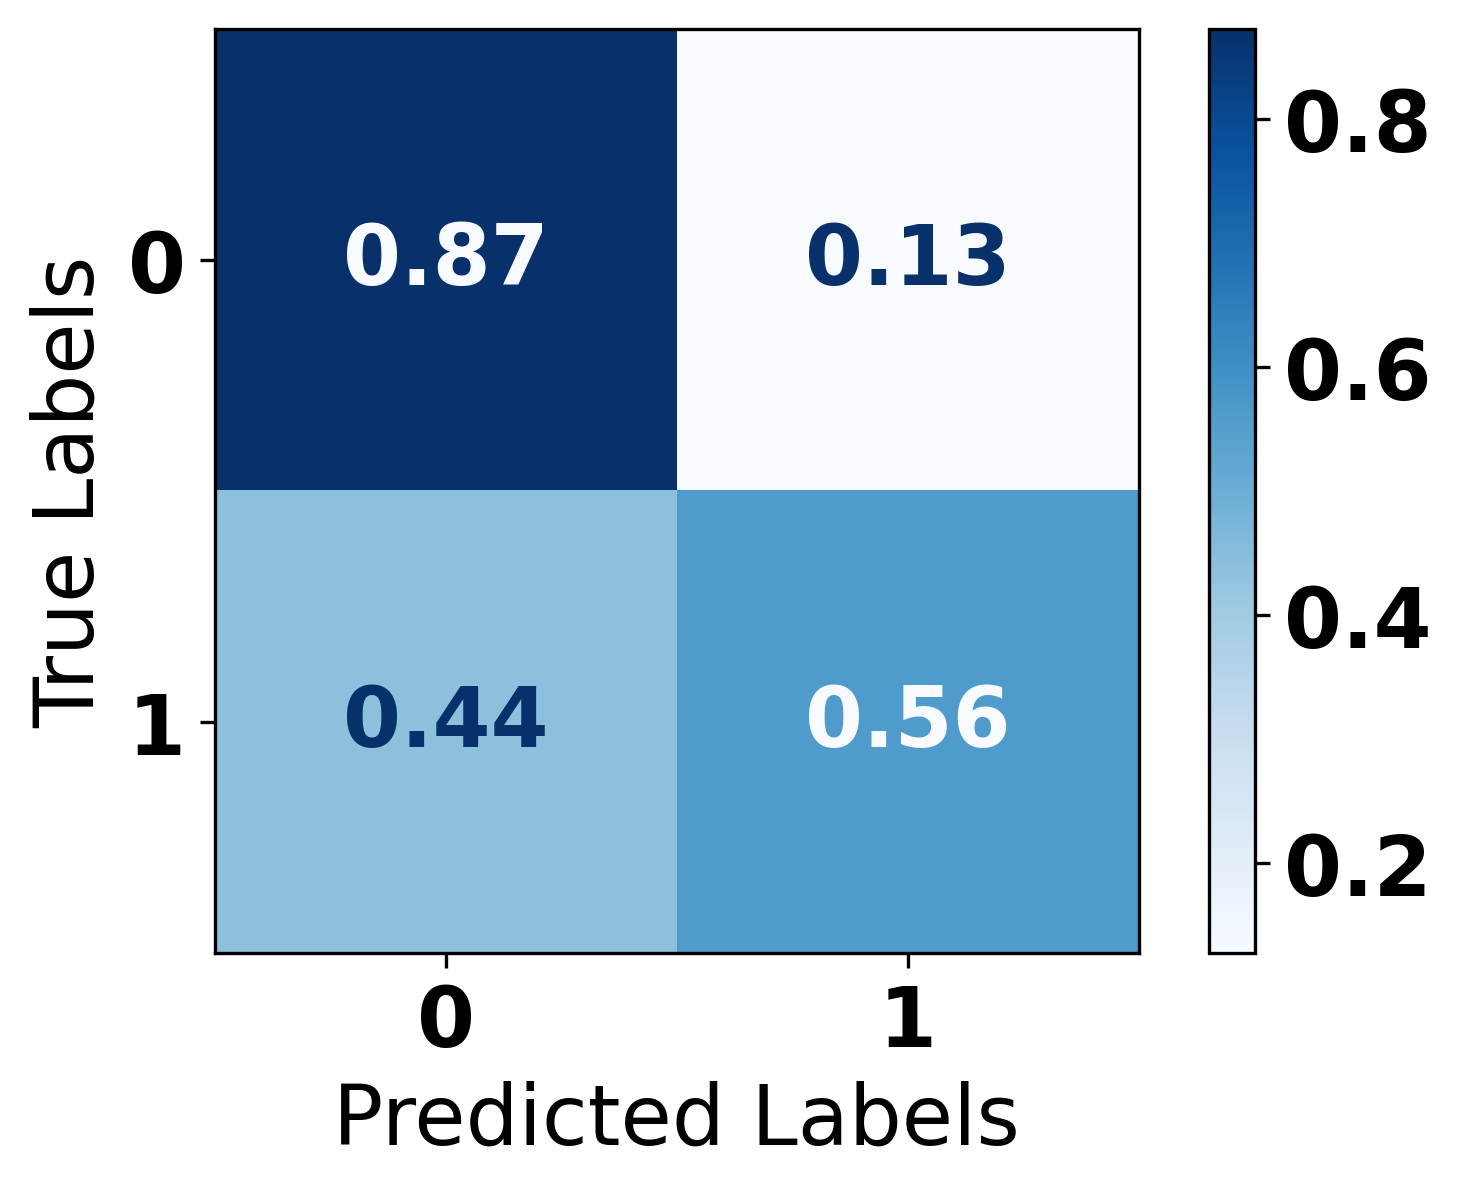

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.87      0.93     13097
     Class 1       0.09      0.56      0.16       294

    accuracy                           0.87     13391
   macro avg       0.54      0.72      0.54     13391
weighted avg       0.97      0.87      0.91     13391

Train Accuracy: 0.7169281198782487
Test Accuracy: 0.8657307146590993


In [ ]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Create and fit the Gradient Boosting Machine model
gbm = GradientBoostingClassifier(
    random_state=2,
    n_estimators=4,        # Number of boosting stages to be run
    learning_rate=0.1,       # Learning rate shrinks the contribution of each tree by learning_rate
    max_depth=1,             # Maximum depth of the individual regression estimators
    subsample=0.9,           # Fraction of samples used for fitting the individual base learners
    max_features='sqrt'      # Number of features to consider when looking for the best split
)
gbm.fit(x_train, y_train)

# Predict on the test set
y_pred = gbm.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gbm.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = gbm.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(gbm, '/content/drive/MyDrive/Myocardial Infarction (MI)/Model/M2021/GBM.pkl')
"""

['/content/drive/MyDrive/Myocardial Infarction (MI)/Model/M2021/GBM.pkl']

In [ ]:
import joblib

# Load the model from file
GBM = joblib.load('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/M2021/GBM.pkl')

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


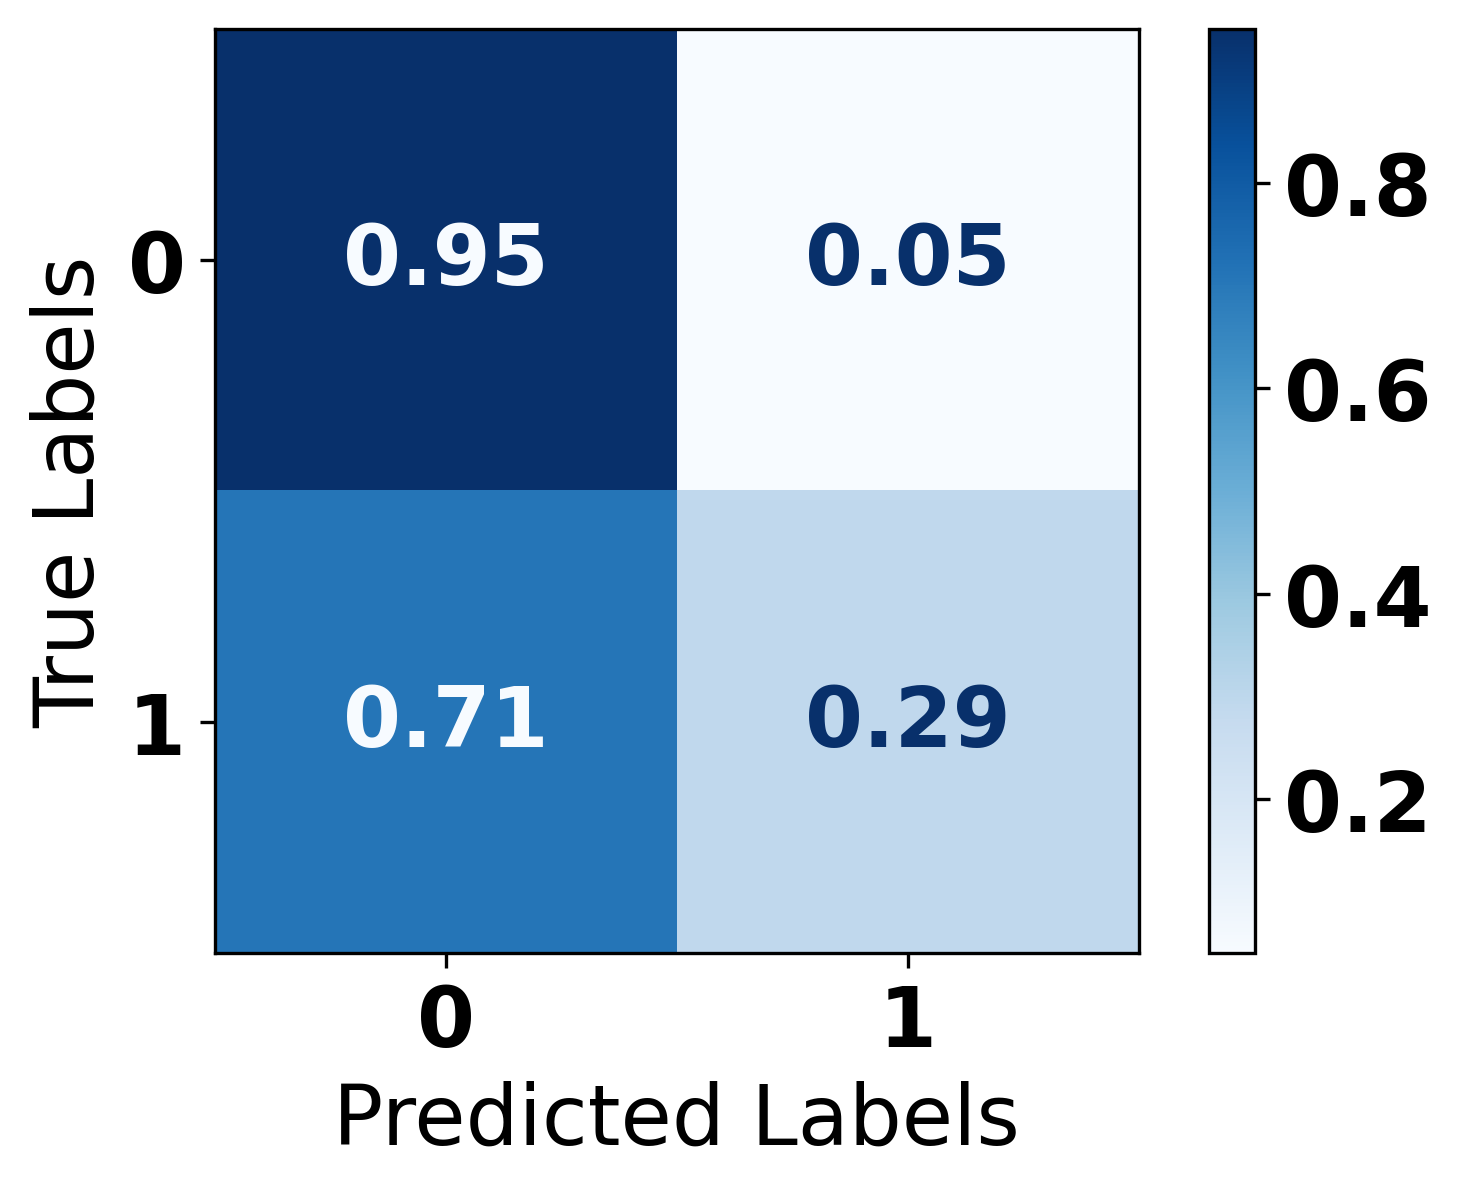

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.98      0.95      0.97     13097
     Class 1       0.12      0.29      0.17       294

    accuracy                           0.94     13391
   macro avg       0.55      0.62      0.57     13391
weighted avg       0.96      0.94      0.95     13391

Train Accuracy: 0.9815031608522594
Test Accuracy: 0.9354790530953626


In [ ]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Create and fit the k-NN model
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

# Predict on the test set
y_pred = knn.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = knn.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(knn, '/content/drive/MyDrive/Myocardial Infarction (MI)/Model/M2021/KNN.pkl')
"""

['/content/drive/MyDrive/Myocardial Infarction (MI)/Model/M2021/KNN.pkl']

In [ ]:
import joblib

# Load the model from file
KNN = joblib.load('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/M2021/KNN.pkl')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


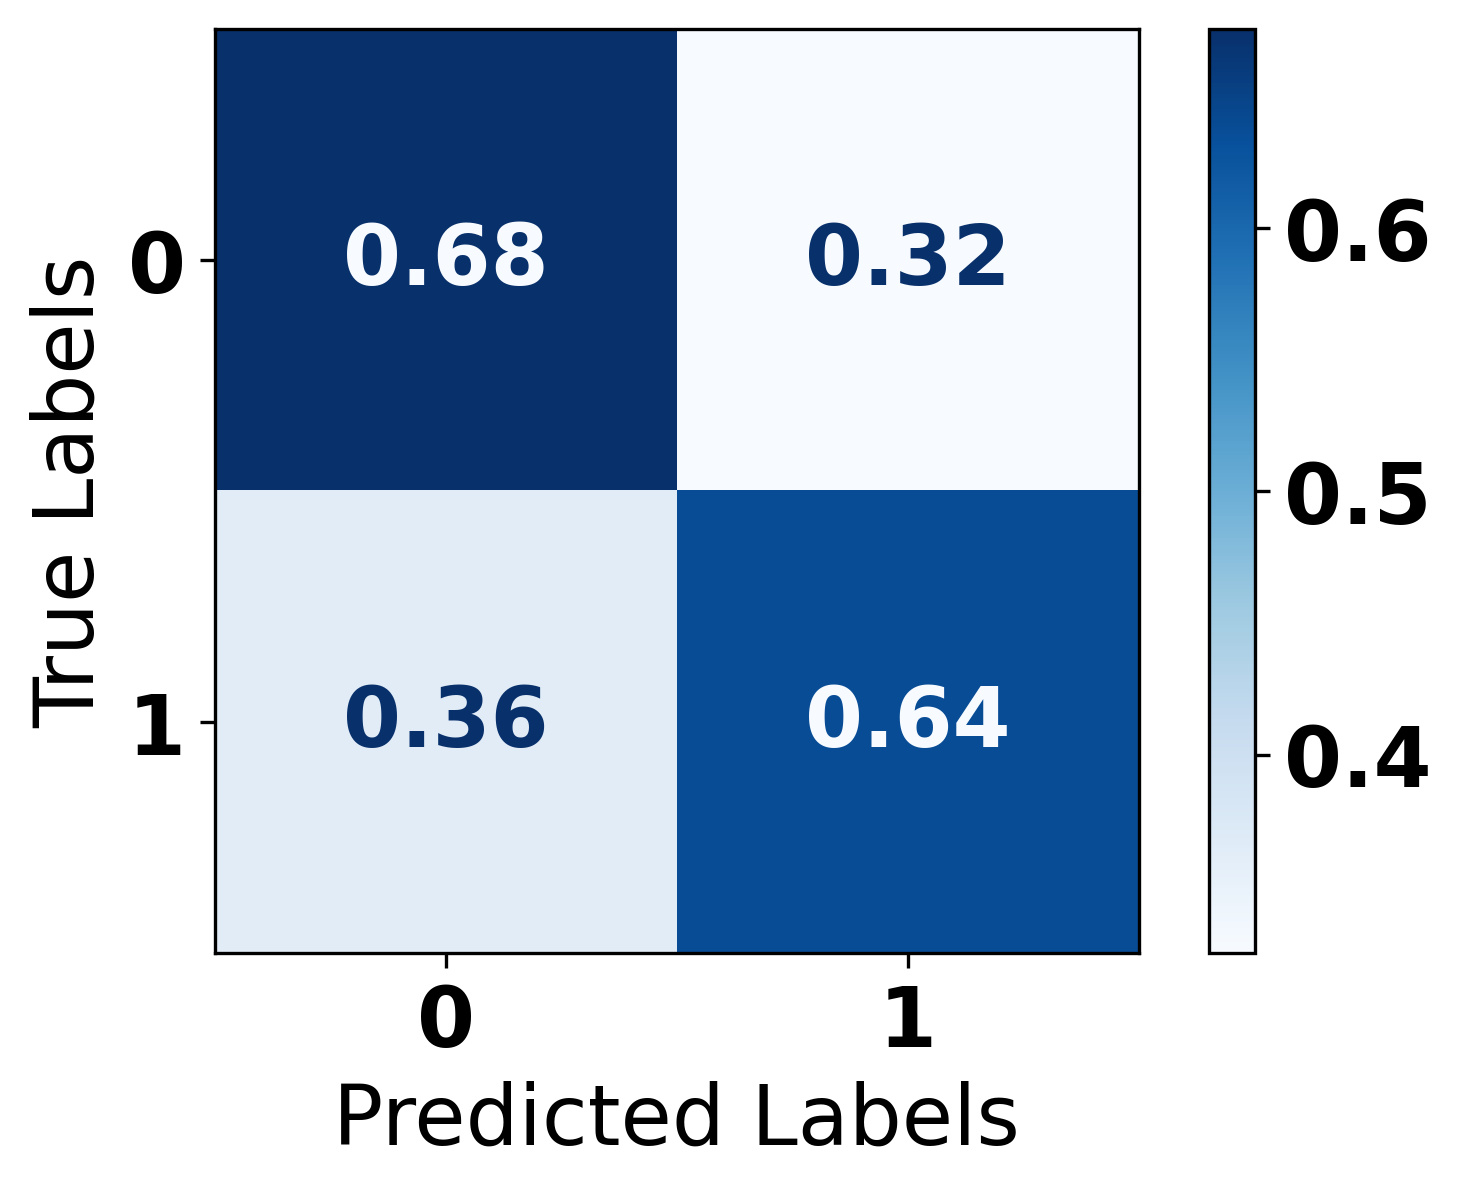

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.68      0.80     13097
     Class 1       0.04      0.64      0.08       294

    accuracy                           0.67     13391
   macro avg       0.52      0.66      0.44     13391
weighted avg       0.97      0.67      0.79     13391

Train Accuracy: 0.6541013033637711
Test Accuracy: 0.6745575386453588


In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Create and fit the Logistic Regression model
log_reg = LogisticRegression(
    random_state=2,
    solver='lbfgs',          # Algorithm to use in the optimization problem
    max_iter=4,           # Maximum number of iterations for solvers to converge
    C=1,                   # Inverse of regularization strength; must be a positive float
    penalty='l2',            # Used to specify the norm used in the penalization
    class_weight='balanced'  # Adjust weights inversely proportional to class frequencies
)
log_reg.fit(x_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = log_reg.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(log_reg, '/content/drive/MyDrive/Myocardial Infarction (MI)/Model/M2021/LR.pkl')
"""

['/content/drive/MyDrive/Myocardial Infarction (MI)/Model/M2021/LR.pkl']

In [ ]:
import joblib

# Load the model from file
LR = joblib.load('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/M2021/LR.pkl')

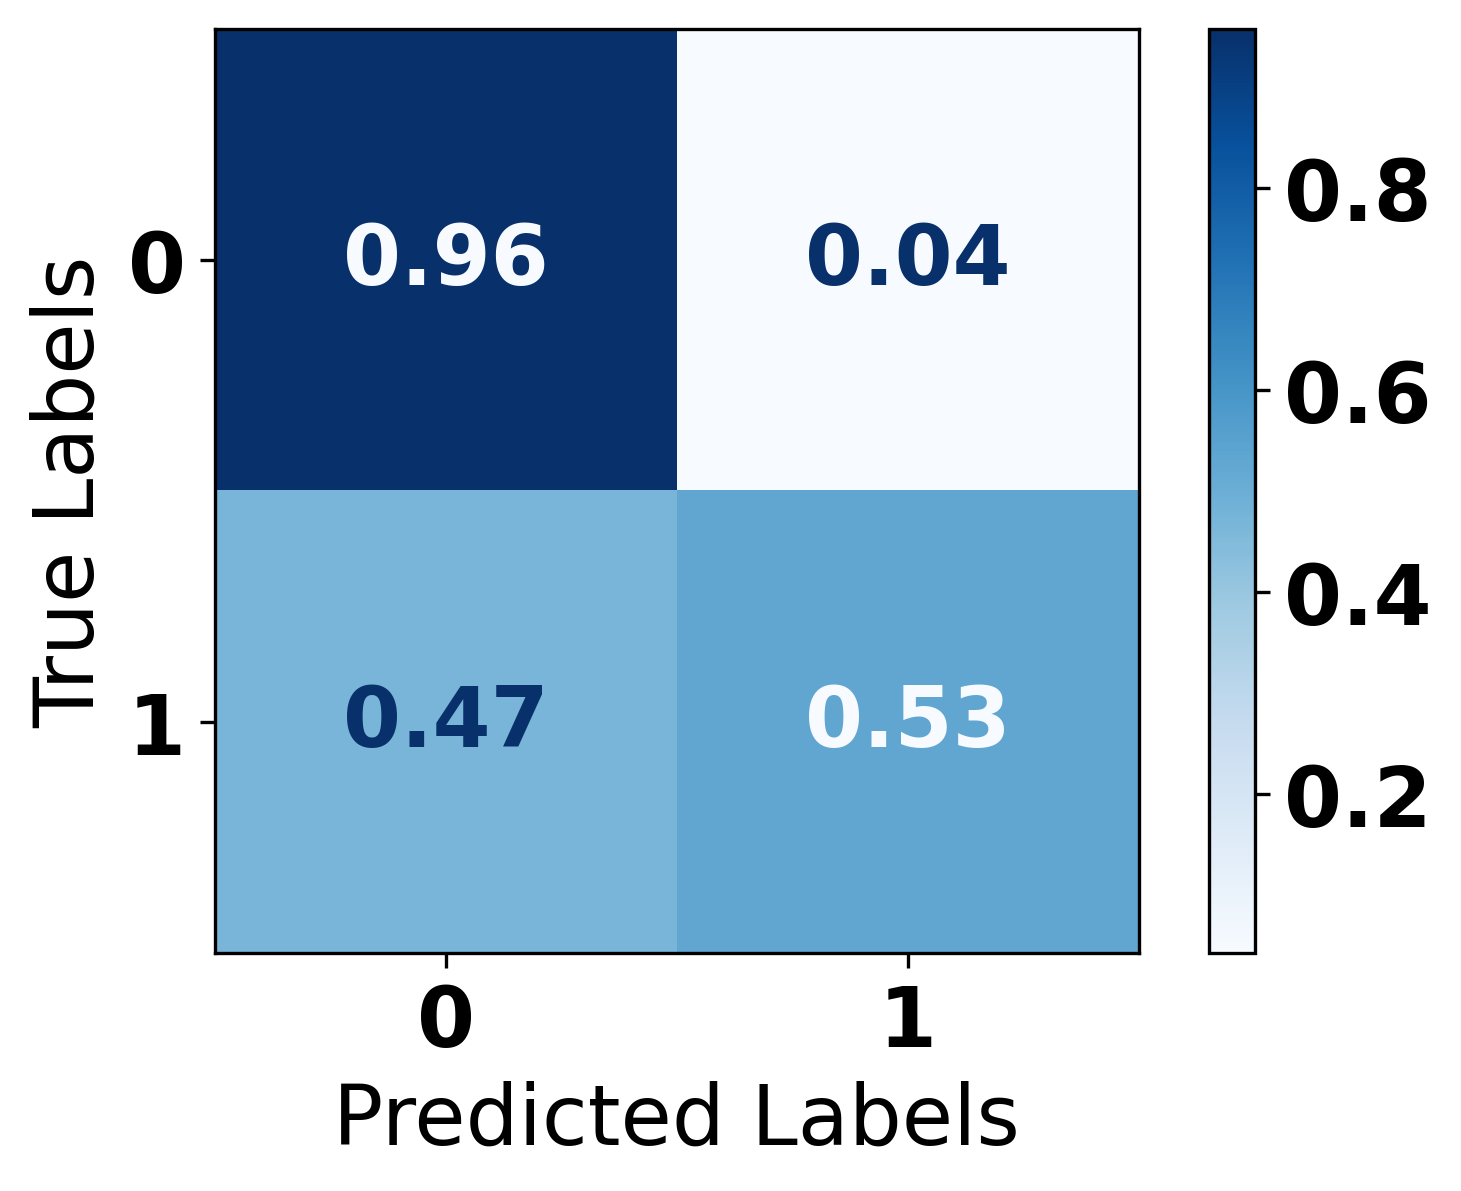

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.96      0.97     13097
     Class 1       0.22      0.53      0.31       294

    accuracy                           0.95     13391
   macro avg       0.60      0.74      0.64     13391
weighted avg       0.97      0.95      0.96     13391

Train Accuracy: 0.991571060641536
Test Accuracy: 0.9482488238369053


In [ ]:
# Import necessary libraries
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Create and fit the XGBoost Classifier
XGB = XGBClassifier(random_state=7)
XGB.fit(x_train, y_train)

# Predict on the test set
y_pred = XGB.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=XGB.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = XGB.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(XGB, '/content/drive/MyDrive/Myocardial Infarction (MI)/Model/M2021/XGB.pkl')
"""

['/content/drive/MyDrive/Myocardial Infarction (MI)/Model/M2021/XGB.pkl']

In [ ]:
import joblib

# Load the model from file
XGB = joblib.load('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/M2021/XGB.pkl')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


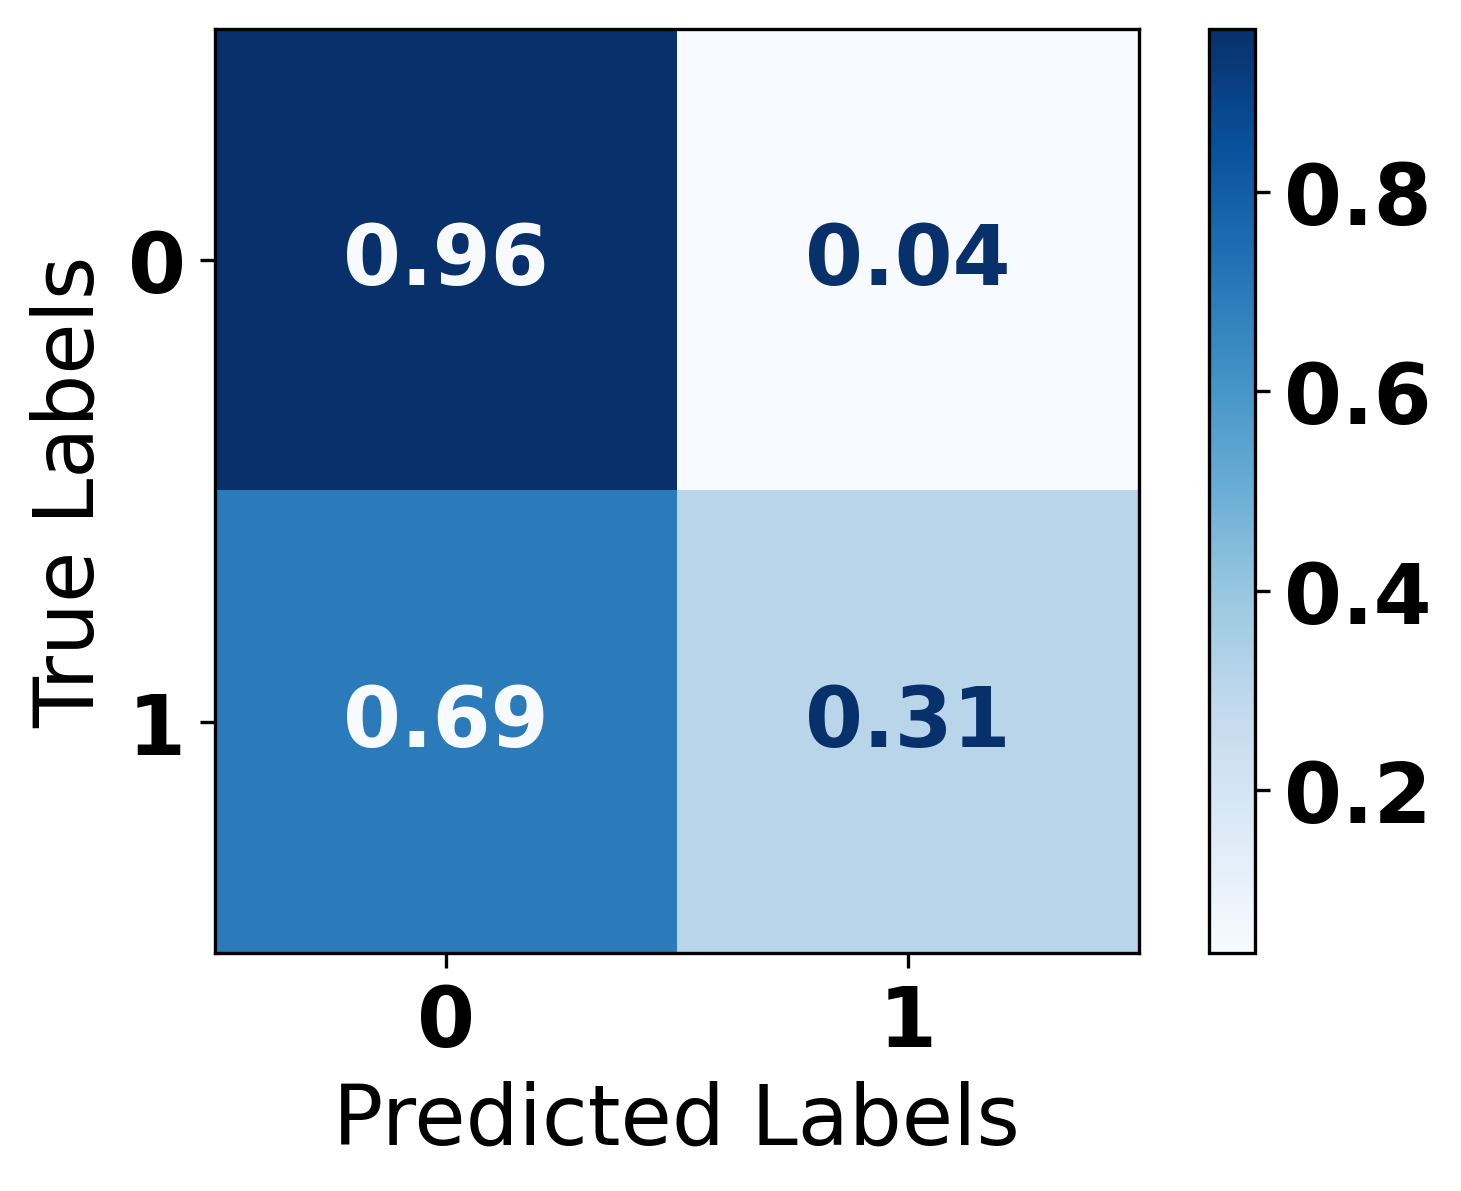

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.98      0.96      0.97     13097
     Class 1       0.16      0.31      0.21       294

    accuracy                           0.95     13391
   macro avg       0.57      0.63      0.59     13391
weighted avg       0.97      0.95      0.96     13391

Train Accuracy: 1.0
Test Accuracy: 0.9487715629900679


In [ ]:
# Create and fit the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(random_state=7)
DT.fit(x_train, y_train)

# Predict on the test set
y_pred = DT.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DT.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = DT.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(DT, '/content/drive/MyDrive/Myocardial Infarction (MI)/Model/M2021/DT.pkl')
"""

['/content/drive/MyDrive/Myocardial Infarction (MI)/Model/M2021/DT.pkl']

In [ ]:
import joblib

# Load the model from file
DT = joblib.load('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/M2021/DT.pkl')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RUSBoostClassifier was fitted with feature names
  warnings.warn(


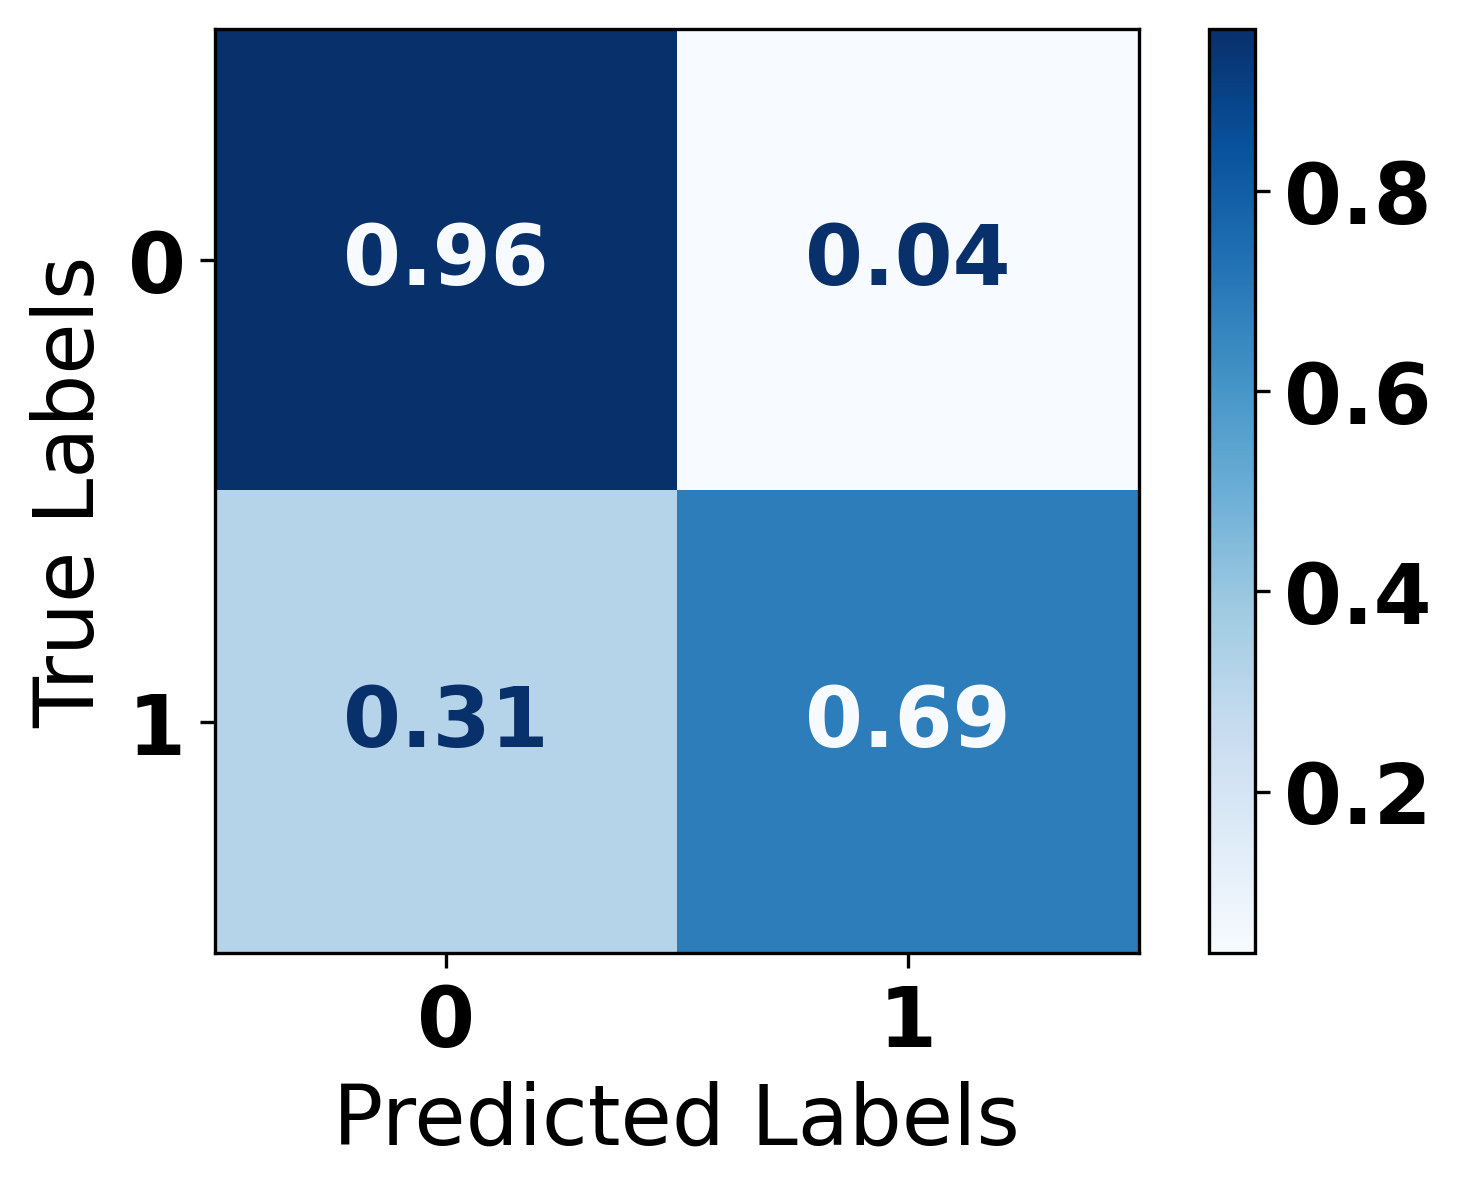

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.96      0.98     13097
     Class 1       0.29      0.69      0.40       294

    accuracy                           0.96     13391
   macro avg       0.64      0.82      0.69     13391
weighted avg       0.98      0.96      0.96     13391

Train Accuracy: 0.81183173339577
Test Accuracy: 0.9554178179374206


In [ ]:
# Create an RUSBoost classifier
from imblearn.ensemble import RUSBoostClassifier

rusboost = RUSBoostClassifier(n_estimators=2, random_state=2)

# Fit the classifier to the training data
rusboost.fit(x_train, y_train)

# Predicting the output on the test dataset
y_pred = rusboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rusboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = rusboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(rusboost, '/content/drive/MyDrive/Myocardial Infarction (MI)/Model/M2021/RUSBoost.pkl')
"""

['/content/drive/MyDrive/Myocardial Infarction (MI)/Model/M2021/RUSBoost.pkl']

In [ ]:
import joblib

# Load the model from file
RUSBoost = joblib.load('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/M2021/RUSBoost.pkl')

<ipython-input-203-95a67ef76d5a>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  y_pred = RF.fit(x_train, y_train).predict(x_test)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


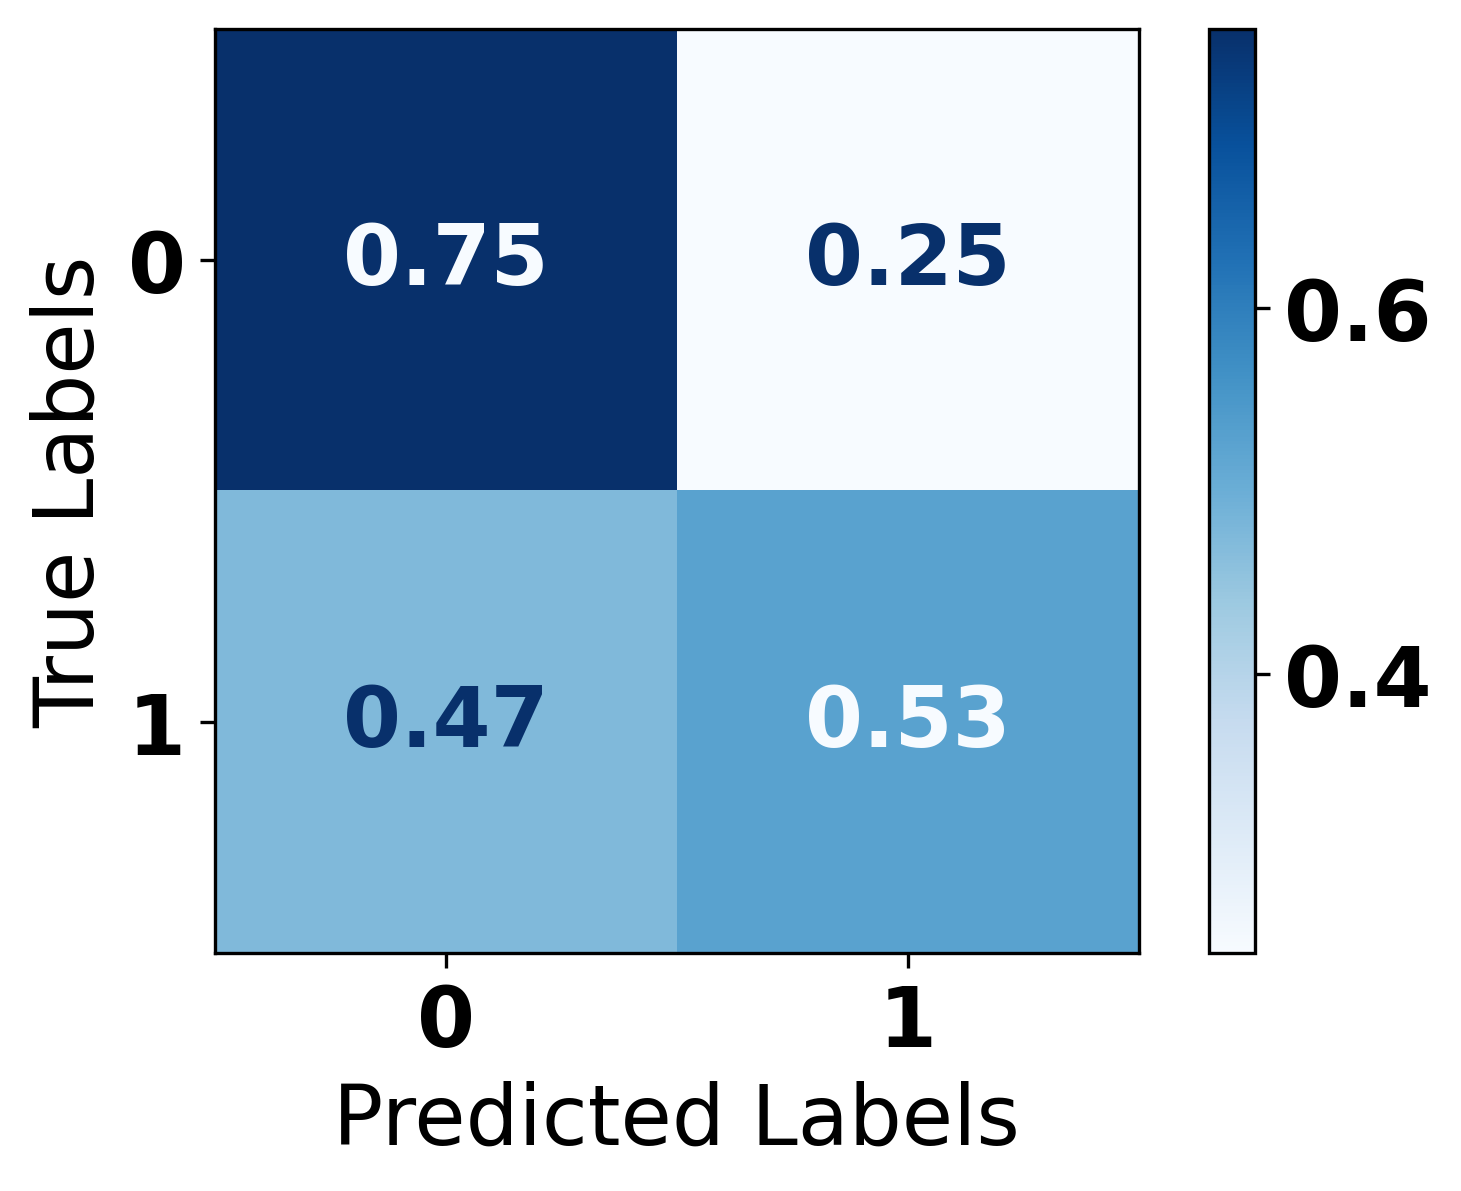

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.75      0.85     13097
           1       0.05      0.53      0.08       294

    accuracy                           0.75     13391
   macro avg       0.52      0.64      0.47     13391
weighted avg       0.97      0.75      0.84     13391

Train Accuracy: 0.6508233825021462
Test Accuracy: 0.7477410200881189


In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(
    n_estimators=1,
    max_depth=1,
    min_samples_split=2,
    min_samples_leaf=3,
    max_features='sqrt',
    bootstrap=True,
    random_state=1
)

# Fit the classifier to the training data
y_pred = RF.fit(x_train, y_train).predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = RF.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(RF, '/content/drive/MyDrive/Myocardial Infarction (MI)/Model/M2021/RF.pkl')
"""

['/content/drive/MyDrive/Myocardial Infarction (MI)/Model/M2021/RF.pkl']

In [ ]:
import joblib

# Load the model from file
RF = joblib.load('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/M2021/RF.pkl')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


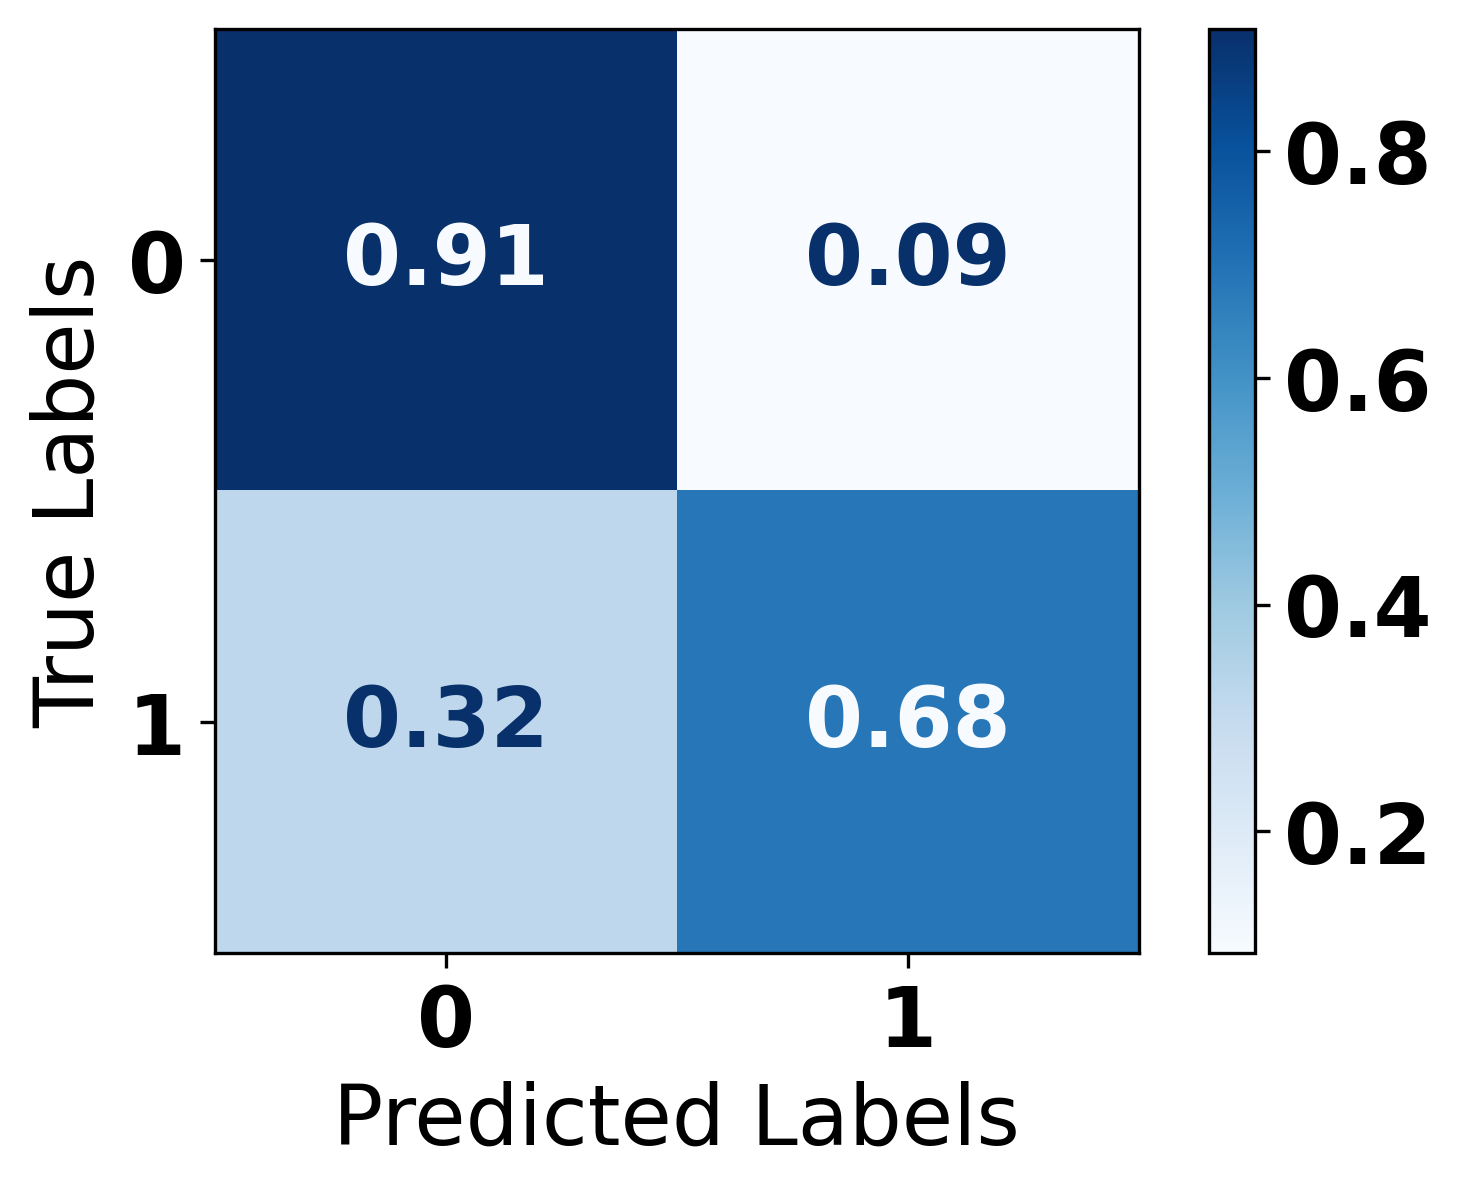

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.91      0.95     13097
           1       0.14      0.68      0.24       294

    accuracy                           0.90     13391
   macro avg       0.57      0.80      0.59     13391
weighted avg       0.97      0.90      0.93     13391

Train Accuracy: 0.7731990946694763
Test Accuracy: 0.9025464864461206


In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB(priors=[0.9, 0.1], var_smoothing=1e-3)

# Fit the classifier to the training data
y_pred = GNB.fit(x_train, y_train).predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GNB.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = GNB.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(GNB, '/content/drive/MyDrive/Myocardial Infarction (MI)/Model/M2021/GNB.pkl')
"""

['/content/drive/MyDrive/Myocardial Infarction (MI)/Model/M2021/GNB.pkl']

In [ ]:
import joblib

# Load the model from file
GNB = joblib.load('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/M2021/GNB.pkl')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


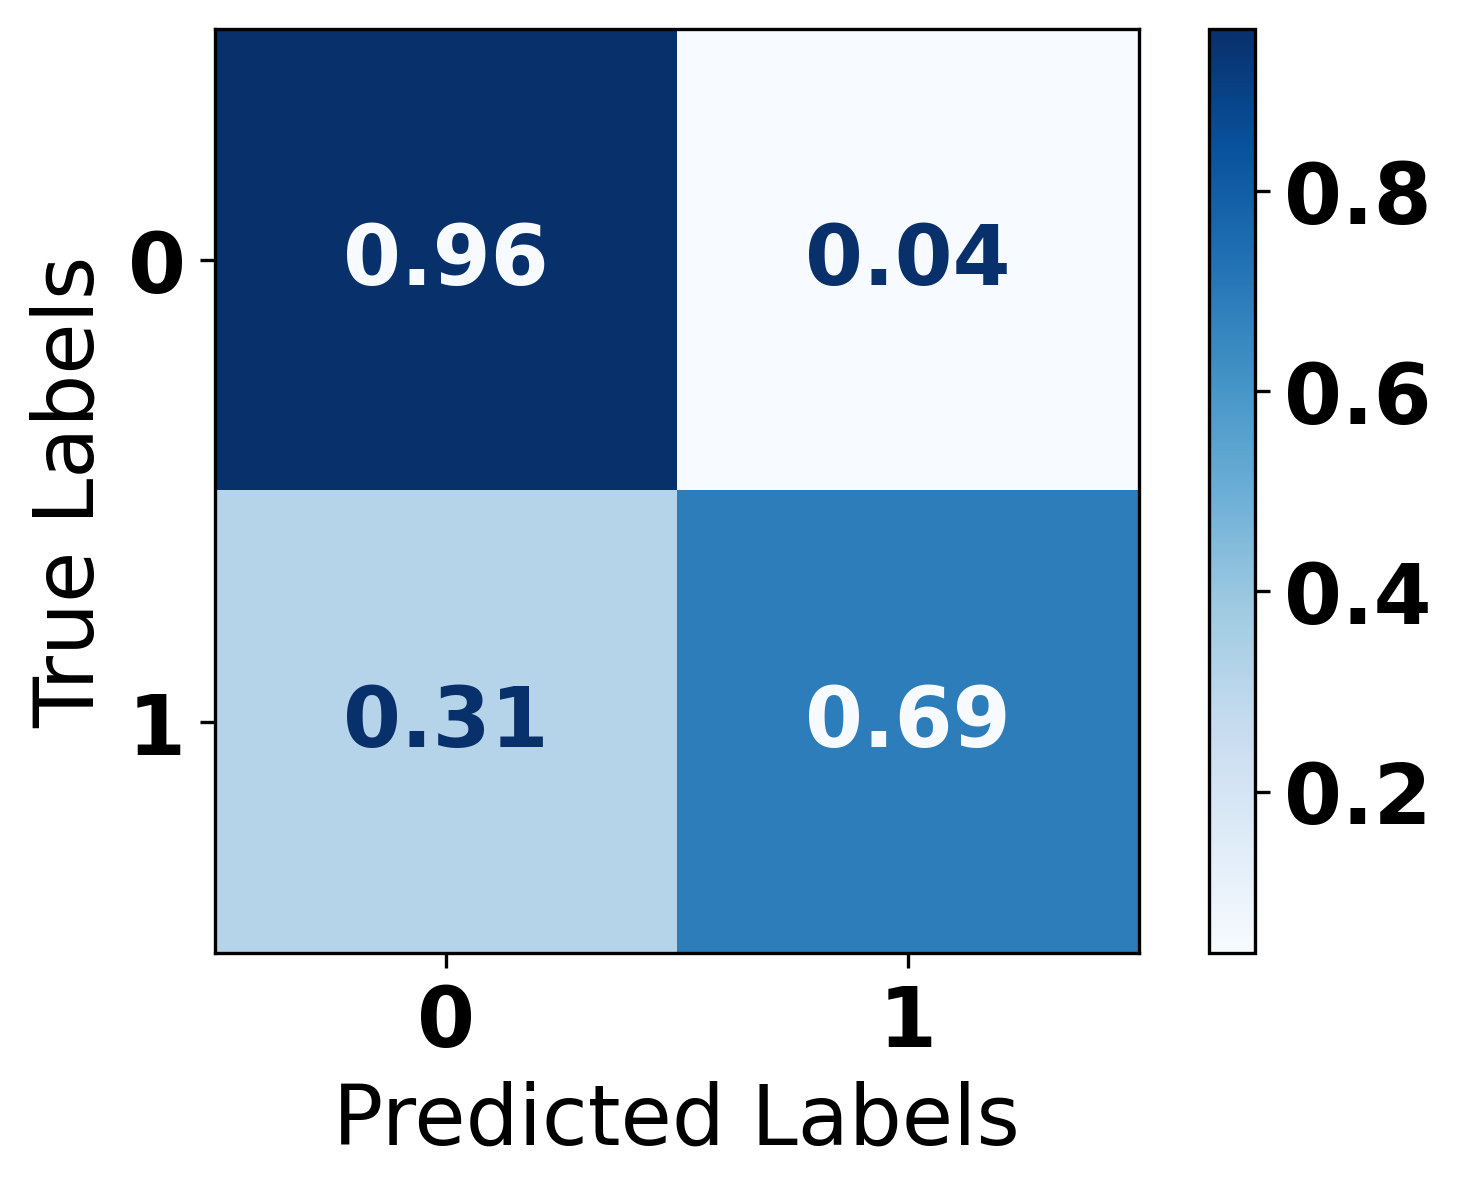

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98     13097
           1       0.29      0.69      0.40       294

    accuracy                           0.96     13391
   macro avg       0.64      0.82      0.69     13391
weighted avg       0.98      0.96      0.96     13391

Train Accuracy: 0.81183173339577
Test Accuracy: 0.9554178179374206


In [ ]:
# Create an AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier

Adaboost = AdaBoostClassifier(n_estimators=11, learning_rate=0.2, random_state=33)
# Adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the AdaBoost classifier
Adaboost.fit(x_train, y_train)

# Make predictions on the test set
y_pred = Adaboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Adaboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = Adaboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(Adaboost, '/content/drive/MyDrive/Myocardial Infarction (MI)/Model/M2021/AdaBoost.pkl')
"""

['/content/drive/MyDrive/Myocardial Infarction (MI)/Model/M2021/AdaBoost.pkl']

In [ ]:
import joblib

# Load the model from file
AdaBoost = joblib.load('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/M2021/AdaBoost.pkl')

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(
    random_state=4,
    max_iter=10,
    hidden_layer_sizes=(4,),  # Size of the hidden layers (default is a single layer with 100 neurons)
    activation='relu',          # Activation function for the hidden layer ('identity', 'logistic', 'tanh', 'relu')
    solver='adam',              # Solver for weight optimization ('lbfgs', 'sgd', 'adam')
    alpha=0.00001,               # L2 penalty (regularization term) parameter
    batch_size='auto',          # Size of minibatches for stochastic optimizers
    learning_rate='constant',   # Learning rate schedule ('constant', 'invscaling', 'adaptive')
    learning_rate_init=0.0001,   # Initial learning rate used
    power_t=0.5,                # The exponent for inverse scaling learning rate
    shuffle=True,               # Whether to shuffle samples in each iteration
    tol=1e-8,                   # Tolerance for the optimization
    verbose=False,              # Whether to print progress messages to stdout
    warm_start=False,           # Reuse the solution of the previous call to fit as initialization
    momentum=0.2,               # Momentum for gradient descent update (only used when solver='sgd')
    nesterovs_momentum=True,    # Whether to use Nesterov's momentum (only used when solver='sgd' and momentum > 0)
    early_stopping=False,       # Whether to use early stopping to terminate training when validation score is not improving
    validation_fraction=0.1,    # The proportion of training data to set aside as validation set for early stopping
    beta_1=0.09,                 # Exponential decay rate for estimates of first moment vector in Adam
    beta_2=0.0999,               # Exponential decay rate for estimates of second moment vector in Adam
    epsilon=1e-4                # Value for numerical stability in Adam
).fit(x_train, y_train)
y_pred = clf.predict_proba(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Normalized Confusion Matrix:
[[0.69053982 0.30946018]
 [0.41156463 0.58843537]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.69      0.81     13097
     Class 1       0.04      0.59      0.08       294

    accuracy                           0.69     13391
   macro avg       0.51      0.64      0.44     13391
weighted avg       0.97      0.69      0.80     13391



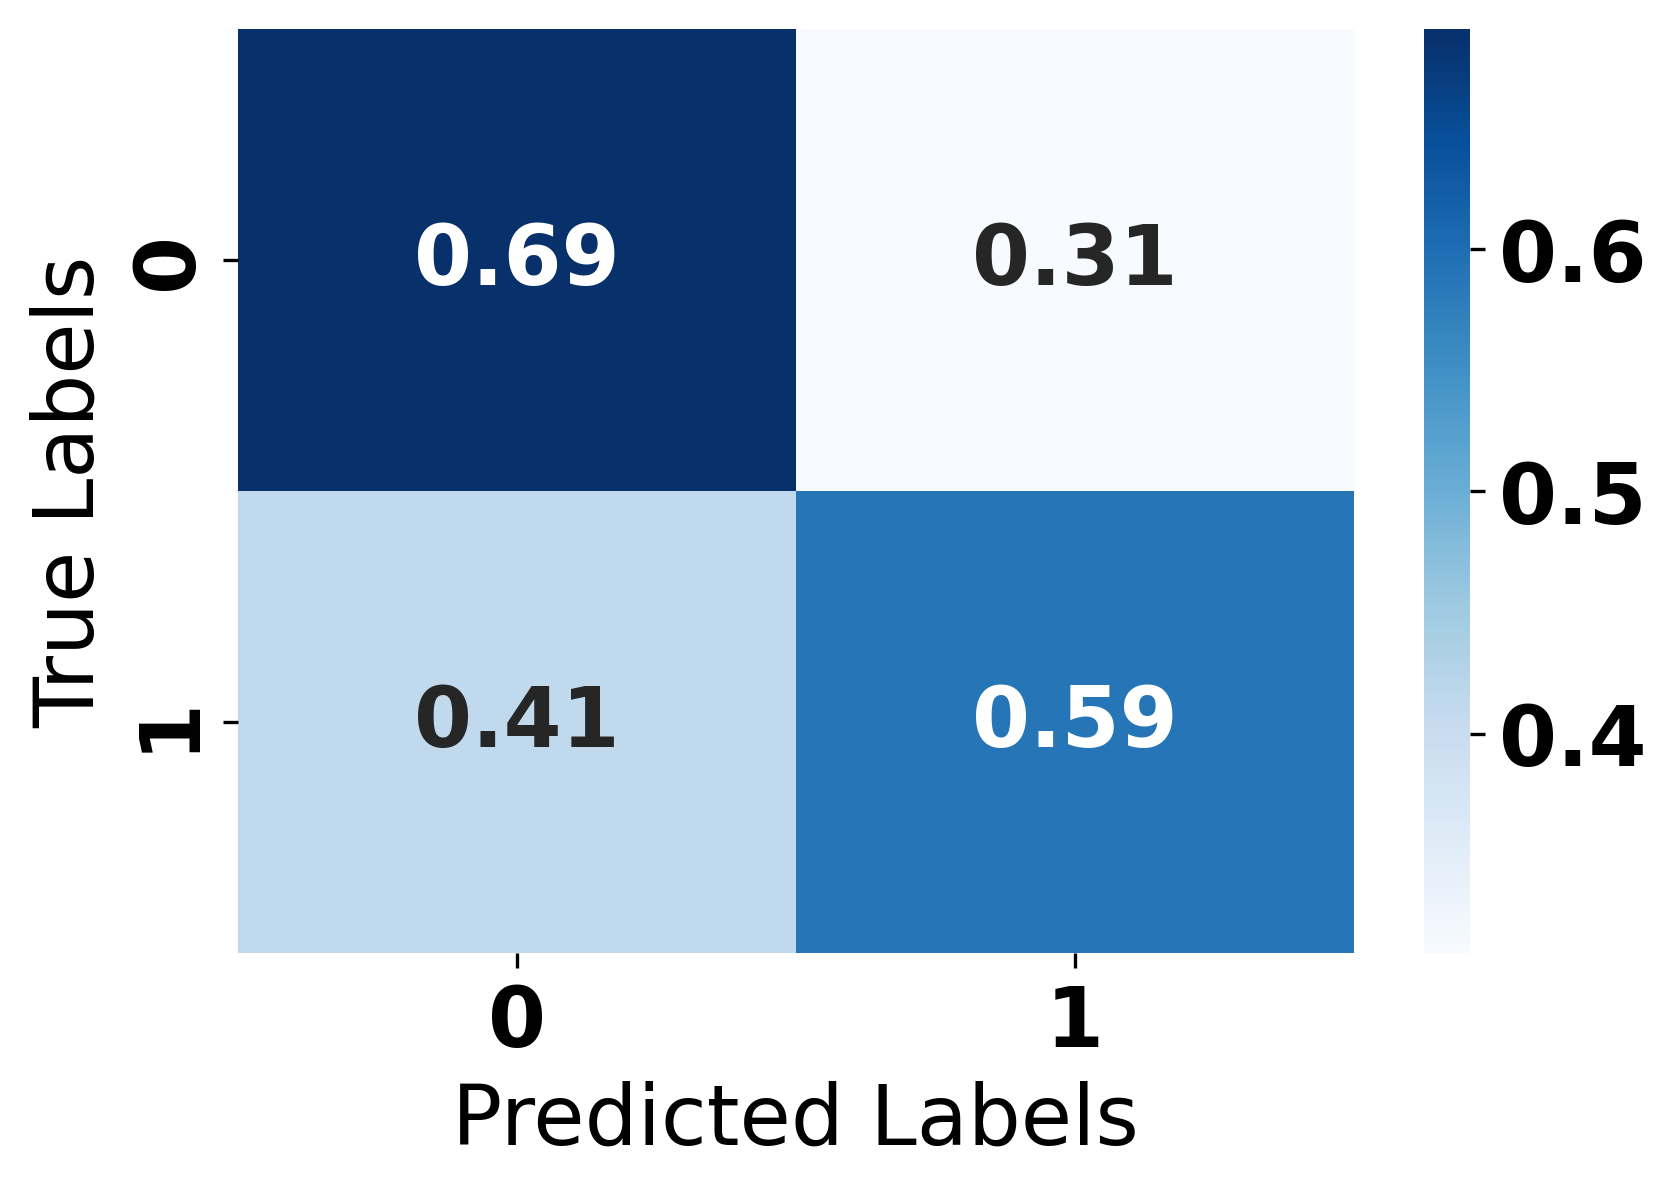

In [ ]:
# Predict probabilities on test data
y_pred_prob = clf.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(clf, '/content/drive/MyDrive/Myocardial Infarction (MI)/Model/M2021/MLP.pkl')
"""

['/content/drive/MyDrive/Myocardial Infarction (MI)/Model/M2021/MLP.pkl']

In [ ]:
import joblib

# Load the model from file
MLP = joblib.load('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/M2021/MLP.pkl')

### Deep Learning

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Add

# Input layer
input_layer = Input(shape=(x_train.shape[1], 1))

# First convolutional block
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# Second convolutional block with residual connection
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(pool1)
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2)

# Residual connection
residual1 = Conv1D(filters=64, kernel_size=1, activation='relu', padding='same')(pool1)
residual1 = Add()([residual1, conv2])
pool2 = MaxPooling1D(pool_size=2)(residual1)

# Flatten layer
flatten = Flatten()(pool2)

# Dense layers
dense1 = Dense(128, activation='relu')(flatten)
dense2 = Dense(64, activation='relu')(dense1)

# Output layer
output = Dense(1, activation='sigmoid')(dense2)

# Create the model
model = Model(inputs=input_layer, outputs=output)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
201/201 [==============================] - 6s 17ms/step - loss: 0.5727 - accuracy: 0.7018 - val_loss: 0.3417 - val_accuracy: 0.8573
Epoch 2/10
201/201 [==============================] - 3s 17ms/step - loss: 0.3911 - accuracy: 0.8243 - val_loss: 0.3407 - val_accuracy: 0.8627
Epoch 3/10
201/201 [==============================] - 7s 37ms/step - loss: 0.3647 - accuracy: 0.8384 - val_loss: 0.3134 - val_accuracy: 0.8891
Epoch 4/10
201/201 [==============================] - 6s 29ms/step - loss: 0.3484 - accuracy: 0.8485 - val_loss: 0.3267 - val_accuracy: 0.8731
Epoch 5/10
201/201 [==============================] - 6s 32ms/step - loss: 0.3401 - accuracy: 0.8513 - val_loss: 0.3151 - val_accuracy: 0.8802
Epoch 6/10
201/201 [==============================] - 7s 34ms/step - loss: 0.3313 - accuracy: 0.8591 - val_loss: 0.3655 - val_accuracy: 0.8309
Epoch 7/10
201/201 [==============================] - 6s 27ms/step - loss: 0.3312 - accuracy: 0.8602 - val_loss: 0.2847 - val_accuracy: 0.8805

419/419 [==============================] - 2s 6ms/step
Normalized Confusion Matrix:
[[0.95220279 0.04779721]
 [0.30612245 0.69387755]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.95      0.97     13097
     Class 1       0.25      0.69      0.36       294

    accuracy                           0.95     13391
   macro avg       0.62      0.82      0.67     13391
weighted avg       0.98      0.95      0.96     13391



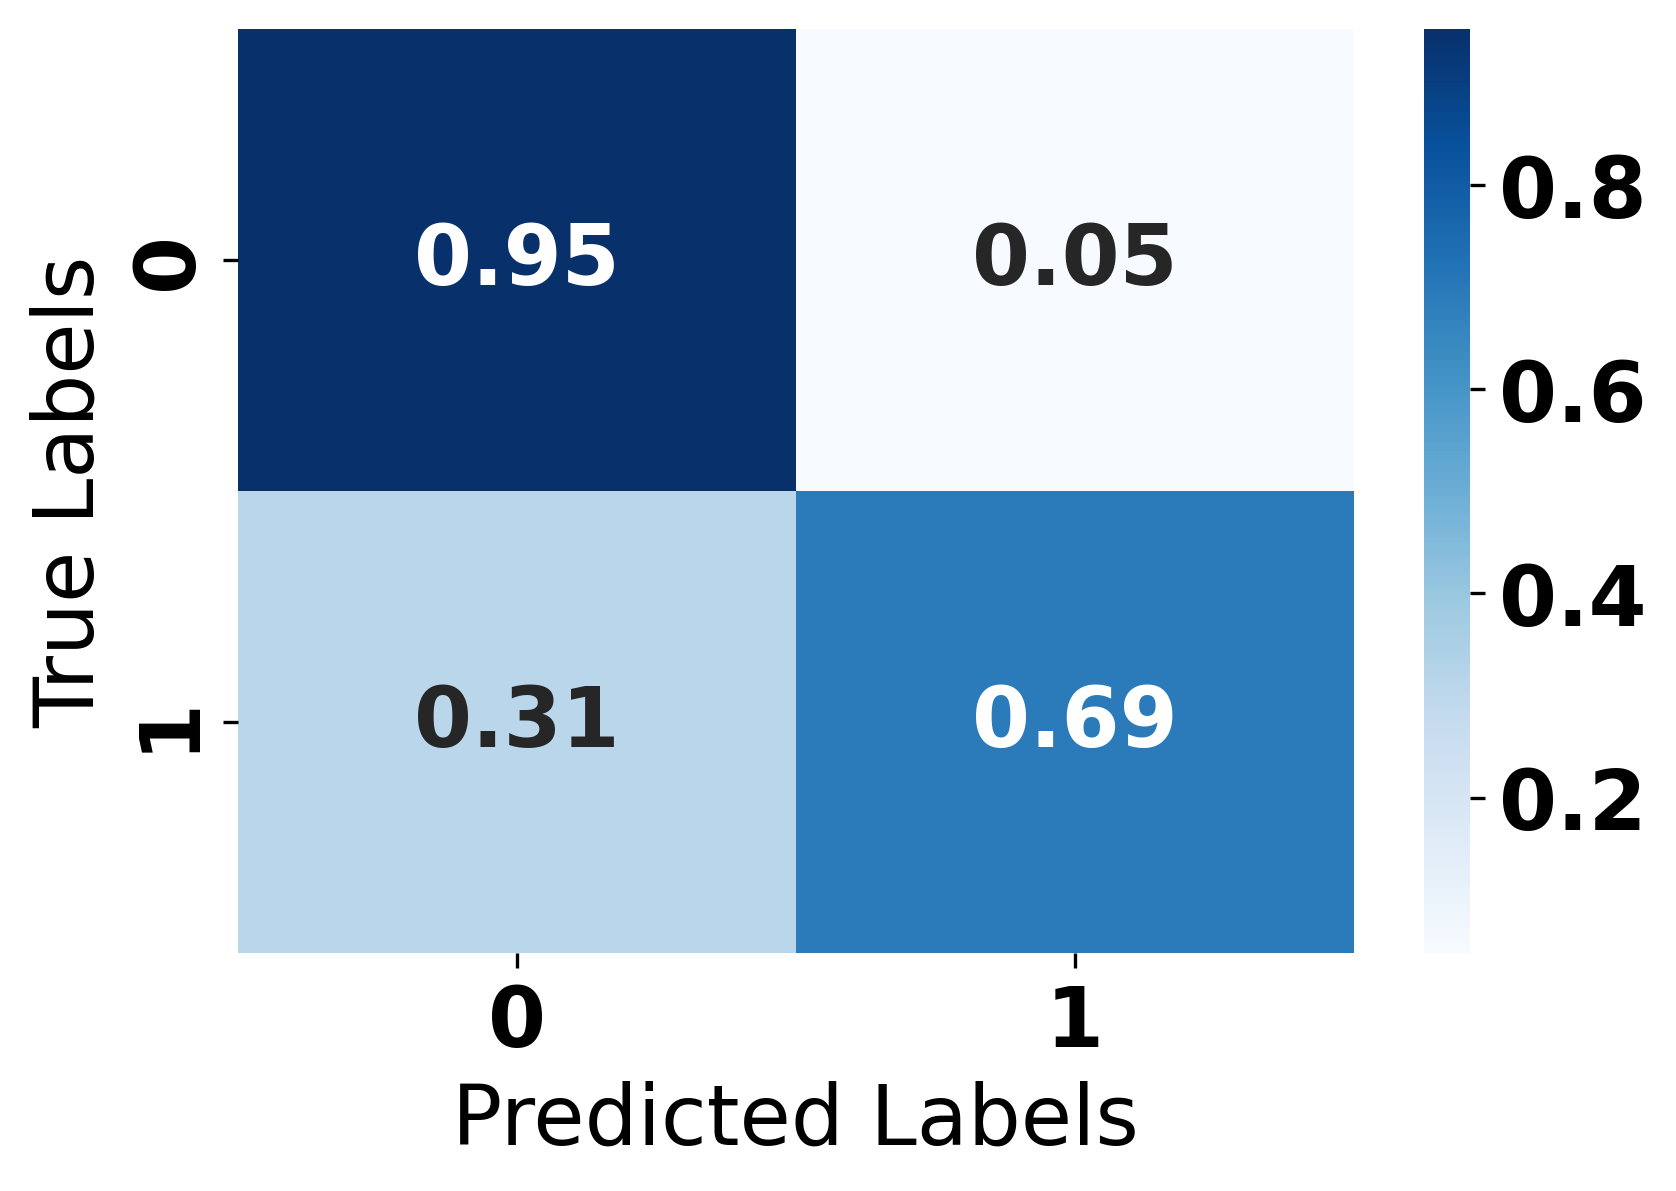

In [ ]:
# Predict probabilities on test data
y_pred_prob = model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.76, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
model.save('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/M2021/CNN.h5')
"""

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
CNN = load_model('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/M2021/CNN.h5')

In [ ]:
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model

# Define the input shape based on your data
input_shape = (x_train.shape[1],)  # Assuming your input data is 1D

def ANN_model(input_shape):
    input_layer = Input(shape=input_shape)

    # Add fully connected layers with increasing complexity
    dense1 = Dense(1024, activation='relu')(input_layer)
    dense1 = BatchNormalization()(dense1)
    dense1 = Dropout(0.5)(dense1)  # Adding dropout for regularization

    dense2 = Dense(512, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)
    dense2 = Dropout(0.5)(dense2)

    dense3 = Dense(256, activation='relu')(dense2)
    dense3 = BatchNormalization()(dense3)
    dense3 = Dropout(0.5)(dense3)

    dense4 = Dense(128, activation='relu')(dense3)
    dense4 = BatchNormalization()(dense4)
    dense4 = Dropout(0.5)(dense4)

    dense5 = Dense(64, activation='relu')(dense4)
    dense5 = BatchNormalization()(dense5)

    dense6 = Dense(64, activation='relu')(dense5)
    dense6 = BatchNormalization()(dense6)

    output = Dense(1, activation='sigmoid')(dense6)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Create the even more complex ANN model
ANN_model = ANN_model(input_shape)

# Compile the model
ANN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the even more complex ANN model
ANN_model.fit(x_train, y_train, epochs=15, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the even more complex ANN model
loss, accuracy = ANN_model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/15
201/201 [==============================] - 18s 63ms/step - loss: 0.5142 - accuracy: 0.7514 - val_loss: 0.1270 - val_accuracy: 0.9568
Epoch 2/15
201/201 [==============================] - 13s 64ms/step - loss: 0.3820 - accuracy: 0.8344 - val_loss: 0.2276 - val_accuracy: 0.9132
Epoch 3/15
201/201 [==============================] - 10s 52ms/step - loss: 0.3630 - accuracy: 0.8464 - val_loss: 0.3827 - val_accuracy: 0.8192
Epoch 4/15
201/201 [==============================] - 11s 52ms/step - loss: 0.3540 - accuracy: 0.8469 - val_loss: 0.6264 - val_accuracy: 0.6729
Epoch 5/15
201/201 [==============================] - 8s 38ms/step - loss: 0.3472 - accuracy: 0.8517 - val_loss: 0.7544 - val_accuracy: 0.5404
Epoch 6/15
201/201 [==============================] - 8s 42ms/step - loss: 0.3403 - accuracy: 0.8546 - val_loss: 0.3883 - val_accuracy: 0.8115
Epoch 7/15
201/201 [==============================] - 9s 44ms/step - loss: 0.3326 - accuracy: 0.8576 - val_loss: 0.3006 - val_accuracy: 0.

419/419 [==============================] - 6s 15ms/step
Normalized Confusion Matrix:
[[0.94273498 0.05726502]
 [0.3537415  0.6462585 ]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.94      0.97     13097
     Class 1       0.20      0.65      0.31       294

    accuracy                           0.94     13391
   macro avg       0.60      0.79      0.64     13391
weighted avg       0.97      0.94      0.95     13391



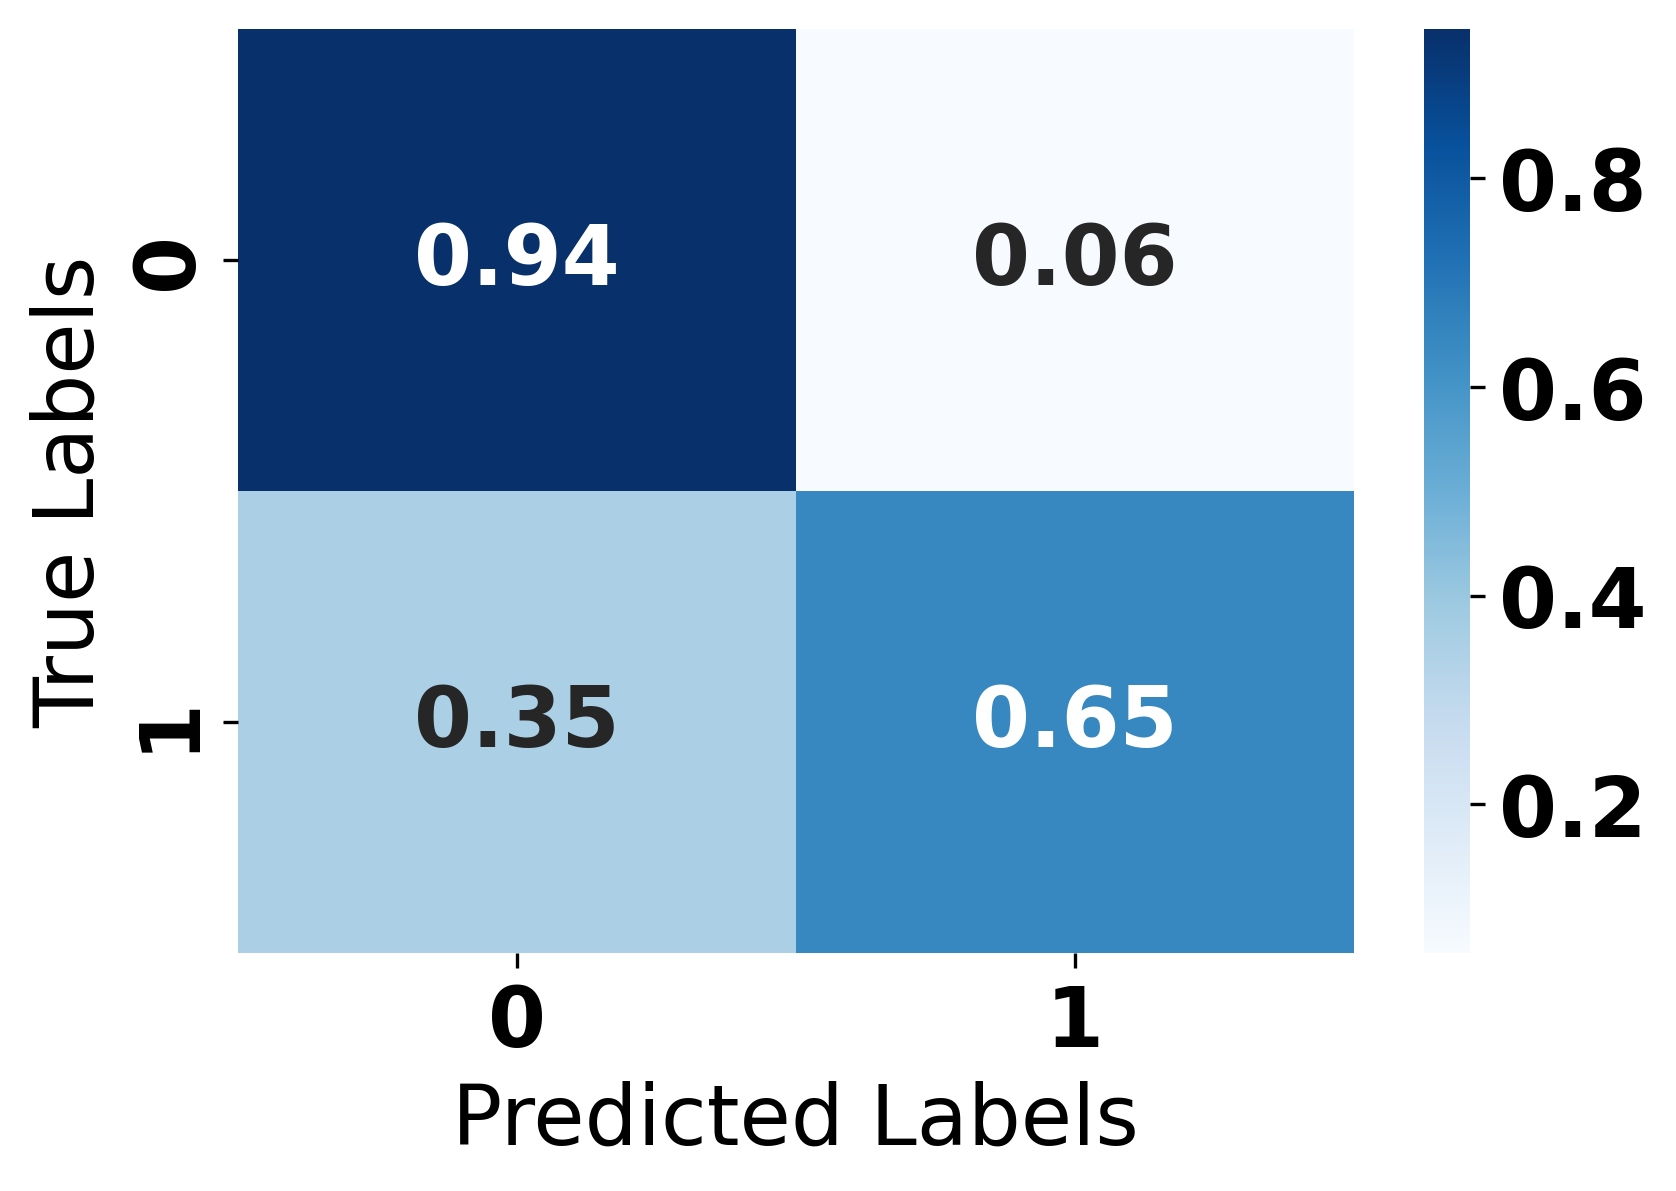

In [ ]:
# Predict probabilities on test data
y_pred_prob = ANN_model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.58
y_pred = np.where(y_pred_prob > 0.65, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.58)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
ANN_model.save('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/M2021/ANN(Base).h5')
"""

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
ANN_model = load_model('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/M2021/ANN(Base).h5')

### Attention ANN

In [ ]:
import time
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout, Multiply, Add
from tensorflow.keras.models import Model

# Define the input shape based on your data
input_shape = (x_train.shape[1],)  # Assuming your input data is 1D

def attention_layer(inputs):
    # Attention mechanism: compute attention scores and multiply by input
    dense_attention = Dense(inputs.shape[1], activation='softmax')(inputs)
    attention_mul = Multiply()([inputs, dense_attention])
    return attention_mul

def create_complex_attention_ann_model(input_shape):
    input_layer = Input(shape=input_shape)

    # Layer 1
    dense1 = Dense(2048, activation='relu')(input_layer)
    dense1 = BatchNormalization()(dense1)
    dense1 = Dropout(0.5)(dense1)

    # Layer 2
    dense2 = Dense(1024, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)
    dense2 = Dropout(0.5)(dense2)

    # Residual connection: Match the dimensions
    residual1 = Dense(512, activation='relu')(dense1)
    residual1 = BatchNormalization()(residual1)
    residual1 = Dropout(0.5)(residual1)

    dense3 = Dense(512, activation='relu')(dense2)
    dense3 = BatchNormalization()(dense3)
    dense3 = Dropout(0.5)(dense3)
    residual1 = Add()([dense3, residual1])

    # Layer 4
    dense4 = Dense(256, activation='relu')(residual1)
    dense4 = BatchNormalization()(dense4)
    dense4 = Dropout(0.5)(dense4)

    # Layer 5 with residual connection
    residual2 = Dense(128, activation='relu')(dense4)
    residual2 = BatchNormalization()(residual2)
    residual2 = Dropout(0.5)(residual2)

    dense5 = Dense(128, activation='relu')(dense4)
    dense5 = BatchNormalization()(dense5)
    dense5 = Dropout(0.5)(dense5)
    residual2 = Add()([dense5, residual2])

    # Layer 6
    dense6 = Dense(64, activation='relu')(residual2)
    dense6 = BatchNormalization()(dense6)

    # Add first attention layer
    attention_output1 = attention_layer(dense6)

    # Layer 7
    dense7 = Dense(32, activation='relu')(attention_output1)
    dense7 = BatchNormalization()(dense7)
    dense7 = Dropout(0.5)(dense7)

    # Add second attention layer
    attention_output2 = attention_layer(dense7)

    # Output layer
    output = Dense(1, activation='sigmoid')(attention_output2)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Create the complex attention ANN model
complex_attention_ann_model = create_complex_attention_ann_model(input_shape)

# Compile the model
complex_attention_ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Measure the training time
start_time = time.time()

# Train the complex attention ANN model
complex_attention_ann_model.fit(x_train, y_train, epochs=10, batch_size=512, validation_data=(x_test, y_test))

end_time = time.time()
training_time = end_time - start_time

print("Training Time:", training_time)

# Measure the test time
start_time = time.time()

# Evaluate the complex attention ANN model
loss, accuracy = complex_attention_ann_model.evaluate(x_test, y_test)

end_time = time.time()
test_time = end_time - start_time

print("Test Time:", test_time)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 39s 267ms/step - accuracy: 0.5140 - loss: 0.6930 - val_accuracy: 0.9462 - val_loss: 0.6874
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.6179 - loss: 0.6823 - val_accuracy: 0.9780 - val_loss: 0.6840
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8095 - loss: 0.5951 - val_accuracy: 0.9781 - val_loss: 0.6350
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8272 - loss: 0.5003 - val_accuracy: 0.9722 - val_loss: 0.5672
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8218 - loss: 0.4483 - val_accuracy: 0.9212 - val_loss: 0.4921
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8175 - loss: 0.4172 - val_accuracy: 0.8622 - val_loss: 0.4525
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8155 - loss: 0.4042 - val_accuracy: 0.8746 - val_loss: 0.3930
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8307 - loss: 0.3761 - val_accuracy: 0.6852 - v

419/419 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Normalized Confusion Matrix:
[[0.78140032 0.21859968]
 [0.13605442 0.86394558]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.78      0.88     13097
     Class 1       0.08      0.86      0.15       294

    accuracy                           0.78     13391
   macro avg       0.54      0.82      0.51     13391
weighted avg       0.98      0.78      0.86     13391



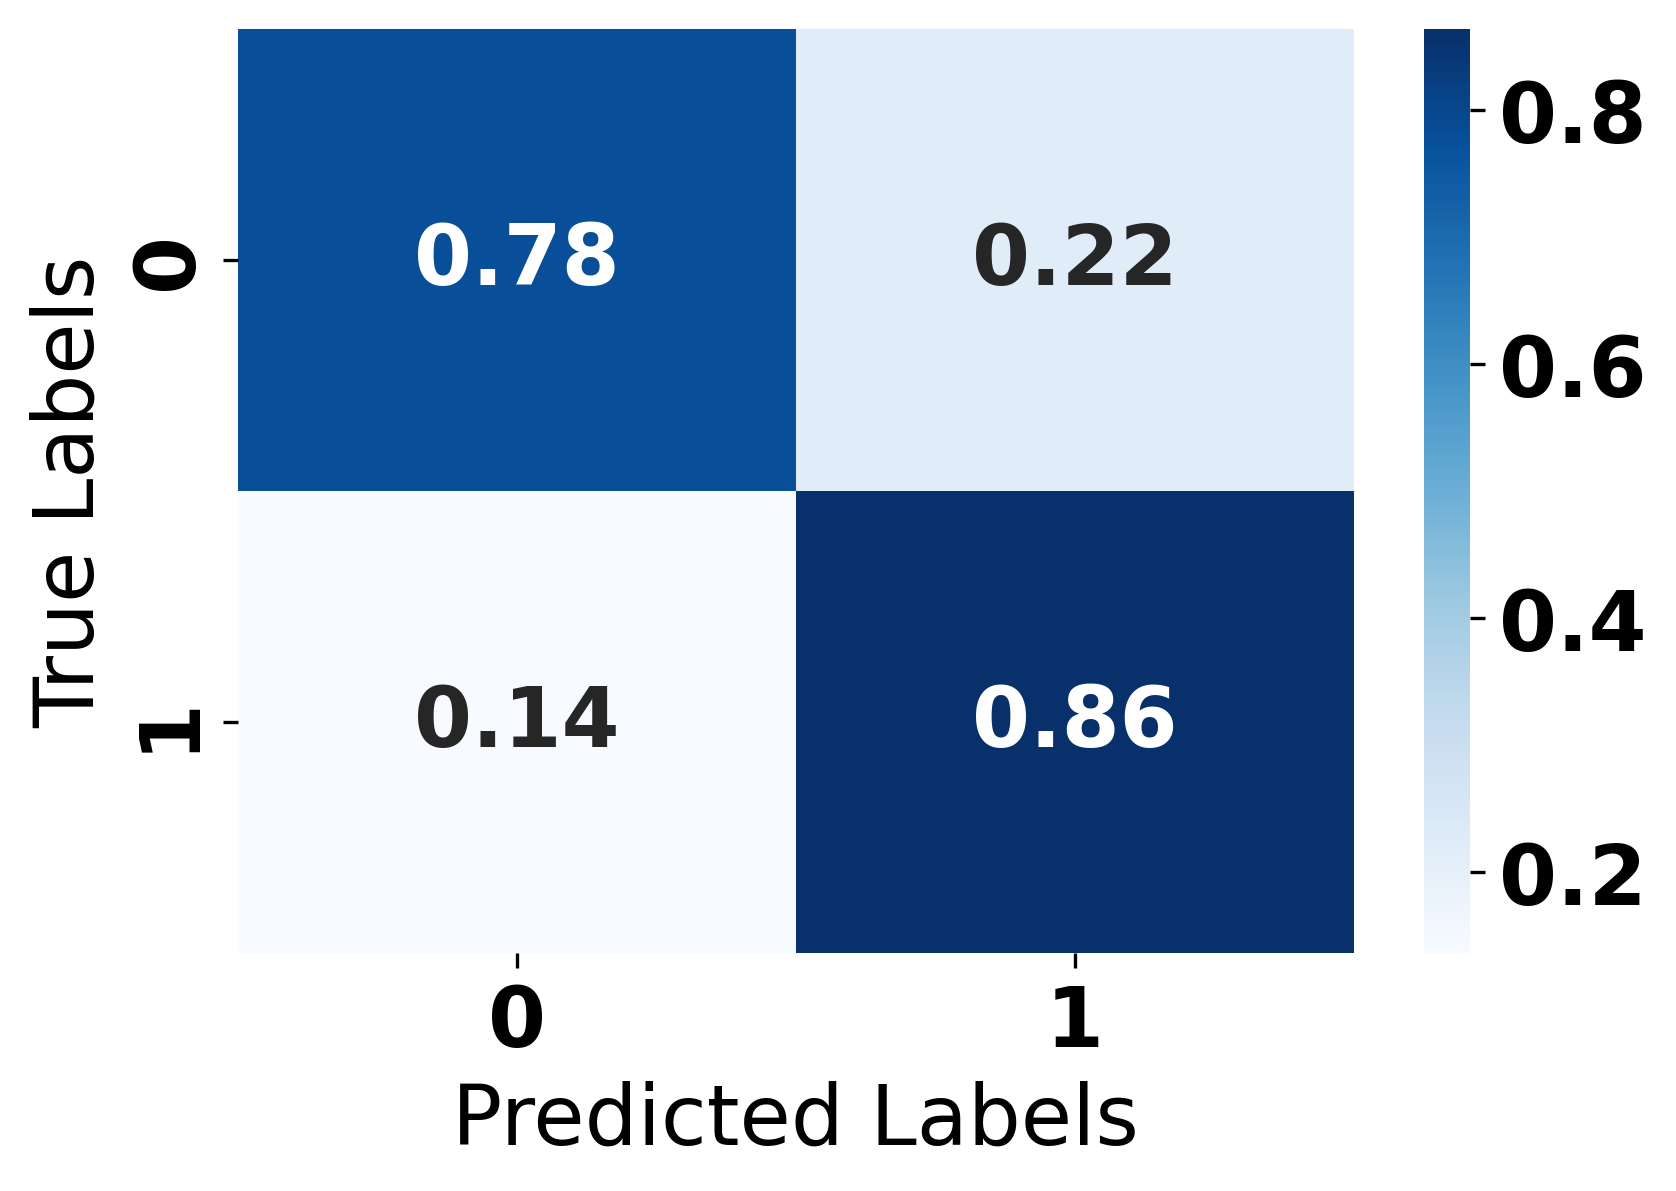

In [ ]:
# Predict probabilities on test data
y_pred_prob = complex_attention_ann_model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
complex_attention_ann_model.save('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/M2021/ANN-attention.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
AttentionANN = load_model('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/M2021/ANN-attention.h5')

In [ ]:
# Assuming grownet_tabular_model is your trained model
complex_attention_ann_model.summary()

Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_20            │ (None, 24)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_195 (Dense)         │ (None, 2048)           │         51,200 │ input_layer_20[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_135   │ (None, 2048)           │          8,192 │ dense_195[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_127 (Dropout)     │ (None, 2048)           │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_196 (Dense)         │ (None, 1024)           │      2,098,176 │ dropout_127[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_136   │ (None, 1024)           │          4,096 │ dense_196[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_128 (Dropout)     │ (None, 1024)           │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_198 (Dense)         │ (None, 512)            │        524,800 │ dropout_128[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_197 (Dense)         │ (None, 512)            │      1,049,088 │ dropout_127[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_138   │ (None, 512)            │          2,048 │ dense_198[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_137   │ (None, 512)            │          2,048 │ dense_197[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_130 (Dropout)     │ (None, 512)            │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_129 (Dropout)     │ (None, 512)            │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_33 (Add)              │ (None, 512)            │              0 │ dropout_130[0][0],     │
│                           │                        │                │ dropout_129[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_199 (Dense)         │ (None, 256)            │        131,328 │ add_33[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_139   │ (None, 256)            │          1,024 │ dense_199[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 11,845,541 (45.19 MB)

 Trainable params: 3,945,377 (15.05 MB)

 Non-trainable params: 9,408 (36.75 KB)

 Optimizer params: 7,890,756 (30.10 MB)

### Attention CNN

In [ ]:
import time
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Add, Multiply, GlobalAveragePooling1D, Reshape

# Define the input shape based on your data
input_shape = (x_train.shape[1], 1)  # Assuming your input data is 2D

# Input layer
input_layer = Input(shape=input_shape)

# First convolutional block
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# Second convolutional block with residual connection
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(pool1)
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2)

# Residual connection
residual1 = Conv1D(filters=64, kernel_size=1, activation='relu', padding='same')(pool1)
residual1 = Add()([residual1, conv2])
pool2 = MaxPooling1D(pool_size=2)(residual1)

# Attention mechanism
def attention_layer(inputs):
    # Global Average Pooling
    gap = GlobalAveragePooling1D()(inputs)
    # Reshape to match input shape
    gap = Reshape((1, inputs.shape[-1]))(gap)
    # Dense layer with sigmoid activation for attention weights
    attention_weights = Dense(inputs.shape[-1], activation='sigmoid')(gap)
    # Multiply the inputs by the attention weights
    attention_output = Multiply()([inputs, attention_weights])
    return attention_output

attention_output = attention_layer(pool2)

# Flatten layer
flatten = Flatten()(attention_output)

# Dense layers
dense1 = Dense(128, activation='relu')(flatten)
dense2 = Dense(64, activation='relu')(dense1)

# Output layer
output = Dense(1, activation='sigmoid')(dense2)

# Create the model
model = Model(inputs=input_layer, outputs=output)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Measure the training time
start_time = time.time()

# Train the model
model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

end_time = time.time()
training_time = end_time - start_time

print("Training Time:", training_time)

# Measure the test time
start_time = time.time()

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)

end_time = time.time()
test_time = end_time - start_time

print("Test Time:", test_time)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.5986 - loss: 0.7444 - val_accuracy: 0.7294 - val_loss: 0.5843
Epoch 2/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8155 - loss: 0.4210 - val_accuracy: 0.8129 - val_loss: 0.4385
Epoch 3/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8439 - loss: 0.3616 - val_accuracy: 0.7622 - val_loss: 0.5134
Epoch 4/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8553 - loss: 0.3409 - val_accuracy: 0.7473 - val_loss: 0.5218
Epoch 5/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8549 - loss: 0.3413 - val_accuracy: 0.8326 - val_loss: 0.3865
Epoch 6/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8587 - loss: 0.3337 - val_accuracy: 0.8981 - val_loss: 0.2798
Epoch 7/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8654 - loss: 0.3146 - val_accuracy: 0.8840 - val_loss: 0.2676
Epoch 8/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8633 - loss: 0.3198 - val_accuracy: 0

419/419 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Normalized Confusion Matrix:
[[0.87684202 0.12315798]
 [0.23129252 0.76870748]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.88      0.93     13097
     Class 1       0.12      0.77      0.21       294

    accuracy                           0.87     13391
   macro avg       0.56      0.82      0.57     13391
weighted avg       0.97      0.87      0.92     13391



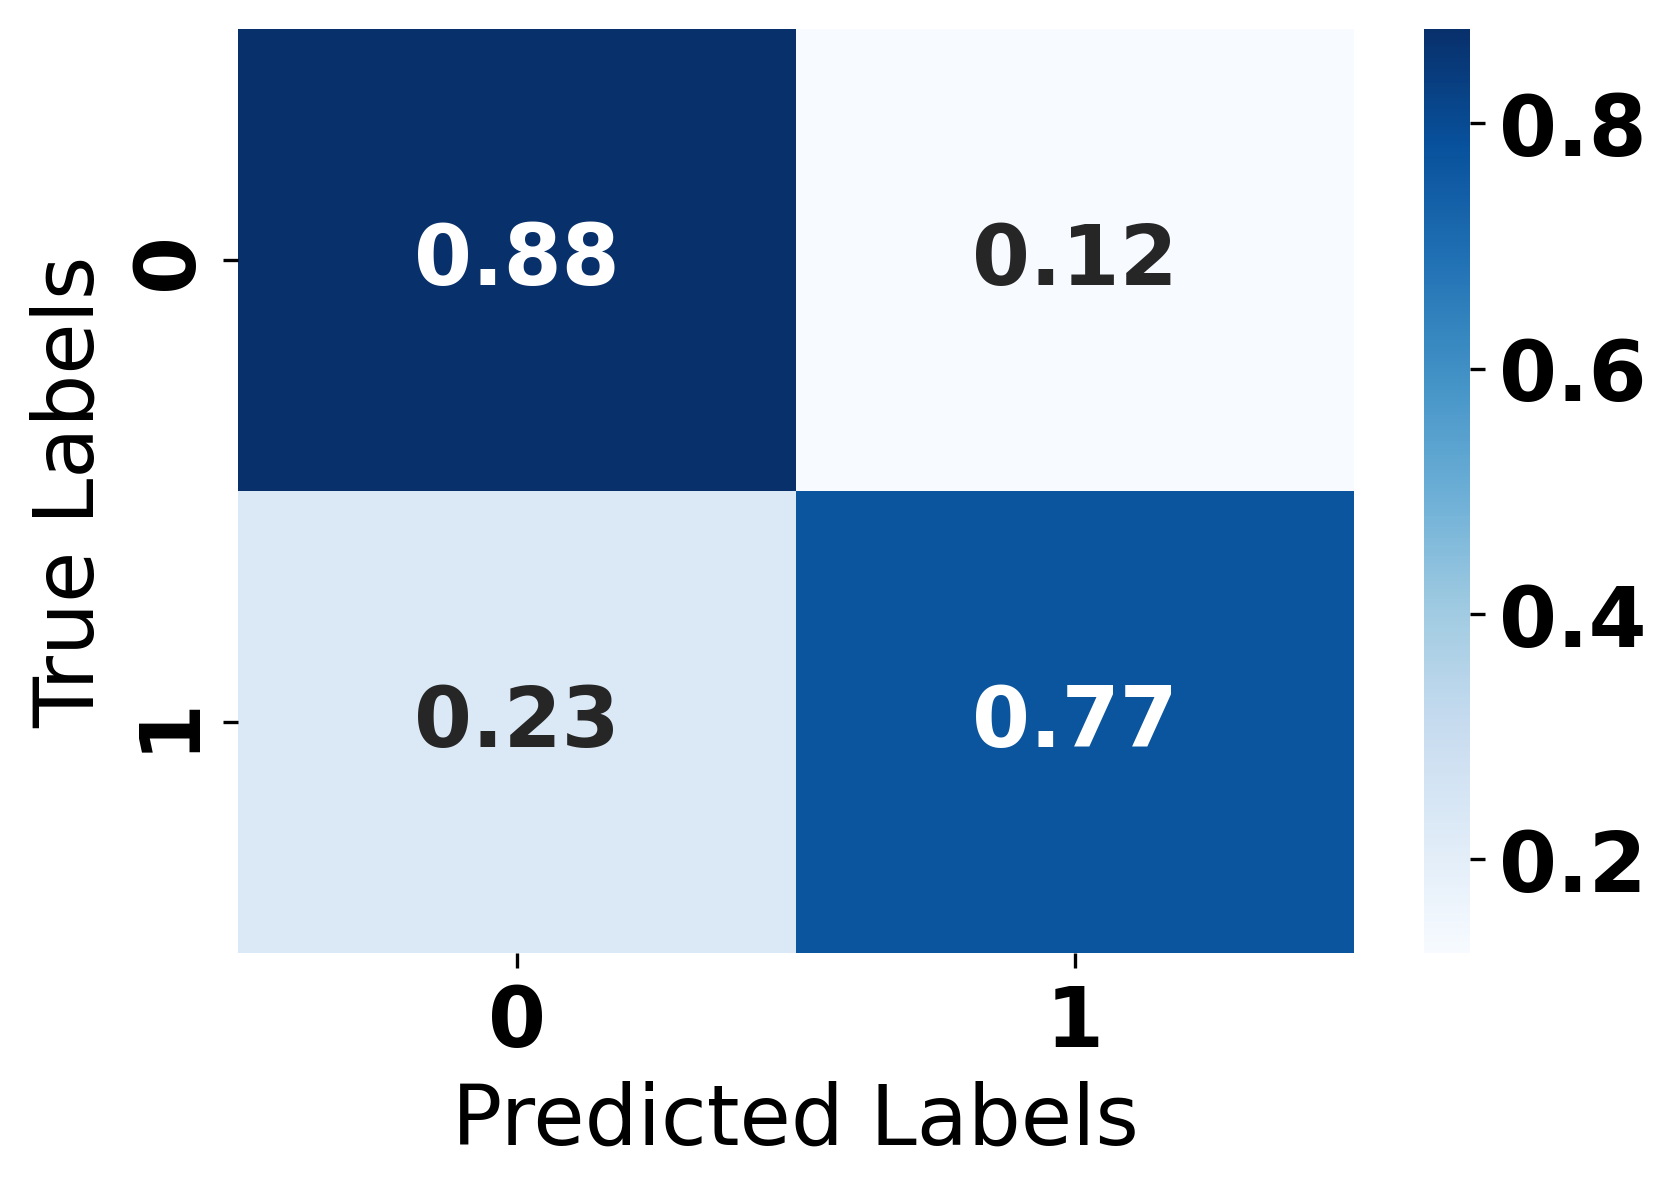

In [ ]:
# Predict probabilities on test data
y_pred_prob = model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
model.save('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/M2021/CNN-attention.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
AttentionCNN = load_model('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/M2021/CNN-attention.h5')

In [ ]:
# Assuming grownet_tabular_model is your trained model
model.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_17            │ (None, 24, 1)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_4 (Conv1D)         │ (None, 24, 32)         │            128 │ input_layer_17[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_2           │ (None, 12, 32)         │              0 │ conv1d_4[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_5 (Conv1D)         │ (None, 12, 64)         │          6,208 │ max_pooling1d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_7 (Conv1D)         │ (None, 12, 64)         │          2,112 │ max_pooling1d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_6 (Conv1D)         │ (None, 12, 64)         │         12,352 │ conv1d_5[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_30 (Add)              │ (None, 12, 64)         │              0 │ conv1d_7[0][0],        │
│                           │                        │                │ conv1d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_3           │ (None, 6, 64)          │              0 │ add_30[0][0]           │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d… │ (None, 64)             │              0 │ max_pooling1d_3[0][0]  │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_1 (Reshape)       │ (None, 1, 64)          │              0 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_174 (Dense)         │ (None, 1, 64)          │          4,160 │ reshape_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multiply_27 (Multiply)    │ (None, 6, 64)          │              0 │ max_pooling1d_3[0][0], │
│                           │                        │                │ dense_174[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 384)            │              0 │ multiply_27[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_175 (Dense)         │ (None, 128)            │         49,280 │ flatten_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_176 (Dense)         │ (None, 64)             │          8,256 │ dense_175[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_177 (Dense)         │ (None, 1)              │             65 │ dense_176[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 247,685 (967.52 KB)

 Trainable params: 82,561 (322.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 165,124 (645.02 KB)

### Transformer

In [ ]:
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, Embedding, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import time

# Define the input shape based on your data
input_shape = (x_train.shape[1],)  # Assuming your input data is 1D

def create_simple_transformer_model(input_shape, vocab_size, embed_dim, ff_dim):
    # Input layer
    inputs = Input(shape=input_shape)

    # Embedding layer
    x = Embedding(input_dim=vocab_size, output_dim=embed_dim, input_length=input_shape[0])(inputs)

    # Feed-forward network
    x = Dense(ff_dim, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = LayerNormalization(epsilon=1e-6)(x)

    # Another feed-forward layer
    x = Dense(ff_dim // 2, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = LayerNormalization(epsilon=1e-6)(x)

    # Global average pooling
    x = GlobalAveragePooling1D()(x)

    # Dense layers
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(64, activation='relu')(x)

    # Output layer
    outputs = Dense(1, activation='sigmoid')(x)

    # Create the model
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Define model parameters
vocab_size = 20000  # This should be set according to your dataset
embed_dim = 128  # Embedding size for each token
ff_dim = 128  # Hidden layer size in the feed-forward network

# Create the Transformer model
simple_transformer_model = create_simple_transformer_model(input_shape, vocab_size, embed_dim, ff_dim)

# Compile the model
simple_transformer_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])

# Measure the training time
start_time = time.time()

# Train the Transformer model
simple_transformer_model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

end_time = time.time()
training_time = end_time - start_time

print("Training Time:", training_time)

# Measure the test time
start_time = time.time()

# Evaluate the Transformer model
loss, accuracy = simple_transformer_model.evaluate(x_test, y_test)

end_time = time.time()
test_time = end_time - start_time

print("Test Time:", test_time)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


201/201 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.6891 - loss: 0.5976 - val_accuracy: 0.7667 - val_loss: 0.4849
Epoch 2/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7626 - loss: 0.5082 - val_accuracy: 0.7255 - val_loss: 0.5468
Epoch 3/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7700 - loss: 0.4947 - val_accuracy: 0.7547 - val_loss: 0.4761
Epoch 4/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7719 - loss: 0.4942 - val_accuracy: 0.7522 - val_loss: 0.4762
Epoch 5/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7694 - loss: 0.4912 - val_accuracy: 0.7418 - val_loss: 0.4865
Epoch 6/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7673 - loss: 0.4962 - val_accuracy: 0.7389 - val_loss: 0.4906
Epoch 7/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7755 - loss: 0.4863 - val_accuracy: 0.7355 - val_loss: 0.4822
Epoch 8/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7762 - loss: 0.4849 - val_accuracy: 0.7106 - va

419/419 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Normalized Confusion Matrix:
[[0.71107887 0.28892113]
 [0.19387755 0.80612245]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.71      0.83     13097
     Class 1       0.06      0.81      0.11       294

    accuracy                           0.71     13391
   macro avg       0.53      0.76      0.47     13391
weighted avg       0.97      0.71      0.81     13391



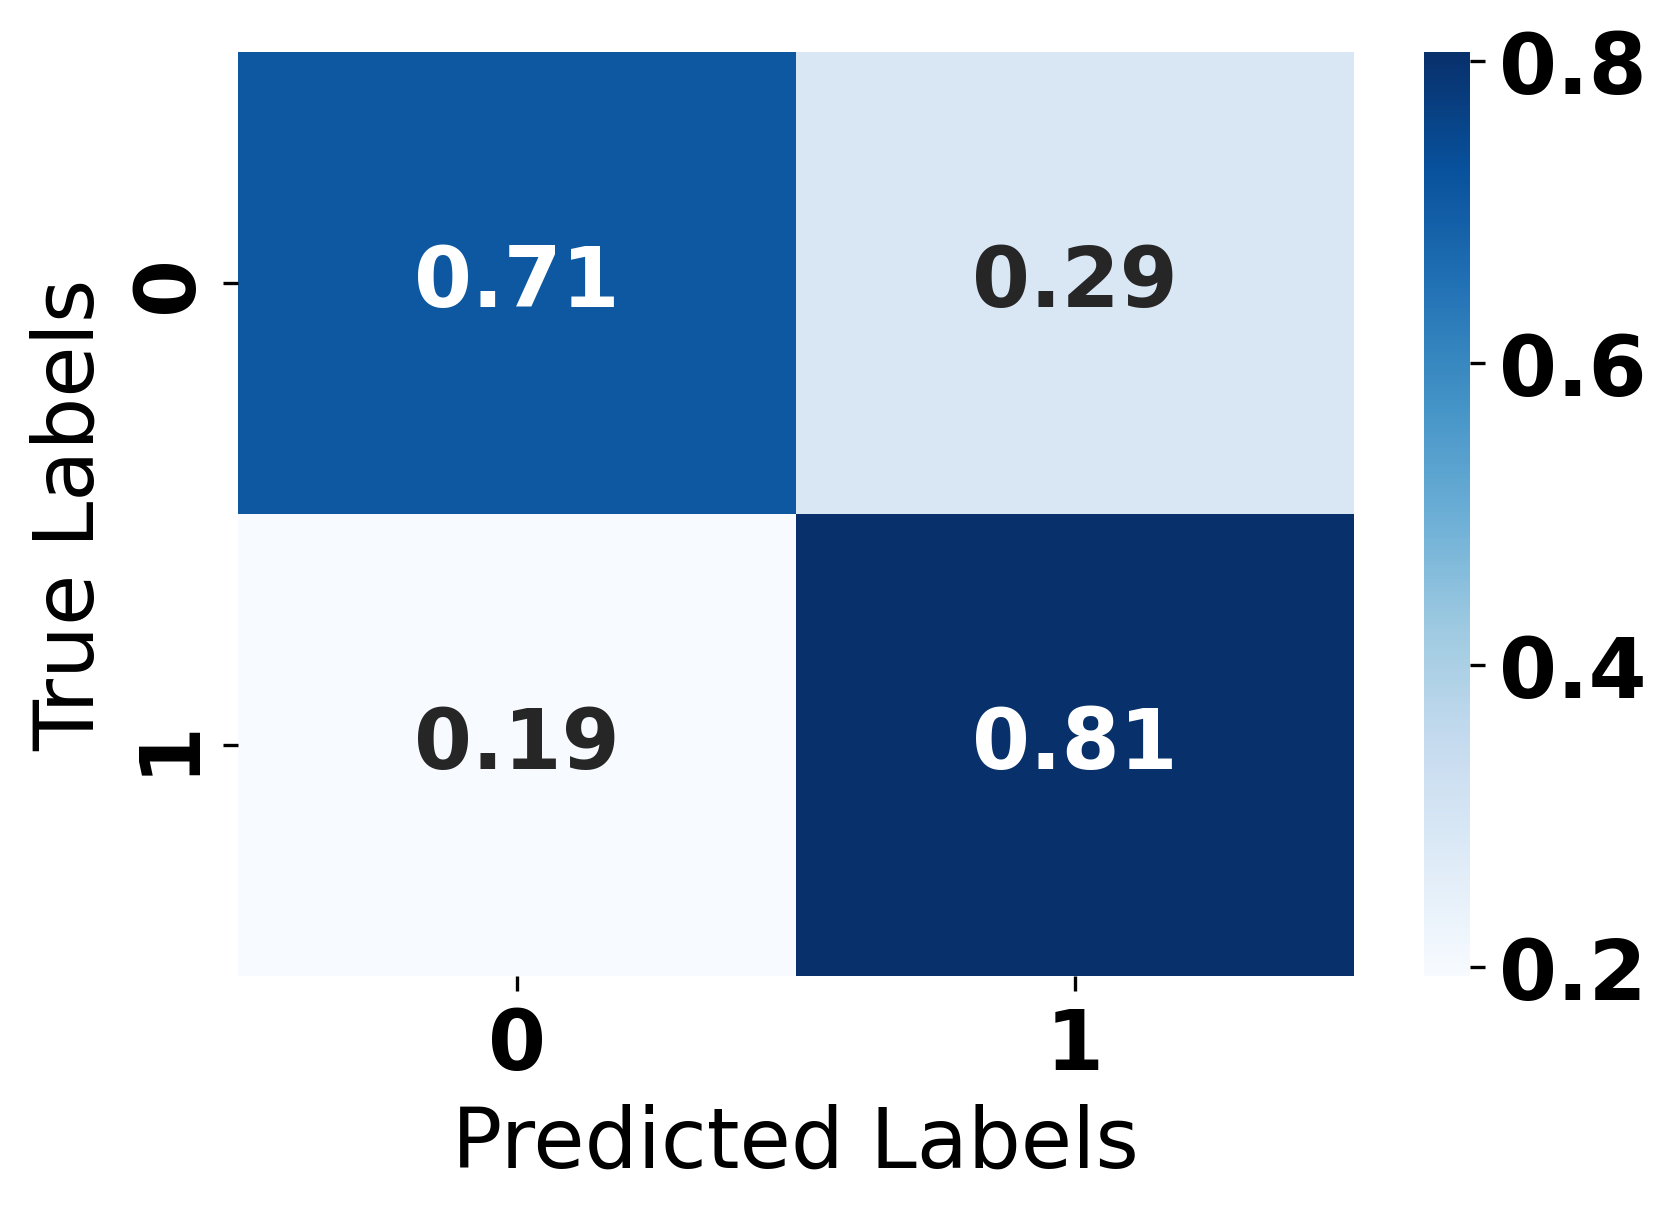

In [ ]:
# Predict probabilities on test data
y_pred_prob = simple_transformer_model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
simple_transformer_model.save('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/M2021/transformer_model.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
transformer_model = load_model('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/M2021/transformer_model.h5')

In [ ]:
# Assuming grownet_tabular_model is your trained model
simple_transformer_model.summary()

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)          │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_1 (Embedding)              │ (None, 24, 128)             │       2,560,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_178 (Dense)                    │ (None, 24, 128)             │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_116 (Dropout)                │ (None, 24, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_2                │ (None, 24, 128)             │             256 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_179 (Dense)                    │ (None, 24, 64)              │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_117 (Dropout)                │ (None, 24, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_3                │ (None, 24, 64)              │             128 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_3           │ (None, 64)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_180 (Dense)                    │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_118 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_181 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_182 (Dense)                    │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,805,381 (29.78 MB)

 Trainable params: 2,601,793 (9.93 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,203,588 (19.85 MB)

### Dual-Path ANN

In [ ]:
import time
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

# Define the input shape based on your data
input_shape = (x_train.shape[1],)  # Assuming your input data is 1D

def dual-path_ANN(input_shape):
    input_layer = Input(shape=input_shape)

    # Add fully connected layers with increasing complexity
    dense1 = Dense(256, activation='relu')(input_layer)
    dense1 = BatchNormalization()(dense1)
    dense1 = Dropout(0.5)(dense1)  # Adding dropout for regularization

    dense2 = Dense(128, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)
    dense2 = Dropout(0.5)(dense2)

    # Introduce a parallel branch with a different activation function
    dense2_alt = Dense(128, activation='selu')(dense1)
    dense2_alt = BatchNormalization()(dense2_alt)
    dense2_alt = Dropout(0.5)(dense2_alt)

    # Concatenate outputs from the main and parallel branches
    concatenated = Concatenate()([dense2, dense2_alt])

    dense3 = Dense(64, activation='relu')(concatenated)
    dense3 = BatchNormalization()(dense3)

    output = Dense(1, activation='sigmoid')(dense3)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Record the start time before defining the model
start_time = time.time()

# Create the novel ANN model
dual-path_ANN = dual-path_ANN(input_shape)

# Compile the model
dual-path_ANN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Record the end time after compiling the model
end_time = time.time()

# Calculate compilation time
compilation_time = end_time - start_time
print(f"Compilation time: {compilation_time} seconds")

# Train the novel ANN model
dual-path_ANN.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the novel ANN model
loss, accuracy = dual-path_ANN.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Compilation time: 0.27904772758483887 seconds
Epoch 1/20
201/201 [==============================] - 5s 12ms/step - loss: 0.4654 - accuracy: 0.7863 - val_loss: 0.1524 - val_accuracy: 0.9489
Epoch 2/20
201/201 [==============================] - 2s 10ms/step - loss: 0.3818 - accuracy: 0.8348 - val_loss: 0.1587 - val_accuracy: 0.9435
Epoch 3/20
201/201 [==============================] - 2s 12ms/step - loss: 0.3590 - accuracy: 0.8454 - val_loss: 0.2694 - val_accuracy: 0.8963
Epoch 4/20
201/201 [==============================] - 3s 15ms/step - loss: 0.3538 - accuracy: 0.8503 - val_loss: 0.3230 - val_accuracy: 0.8723
Epoch 5/20
201/201 [==============================] - 4s 18ms/step - loss: 0.3459 - accuracy: 0.8530 - val_loss: 0.1900 - val_accuracy: 0.9321
Epoch 6/20
201/201 [==============================] - 2s 10ms/step - loss: 0.3376 - accuracy: 0.8578 - val_loss: 0.1995 - val_accuracy: 0.9253
Epoch 7/20
201/201 [==============================] - 2s 10ms/step - loss: 0.3350 - accuracy: 0.

419/419 [==============================] - 1s 2ms/step
Time taken per instance for prediction: 8.92065253466775e-05 seconds
Normalized Confusion Matrix:
[[0.80674964 0.19325036]
 [0.10544218 0.89455782]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.81      0.89     13097
     Class 1       0.09      0.89      0.17       294

    accuracy                           0.81     13391
   macro avg       0.55      0.85      0.53     13391
weighted avg       0.98      0.81      0.88     13391



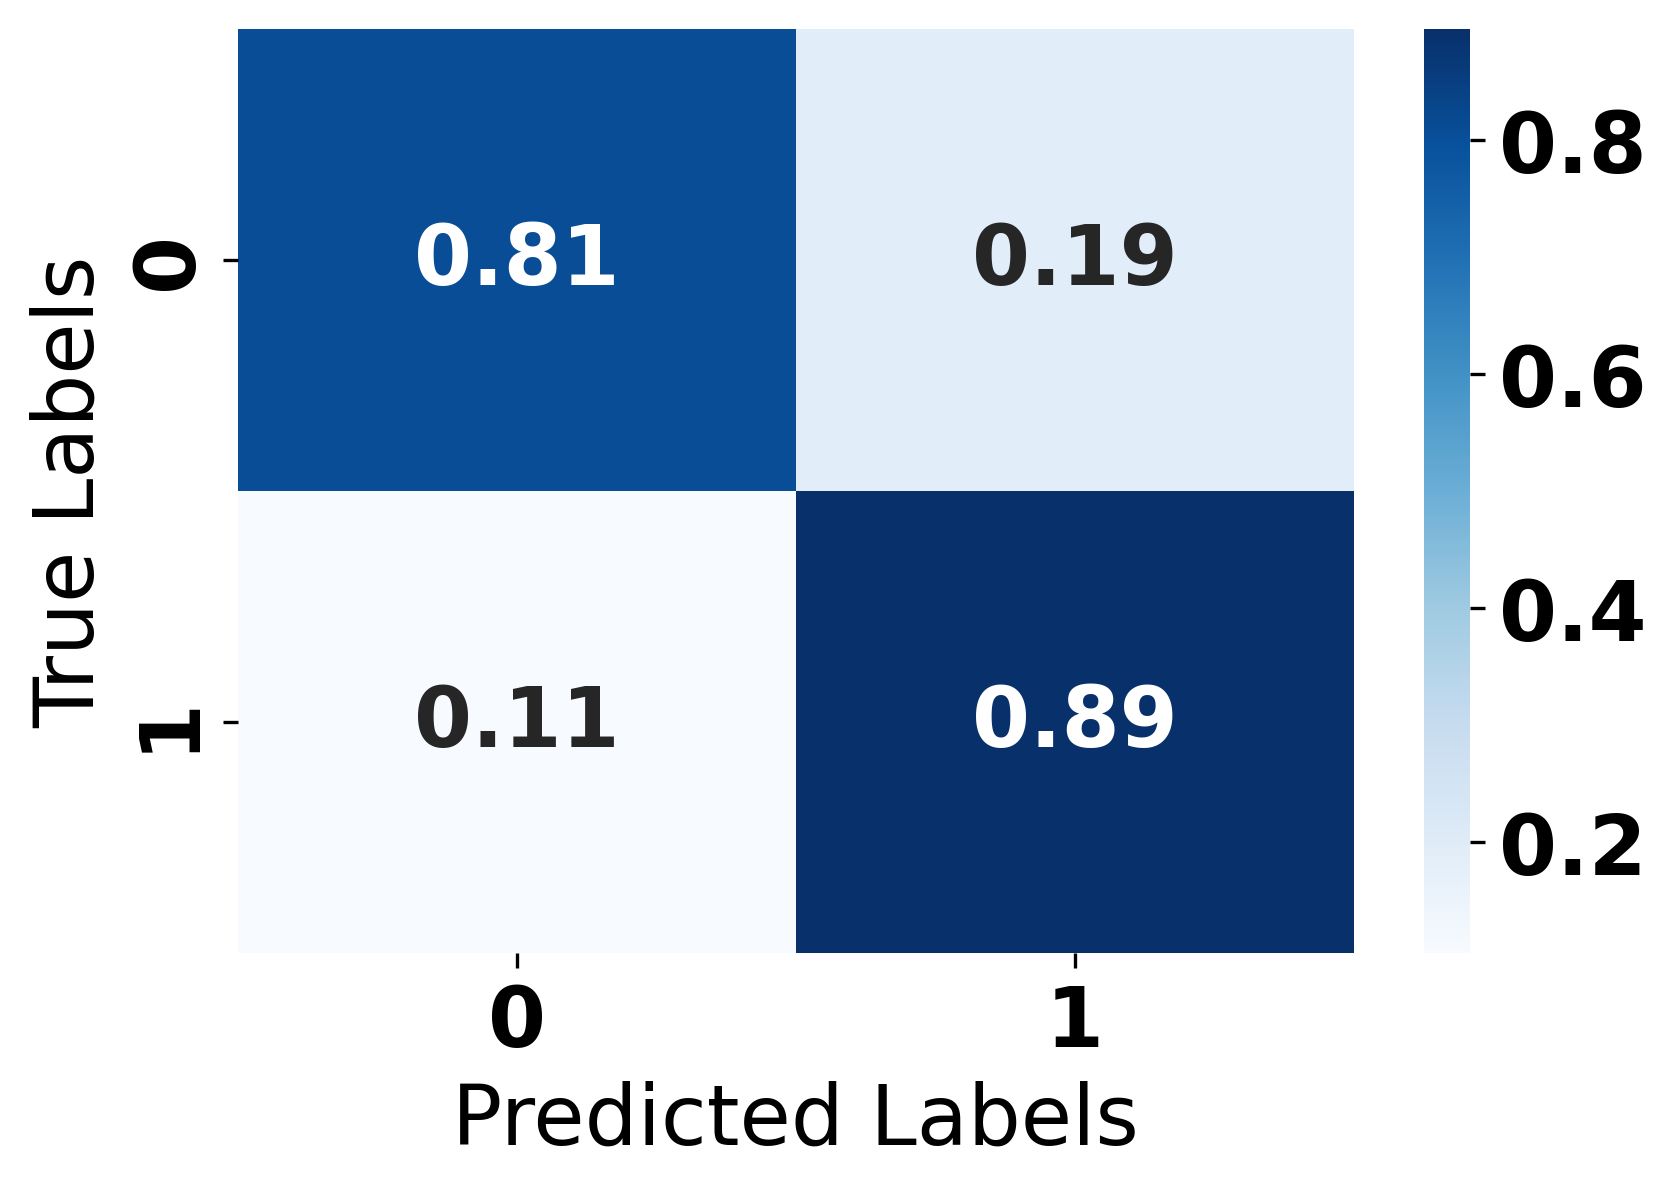

In [ ]:
import time
from sklearn.metrics import confusion_matrix, classification_report

# Predict probabilities on test data
start_time = time.time()
y_pred_prob = dual-path_ANN.predict(x_test)
end_time = time.time()

# Calculate time taken per instance for prediction
time_per_instance = (end_time - start_time) / len(x_test)
print("Time taken per instance for prediction:", time_per_instance, "seconds")

# Convert probabilities to class labels using a threshold of 0.56
y_pred = np.where(y_pred_prob > 0.28, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.56)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
dual-path_ANN.save('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/M2021/DP_ANN.h5')
"""

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
dual-path_ANN = load_model('/content/drive/MyDrive/Myocardial Infarction (MI)/Model/M2021/DP_ANN.h5')